# Code Copy of the Iteration 3

## 01-BU

To find the influences of factors, such as education levels, occupations, and working hours on people’s salaries and build a model to predict unknown people’s salary.

To investigate whether there are significant salary differences between different genders.

## 02-DU

Load Dataset

In [1]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

file='multiple_choice_responses_modefied.csv'
file_other='other_text_responses_modefied.xlsx'

df = pd.read_csv(file)
df_other = pd.read_excel(file_other)

Explore Data

In [3]:
df.info()
df.describe()
data_type = df.dtypes

column_nan = df.isna().sum()
total_nan = column_nan.sum()
total_nan
column_nan

df.fillna('nan', inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19717 entries, 0 to 19716
Columns: 246 entries, Time from Start to Finish (seconds) to Q34_OTHER_TEXT
dtypes: int64(29), object(217)
memory usage: 37.0+ MB


Add Visualisations

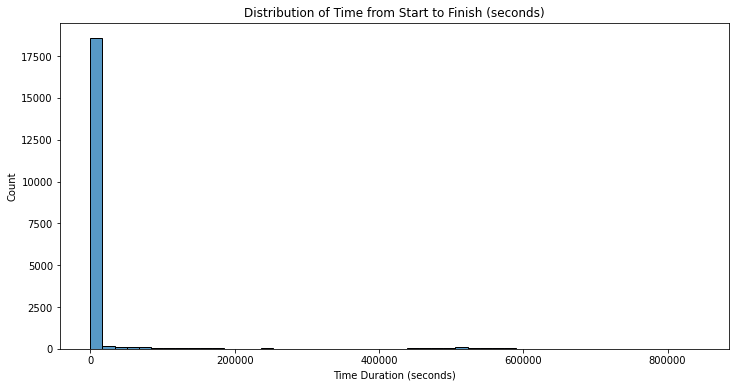

In [4]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.histplot(df['Time from Start to Finish (seconds)'], bins=50)
plt.title("Distribution of Time from Start to Finish (seconds)")
plt.xlabel("Time Duration (seconds)")
plt.show()

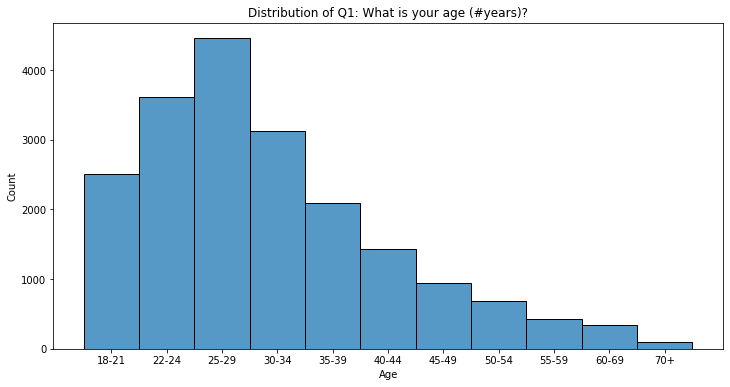

In [5]:
df['Q1'] = pd.Categorical(df['Q1'], ['18-21','22-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-69','70+'], ordered=True)
plt.figure(figsize=(12,6))
sns.histplot(df['Q1'])
plt.title("Distribution of Q1: What is your age (#years)?")
plt.xlabel("Age")
plt.show()

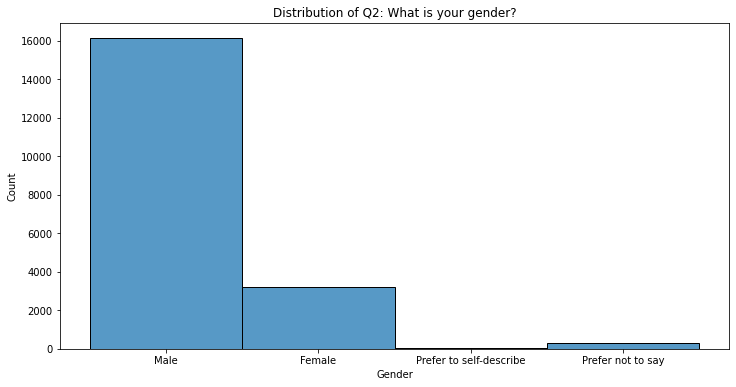

In [6]:
plt.figure(figsize=(12,6))
sns.histplot(df['Q2'])
plt.title("Distribution of Q2: What is your gender?")
plt.xlabel("Gender")
plt.show()

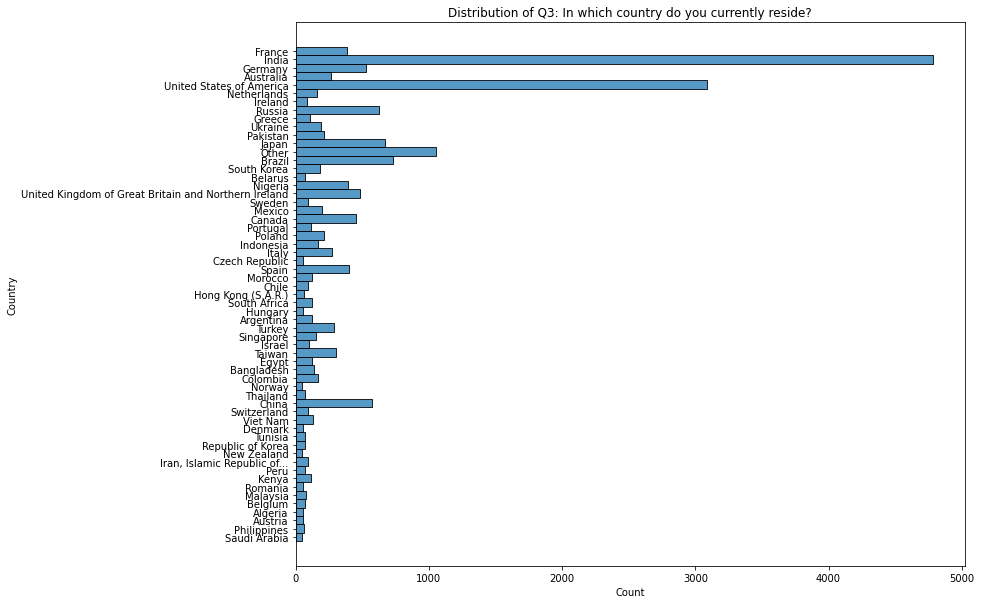

In [7]:
plt.figure(figsize=(12,10))
sns.histplot(data=df, y='Q3')
plt.title("Distribution of Q3: In which country do you currently reside?")
plt.ylabel("Country")
plt.show()

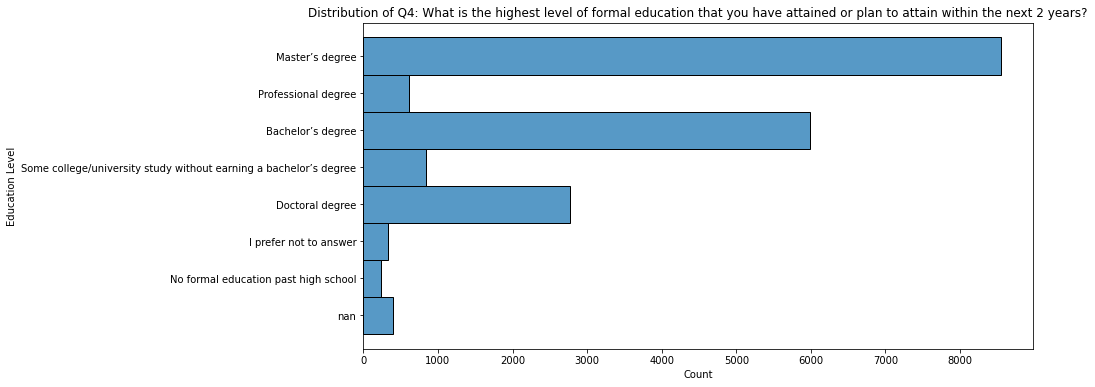

In [8]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, y='Q4')
plt.title("Distribution of Q4: What is the highest level of formal education that you have attained or plan to attain within the next 2 years?")
plt.ylabel("Education Level")
plt.show()

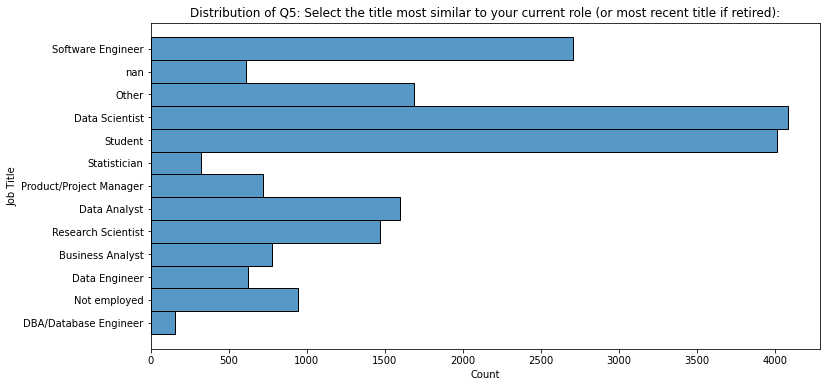

In [9]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, y='Q5')
plt.title("Distribution of Q5: Select the title most similar to your current role (or most recent title if retired):")
plt.ylabel("Job Title")
plt.show()

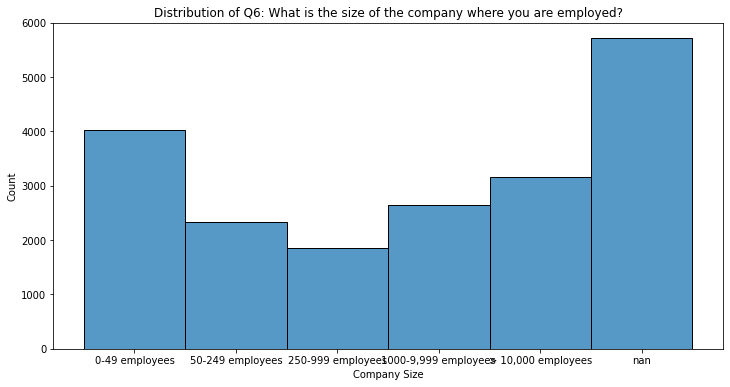

In [10]:
df['Q6'] = pd.Categorical(df['Q6'], ['0-49 employees','50-249 employees','250-999 employees','1000-9,999 employees','> 10,000 employees','nan'])
plt.figure(figsize=(12,6))
sns.histplot(df['Q6'])
plt.title("Distribution of Q6: What is the size of the company where you are employed?")
plt.xlabel("Company Size")
plt.show()

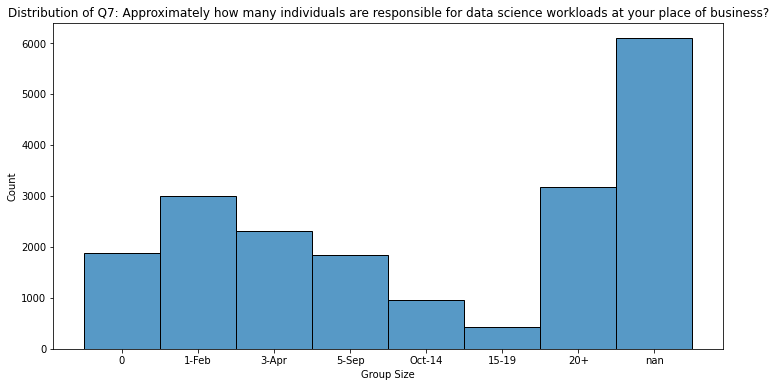

In [11]:
df['Q7'] = pd.Categorical(df['Q7'], ['0','1-Feb','3-Apr','5-Sep','Oct-14','15-19','20+','nan'])
plt.figure(figsize=(12,6))
sns.histplot(df['Q7'])
plt.title("Distribution of Q7: Approximately how many individuals are responsible for data science workloads at your place of business?")
plt.xlabel("Group Size")
plt.show()

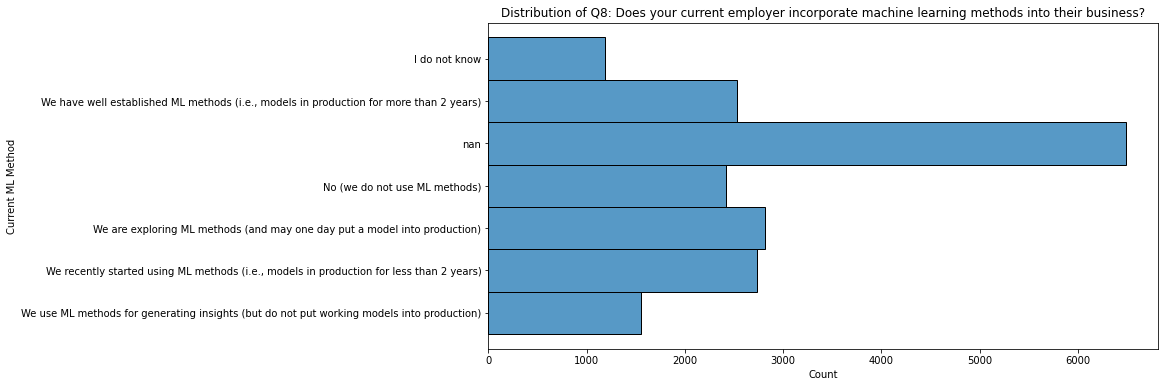

In [12]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, y='Q8')
plt.title("Distribution of Q8: Does your current employer incorporate machine learning methods into their business?")
plt.ylabel("Current ML Method")
plt.show()

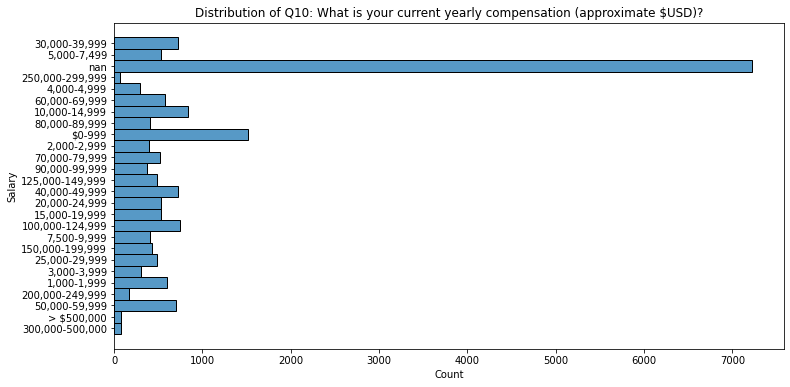

In [13]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, y='Q10')
plt.title("Distribution of Q10: What is your current yearly compensation (approximate $USD)?")
plt.ylabel("Salary")
plt.show()

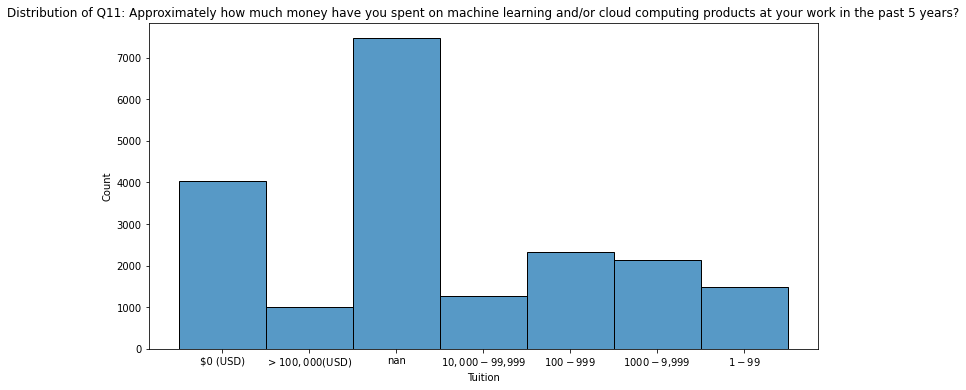

In [14]:
plt.figure(figsize=(12,6))
sns.histplot(df['Q11'])
plt.title("Distribution of Q11: Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?")
plt.xlabel("Tuition")
plt.show()

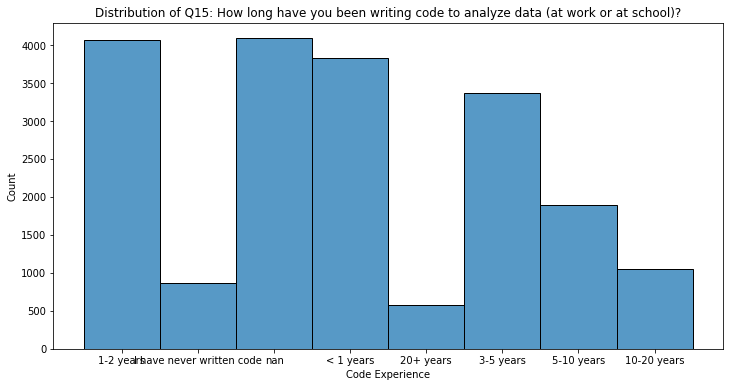

In [15]:
plt.figure(figsize=(12,6))
sns.histplot(df['Q15'])
plt.title("Distribution of Q15: How long have you been writing code to analyze data (at work or at school)?")
plt.xlabel("Code Experience")
plt.show()

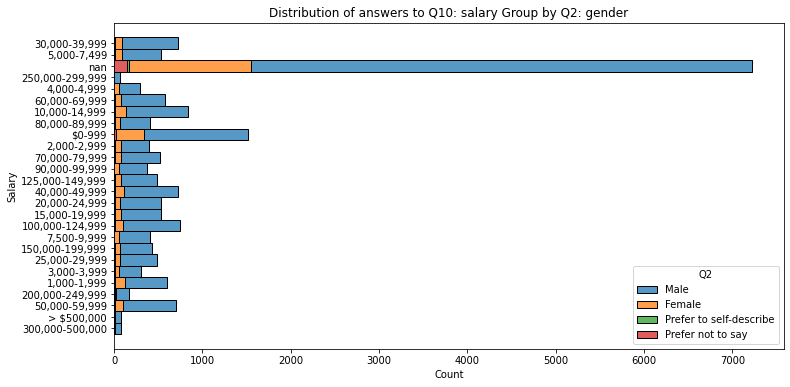

In [16]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, y='Q10',hue='Q2',multiple='stack')
plt.title("Distribution of answers to Q10: salary Group by Q2: gender")
plt.ylabel("Salary")
plt.show()

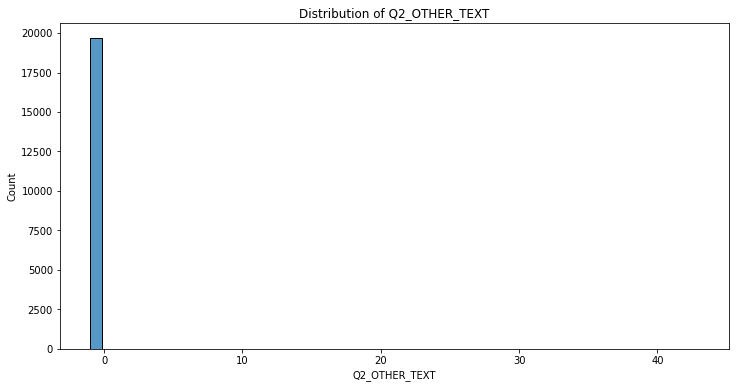

In [17]:
plt.figure(figsize=(12,6))
sns.histplot(df['Q2_OTHER_TEXT'], bins=50)
plt.title("Distribution of Q2_OTHER_TEXT")
plt.xlabel("Q2_OTHER_TEXT")
plt.show()

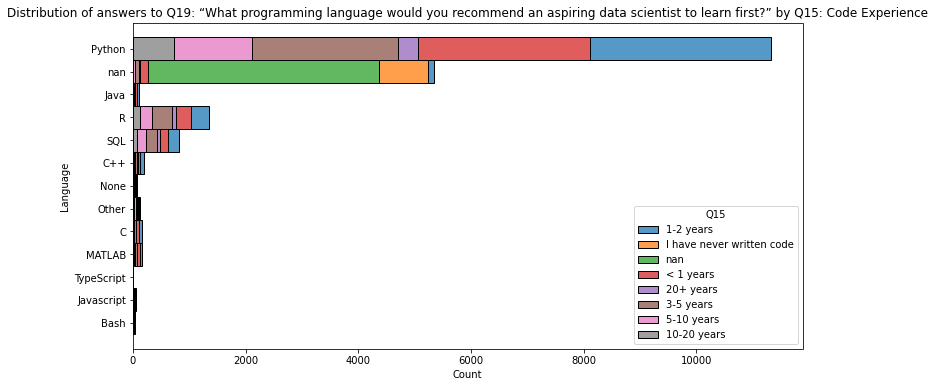

In [18]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, y='Q19',hue='Q15',multiple='stack')
plt.title("Distribution of answers to Q19: “What programming language would you recommend an aspiring data scientist to learn first?” by Q15: Code Experience")
plt.ylabel("Language")
plt.show()

## 03-DP

In [19]:
df = pd.read_csv(file)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19717 entries, 0 to 19716
Columns: 246 entries, Time from Start to Finish (seconds) to Q34_OTHER_TEXT
dtypes: int64(29), object(217)
memory usage: 37.0+ MB


Add any pre-processing steps

In [20]:
df = df.drop(df.loc[:,'Q12_Part_1':'Q14_OTHER_TEXT'].columns, axis=1)
df = df.drop(df.loc[:,'Q16_Part_1':'Q34_OTHER_TEXT'].columns, axis=1)

df.columns

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q2_OTHER_TEXT',
       'Q3', 'Q4', 'Q5', 'Q5_OTHER_TEXT', 'Q6', 'Q7', 'Q8', 'Q9_Part_1',
       'Q9_Part_2', 'Q9_Part_3', 'Q9_Part_4', 'Q9_Part_5', 'Q9_Part_6',
       'Q9_Part_7', 'Q9_Part_8', 'Q9_OTHER_TEXT', 'Q10', 'Q11', 'Q15'],
      dtype='object')

In [21]:
df = df[df['Q5']!='Student']
df = df[df['Q5'].notna()]

df = df[df['Q10'].notna()]

df.fillna(value={'Q11': 'NA', 'Q15': 'NA'}, inplace=True)

column_nan = df.isna().sum()
column_nan

Time from Start to Finish (seconds)        0
Q1                                         0
Q2                                         0
Q2_OTHER_TEXT                              0
Q3                                         0
Q4                                         0
Q5                                         0
Q5_OTHER_TEXT                              0
Q6                                         0
Q7                                         0
Q8                                         0
Q9_Part_1                               6518
Q9_Part_2                               8990
Q9_Part_3                               7607
Q9_Part_4                               9212
Q9_Part_5                               8863
Q9_Part_6                              10194
Q9_Part_7                              11982
Q9_Part_8                              12258
Q9_OTHER_TEXT                              0
Q10                                        0
Q11                                        0
Q15       

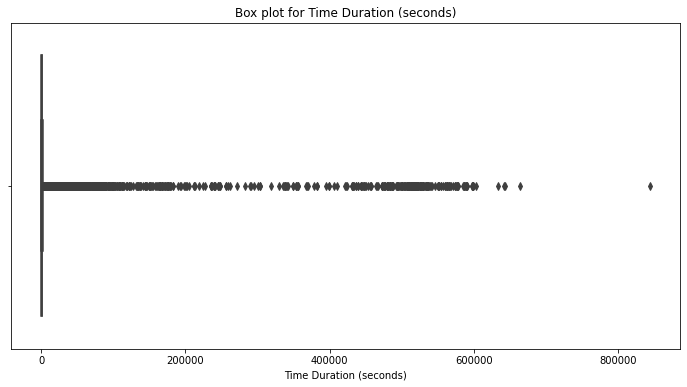

In [22]:
continuous_data = df.describe()

plt.figure(figsize=(12,6))
sns.boxplot(x=df['Time from Start to Finish (seconds)'])
plt.title("Box plot for Time Duration (seconds)")
plt.xlabel("Time Duration (seconds)")
plt.show()

/home/ubuntu/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


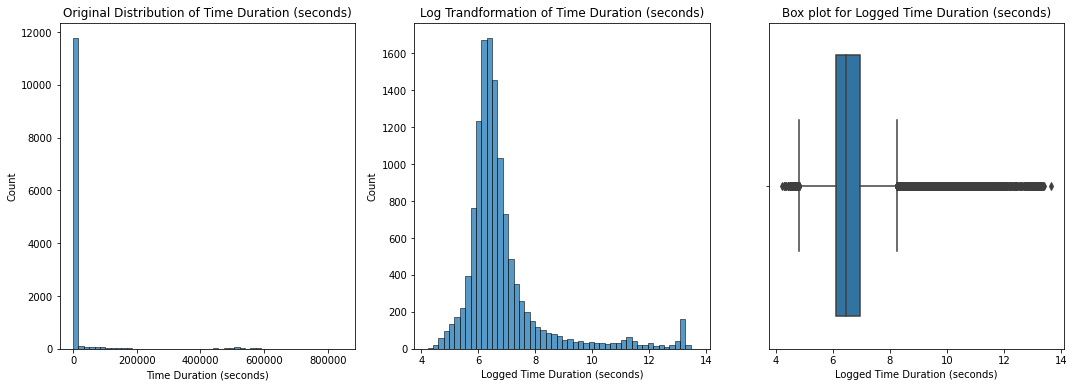

In [23]:
import numpy as np

time_log = np.log(df['Time from Start to Finish (seconds)'] + 1)

fig, ax = plt.subplots(1, 3, figsize=(18,6))
sns.histplot(df['Time from Start to Finish (seconds)'], ax=ax[0], bins=50)
ax[0].set_title("Original Distribution of Time Duration (seconds)")
ax[0].set_xlabel("Time Duration (seconds)")
sns.histplot(time_log, ax=ax[1], bins=50)
ax[1].set_title("Log Trandformation of Time Duration (seconds)")
ax[1].set_xlabel("Logged Time Duration (seconds)")
sns.boxplot(time_log, ax=ax[2])
ax[2].set_title("Box plot for Logged Time Duration (seconds)")
ax[2].set_xlabel("Logged Time Duration (seconds)")
plt.show()

/home/ubuntu/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


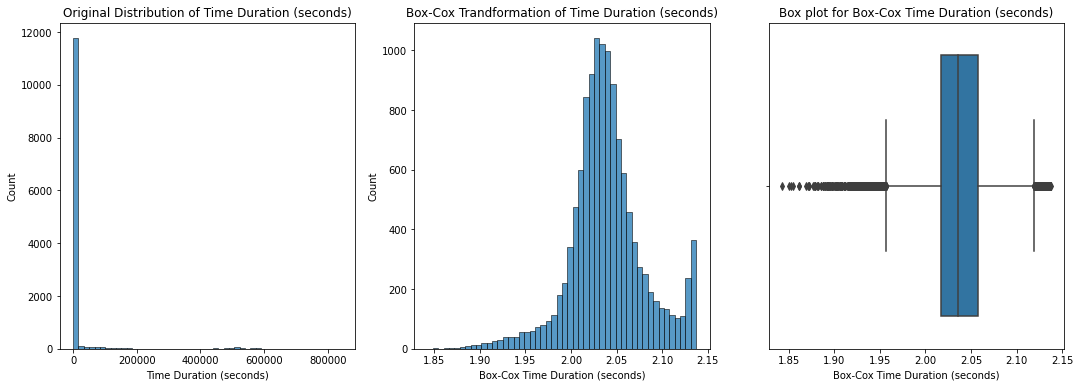

In [24]:
from scipy.stats import boxcox
time_boxcox, lambda_auto = boxcox(df['Time from Start to Finish (seconds)'] + 1)

fig, ax = plt.subplots(1, 3, figsize=(18,6))
sns.histplot(df['Time from Start to Finish (seconds)'], ax=ax[0], bins=50)
ax[0].set_title("Original Distribution of Time Duration (seconds)")
ax[0].set_xlabel("Time Duration (seconds)")
sns.histplot(time_boxcox, ax=ax[1], bins=50)
ax[1].set_title("Box-Cox Trandformation of Time Duration (seconds)")
ax[1].set_xlabel("Box-Cox Time Duration (seconds)")
sns.boxplot(time_boxcox, ax=ax[2])
ax[2].set_title("Box plot for Box-Cox Time Duration (seconds)")
ax[2].set_xlabel("Box-Cox Time Duration (seconds)")
plt.show()

In [25]:
df['Time from Start to Finish (seconds)'] = time_boxcox

df['Q7'].unique()
df['Q7'] = df['Q7'].replace({'3-Apr': '3-4', '1-Feb': '1-2', '5-Sep': '5-9', 'Oct-14': '10-14'})

df['Q11'].unique()
df['Q11'] = df['Q11'].replace({'$0 (USD)': '$0', '> $100,000 ($USD)': '> $100,000'})

df.columns

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q2_OTHER_TEXT',
       'Q3', 'Q4', 'Q5', 'Q5_OTHER_TEXT', 'Q6', 'Q7', 'Q8', 'Q9_Part_1',
       'Q9_Part_2', 'Q9_Part_3', 'Q9_Part_4', 'Q9_Part_5', 'Q9_Part_6',
       'Q9_Part_7', 'Q9_Part_8', 'Q9_OTHER_TEXT', 'Q10', 'Q11', 'Q15'],
      dtype='object')

In [26]:
df = df.rename(columns={'Time from Start to Finish (seconds)': 'Time Duration (seconds)', 'Q1': 'Age', 'Q2': 'Gender', 'Q3': 'Country', 'Q4': 'Education', 'Q5': 'Title', 'Q6': 'Company Size', 'Q7': 'Group Size', 'Q8': 'ML Incorporation', 'Q10': 'Salary', 'Q11': 'Tuition', 'Q15': 'Code Experience'})

df.fillna('0', inplace = True)
df['Q9_Part_1'].unique()
df['Q9_Part_1'] = df['Q9_Part_1'].replace({'Analyze and understand data to influence product or business decisions': '1'})
df['Q9_Part_2'].unique()
df['Q9_Part_2'] = df['Q9_Part_2'].replace({'Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data': '1'})
df['Q9_Part_3'].unique()
df['Q9_Part_3'] = df['Q9_Part_3'].replace({'Build prototypes to explore applying machine learning to new areas': '1'})
df['Q9_Part_4'].unique()
df['Q9_Part_4'] = df['Q9_Part_4'].replace({'Build and/or run a machine learning service that operationally improves my product or workflows': '1'})
df['Q9_Part_5'].unique()
df['Q9_Part_5'] = df['Q9_Part_5'].replace({'Experimentation and iteration to improve existing ML models': '1'})
df['Q9_Part_6'].unique()
df['Q9_Part_6'] = df['Q9_Part_6'].replace({'Do research that advances the state of the art of machine learning': '1'})
df['Q9_Part_7'].unique()
df['Q9_Part_7'] = df['Q9_Part_7'].replace({'None of these activities are an important part of my role at work': '1'})
df['Q9_Part_8'].unique()
df['Q9_Part_8'] = df['Q9_Part_8'].replace({'Other': '1'})

df = df.rename(columns={'Q9_Part_1': 'Analyze Data', 'Q9_Part_2': 'Build Infrastructure', 'Q9_Part_3': 'Build Prototypes', 'Q9_Part_4': 'Build ML Service', 'Q9_Part_5': 'Experimentation', 'Q9_Part_6': 'Research', 'Q9_Part_7': 'None', 'Q9_Part_8': 'Other'})

df_merge = pd.read_csv(file)
df_total = pd.merge(df_merge, df_other, left_index=True, right_index=True)

df.columns

Index(['Time Duration (seconds)', 'Age', 'Gender', 'Q2_OTHER_TEXT', 'Country',
       'Education', 'Title', 'Q5_OTHER_TEXT', 'Company Size', 'Group Size',
       'ML Incorporation', 'Analyze Data', 'Build Infrastructure',
       'Build Prototypes', 'Build ML Service', 'Experimentation', 'Research',
       'None', 'Other', 'Q9_OTHER_TEXT', 'Salary', 'Tuition',
       'Code Experience'],
      dtype='object')

In [27]:
df = df.drop(columns=['Q2_OTHER_TEXT', 'Q5_OTHER_TEXT', 'Q9_OTHER_TEXT'])

## 04-DT

Add any transformation steps

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12497 entries, 0 to 19716
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Time Duration (seconds)  12497 non-null  float64
 1   Age                      12497 non-null  object 
 2   Gender                   12497 non-null  object 
 3   Country                  12497 non-null  object 
 4   Education                12497 non-null  object 
 5   Title                    12497 non-null  object 
 6   Company Size             12497 non-null  object 
 7   Group Size               12497 non-null  object 
 8   ML Incorporation         12497 non-null  object 
 9   Analyze Data             12497 non-null  object 
 10  Build Infrastructure     12497 non-null  object 
 11  Build Prototypes         12497 non-null  object 
 12  Build ML Service         12497 non-null  object 
 13  Experimentation          12497 non-null  object 
 14  Research              

In [29]:
from scipy.stats import chi2_contingency

df_categorical = df.drop(columns = ['Time Duration (seconds)', 'Salary'])
p = {}
for i in df_categorical.columns:
    ct = pd.crosstab(df_categorical[i], df['Salary'])
    res = chi2_contingency(ct)
    p[i] = res[1]
p

{'Age': 0.0,
 'Gender': 4.151080553477964e-14,
 'Country': 0.0,
 'Education': 6.897442695517074e-74,
 'Title': 7.3641337801299e-61,
 'Company Size': 1.9634398222888516e-163,
 'Group Size': 4.503749172514538e-130,
 'ML Incorporation': 2.00986628689866e-208,
 'Analyze Data': 9.170698412363763e-107,
 'Build Infrastructure': 1.9101131424115792e-65,
 'Build Prototypes': 1.6726318705271823e-188,
 'Build ML Service': 3.474962134690186e-57,
 'Experimentation': 2.6865638876807383e-104,
 'Research': 1.310849707295184e-13,
 'None': 0.007237333453573411,
 'Other': 0.2990994829021082,
 'Tuition': 0.0,
 'Code Experience': 0.0}

In [30]:
df = df.drop(columns=['Other'])

from scipy.stats import stats
groups = []
for salary in df['Salary'].unique():
    group = df['Time Duration (seconds)'][df['Salary']== salary]
    groups.append(group)
    
fvalue, pvalue = stats.f_oneway(*groups)
fvalue

/tmp/ipykernel_3026/3148395133.py:9: DeprecationWarning: Please use `f_oneway` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  fvalue, pvalue = stats.f_oneway(*groups)


3.4969069851753147

In [31]:
pvalue

1.5386083567456994e-08

/home/ubuntu/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


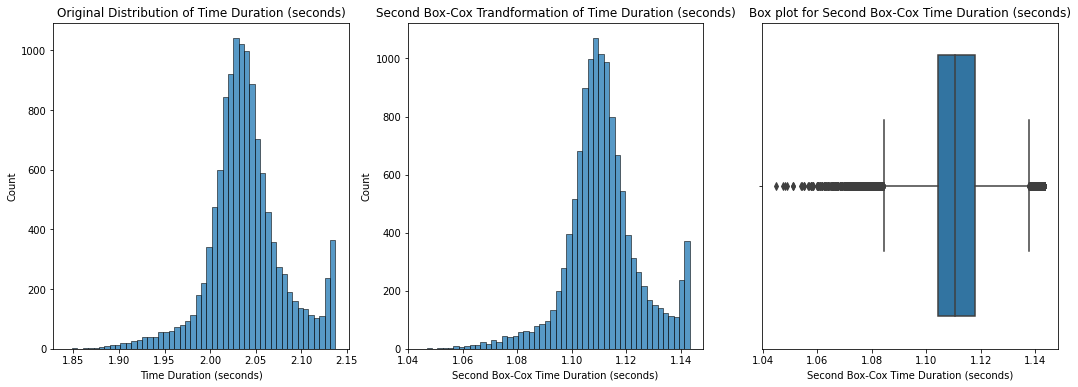

In [32]:
time_sec_boxcox = np.log(df['Time Duration (seconds)'] + 1)

fig, ax = plt.subplots(1, 3, figsize=(18,6))
sns.histplot(df['Time Duration (seconds)'], ax=ax[0], bins=50)
ax[0].set_title("Original Distribution of Time Duration (seconds)")
ax[0].set_xlabel("Time Duration (seconds)")
sns.histplot(time_sec_boxcox, ax=ax[1], bins=50)
ax[1].set_title("Second Box-Cox Trandformation of Time Duration (seconds)")
ax[1].set_xlabel("Second Box-Cox Time Duration (seconds)")
sns.boxplot(time_sec_boxcox, ax=ax[2])
ax[2].set_title("Box plot for Second Box-Cox Time Duration (seconds)")
ax[2].set_xlabel("Second Box-Cox Time Duration (seconds)")
plt.show()

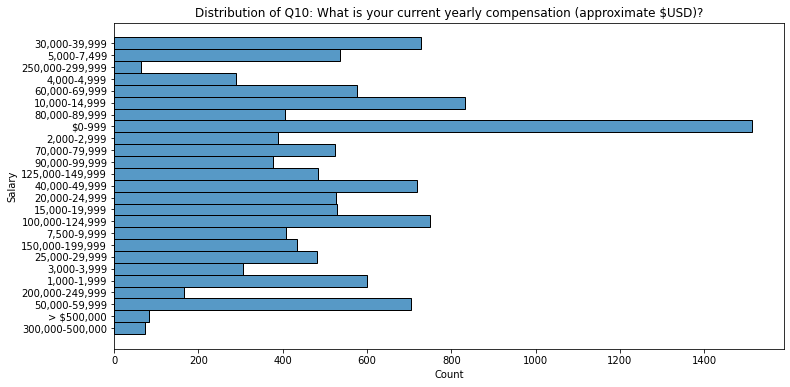

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, y='Salary')
plt.title("Distribution of Q10: What is your current yearly compensation (approximate $USD)?")
plt.ylabel("Salary")
plt.show()

In [34]:
df['Salary'].unique()

array(['30,000-39,999', '5,000-7,499', '250,000-299,999', '4,000-4,999',
       '60,000-69,999', '10,000-14,999', '80,000-89,999', '$0-999',
       '2,000-2,999', '70,000-79,999', '90,000-99,999', '125,000-149,999',
       '40,000-49,999', '20,000-24,999', '15,000-19,999',
       '100,000-124,999', '7,500-9,999', '150,000-199,999',
       '25,000-29,999', '3,000-3,999', '1,000-1,999', '200,000-249,999',
       '50,000-59,999', '> $500,000', '300,000-500,000'], dtype=object)

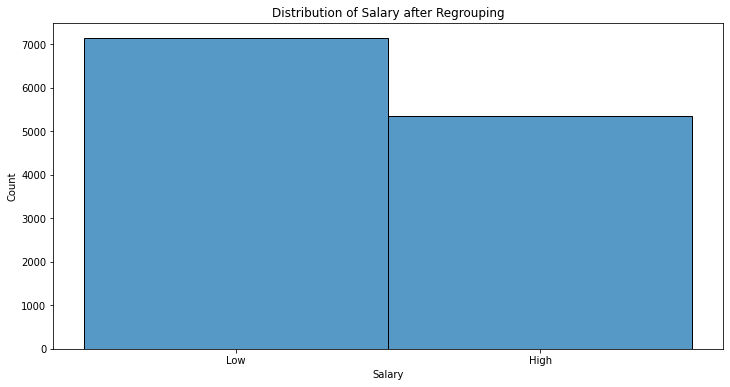

In [35]:
low_salary = ['$0-999','1,000-1,999','2,000-2,999','3,000-3,999','4,000-4,999','5,000-7,499','7,500-9,999','10,000-14,999','15,000-19,999','20,000-24,999','25,000-29,999','30,000-39,999']
high_salary = ['250,000-299,999', '60,000-69,999', '80,000-89,999','70,000-79,999', '90,000-99,999', '125,000-149,999','40,000-49,999', '100,000-124,999', '150,000-199,999','200,000-249,999', '50,000-59,999', '> $500,000','300,000-500,000']
df['Salary'] = df['Salary'].replace(low_salary, 'Low')
df['Salary'] = df['Salary'].replace(high_salary, 'High')

plt.figure(figsize=(12,6))
sns.histplot(df['Salary'])
plt.title("Distribution of Salary after Regrouping")
plt.xlabel("Salary")
plt.show()

In [36]:
df['Salary'].unique()

array(['Low', 'High'], dtype=object)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12497 entries, 0 to 19716
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Time Duration (seconds)  12497 non-null  float64
 1   Age                      12497 non-null  object 
 2   Gender                   12497 non-null  object 
 3   Country                  12497 non-null  object 
 4   Education                12497 non-null  object 
 5   Title                    12497 non-null  object 
 6   Company Size             12497 non-null  object 
 7   Group Size               12497 non-null  object 
 8   ML Incorporation         12497 non-null  object 
 9   Analyze Data             12497 non-null  object 
 10  Build Infrastructure     12497 non-null  object 
 11  Build Prototypes         12497 non-null  object 
 12  Build ML Service         12497 non-null  object 
 13  Experimentation          12497 non-null  object 
 14  Research              

In [38]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [39]:
from sklearn.preprocessing import LabelEncoder
df['Salary'] = LabelEncoder().fit_transform(df['Salary'])
df['Salary'] = 1 - df['Salary']

binary_columns=['Analyze Data', 'Build Infrastructure','Build Prototypes','Build ML Service', 'Experimentation', 'Research', 'None']
for col in binary_columns:
    df[col] = df[col].astype(int)

categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Age', 'Gender', 'Country', 'Education', 'Title', 'Company Size',
       'Group Size', 'ML Incorporation', 'Tuition', 'Code Experience'],
      dtype='object')

In [40]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


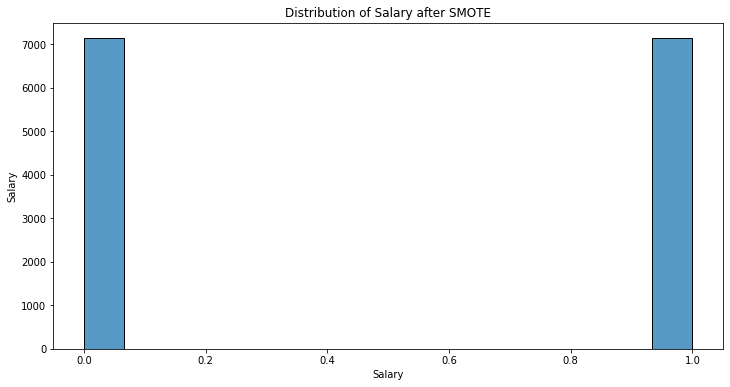

In [41]:
df = pd.get_dummies(df,columns=categorical_columns)

from imblearn.over_sampling import SMOTE

X = df.drop('Salary', axis=1)
y = df['Salary']

X_SMOTE, y_SMOTE = SMOTE().fit_resample(X,y)

plt.figure(figsize=(12,6))
sns.histplot(data=y_SMOTE)
plt.title("Distribution of Salary after SMOTE")
plt.ylabel("Salary")
plt.show()

In [42]:
df = pd.concat([X_SMOTE,pd.DataFrame(y_SMOTE)],axis=1)

## 05-DMM

Identify the Data Mining method
Describe how it aligns with the objectives

## 06-DMA

Load relevant algorithms

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

X = df.drop('Salary', axis=1)
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cl_r = classification_report(y_test, y_pred)
accuracy

0.7542016806722689

In [44]:
from sklearn.ensemble import RandomForestClassifier

clf_random = RandomForestClassifier(n_estimators=100, random_state=42)
clf_random.fit(X_train, y_train)
y_pred = clf_random.predict(X_test)
accuracy_random = accuracy_score(y_test, y_pred)
cl_r_random = classification_report(y_test, y_pred)
accuracy_random

0.8431372549019608

In [45]:
pip install catboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [46]:
from catboost import CatBoostClassifier

clf_cat = CatBoostClassifier(iterations=500, depth=10, learning_rate=0.05, loss_function='Logloss')
clf_cat.fit(X_train, y_train)
y_pred = clf_cat.predict(X_test)
accuracy_cat = accuracy_score(y_test, y_pred)
cl_r_cat = classification_report(y_test, y_pred)
accuracy_cat

0:	learn: 0.6677924	total: 68.4ms	remaining: 34.1s
1:	learn: 0.6442556	total: 87ms	remaining: 21.7s
2:	learn: 0.6233461	total: 105ms	remaining: 17.3s
3:	learn: 0.6055628	total: 122ms	remaining: 15.2s
4:	learn: 0.5902477	total: 140ms	remaining: 13.8s
5:	learn: 0.5752933	total: 158ms	remaining: 13s
6:	learn: 0.5624359	total: 176ms	remaining: 12.4s
7:	learn: 0.5511642	total: 194ms	remaining: 11.9s
8:	learn: 0.5415401	total: 211ms	remaining: 11.5s
9:	learn: 0.5337356	total: 229ms	remaining: 11.2s
10:	learn: 0.5242317	total: 246ms	remaining: 10.9s
11:	learn: 0.5199646	total: 250ms	remaining: 10.2s
12:	learn: 0.5127058	total: 267ms	remaining: 10s
13:	learn: 0.5062119	total: 287ms	remaining: 9.97s
14:	learn: 0.4995993	total: 305ms	remaining: 9.87s
15:	learn: 0.4934902	total: 322ms	remaining: 9.75s
16:	learn: 0.4885388	total: 340ms	remaining: 9.65s
17:	learn: 0.4840454	total: 359ms	remaining: 9.63s
18:	learn: 0.4794763	total: 378ms	remaining: 9.56s
19:	learn: 0.4748147	total: 395ms	remaining: 

165:	learn: 0.3095857	total: 2.87s	remaining: 5.77s
166:	learn: 0.3090050	total: 2.88s	remaining: 5.75s
167:	learn: 0.3084478	total: 2.9s	remaining: 5.73s
168:	learn: 0.3080242	total: 2.92s	remaining: 5.71s
169:	learn: 0.3074895	total: 2.93s	remaining: 5.69s
170:	learn: 0.3070277	total: 2.95s	remaining: 5.67s
171:	learn: 0.3064174	total: 2.97s	remaining: 5.66s
172:	learn: 0.3060662	total: 2.98s	remaining: 5.64s
173:	learn: 0.3056055	total: 3s	remaining: 5.62s
174:	learn: 0.3052232	total: 3.02s	remaining: 5.6s
175:	learn: 0.3046712	total: 3.03s	remaining: 5.58s
176:	learn: 0.3039860	total: 3.05s	remaining: 5.57s
177:	learn: 0.3036287	total: 3.07s	remaining: 5.55s
178:	learn: 0.3032037	total: 3.08s	remaining: 5.53s
179:	learn: 0.3025545	total: 3.1s	remaining: 5.51s
180:	learn: 0.3020562	total: 3.12s	remaining: 5.5s
181:	learn: 0.3011746	total: 3.13s	remaining: 5.48s
182:	learn: 0.3007123	total: 3.15s	remaining: 5.46s
183:	learn: 0.3001170	total: 3.17s	remaining: 5.44s
184:	learn: 0.29959

328:	learn: 0.2314317	total: 5.65s	remaining: 2.94s
329:	learn: 0.2311251	total: 5.66s	remaining: 2.92s
330:	learn: 0.2306731	total: 5.68s	remaining: 2.9s
331:	learn: 0.2302863	total: 5.7s	remaining: 2.88s
332:	learn: 0.2299902	total: 5.71s	remaining: 2.87s
333:	learn: 0.2295667	total: 5.73s	remaining: 2.85s
334:	learn: 0.2292552	total: 5.75s	remaining: 2.83s
335:	learn: 0.2288536	total: 5.77s	remaining: 2.81s
336:	learn: 0.2282705	total: 5.78s	remaining: 2.8s
337:	learn: 0.2277331	total: 5.8s	remaining: 2.78s
338:	learn: 0.2272706	total: 5.82s	remaining: 2.76s
339:	learn: 0.2270619	total: 5.83s	remaining: 2.75s
340:	learn: 0.2266739	total: 5.85s	remaining: 2.73s
341:	learn: 0.2263990	total: 5.87s	remaining: 2.71s
342:	learn: 0.2259041	total: 5.88s	remaining: 2.69s
343:	learn: 0.2255479	total: 5.9s	remaining: 2.68s
344:	learn: 0.2252115	total: 5.92s	remaining: 2.66s
345:	learn: 0.2249444	total: 5.94s	remaining: 2.64s
346:	learn: 0.2242027	total: 5.95s	remaining: 2.63s
347:	learn: 0.223

489:	learn: 0.1732858	total: 8.4s	remaining: 172ms
490:	learn: 0.1728104	total: 8.42s	remaining: 154ms
491:	learn: 0.1724676	total: 8.44s	remaining: 137ms
492:	learn: 0.1720686	total: 8.46s	remaining: 120ms
493:	learn: 0.1718376	total: 8.47s	remaining: 103ms
494:	learn: 0.1715636	total: 8.49s	remaining: 85.8ms
495:	learn: 0.1713685	total: 8.51s	remaining: 68.6ms
496:	learn: 0.1710839	total: 8.52s	remaining: 51.5ms
497:	learn: 0.1707310	total: 8.54s	remaining: 34.3ms
498:	learn: 0.1704650	total: 8.56s	remaining: 17.2ms
499:	learn: 0.1701311	total: 8.57s	remaining: 0us


0.8557422969187675

In [47]:
from sklearn.ensemble import ExtraTreesClassifier

clf_etr = ExtraTreesClassifier(n_estimators=100, random_state=42)
clf_etr.fit(X_train, y_train)
y_pred = clf_etr.predict(X_test)
accuracy_etr = accuracy_score(y_test, y_pred)
cl_r_etr = classification_report(y_test, y_pred)
accuracy_etr

0.8427871148459384

## 07-DM

Execute DM task

In [48]:
from sklearn.model_selection import train_test_split

X = df.drop('Salary', axis=1)
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

from sklearn.model_selection import GridSearchCV

In [49]:
from catboost import CatBoostClassifier

clf_ini = CatBoostClassifier(iterations=1500, learning_rate=0.03, loss_function='Logloss')
clf_ini.fit(X_train, y_train)
y_pred = clf_ini.predict(X_test)
accuracy_ini = accuracy_score(y_test, y_pred)
cl_r_ini = classification_report(y_test, y_pred)
accuracy_ini

0:	learn: 0.6793109	total: 4.05ms	remaining: 6.08s
1:	learn: 0.6669736	total: 7.76ms	remaining: 5.81s
2:	learn: 0.6552700	total: 11.4ms	remaining: 5.69s
3:	learn: 0.6442700	total: 14.9ms	remaining: 5.57s
4:	learn: 0.6345419	total: 18.5ms	remaining: 5.52s
5:	learn: 0.6249331	total: 22.1ms	remaining: 5.51s
6:	learn: 0.6167275	total: 25.6ms	remaining: 5.46s
7:	learn: 0.6079222	total: 29.2ms	remaining: 5.45s
8:	learn: 0.6007048	total: 32.7ms	remaining: 5.42s
9:	learn: 0.5935931	total: 36.4ms	remaining: 5.42s
10:	learn: 0.5871343	total: 39.9ms	remaining: 5.41s
11:	learn: 0.5812186	total: 43.6ms	remaining: 5.41s
12:	learn: 0.5754810	total: 47.3ms	remaining: 5.41s
13:	learn: 0.5696900	total: 50.9ms	remaining: 5.4s
14:	learn: 0.5648771	total: 54.4ms	remaining: 5.38s
15:	learn: 0.5602451	total: 58ms	remaining: 5.38s
16:	learn: 0.5563165	total: 61.6ms	remaining: 5.38s
17:	learn: 0.5522653	total: 65.3ms	remaining: 5.37s
18:	learn: 0.5485437	total: 68.9ms	remaining: 5.37s
19:	learn: 0.5445909	tota

165:	learn: 0.4102166	total: 601ms	remaining: 4.83s
166:	learn: 0.4099465	total: 605ms	remaining: 4.83s
167:	learn: 0.4096996	total: 609ms	remaining: 4.83s
168:	learn: 0.4093991	total: 612ms	remaining: 4.82s
169:	learn: 0.4090572	total: 616ms	remaining: 4.82s
170:	learn: 0.4086834	total: 619ms	remaining: 4.81s
171:	learn: 0.4084384	total: 623ms	remaining: 4.81s
172:	learn: 0.4082078	total: 627ms	remaining: 4.8s
173:	learn: 0.4079383	total: 630ms	remaining: 4.8s
174:	learn: 0.4075073	total: 634ms	remaining: 4.8s
175:	learn: 0.4072920	total: 637ms	remaining: 4.79s
176:	learn: 0.4070384	total: 641ms	remaining: 4.79s
177:	learn: 0.4067793	total: 644ms	remaining: 4.79s
178:	learn: 0.4065424	total: 648ms	remaining: 4.78s
179:	learn: 0.4062166	total: 652ms	remaining: 4.78s
180:	learn: 0.4060001	total: 655ms	remaining: 4.77s
181:	learn: 0.4057069	total: 659ms	remaining: 4.77s
182:	learn: 0.4053978	total: 662ms	remaining: 4.77s
183:	learn: 0.4050367	total: 666ms	remaining: 4.76s
184:	learn: 0.4

332:	learn: 0.3707639	total: 1.2s	remaining: 4.21s
333:	learn: 0.3705813	total: 1.2s	remaining: 4.2s
334:	learn: 0.3703510	total: 1.21s	remaining: 4.2s
335:	learn: 0.3701268	total: 1.21s	remaining: 4.2s
336:	learn: 0.3699408	total: 1.21s	remaining: 4.19s
337:	learn: 0.3697540	total: 1.22s	remaining: 4.19s
338:	learn: 0.3695750	total: 1.22s	remaining: 4.18s
339:	learn: 0.3693351	total: 1.23s	remaining: 4.18s
340:	learn: 0.3690879	total: 1.23s	remaining: 4.18s
341:	learn: 0.3689040	total: 1.23s	remaining: 4.17s
342:	learn: 0.3687220	total: 1.24s	remaining: 4.17s
343:	learn: 0.3684736	total: 1.24s	remaining: 4.17s
344:	learn: 0.3682943	total: 1.24s	remaining: 4.16s
345:	learn: 0.3680620	total: 1.25s	remaining: 4.16s
346:	learn: 0.3678526	total: 1.25s	remaining: 4.15s
347:	learn: 0.3676134	total: 1.25s	remaining: 4.15s
348:	learn: 0.3674280	total: 1.26s	remaining: 4.15s
349:	learn: 0.3672179	total: 1.26s	remaining: 4.14s
350:	learn: 0.3670223	total: 1.26s	remaining: 4.14s
351:	learn: 0.366

502:	learn: 0.3397938	total: 1.8s	remaining: 3.56s
503:	learn: 0.3396531	total: 1.8s	remaining: 3.56s
504:	learn: 0.3394664	total: 1.8s	remaining: 3.56s
505:	learn: 0.3393068	total: 1.81s	remaining: 3.55s
506:	learn: 0.3391852	total: 1.81s	remaining: 3.55s
507:	learn: 0.3389801	total: 1.81s	remaining: 3.55s
508:	learn: 0.3388133	total: 1.82s	remaining: 3.54s
509:	learn: 0.3386400	total: 1.82s	remaining: 3.54s
510:	learn: 0.3384227	total: 1.83s	remaining: 3.53s
511:	learn: 0.3382505	total: 1.83s	remaining: 3.53s
512:	learn: 0.3380867	total: 1.83s	remaining: 3.53s
513:	learn: 0.3379378	total: 1.84s	remaining: 3.52s
514:	learn: 0.3378010	total: 1.84s	remaining: 3.52s
515:	learn: 0.3376642	total: 1.84s	remaining: 3.52s
516:	learn: 0.3374956	total: 1.85s	remaining: 3.51s
517:	learn: 0.3373417	total: 1.85s	remaining: 3.51s
518:	learn: 0.3372113	total: 1.85s	remaining: 3.5s
519:	learn: 0.3370481	total: 1.86s	remaining: 3.5s
520:	learn: 0.3368769	total: 1.86s	remaining: 3.5s
521:	learn: 0.3367

673:	learn: 0.3148318	total: 2.4s	remaining: 2.94s
674:	learn: 0.3146809	total: 2.4s	remaining: 2.94s
675:	learn: 0.3145580	total: 2.41s	remaining: 2.93s
676:	learn: 0.3144359	total: 2.41s	remaining: 2.93s
677:	learn: 0.3142768	total: 2.41s	remaining: 2.93s
678:	learn: 0.3141525	total: 2.42s	remaining: 2.92s
679:	learn: 0.3140359	total: 2.42s	remaining: 2.92s
680:	learn: 0.3139061	total: 2.42s	remaining: 2.92s
681:	learn: 0.3137728	total: 2.43s	remaining: 2.91s
682:	learn: 0.3136369	total: 2.43s	remaining: 2.91s
683:	learn: 0.3135028	total: 2.44s	remaining: 2.9s
684:	learn: 0.3134090	total: 2.44s	remaining: 2.9s
685:	learn: 0.3132812	total: 2.44s	remaining: 2.9s
686:	learn: 0.3131713	total: 2.44s	remaining: 2.89s
687:	learn: 0.3130232	total: 2.45s	remaining: 2.89s
688:	learn: 0.3128959	total: 2.45s	remaining: 2.89s
689:	learn: 0.3127617	total: 2.46s	remaining: 2.88s
690:	learn: 0.3126228	total: 2.46s	remaining: 2.88s
691:	learn: 0.3125257	total: 2.46s	remaining: 2.88s
692:	learn: 0.312

842:	learn: 0.2938936	total: 3s	remaining: 2.34s
843:	learn: 0.2938075	total: 3s	remaining: 2.33s
844:	learn: 0.2936896	total: 3s	remaining: 2.33s
845:	learn: 0.2935484	total: 3.01s	remaining: 2.33s
846:	learn: 0.2934061	total: 3.01s	remaining: 2.32s
847:	learn: 0.2933104	total: 3.02s	remaining: 2.32s
848:	learn: 0.2931506	total: 3.02s	remaining: 2.31s
849:	learn: 0.2930499	total: 3.02s	remaining: 2.31s
850:	learn: 0.2929357	total: 3.02s	remaining: 2.31s
851:	learn: 0.2928414	total: 3.03s	remaining: 2.3s
852:	learn: 0.2927423	total: 3.03s	remaining: 2.3s
853:	learn: 0.2926419	total: 3.04s	remaining: 2.3s
854:	learn: 0.2924993	total: 3.04s	remaining: 2.29s
855:	learn: 0.2924140	total: 3.04s	remaining: 2.29s
856:	learn: 0.2922964	total: 3.05s	remaining: 2.29s
857:	learn: 0.2921886	total: 3.05s	remaining: 2.28s
858:	learn: 0.2920842	total: 3.05s	remaining: 2.28s
859:	learn: 0.2919279	total: 3.06s	remaining: 2.27s
860:	learn: 0.2918332	total: 3.06s	remaining: 2.27s
861:	learn: 0.2916772	to

1012:	learn: 0.2755819	total: 3.6s	remaining: 1.73s
1013:	learn: 0.2754905	total: 3.6s	remaining: 1.73s
1014:	learn: 0.2753947	total: 3.6s	remaining: 1.72s
1015:	learn: 0.2752975	total: 3.61s	remaining: 1.72s
1016:	learn: 0.2752095	total: 3.61s	remaining: 1.72s
1017:	learn: 0.2751007	total: 3.62s	remaining: 1.71s
1018:	learn: 0.2750250	total: 3.62s	remaining: 1.71s
1019:	learn: 0.2748652	total: 3.62s	remaining: 1.7s
1020:	learn: 0.2747650	total: 3.63s	remaining: 1.7s
1021:	learn: 0.2746544	total: 3.63s	remaining: 1.7s
1022:	learn: 0.2745577	total: 3.63s	remaining: 1.69s
1023:	learn: 0.2744747	total: 3.64s	remaining: 1.69s
1024:	learn: 0.2743755	total: 3.64s	remaining: 1.69s
1025:	learn: 0.2742805	total: 3.64s	remaining: 1.68s
1026:	learn: 0.2741621	total: 3.65s	remaining: 1.68s
1027:	learn: 0.2740651	total: 3.65s	remaining: 1.68s
1028:	learn: 0.2739455	total: 3.65s	remaining: 1.67s
1029:	learn: 0.2738255	total: 3.66s	remaining: 1.67s
1030:	learn: 0.2737095	total: 3.66s	remaining: 1.67s

1183:	learn: 0.2586533	total: 4.2s	remaining: 1.12s
1184:	learn: 0.2585979	total: 4.21s	remaining: 1.12s
1185:	learn: 0.2584999	total: 4.21s	remaining: 1.11s
1186:	learn: 0.2584295	total: 4.21s	remaining: 1.11s
1187:	learn: 0.2583490	total: 4.22s	remaining: 1.11s
1188:	learn: 0.2582817	total: 4.22s	remaining: 1.1s
1189:	learn: 0.2581469	total: 4.22s	remaining: 1.1s
1190:	learn: 0.2580287	total: 4.23s	remaining: 1.1s
1191:	learn: 0.2579320	total: 4.23s	remaining: 1.09s
1192:	learn: 0.2578329	total: 4.23s	remaining: 1.09s
1193:	learn: 0.2577408	total: 4.24s	remaining: 1.09s
1194:	learn: 0.2576648	total: 4.24s	remaining: 1.08s
1195:	learn: 0.2575663	total: 4.25s	remaining: 1.08s
1196:	learn: 0.2574847	total: 4.25s	remaining: 1.07s
1197:	learn: 0.2574030	total: 4.25s	remaining: 1.07s
1198:	learn: 0.2573396	total: 4.25s	remaining: 1.07s
1199:	learn: 0.2572785	total: 4.26s	remaining: 1.06s
1200:	learn: 0.2571716	total: 4.26s	remaining: 1.06s
1201:	learn: 0.2570780	total: 4.26s	remaining: 1.0

1351:	learn: 0.2436199	total: 4.81s	remaining: 526ms
1352:	learn: 0.2435375	total: 4.81s	remaining: 523ms
1353:	learn: 0.2434774	total: 4.81s	remaining: 519ms
1354:	learn: 0.2434025	total: 4.82s	remaining: 516ms
1355:	learn: 0.2433307	total: 4.82s	remaining: 512ms
1356:	learn: 0.2432734	total: 4.83s	remaining: 508ms
1357:	learn: 0.2431954	total: 4.83s	remaining: 505ms
1358:	learn: 0.2431252	total: 4.83s	remaining: 501ms
1359:	learn: 0.2430694	total: 4.83s	remaining: 498ms
1360:	learn: 0.2429896	total: 4.84s	remaining: 494ms
1361:	learn: 0.2429223	total: 4.84s	remaining: 491ms
1362:	learn: 0.2427779	total: 4.85s	remaining: 487ms
1363:	learn: 0.2427103	total: 4.85s	remaining: 484ms
1364:	learn: 0.2426347	total: 4.85s	remaining: 480ms
1365:	learn: 0.2425523	total: 4.86s	remaining: 476ms
1366:	learn: 0.2424419	total: 4.86s	remaining: 473ms
1367:	learn: 0.2423687	total: 4.86s	remaining: 469ms
1368:	learn: 0.2422965	total: 4.87s	remaining: 466ms
1369:	learn: 0.2422085	total: 4.87s	remaining:

0.8567927170868347

In [50]:
#param_grid = {'iterations': [1000, 2000, 3000], 'learning_rate': [0.01, 0.05, 0.1], 'depth': [4,6,10]}

#clf_cat = CatBoostClassifier()

#grid_search = GridSearchCV(clf_cat, param_grid, cv=5)
#grid_search.fit(X_train, y_train)

#grid_search.best_params_

In [51]:
clf_gri = CatBoostClassifier(iterations=1000, depth=4, learning_rate=0.1, loss_function='Logloss', verbose=50)
clf_gri.fit(X_train, y_train)
y_pred = clf_gri.predict(X_test)
accuracy_gri = accuracy_score(y_test, y_pred)
cl_r_gri = classification_report(y_test, y_pred)
accuracy_gri

0:	learn: 0.6572761	total: 2.99ms	remaining: 2.99s
50:	learn: 0.4349773	total: 136ms	remaining: 2.53s
100:	learn: 0.3979406	total: 271ms	remaining: 2.41s
150:	learn: 0.3734408	total: 404ms	remaining: 2.27s
200:	learn: 0.3561363	total: 541ms	remaining: 2.15s
250:	learn: 0.3422736	total: 679ms	remaining: 2.02s
300:	learn: 0.3304692	total: 818ms	remaining: 1.9s
350:	learn: 0.3194191	total: 951ms	remaining: 1.76s
400:	learn: 0.3094946	total: 1.09s	remaining: 1.62s
450:	learn: 0.3008305	total: 1.23s	remaining: 1.49s
500:	learn: 0.2926363	total: 1.36s	remaining: 1.36s
550:	learn: 0.2845648	total: 1.5s	remaining: 1.22s
600:	learn: 0.2774449	total: 1.63s	remaining: 1.08s
650:	learn: 0.2704766	total: 1.77s	remaining: 949ms
700:	learn: 0.2641956	total: 1.91s	remaining: 813ms
750:	learn: 0.2585279	total: 2.04s	remaining: 678ms
800:	learn: 0.2529310	total: 2.18s	remaining: 542ms
850:	learn: 0.2475670	total: 2.32s	remaining: 406ms
900:	learn: 0.2418963	total: 2.46s	remaining: 270ms
950:	learn: 0.23

0.853641456582633

In [52]:
clf_ini.feature_importances_

array([4.95433251e+00, 7.09951556e-01, 5.76208372e-01, 1.43697963e+00,
       4.71320563e-01, 6.00580983e-01, 8.66714357e-01, 2.05453244e-01,
       1.17152208e+00, 4.07536528e+00, 2.87862051e+00, 1.37935013e+00,
       6.97536671e-01, 4.33626901e-01, 3.98805288e-01, 4.43044301e-01,
       2.38370380e-01, 3.40811790e-01, 7.96338087e-02, 1.33386517e+00,
       2.73364213e-01, 4.77290514e-01, 6.54483399e-03, 1.88625334e-01,
       6.69542615e-01, 7.15998093e-01, 7.13468029e-02, 4.50377196e-01,
       2.62208812e-01, 6.77306475e-02, 1.78115906e+00, 9.98518284e-01,
       3.00593129e-01, 4.62899779e-01, 6.02675658e-01, 1.36212992e-01,
       1.43738823e-01, 3.24232896e-01, 3.58696534e-01, 8.76835679e-01,
       2.70411979e-01, 4.01465801e-02, 2.14240886e-01, 6.77081686e+00,
       6.17778326e-01, 3.98752371e-01, 4.24519443e-02, 1.04453489e-01,
       4.09631190e-01, 4.02745881e-01, 3.74644705e-01, 1.80172205e-01,
       3.61806107e-01, 4.65638013e-01, 2.12627526e-01, 1.05599395e-01,
      

In [53]:
clf_gri.feature_importances_

array([ 4.87482011,  0.57329936,  0.5036971 ,  1.30248048,  0.34164874,
        0.48076442,  0.67093364,  0.18929569,  1.14365994,  3.92388354,
        2.70638872,  1.30945528,  0.58618783,  0.47139193,  0.36688719,
        0.40152546,  0.37658454,  0.32681618,  0.11013444,  1.20222979,
        0.3549049 ,  0.58846424,  0.04694875,  0.26498111,  0.75349674,
        0.74082526,  0.09465522,  0.67575878,  0.33780342,  0.09528958,
        1.88567455,  0.96763216,  0.36466275,  0.45610777,  0.62562984,
        0.17858851,  0.19184413,  0.38486824,  0.40024138,  0.89331304,
        0.32061262,  0.05908272,  0.25279116,  6.78111331,  0.76613904,
        0.51364584,  0.03790433,  0.16241949,  0.4478498 ,  0.41649392,
        0.48771381,  0.22341108,  0.40346496,  0.56825269,  0.29523471,
        0.14446656,  1.37232986,  0.1451987 ,  1.20939258,  1.25524613,
        0.50769229,  0.25431832,  0.4809627 ,  0.38453591,  0.27351203,
        0.27709744,  1.56494433,  0.05455613,  0.11996156,  0.25

In [54]:
feature_importances = clf_gri.feature_importances_
feature_names = X_train.columns
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    print(f"{name}: {score}")

Country_United States of America: 10.243512656099908
Country_India: 6.781113307226686
Time Duration (seconds): 4.874820112539949
Age_22-24: 3.9238835431146213
Age_25-29: 2.7063887178079393
Company Size_0-49 employees: 2.116703662201678
Country_Brazil: 1.8856745543633886
Tuition_$1-$99: 1.7752562405203443
Code Experience_< 1 years: 1.7052852345383014
Country_Russia: 1.5649443258065432
Tuition_$0: 1.4114131202028988
Country_Nigeria: 1.3723298629132175
Code Experience_1-2 years: 1.3525560252352975
Age_30-34: 1.3094552815413152
Build Prototypes: 1.302480478262641
Tuition_$100-$999: 1.263913830582031
Country_Pakistan: 1.2552461270835382
Country_Other: 1.209392584540121
Gender_Female: 1.2022297851626915
Age_18-21: 1.1436599371777152
Tuition_> $100,000: 1.0405058154043052
Country_Turkey: 1.0295429326483851
Code Experience_10-20 years: 0.9741364400639508
Country_Canada: 0.9676321618800561
ML Incorporation_I do not know: 0.9357970242032027
Country_Germany: 0.8933130446812719
ML Incorporation_No

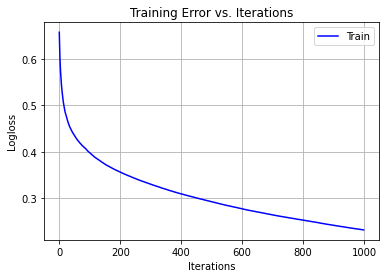

In [55]:
evals_result = clf_gri.get_evals_result()
train_errors = evals_result['learn']['Logloss']

iterations = list(range(len(train_errors)))

plt.plot(iterations, train_errors, label='Train', color='blue')

plt.title('Training Error vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Logloss')
plt.legend()
plt.grid(True)
plt.show()

In [56]:
pip install shap

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


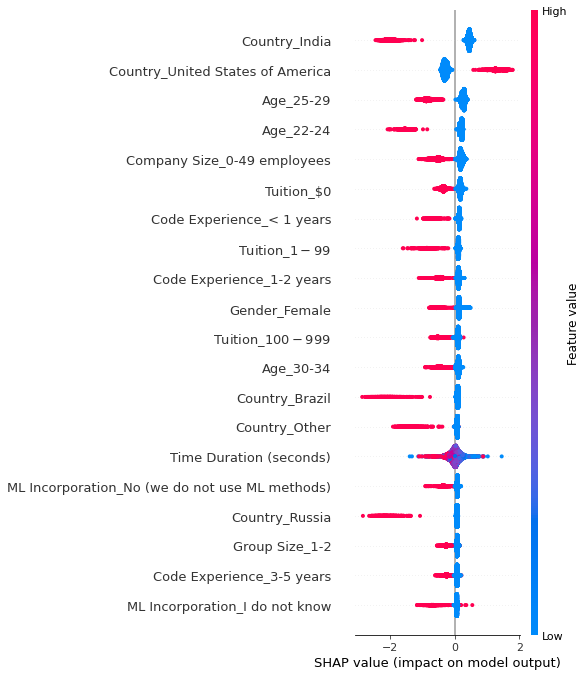

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


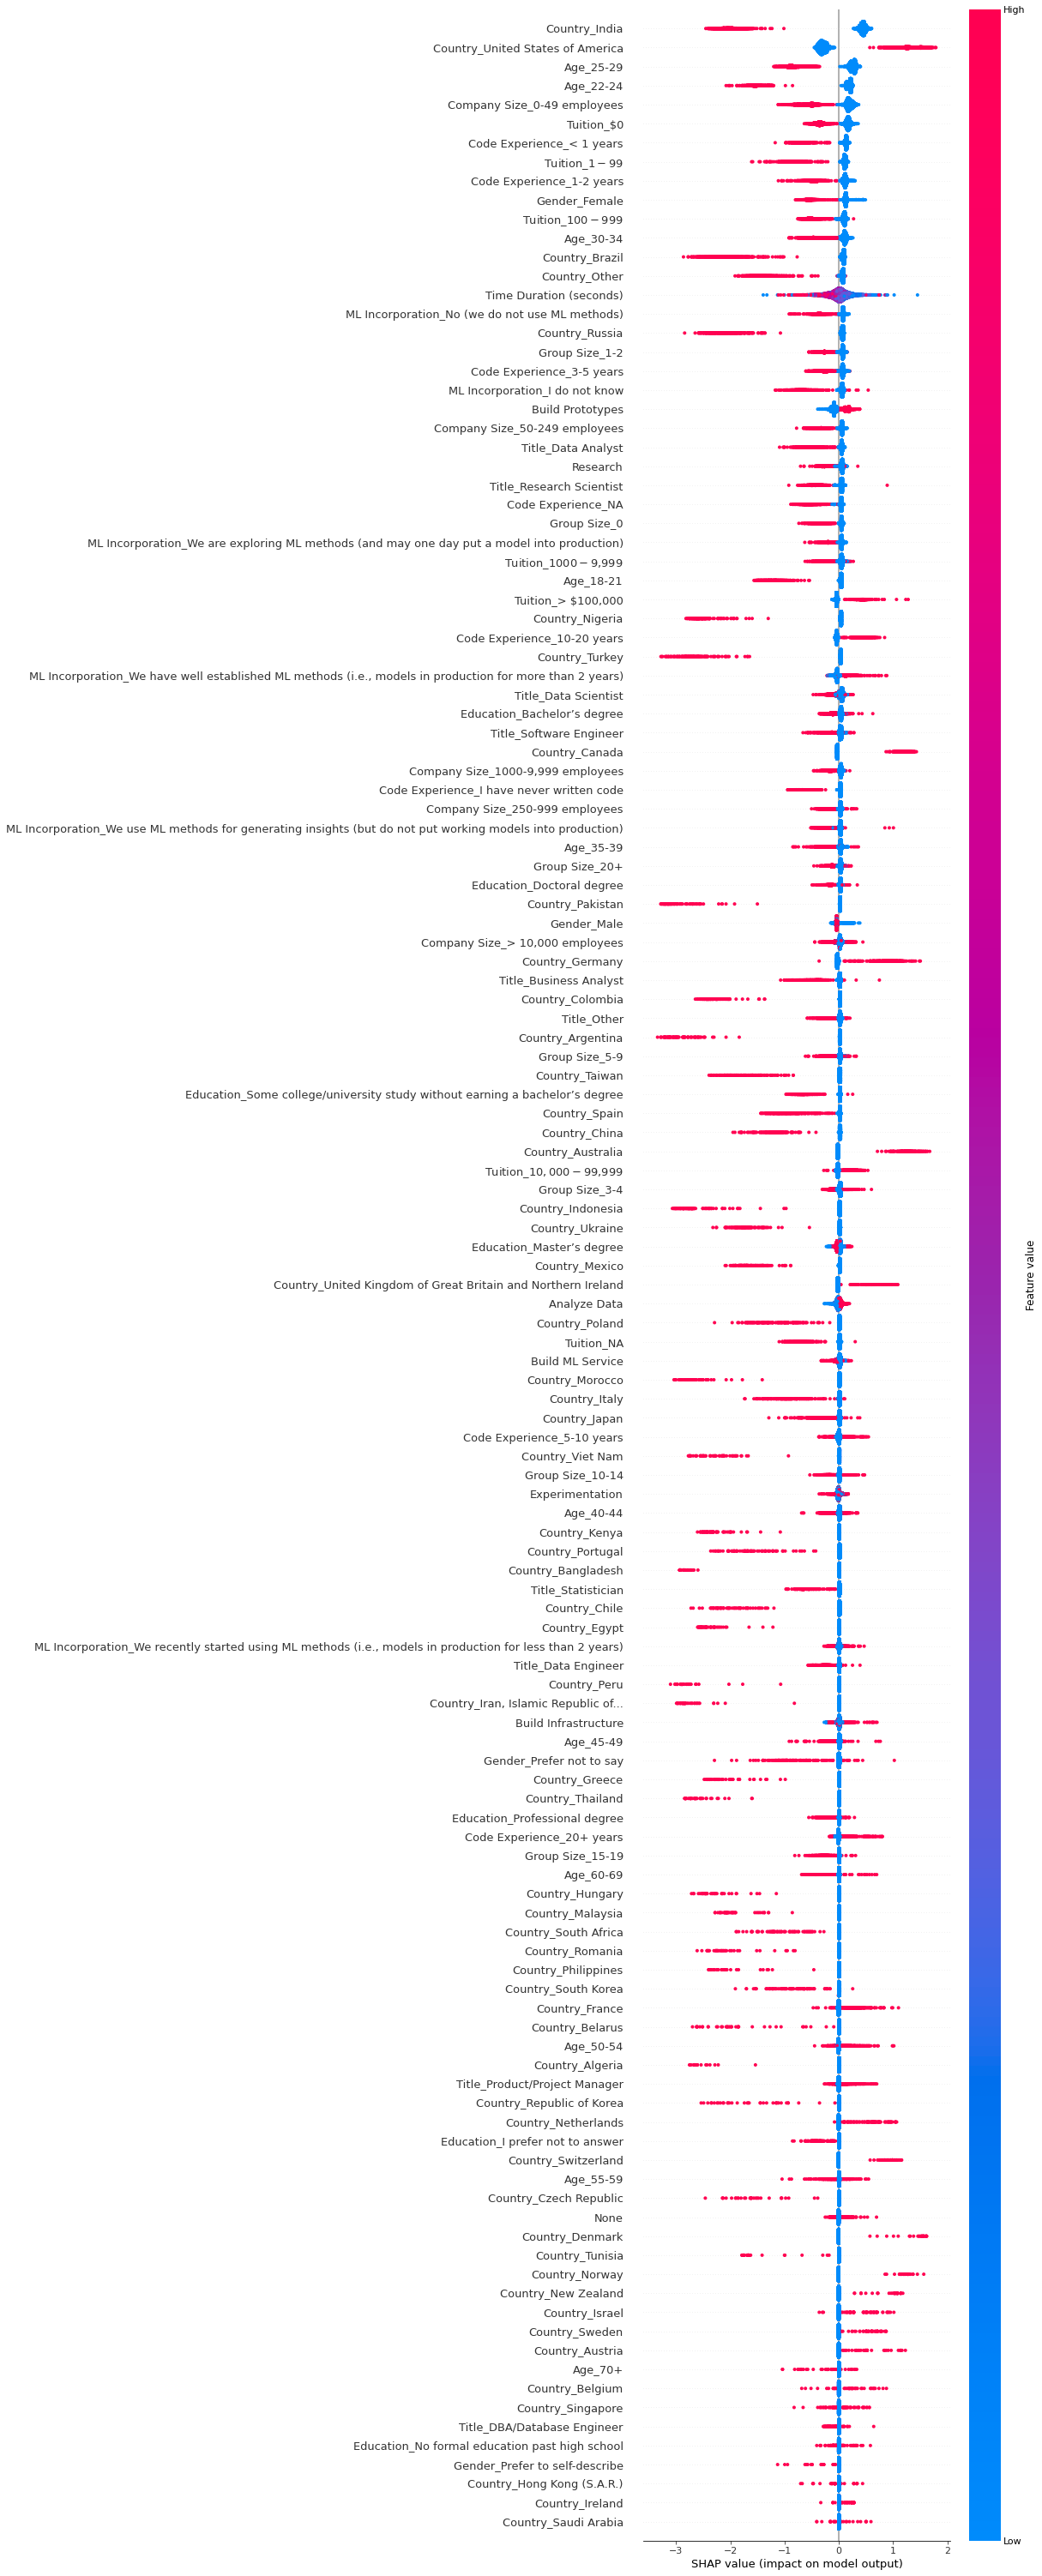

In [57]:
import shap
explainer = shap.TreeExplainer(clf_gri)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)
shap.summary_plot(shap_values, X_train, max_display=X_train.shape[1])

## 08-INT

Summarise Results

In [58]:
country_importances = [(name, feature_importances) for name, feature_importances in zip(feature_names, feature_importances) if name.startswith('Country_')]
country_importances = sorted(country_importances, key=lambda x: x[1], reverse=True)
country_importances_sum = 0
for name, country_importances in country_importances:
    country_importances_sum += country_importances
    print(f"{name}: {country_importances}")
country_importances_sum

Country_United States of America: 10.243512656099908
Country_India: 6.781113307226686
Country_Brazil: 1.8856745543633886
Country_Russia: 1.5649443258065432
Country_Nigeria: 1.3723298629132175
Country_Pakistan: 1.2552461270835382
Country_Other: 1.209392584540121
Country_Turkey: 1.0295429326483851
Country_Canada: 0.9676321618800561
Country_Germany: 0.8933130446812719
Country_Indonesia: 0.766139038363559
Country_Argentina: 0.7534967427420999
Country_Australia: 0.7408252550393807
Country_Bangladesh: 0.6757587773301448
Country_Colombia: 0.6256298358435918
Country_Spain: 0.586782701550263
Country_United Kingdom of Great Britain and Northern Ireland: 0.5806922049654463
Country_Morocco: 0.568252692511947
Country_Taiwan: 0.557969677637953
Country_Viet Nam: 0.5331322501217395
Country_Iran, Islamic Republic of...: 0.5136458430993341
Country_Peru: 0.5076922878307063
Country_Kenya: 0.4877138112413614
Country_Poland: 0.4809626952774409
Country_China: 0.45610776502618944
Country_Italy: 0.447849804926

44.51640238221635

In [59]:
gender_importances = [(name, feature_importances) for name, feature_importances in zip(feature_names, feature_importances) if name.startswith('Gender_')]
gender_importances = sorted(gender_importances, key=lambda x: x[1], reverse=True)
gender_importances_sum = 0
for name, gender_importances in gender_importances:
    gender_importances_sum += gender_importances
    print(f"{name}: {gender_importances}")
gender_importances_sum

Gender_Female: 1.2022297851626915
Gender_Prefer not to say: 0.5884642352465398
Gender_Male: 0.3549049005273567
Gender_Prefer to self-describe: 0.04694874880026105


2.192547669736849

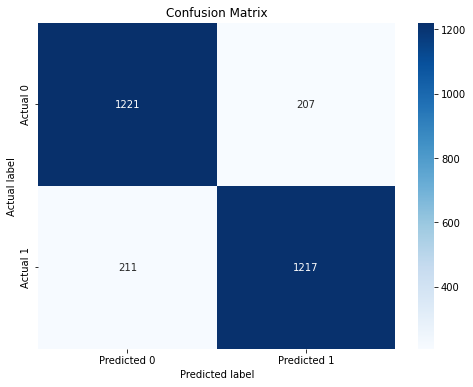

In [60]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [61]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf_gri, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

0:	learn: 0.6566305	total: 3.16ms	remaining: 3.15s
50:	learn: 0.4375183	total: 138ms	remaining: 2.56s
100:	learn: 0.3988280	total: 277ms	remaining: 2.46s
150:	learn: 0.3723512	total: 416ms	remaining: 2.34s
200:	learn: 0.3538245	total: 555ms	remaining: 2.2s
250:	learn: 0.3389264	total: 694ms	remaining: 2.07s
300:	learn: 0.3253283	total: 834ms	remaining: 1.94s
350:	learn: 0.3142614	total: 973ms	remaining: 1.8s
400:	learn: 0.3043451	total: 1.11s	remaining: 1.66s
450:	learn: 0.2953879	total: 1.25s	remaining: 1.53s
500:	learn: 0.2869775	total: 1.4s	remaining: 1.39s
550:	learn: 0.2792792	total: 1.54s	remaining: 1.25s
600:	learn: 0.2720539	total: 1.68s	remaining: 1.11s
650:	learn: 0.2648545	total: 1.82s	remaining: 974ms
700:	learn: 0.2584142	total: 1.96s	remaining: 836ms
750:	learn: 0.2519179	total: 2.1s	remaining: 697ms
800:	learn: 0.2460828	total: 2.25s	remaining: 558ms
850:	learn: 0.2405468	total: 2.39s	remaining: 418ms
900:	learn: 0.2349216	total: 2.53s	remaining: 278ms
950:	learn: 0.2297

In [62]:
from sklearn.model_selection import GridSearchCV
param_grid = {'iterations': [1250, 1500, 1750], 'learning_rate': [0.1], 'depth': [4]}

clf_cat = CatBoostClassifier()

grid_search = GridSearchCV(clf_cat, param_grid, cv=5)
grid_search.fit(X_train, y_train)

0:	learn: 0.6567405	total: 2.6ms	remaining: 3.25s
1:	learn: 0.6297225	total: 5.16ms	remaining: 3.22s
2:	learn: 0.6076923	total: 7.29ms	remaining: 3.03s
3:	learn: 0.5889754	total: 9.37ms	remaining: 2.92s
4:	learn: 0.5735499	total: 11.5ms	remaining: 2.85s
5:	learn: 0.5624097	total: 13.7ms	remaining: 2.84s
6:	learn: 0.5524655	total: 15.9ms	remaining: 2.83s
7:	learn: 0.5449663	total: 18.1ms	remaining: 2.8s
8:	learn: 0.5393535	total: 20.3ms	remaining: 2.81s
9:	learn: 0.5326860	total: 22.6ms	remaining: 2.8s
10:	learn: 0.5255054	total: 24.9ms	remaining: 2.8s
11:	learn: 0.5200099	total: 27.1ms	remaining: 2.8s
12:	learn: 0.5147366	total: 29.3ms	remaining: 2.79s
13:	learn: 0.5103888	total: 31.7ms	remaining: 2.8s
14:	learn: 0.5071492	total: 34ms	remaining: 2.8s
15:	learn: 0.5033566	total: 36.2ms	remaining: 2.79s
16:	learn: 0.4997702	total: 38.5ms	remaining: 2.79s
17:	learn: 0.4956639	total: 40.7ms	remaining: 2.78s
18:	learn: 0.4924001	total: 42.9ms	remaining: 2.78s
19:	learn: 0.4891980	total: 45.

170:	learn: 0.3662116	total: 399ms	remaining: 2.52s
171:	learn: 0.3658606	total: 402ms	remaining: 2.52s
172:	learn: 0.3654710	total: 404ms	remaining: 2.52s
173:	learn: 0.3651205	total: 407ms	remaining: 2.52s
174:	learn: 0.3647073	total: 409ms	remaining: 2.51s
175:	learn: 0.3643506	total: 411ms	remaining: 2.51s
176:	learn: 0.3640019	total: 414ms	remaining: 2.51s
177:	learn: 0.3635467	total: 416ms	remaining: 2.51s
178:	learn: 0.3632772	total: 418ms	remaining: 2.5s
179:	learn: 0.3628942	total: 421ms	remaining: 2.5s
180:	learn: 0.3625304	total: 423ms	remaining: 2.5s
181:	learn: 0.3621333	total: 426ms	remaining: 2.5s
182:	learn: 0.3617484	total: 428ms	remaining: 2.49s
183:	learn: 0.3613585	total: 430ms	remaining: 2.49s
184:	learn: 0.3610025	total: 432ms	remaining: 2.49s
185:	learn: 0.3606668	total: 435ms	remaining: 2.49s
186:	learn: 0.3602559	total: 437ms	remaining: 2.48s
187:	learn: 0.3599367	total: 439ms	remaining: 2.48s
188:	learn: 0.3595364	total: 442ms	remaining: 2.48s
189:	learn: 0.35

340:	learn: 0.3155211	total: 795ms	remaining: 2.12s
341:	learn: 0.3153548	total: 798ms	remaining: 2.12s
342:	learn: 0.3150994	total: 800ms	remaining: 2.12s
343:	learn: 0.3148714	total: 802ms	remaining: 2.11s
344:	learn: 0.3146983	total: 805ms	remaining: 2.11s
345:	learn: 0.3144505	total: 807ms	remaining: 2.11s
346:	learn: 0.3142845	total: 810ms	remaining: 2.11s
347:	learn: 0.3139980	total: 812ms	remaining: 2.1s
348:	learn: 0.3137606	total: 814ms	remaining: 2.1s
349:	learn: 0.3135476	total: 817ms	remaining: 2.1s
350:	learn: 0.3132477	total: 819ms	remaining: 2.1s
351:	learn: 0.3130357	total: 821ms	remaining: 2.1s
352:	learn: 0.3127566	total: 824ms	remaining: 2.09s
353:	learn: 0.3125316	total: 826ms	remaining: 2.09s
354:	learn: 0.3122964	total: 828ms	remaining: 2.09s
355:	learn: 0.3120784	total: 831ms	remaining: 2.09s
356:	learn: 0.3117812	total: 833ms	remaining: 2.08s
357:	learn: 0.3114967	total: 835ms	remaining: 2.08s
358:	learn: 0.3112939	total: 838ms	remaining: 2.08s
359:	learn: 0.311

508:	learn: 0.2820694	total: 1.19s	remaining: 1.73s
509:	learn: 0.2819470	total: 1.19s	remaining: 1.73s
510:	learn: 0.2817978	total: 1.2s	remaining: 1.73s
511:	learn: 0.2816010	total: 1.2s	remaining: 1.73s
512:	learn: 0.2813965	total: 1.2s	remaining: 1.73s
513:	learn: 0.2812569	total: 1.2s	remaining: 1.72s
514:	learn: 0.2810480	total: 1.21s	remaining: 1.72s
515:	learn: 0.2808951	total: 1.21s	remaining: 1.72s
516:	learn: 0.2807244	total: 1.21s	remaining: 1.72s
517:	learn: 0.2805566	total: 1.21s	remaining: 1.71s
518:	learn: 0.2803315	total: 1.22s	remaining: 1.71s
519:	learn: 0.2802018	total: 1.22s	remaining: 1.71s
520:	learn: 0.2799449	total: 1.22s	remaining: 1.71s
521:	learn: 0.2797977	total: 1.22s	remaining: 1.7s
522:	learn: 0.2796916	total: 1.22s	remaining: 1.7s
523:	learn: 0.2795689	total: 1.23s	remaining: 1.7s
524:	learn: 0.2794418	total: 1.23s	remaining: 1.7s
525:	learn: 0.2792464	total: 1.23s	remaining: 1.7s
526:	learn: 0.2790886	total: 1.23s	remaining: 1.69s
527:	learn: 0.2789259

674:	learn: 0.2565160	total: 1.59s	remaining: 1.35s
675:	learn: 0.2563684	total: 1.59s	remaining: 1.35s
676:	learn: 0.2562115	total: 1.59s	remaining: 1.35s
677:	learn: 0.2560622	total: 1.59s	remaining: 1.34s
678:	learn: 0.2559438	total: 1.6s	remaining: 1.34s
679:	learn: 0.2557991	total: 1.6s	remaining: 1.34s
680:	learn: 0.2555547	total: 1.6s	remaining: 1.34s
681:	learn: 0.2553868	total: 1.6s	remaining: 1.33s
682:	learn: 0.2552860	total: 1.61s	remaining: 1.33s
683:	learn: 0.2550318	total: 1.61s	remaining: 1.33s
684:	learn: 0.2548508	total: 1.61s	remaining: 1.33s
685:	learn: 0.2547104	total: 1.61s	remaining: 1.33s
686:	learn: 0.2545891	total: 1.61s	remaining: 1.32s
687:	learn: 0.2544750	total: 1.62s	remaining: 1.32s
688:	learn: 0.2543624	total: 1.62s	remaining: 1.32s
689:	learn: 0.2542114	total: 1.62s	remaining: 1.32s
690:	learn: 0.2541111	total: 1.62s	remaining: 1.31s
691:	learn: 0.2539550	total: 1.63s	remaining: 1.31s
692:	learn: 0.2537927	total: 1.63s	remaining: 1.31s
693:	learn: 0.25

840:	learn: 0.2349619	total: 1.98s	remaining: 964ms
841:	learn: 0.2348104	total: 1.98s	remaining: 961ms
842:	learn: 0.2346916	total: 1.99s	remaining: 959ms
843:	learn: 0.2345926	total: 1.99s	remaining: 956ms
844:	learn: 0.2344845	total: 1.99s	remaining: 954ms
845:	learn: 0.2343655	total: 1.99s	remaining: 952ms
846:	learn: 0.2342422	total: 2s	remaining: 949ms
847:	learn: 0.2340449	total: 2s	remaining: 947ms
848:	learn: 0.2339408	total: 2s	remaining: 945ms
849:	learn: 0.2337136	total: 2s	remaining: 942ms
850:	learn: 0.2336148	total: 2s	remaining: 940ms
851:	learn: 0.2334957	total: 2.01s	remaining: 938ms
852:	learn: 0.2333981	total: 2.01s	remaining: 935ms
853:	learn: 0.2333046	total: 2.01s	remaining: 933ms
854:	learn: 0.2331567	total: 2.01s	remaining: 930ms
855:	learn: 0.2330547	total: 2.02s	remaining: 928ms
856:	learn: 0.2329660	total: 2.02s	remaining: 926ms
857:	learn: 0.2328772	total: 2.02s	remaining: 923ms
858:	learn: 0.2327671	total: 2.02s	remaining: 921ms
859:	learn: 0.2326066	total

1008:	learn: 0.2157736	total: 2.37s	remaining: 567ms
1009:	learn: 0.2156589	total: 2.38s	remaining: 565ms
1010:	learn: 0.2155769	total: 2.38s	remaining: 563ms
1011:	learn: 0.2154855	total: 2.38s	remaining: 560ms
1012:	learn: 0.2153933	total: 2.38s	remaining: 558ms
1013:	learn: 0.2152188	total: 2.39s	remaining: 556ms
1014:	learn: 0.2150853	total: 2.39s	remaining: 553ms
1015:	learn: 0.2149276	total: 2.39s	remaining: 551ms
1016:	learn: 0.2148314	total: 2.39s	remaining: 548ms
1017:	learn: 0.2147626	total: 2.4s	remaining: 546ms
1018:	learn: 0.2146698	total: 2.4s	remaining: 544ms
1019:	learn: 0.2145606	total: 2.4s	remaining: 541ms
1020:	learn: 0.2144809	total: 2.4s	remaining: 539ms
1021:	learn: 0.2144361	total: 2.4s	remaining: 537ms
1022:	learn: 0.2143406	total: 2.41s	remaining: 534ms
1023:	learn: 0.2142098	total: 2.41s	remaining: 532ms
1024:	learn: 0.2141046	total: 2.41s	remaining: 530ms
1025:	learn: 0.2140004	total: 2.41s	remaining: 527ms
1026:	learn: 0.2139276	total: 2.42s	remaining: 525m

1175:	learn: 0.1994935	total: 2.77s	remaining: 174ms
1176:	learn: 0.1994447	total: 2.77s	remaining: 172ms
1177:	learn: 0.1993774	total: 2.77s	remaining: 170ms
1178:	learn: 0.1993038	total: 2.78s	remaining: 167ms
1179:	learn: 0.1991639	total: 2.78s	remaining: 165ms
1180:	learn: 0.1990894	total: 2.78s	remaining: 163ms
1181:	learn: 0.1989377	total: 2.78s	remaining: 160ms
1182:	learn: 0.1988645	total: 2.79s	remaining: 158ms
1183:	learn: 0.1987917	total: 2.79s	remaining: 156ms
1184:	learn: 0.1987073	total: 2.79s	remaining: 153ms
1185:	learn: 0.1986167	total: 2.79s	remaining: 151ms
1186:	learn: 0.1985114	total: 2.8s	remaining: 148ms
1187:	learn: 0.1984216	total: 2.8s	remaining: 146ms
1188:	learn: 0.1982902	total: 2.8s	remaining: 144ms
1189:	learn: 0.1981990	total: 2.8s	remaining: 141ms
1190:	learn: 0.1981071	total: 2.81s	remaining: 139ms
1191:	learn: 0.1979804	total: 2.81s	remaining: 137ms
1192:	learn: 0.1978823	total: 2.81s	remaining: 134ms
1193:	learn: 0.1977598	total: 2.81s	remaining: 132

84:	learn: 0.4073680	total: 201ms	remaining: 2.75s
85:	learn: 0.4065022	total: 203ms	remaining: 2.75s
86:	learn: 0.4054954	total: 206ms	remaining: 2.75s
87:	learn: 0.4048721	total: 208ms	remaining: 2.75s
88:	learn: 0.4041019	total: 210ms	remaining: 2.74s
89:	learn: 0.4033631	total: 213ms	remaining: 2.74s
90:	learn: 0.4027925	total: 215ms	remaining: 2.74s
91:	learn: 0.4021081	total: 217ms	remaining: 2.73s
92:	learn: 0.4014654	total: 219ms	remaining: 2.73s
93:	learn: 0.4008526	total: 222ms	remaining: 2.73s
94:	learn: 0.4001646	total: 224ms	remaining: 2.73s
95:	learn: 0.3997156	total: 226ms	remaining: 2.72s
96:	learn: 0.3989323	total: 229ms	remaining: 2.72s
97:	learn: 0.3984365	total: 231ms	remaining: 2.71s
98:	learn: 0.3978730	total: 233ms	remaining: 2.71s
99:	learn: 0.3972683	total: 236ms	remaining: 2.71s
100:	learn: 0.3967016	total: 238ms	remaining: 2.71s
101:	learn: 0.3961359	total: 241ms	remaining: 2.71s
102:	learn: 0.3954733	total: 243ms	remaining: 2.71s
103:	learn: 0.3948007	total:

252:	learn: 0.3346010	total: 600ms	remaining: 2.37s
253:	learn: 0.3342676	total: 603ms	remaining: 2.36s
254:	learn: 0.3340019	total: 605ms	remaining: 2.36s
255:	learn: 0.3337266	total: 608ms	remaining: 2.36s
256:	learn: 0.3335180	total: 610ms	remaining: 2.36s
257:	learn: 0.3332531	total: 613ms	remaining: 2.35s
258:	learn: 0.3330328	total: 615ms	remaining: 2.35s
259:	learn: 0.3326904	total: 618ms	remaining: 2.35s
260:	learn: 0.3323786	total: 620ms	remaining: 2.35s
261:	learn: 0.3320363	total: 622ms	remaining: 2.35s
262:	learn: 0.3317340	total: 625ms	remaining: 2.34s
263:	learn: 0.3314065	total: 627ms	remaining: 2.34s
264:	learn: 0.3311647	total: 629ms	remaining: 2.34s
265:	learn: 0.3309051	total: 632ms	remaining: 2.34s
266:	learn: 0.3306208	total: 634ms	remaining: 2.33s
267:	learn: 0.3303811	total: 636ms	remaining: 2.33s
268:	learn: 0.3300393	total: 639ms	remaining: 2.33s
269:	learn: 0.3297980	total: 641ms	remaining: 2.33s
270:	learn: 0.3294593	total: 644ms	remaining: 2.33s
271:	learn: 

419:	learn: 0.2950623	total: 996ms	remaining: 1.97s
420:	learn: 0.2948263	total: 998ms	remaining: 1.97s
421:	learn: 0.2946576	total: 1s	remaining: 1.96s
422:	learn: 0.2944301	total: 1s	remaining: 1.96s
423:	learn: 0.2942432	total: 1s	remaining: 1.96s
424:	learn: 0.2940320	total: 1.01s	remaining: 1.96s
425:	learn: 0.2938360	total: 1.01s	remaining: 1.95s
426:	learn: 0.2937392	total: 1.01s	remaining: 1.95s
427:	learn: 0.2935629	total: 1.01s	remaining: 1.95s
428:	learn: 0.2933342	total: 1.02s	remaining: 1.95s
429:	learn: 0.2931286	total: 1.02s	remaining: 1.94s
430:	learn: 0.2929846	total: 1.02s	remaining: 1.94s
431:	learn: 0.2928520	total: 1.02s	remaining: 1.94s
432:	learn: 0.2925544	total: 1.03s	remaining: 1.94s
433:	learn: 0.2922961	total: 1.03s	remaining: 1.93s
434:	learn: 0.2922020	total: 1.03s	remaining: 1.93s
435:	learn: 0.2920050	total: 1.03s	remaining: 1.93s
436:	learn: 0.2917873	total: 1.03s	remaining: 1.93s
437:	learn: 0.2916454	total: 1.04s	remaining: 1.93s
438:	learn: 0.2914020

587:	learn: 0.2661838	total: 1.39s	remaining: 1.57s
588:	learn: 0.2659970	total: 1.39s	remaining: 1.56s
589:	learn: 0.2658858	total: 1.4s	remaining: 1.56s
590:	learn: 0.2657321	total: 1.4s	remaining: 1.56s
591:	learn: 0.2655543	total: 1.4s	remaining: 1.56s
592:	learn: 0.2654089	total: 1.4s	remaining: 1.55s
593:	learn: 0.2653160	total: 1.41s	remaining: 1.55s
594:	learn: 0.2651679	total: 1.41s	remaining: 1.55s
595:	learn: 0.2650275	total: 1.41s	remaining: 1.55s
596:	learn: 0.2648736	total: 1.41s	remaining: 1.55s
597:	learn: 0.2647415	total: 1.42s	remaining: 1.54s
598:	learn: 0.2645220	total: 1.42s	remaining: 1.54s
599:	learn: 0.2643596	total: 1.42s	remaining: 1.54s
600:	learn: 0.2642720	total: 1.42s	remaining: 1.54s
601:	learn: 0.2641179	total: 1.43s	remaining: 1.53s
602:	learn: 0.2639366	total: 1.43s	remaining: 1.53s
603:	learn: 0.2638022	total: 1.43s	remaining: 1.53s
604:	learn: 0.2636697	total: 1.43s	remaining: 1.53s
605:	learn: 0.2635501	total: 1.43s	remaining: 1.52s
606:	learn: 0.26

756:	learn: 0.2418604	total: 1.79s	remaining: 1.17s
757:	learn: 0.2417454	total: 1.79s	remaining: 1.17s
758:	learn: 0.2416343	total: 1.8s	remaining: 1.16s
759:	learn: 0.2415028	total: 1.8s	remaining: 1.16s
760:	learn: 0.2413580	total: 1.8s	remaining: 1.16s
761:	learn: 0.2412740	total: 1.8s	remaining: 1.16s
762:	learn: 0.2411694	total: 1.81s	remaining: 1.15s
763:	learn: 0.2410950	total: 1.81s	remaining: 1.15s
764:	learn: 0.2409209	total: 1.81s	remaining: 1.15s
765:	learn: 0.2407841	total: 1.81s	remaining: 1.15s
766:	learn: 0.2406404	total: 1.82s	remaining: 1.14s
767:	learn: 0.2404903	total: 1.82s	remaining: 1.14s
768:	learn: 0.2404003	total: 1.82s	remaining: 1.14s
769:	learn: 0.2402971	total: 1.82s	remaining: 1.14s
770:	learn: 0.2402430	total: 1.82s	remaining: 1.13s
771:	learn: 0.2400635	total: 1.83s	remaining: 1.13s
772:	learn: 0.2399377	total: 1.83s	remaining: 1.13s
773:	learn: 0.2398358	total: 1.83s	remaining: 1.13s
774:	learn: 0.2397372	total: 1.83s	remaining: 1.12s
775:	learn: 0.23

924:	learn: 0.2212110	total: 2.19s	remaining: 769ms
925:	learn: 0.2211243	total: 2.19s	remaining: 766ms
926:	learn: 0.2210304	total: 2.19s	remaining: 764ms
927:	learn: 0.2209159	total: 2.19s	remaining: 762ms
928:	learn: 0.2208458	total: 2.2s	remaining: 759ms
929:	learn: 0.2207582	total: 2.2s	remaining: 757ms
930:	learn: 0.2205497	total: 2.2s	remaining: 755ms
931:	learn: 0.2204056	total: 2.2s	remaining: 752ms
932:	learn: 0.2203065	total: 2.21s	remaining: 750ms
933:	learn: 0.2202180	total: 2.21s	remaining: 747ms
934:	learn: 0.2200961	total: 2.21s	remaining: 745ms
935:	learn: 0.2199910	total: 2.21s	remaining: 743ms
936:	learn: 0.2198967	total: 2.22s	remaining: 740ms
937:	learn: 0.2198412	total: 2.22s	remaining: 738ms
938:	learn: 0.2196653	total: 2.22s	remaining: 735ms
939:	learn: 0.2195537	total: 2.22s	remaining: 733ms
940:	learn: 0.2194366	total: 2.23s	remaining: 731ms
941:	learn: 0.2193344	total: 2.23s	remaining: 728ms
942:	learn: 0.2192330	total: 2.23s	remaining: 726ms
943:	learn: 0.21

1092:	learn: 0.2030605	total: 2.58s	remaining: 371ms
1093:	learn: 0.2029508	total: 2.58s	remaining: 369ms
1094:	learn: 0.2028765	total: 2.59s	remaining: 366ms
1095:	learn: 0.2027007	total: 2.59s	remaining: 364ms
1096:	learn: 0.2026016	total: 2.59s	remaining: 362ms
1097:	learn: 0.2025025	total: 2.6s	remaining: 359ms
1098:	learn: 0.2023982	total: 2.6s	remaining: 357ms
1099:	learn: 0.2022890	total: 2.6s	remaining: 355ms
1100:	learn: 0.2021228	total: 2.6s	remaining: 352ms
1101:	learn: 0.2020780	total: 2.6s	remaining: 350ms
1102:	learn: 0.2020215	total: 2.61s	remaining: 347ms
1103:	learn: 0.2018821	total: 2.61s	remaining: 345ms
1104:	learn: 0.2017490	total: 2.61s	remaining: 343ms
1105:	learn: 0.2016470	total: 2.61s	remaining: 340ms
1106:	learn: 0.2014980	total: 2.62s	remaining: 338ms
1107:	learn: 0.2013858	total: 2.62s	remaining: 336ms
1108:	learn: 0.2012689	total: 2.62s	remaining: 333ms
1109:	learn: 0.2011514	total: 2.62s	remaining: 331ms
1110:	learn: 0.2010976	total: 2.63s	remaining: 329m

0:	learn: 0.6554385	total: 2.6ms	remaining: 3.25s
1:	learn: 0.6260160	total: 5.01ms	remaining: 3.13s
2:	learn: 0.6044187	total: 7.2ms	remaining: 2.99s
3:	learn: 0.5862999	total: 9.37ms	remaining: 2.92s
4:	learn: 0.5713898	total: 11.5ms	remaining: 2.86s
5:	learn: 0.5606235	total: 13.7ms	remaining: 2.84s
6:	learn: 0.5507896	total: 15.9ms	remaining: 2.82s
7:	learn: 0.5425217	total: 18.2ms	remaining: 2.82s
8:	learn: 0.5348689	total: 20.5ms	remaining: 2.82s
9:	learn: 0.5283316	total: 22.7ms	remaining: 2.82s
10:	learn: 0.5224126	total: 25.1ms	remaining: 2.83s
11:	learn: 0.5175801	total: 27.4ms	remaining: 2.82s
12:	learn: 0.5126693	total: 29.6ms	remaining: 2.82s
13:	learn: 0.5087715	total: 31.9ms	remaining: 2.82s
14:	learn: 0.5044443	total: 34.3ms	remaining: 2.82s
15:	learn: 0.5002606	total: 36.6ms	remaining: 2.82s
16:	learn: 0.4965794	total: 38.9ms	remaining: 2.82s
17:	learn: 0.4930109	total: 41.2ms	remaining: 2.82s
18:	learn: 0.4901645	total: 43.5ms	remaining: 2.82s
19:	learn: 0.4864692	tot

166:	learn: 0.3610479	total: 394ms	remaining: 2.56s
167:	learn: 0.3606501	total: 397ms	remaining: 2.56s
168:	learn: 0.3602992	total: 399ms	remaining: 2.56s
169:	learn: 0.3599297	total: 402ms	remaining: 2.55s
170:	learn: 0.3595640	total: 404ms	remaining: 2.55s
171:	learn: 0.3591273	total: 407ms	remaining: 2.55s
172:	learn: 0.3584890	total: 409ms	remaining: 2.55s
173:	learn: 0.3581698	total: 412ms	remaining: 2.54s
174:	learn: 0.3578515	total: 414ms	remaining: 2.54s
175:	learn: 0.3575071	total: 416ms	remaining: 2.54s
176:	learn: 0.3570755	total: 419ms	remaining: 2.54s
177:	learn: 0.3567565	total: 421ms	remaining: 2.54s
178:	learn: 0.3564158	total: 423ms	remaining: 2.53s
179:	learn: 0.3561382	total: 426ms	remaining: 2.53s
180:	learn: 0.3557119	total: 428ms	remaining: 2.53s
181:	learn: 0.3554156	total: 431ms	remaining: 2.53s
182:	learn: 0.3550029	total: 433ms	remaining: 2.52s
183:	learn: 0.3545623	total: 435ms	remaining: 2.52s
184:	learn: 0.3541513	total: 438ms	remaining: 2.52s
185:	learn: 

330:	learn: 0.3114558	total: 789ms	remaining: 2.19s
331:	learn: 0.3112504	total: 792ms	remaining: 2.19s
332:	learn: 0.3109994	total: 794ms	remaining: 2.19s
333:	learn: 0.3107880	total: 796ms	remaining: 2.18s
334:	learn: 0.3105472	total: 799ms	remaining: 2.18s
335:	learn: 0.3102952	total: 801ms	remaining: 2.18s
336:	learn: 0.3100183	total: 804ms	remaining: 2.18s
337:	learn: 0.3097141	total: 806ms	remaining: 2.17s
338:	learn: 0.3094971	total: 809ms	remaining: 2.17s
339:	learn: 0.3092737	total: 811ms	remaining: 2.17s
340:	learn: 0.3090546	total: 813ms	remaining: 2.17s
341:	learn: 0.3088282	total: 816ms	remaining: 2.17s
342:	learn: 0.3086594	total: 818ms	remaining: 2.16s
343:	learn: 0.3083861	total: 821ms	remaining: 2.16s
344:	learn: 0.3081667	total: 823ms	remaining: 2.16s
345:	learn: 0.3079626	total: 826ms	remaining: 2.16s
346:	learn: 0.3077385	total: 828ms	remaining: 2.15s
347:	learn: 0.3074918	total: 831ms	remaining: 2.15s
348:	learn: 0.3073068	total: 833ms	remaining: 2.15s
349:	learn: 

494:	learn: 0.2776771	total: 1.18s	remaining: 1.81s
495:	learn: 0.2774669	total: 1.19s	remaining: 1.8s
496:	learn: 0.2772955	total: 1.19s	remaining: 1.8s
497:	learn: 0.2771055	total: 1.19s	remaining: 1.8s
498:	learn: 0.2769536	total: 1.19s	remaining: 1.8s
499:	learn: 0.2768100	total: 1.2s	remaining: 1.79s
500:	learn: 0.2766173	total: 1.2s	remaining: 1.79s
501:	learn: 0.2764193	total: 1.2s	remaining: 1.79s
502:	learn: 0.2762689	total: 1.2s	remaining: 1.79s
503:	learn: 0.2761315	total: 1.21s	remaining: 1.79s
504:	learn: 0.2759592	total: 1.21s	remaining: 1.78s
505:	learn: 0.2757979	total: 1.21s	remaining: 1.78s
506:	learn: 0.2756135	total: 1.21s	remaining: 1.78s
507:	learn: 0.2754240	total: 1.22s	remaining: 1.78s
508:	learn: 0.2752455	total: 1.22s	remaining: 1.77s
509:	learn: 0.2750732	total: 1.22s	remaining: 1.77s
510:	learn: 0.2749385	total: 1.22s	remaining: 1.77s
511:	learn: 0.2747967	total: 1.23s	remaining: 1.77s
512:	learn: 0.2745944	total: 1.23s	remaining: 1.76s
513:	learn: 0.274432

659:	learn: 0.2516867	total: 1.58s	remaining: 1.42s
660:	learn: 0.2515676	total: 1.59s	remaining: 1.41s
661:	learn: 0.2514755	total: 1.59s	remaining: 1.41s
662:	learn: 0.2513332	total: 1.59s	remaining: 1.41s
663:	learn: 0.2511991	total: 1.59s	remaining: 1.41s
664:	learn: 0.2510807	total: 1.6s	remaining: 1.4s
665:	learn: 0.2510108	total: 1.6s	remaining: 1.4s
666:	learn: 0.2508971	total: 1.6s	remaining: 1.4s
667:	learn: 0.2507537	total: 1.6s	remaining: 1.4s
668:	learn: 0.2505760	total: 1.61s	remaining: 1.4s
669:	learn: 0.2504371	total: 1.61s	remaining: 1.39s
670:	learn: 0.2503320	total: 1.61s	remaining: 1.39s
671:	learn: 0.2501966	total: 1.61s	remaining: 1.39s
672:	learn: 0.2500947	total: 1.62s	remaining: 1.39s
673:	learn: 0.2498924	total: 1.62s	remaining: 1.38s
674:	learn: 0.2497962	total: 1.62s	remaining: 1.38s
675:	learn: 0.2496267	total: 1.62s	remaining: 1.38s
676:	learn: 0.2494480	total: 1.63s	remaining: 1.38s
677:	learn: 0.2492711	total: 1.63s	remaining: 1.37s
678:	learn: 0.2491425

823:	learn: 0.2301109	total: 1.98s	remaining: 1.02s
824:	learn: 0.2300092	total: 1.98s	remaining: 1.02s
825:	learn: 0.2298844	total: 1.98s	remaining: 1.02s
826:	learn: 0.2297705	total: 1.99s	remaining: 1.01s
827:	learn: 0.2296064	total: 1.99s	remaining: 1.01s
828:	learn: 0.2294552	total: 1.99s	remaining: 1.01s
829:	learn: 0.2293395	total: 1.99s	remaining: 1.01s
830:	learn: 0.2292345	total: 2s	remaining: 1s
831:	learn: 0.2290175	total: 2s	remaining: 1s
832:	learn: 0.2289033	total: 2s	remaining: 1s
833:	learn: 0.2288175	total: 2s	remaining: 999ms
834:	learn: 0.2286759	total: 2s	remaining: 996ms
835:	learn: 0.2285025	total: 2.01s	remaining: 994ms
836:	learn: 0.2283801	total: 2.01s	remaining: 992ms
837:	learn: 0.2282054	total: 2.01s	remaining: 989ms
838:	learn: 0.2280295	total: 2.01s	remaining: 987ms
839:	learn: 0.2279543	total: 2.02s	remaining: 984ms
840:	learn: 0.2278724	total: 2.02s	remaining: 982ms
841:	learn: 0.2277704	total: 2.02s	remaining: 979ms
842:	learn: 0.2276701	total: 2.02s	r

988:	learn: 0.2102733	total: 2.37s	remaining: 626ms
989:	learn: 0.2101997	total: 2.38s	remaining: 624ms
990:	learn: 0.2100866	total: 2.38s	remaining: 622ms
991:	learn: 0.2099600	total: 2.38s	remaining: 619ms
992:	learn: 0.2099040	total: 2.38s	remaining: 617ms
993:	learn: 0.2097916	total: 2.38s	remaining: 614ms
994:	learn: 0.2096210	total: 2.39s	remaining: 612ms
995:	learn: 0.2095121	total: 2.39s	remaining: 609ms
996:	learn: 0.2094088	total: 2.39s	remaining: 607ms
997:	learn: 0.2092979	total: 2.39s	remaining: 605ms
998:	learn: 0.2092343	total: 2.4s	remaining: 602ms
999:	learn: 0.2091431	total: 2.4s	remaining: 600ms
1000:	learn: 0.2090380	total: 2.4s	remaining: 597ms
1001:	learn: 0.2088954	total: 2.4s	remaining: 595ms
1002:	learn: 0.2087811	total: 2.41s	remaining: 593ms
1003:	learn: 0.2086025	total: 2.41s	remaining: 590ms
1004:	learn: 0.2084603	total: 2.41s	remaining: 588ms
1005:	learn: 0.2083280	total: 2.41s	remaining: 585ms
1006:	learn: 0.2081813	total: 2.42s	remaining: 583ms
1007:	lea

1156:	learn: 0.1934901	total: 2.77s	remaining: 223ms
1157:	learn: 0.1933828	total: 2.77s	remaining: 220ms
1158:	learn: 0.1933100	total: 2.77s	remaining: 218ms
1159:	learn: 0.1932319	total: 2.78s	remaining: 215ms
1160:	learn: 0.1931163	total: 2.78s	remaining: 213ms
1161:	learn: 0.1930548	total: 2.78s	remaining: 211ms
1162:	learn: 0.1929034	total: 2.78s	remaining: 208ms
1163:	learn: 0.1928225	total: 2.79s	remaining: 206ms
1164:	learn: 0.1927375	total: 2.79s	remaining: 203ms
1165:	learn: 0.1926506	total: 2.79s	remaining: 201ms
1166:	learn: 0.1925819	total: 2.79s	remaining: 199ms
1167:	learn: 0.1925162	total: 2.79s	remaining: 196ms
1168:	learn: 0.1923641	total: 2.8s	remaining: 194ms
1169:	learn: 0.1922872	total: 2.8s	remaining: 191ms
1170:	learn: 0.1922072	total: 2.8s	remaining: 189ms
1171:	learn: 0.1920987	total: 2.81s	remaining: 187ms
1172:	learn: 0.1920068	total: 2.81s	remaining: 184ms
1173:	learn: 0.1918637	total: 2.81s	remaining: 182ms
1174:	learn: 0.1917807	total: 2.81s	remaining: 18

126:	learn: 0.3821799	total: 305ms	remaining: 2.69s
127:	learn: 0.3817936	total: 307ms	remaining: 2.69s
128:	learn: 0.3812578	total: 309ms	remaining: 2.69s
129:	learn: 0.3807409	total: 312ms	remaining: 2.69s
130:	learn: 0.3802294	total: 314ms	remaining: 2.69s
131:	learn: 0.3795217	total: 317ms	remaining: 2.68s
132:	learn: 0.3790267	total: 319ms	remaining: 2.68s
133:	learn: 0.3786104	total: 321ms	remaining: 2.68s
134:	learn: 0.3781817	total: 324ms	remaining: 2.67s
135:	learn: 0.3777950	total: 326ms	remaining: 2.67s
136:	learn: 0.3773186	total: 329ms	remaining: 2.67s
137:	learn: 0.3768814	total: 331ms	remaining: 2.67s
138:	learn: 0.3764994	total: 333ms	remaining: 2.66s
139:	learn: 0.3760333	total: 336ms	remaining: 2.66s
140:	learn: 0.3755226	total: 338ms	remaining: 2.66s
141:	learn: 0.3750610	total: 340ms	remaining: 2.66s
142:	learn: 0.3746117	total: 343ms	remaining: 2.65s
143:	learn: 0.3740640	total: 345ms	remaining: 2.65s
144:	learn: 0.3736489	total: 348ms	remaining: 2.65s
145:	learn: 

291:	learn: 0.3248781	total: 701ms	remaining: 2.3s
292:	learn: 0.3246335	total: 704ms	remaining: 2.3s
293:	learn: 0.3243903	total: 706ms	remaining: 2.3s
294:	learn: 0.3241250	total: 709ms	remaining: 2.29s
295:	learn: 0.3239327	total: 711ms	remaining: 2.29s
296:	learn: 0.3236669	total: 713ms	remaining: 2.29s
297:	learn: 0.3234391	total: 716ms	remaining: 2.29s
298:	learn: 0.3232197	total: 718ms	remaining: 2.28s
299:	learn: 0.3229894	total: 721ms	remaining: 2.28s
300:	learn: 0.3226931	total: 723ms	remaining: 2.28s
301:	learn: 0.3223112	total: 725ms	remaining: 2.28s
302:	learn: 0.3220443	total: 728ms	remaining: 2.27s
303:	learn: 0.3217725	total: 730ms	remaining: 2.27s
304:	learn: 0.3215116	total: 733ms	remaining: 2.27s
305:	learn: 0.3212450	total: 735ms	remaining: 2.27s
306:	learn: 0.3209924	total: 737ms	remaining: 2.26s
307:	learn: 0.3206233	total: 740ms	remaining: 2.26s
308:	learn: 0.3203516	total: 742ms	remaining: 2.26s
309:	learn: 0.3201298	total: 745ms	remaining: 2.26s
310:	learn: 0.3

456:	learn: 0.2891365	total: 1.1s	remaining: 1.91s
457:	learn: 0.2889218	total: 1.1s	remaining: 1.9s
458:	learn: 0.2887499	total: 1.1s	remaining: 1.9s
459:	learn: 0.2885860	total: 1.1s	remaining: 1.9s
460:	learn: 0.2884157	total: 1.11s	remaining: 1.9s
461:	learn: 0.2881557	total: 1.11s	remaining: 1.89s
462:	learn: 0.2879667	total: 1.11s	remaining: 1.89s
463:	learn: 0.2877799	total: 1.11s	remaining: 1.89s
464:	learn: 0.2875800	total: 1.12s	remaining: 1.89s
465:	learn: 0.2874401	total: 1.12s	remaining: 1.88s
466:	learn: 0.2872790	total: 1.12s	remaining: 1.88s
467:	learn: 0.2870856	total: 1.12s	remaining: 1.88s
468:	learn: 0.2869418	total: 1.13s	remaining: 1.88s
469:	learn: 0.2868082	total: 1.13s	remaining: 1.87s
470:	learn: 0.2866719	total: 1.13s	remaining: 1.87s
471:	learn: 0.2865497	total: 1.13s	remaining: 1.87s
472:	learn: 0.2863770	total: 1.14s	remaining: 1.87s
473:	learn: 0.2861550	total: 1.14s	remaining: 1.86s
474:	learn: 0.2860065	total: 1.14s	remaining: 1.86s
475:	learn: 0.285839

621:	learn: 0.2627096	total: 1.49s	remaining: 1.51s
622:	learn: 0.2625378	total: 1.5s	remaining: 1.5s
623:	learn: 0.2623684	total: 1.5s	remaining: 1.5s
624:	learn: 0.2622410	total: 1.5s	remaining: 1.5s
625:	learn: 0.2620353	total: 1.5s	remaining: 1.5s
626:	learn: 0.2618645	total: 1.5s	remaining: 1.5s
627:	learn: 0.2617915	total: 1.51s	remaining: 1.49s
628:	learn: 0.2616374	total: 1.51s	remaining: 1.49s
629:	learn: 0.2614758	total: 1.51s	remaining: 1.49s
630:	learn: 0.2612743	total: 1.51s	remaining: 1.49s
631:	learn: 0.2611405	total: 1.52s	remaining: 1.48s
632:	learn: 0.2608704	total: 1.52s	remaining: 1.48s
633:	learn: 0.2607198	total: 1.52s	remaining: 1.48s
634:	learn: 0.2605258	total: 1.52s	remaining: 1.48s
635:	learn: 0.2603751	total: 1.53s	remaining: 1.47s
636:	learn: 0.2600873	total: 1.53s	remaining: 1.47s
637:	learn: 0.2599140	total: 1.53s	remaining: 1.47s
638:	learn: 0.2598100	total: 1.53s	remaining: 1.47s
639:	learn: 0.2596994	total: 1.54s	remaining: 1.46s
640:	learn: 0.2596082	

788:	learn: 0.2388727	total: 1.89s	remaining: 1.1s
789:	learn: 0.2387768	total: 1.89s	remaining: 1.1s
790:	learn: 0.2386400	total: 1.89s	remaining: 1.1s
791:	learn: 0.2385353	total: 1.9s	remaining: 1.09s
792:	learn: 0.2384180	total: 1.9s	remaining: 1.09s
793:	learn: 0.2382620	total: 1.9s	remaining: 1.09s
794:	learn: 0.2381257	total: 1.9s	remaining: 1.09s
795:	learn: 0.2379807	total: 1.9s	remaining: 1.09s
796:	learn: 0.2379054	total: 1.91s	remaining: 1.08s
797:	learn: 0.2378116	total: 1.91s	remaining: 1.08s
798:	learn: 0.2376228	total: 1.91s	remaining: 1.08s
799:	learn: 0.2374966	total: 1.91s	remaining: 1.08s
800:	learn: 0.2373532	total: 1.92s	remaining: 1.07s
801:	learn: 0.2372825	total: 1.92s	remaining: 1.07s
802:	learn: 0.2370619	total: 1.92s	remaining: 1.07s
803:	learn: 0.2368602	total: 1.92s	remaining: 1.07s
804:	learn: 0.2367166	total: 1.93s	remaining: 1.06s
805:	learn: 0.2366114	total: 1.93s	remaining: 1.06s
806:	learn: 0.2364797	total: 1.93s	remaining: 1.06s
807:	learn: 0.236400

956:	learn: 0.2186423	total: 2.28s	remaining: 699ms
957:	learn: 0.2185190	total: 2.29s	remaining: 697ms
958:	learn: 0.2184532	total: 2.29s	remaining: 694ms
959:	learn: 0.2182807	total: 2.29s	remaining: 692ms
960:	learn: 0.2181549	total: 2.29s	remaining: 690ms
961:	learn: 0.2179881	total: 2.29s	remaining: 687ms
962:	learn: 0.2178688	total: 2.3s	remaining: 685ms
963:	learn: 0.2177811	total: 2.3s	remaining: 682ms
964:	learn: 0.2176312	total: 2.3s	remaining: 680ms
965:	learn: 0.2174364	total: 2.3s	remaining: 678ms
966:	learn: 0.2173022	total: 2.31s	remaining: 675ms
967:	learn: 0.2171906	total: 2.31s	remaining: 673ms
968:	learn: 0.2170376	total: 2.31s	remaining: 670ms
969:	learn: 0.2169626	total: 2.31s	remaining: 668ms
970:	learn: 0.2168872	total: 2.32s	remaining: 666ms
971:	learn: 0.2168207	total: 2.32s	remaining: 663ms
972:	learn: 0.2167188	total: 2.32s	remaining: 661ms
973:	learn: 0.2166277	total: 2.32s	remaining: 658ms
974:	learn: 0.2164899	total: 2.33s	remaining: 656ms
975:	learn: 0.21

1125:	learn: 0.2012015	total: 2.68s	remaining: 295ms
1126:	learn: 0.2011143	total: 2.68s	remaining: 293ms
1127:	learn: 0.2010218	total: 2.69s	remaining: 291ms
1128:	learn: 0.2009475	total: 2.69s	remaining: 288ms
1129:	learn: 0.2008841	total: 2.69s	remaining: 286ms
1130:	learn: 0.2007347	total: 2.69s	remaining: 283ms
1131:	learn: 0.2005891	total: 2.69s	remaining: 281ms
1132:	learn: 0.2005278	total: 2.7s	remaining: 279ms
1133:	learn: 0.2004673	total: 2.7s	remaining: 276ms
1134:	learn: 0.2004330	total: 2.7s	remaining: 274ms
1135:	learn: 0.2003311	total: 2.71s	remaining: 271ms
1136:	learn: 0.2002748	total: 2.71s	remaining: 269ms
1137:	learn: 0.2001499	total: 2.71s	remaining: 267ms
1138:	learn: 0.1999756	total: 2.71s	remaining: 264ms
1139:	learn: 0.1999128	total: 2.71s	remaining: 262ms
1140:	learn: 0.1998496	total: 2.72s	remaining: 260ms
1141:	learn: 0.1997504	total: 2.72s	remaining: 257ms
1142:	learn: 0.1996073	total: 2.72s	remaining: 255ms
1143:	learn: 0.1994982	total: 2.72s	remaining: 25

99:	learn: 0.3976901	total: 234ms	remaining: 2.69s
100:	learn: 0.3971845	total: 236ms	remaining: 2.69s
101:	learn: 0.3964314	total: 239ms	remaining: 2.69s
102:	learn: 0.3959023	total: 242ms	remaining: 2.69s
103:	learn: 0.3951386	total: 244ms	remaining: 2.69s
104:	learn: 0.3944194	total: 247ms	remaining: 2.69s
105:	learn: 0.3937789	total: 249ms	remaining: 2.69s
106:	learn: 0.3930733	total: 251ms	remaining: 2.68s
107:	learn: 0.3924404	total: 254ms	remaining: 2.68s
108:	learn: 0.3920169	total: 256ms	remaining: 2.68s
109:	learn: 0.3914070	total: 258ms	remaining: 2.68s
110:	learn: 0.3909300	total: 261ms	remaining: 2.67s
111:	learn: 0.3903718	total: 263ms	remaining: 2.67s
112:	learn: 0.3897417	total: 265ms	remaining: 2.67s
113:	learn: 0.3889586	total: 268ms	remaining: 2.67s
114:	learn: 0.3884126	total: 270ms	remaining: 2.66s
115:	learn: 0.3877211	total: 272ms	remaining: 2.66s
116:	learn: 0.3872334	total: 275ms	remaining: 2.66s
117:	learn: 0.3867341	total: 277ms	remaining: 2.66s
118:	learn: 0

266:	learn: 0.3310171	total: 631ms	remaining: 2.32s
267:	learn: 0.3307370	total: 634ms	remaining: 2.32s
268:	learn: 0.3305169	total: 636ms	remaining: 2.32s
269:	learn: 0.3302516	total: 639ms	remaining: 2.32s
270:	learn: 0.3299921	total: 641ms	remaining: 2.31s
271:	learn: 0.3297450	total: 643ms	remaining: 2.31s
272:	learn: 0.3295049	total: 646ms	remaining: 2.31s
273:	learn: 0.3293215	total: 648ms	remaining: 2.31s
274:	learn: 0.3290952	total: 650ms	remaining: 2.31s
275:	learn: 0.3288340	total: 653ms	remaining: 2.3s
276:	learn: 0.3285835	total: 655ms	remaining: 2.3s
277:	learn: 0.3282353	total: 657ms	remaining: 2.3s
278:	learn: 0.3279266	total: 660ms	remaining: 2.3s
279:	learn: 0.3276572	total: 662ms	remaining: 2.29s
280:	learn: 0.3273883	total: 664ms	remaining: 2.29s
281:	learn: 0.3271182	total: 667ms	remaining: 2.29s
282:	learn: 0.3265686	total: 669ms	remaining: 2.29s
283:	learn: 0.3262146	total: 672ms	remaining: 2.28s
284:	learn: 0.3259800	total: 674ms	remaining: 2.28s
285:	learn: 0.32

433:	learn: 0.2925630	total: 1.03s	remaining: 1.93s
434:	learn: 0.2923862	total: 1.03s	remaining: 1.93s
435:	learn: 0.2922236	total: 1.03s	remaining: 1.93s
436:	learn: 0.2920481	total: 1.03s	remaining: 1.93s
437:	learn: 0.2918390	total: 1.04s	remaining: 1.92s
438:	learn: 0.2916704	total: 1.04s	remaining: 1.92s
439:	learn: 0.2913869	total: 1.04s	remaining: 1.92s
440:	learn: 0.2911631	total: 1.04s	remaining: 1.92s
441:	learn: 0.2908605	total: 1.05s	remaining: 1.91s
442:	learn: 0.2907052	total: 1.05s	remaining: 1.91s
443:	learn: 0.2904975	total: 1.05s	remaining: 1.91s
444:	learn: 0.2902321	total: 1.05s	remaining: 1.91s
445:	learn: 0.2900205	total: 1.06s	remaining: 1.9s
446:	learn: 0.2898149	total: 1.06s	remaining: 1.9s
447:	learn: 0.2896145	total: 1.06s	remaining: 1.9s
448:	learn: 0.2894253	total: 1.06s	remaining: 1.9s
449:	learn: 0.2892377	total: 1.06s	remaining: 1.89s
450:	learn: 0.2890286	total: 1.07s	remaining: 1.89s
451:	learn: 0.2887716	total: 1.07s	remaining: 1.89s
452:	learn: 0.28

599:	learn: 0.2627238	total: 1.42s	remaining: 1.54s
600:	learn: 0.2626059	total: 1.42s	remaining: 1.54s
601:	learn: 0.2623950	total: 1.43s	remaining: 1.54s
602:	learn: 0.2622030	total: 1.43s	remaining: 1.53s
603:	learn: 0.2620477	total: 1.43s	remaining: 1.53s
604:	learn: 0.2619554	total: 1.43s	remaining: 1.53s
605:	learn: 0.2618365	total: 1.44s	remaining: 1.53s
606:	learn: 0.2617162	total: 1.44s	remaining: 1.52s
607:	learn: 0.2615815	total: 1.44s	remaining: 1.52s
608:	learn: 0.2614536	total: 1.44s	remaining: 1.52s
609:	learn: 0.2612990	total: 1.45s	remaining: 1.52s
610:	learn: 0.2611841	total: 1.45s	remaining: 1.51s
611:	learn: 0.2610483	total: 1.45s	remaining: 1.51s
612:	learn: 0.2608573	total: 1.45s	remaining: 1.51s
613:	learn: 0.2607094	total: 1.46s	remaining: 1.51s
614:	learn: 0.2605392	total: 1.46s	remaining: 1.5s
615:	learn: 0.2603987	total: 1.46s	remaining: 1.5s
616:	learn: 0.2601975	total: 1.46s	remaining: 1.5s
617:	learn: 0.2600513	total: 1.46s	remaining: 1.5s
618:	learn: 0.25

766:	learn: 0.2388893	total: 1.82s	remaining: 1.14s
767:	learn: 0.2387887	total: 1.82s	remaining: 1.14s
768:	learn: 0.2386316	total: 1.82s	remaining: 1.14s
769:	learn: 0.2385309	total: 1.82s	remaining: 1.14s
770:	learn: 0.2383478	total: 1.83s	remaining: 1.13s
771:	learn: 0.2381924	total: 1.83s	remaining: 1.13s
772:	learn: 0.2380088	total: 1.83s	remaining: 1.13s
773:	learn: 0.2378910	total: 1.83s	remaining: 1.13s
774:	learn: 0.2377861	total: 1.84s	remaining: 1.13s
775:	learn: 0.2376160	total: 1.84s	remaining: 1.12s
776:	learn: 0.2375144	total: 1.84s	remaining: 1.12s
777:	learn: 0.2372550	total: 1.84s	remaining: 1.12s
778:	learn: 0.2371590	total: 1.84s	remaining: 1.11s
779:	learn: 0.2370408	total: 1.85s	remaining: 1.11s
780:	learn: 0.2369251	total: 1.85s	remaining: 1.11s
781:	learn: 0.2367636	total: 1.85s	remaining: 1.11s
782:	learn: 0.2366826	total: 1.85s	remaining: 1.11s
783:	learn: 0.2366044	total: 1.86s	remaining: 1.1s
784:	learn: 0.2364006	total: 1.86s	remaining: 1.1s
785:	learn: 0.

932:	learn: 0.2185401	total: 2.21s	remaining: 752ms
933:	learn: 0.2184098	total: 2.21s	remaining: 749ms
934:	learn: 0.2182962	total: 2.22s	remaining: 747ms
935:	learn: 0.2182008	total: 2.22s	remaining: 745ms
936:	learn: 0.2180928	total: 2.22s	remaining: 742ms
937:	learn: 0.2179664	total: 2.22s	remaining: 740ms
938:	learn: 0.2178124	total: 2.23s	remaining: 737ms
939:	learn: 0.2177466	total: 2.23s	remaining: 735ms
940:	learn: 0.2176817	total: 2.23s	remaining: 733ms
941:	learn: 0.2175508	total: 2.23s	remaining: 730ms
942:	learn: 0.2174414	total: 2.23s	remaining: 728ms
943:	learn: 0.2173828	total: 2.24s	remaining: 725ms
944:	learn: 0.2171966	total: 2.24s	remaining: 723ms
945:	learn: 0.2171336	total: 2.24s	remaining: 721ms
946:	learn: 0.2170026	total: 2.25s	remaining: 718ms
947:	learn: 0.2168883	total: 2.25s	remaining: 716ms
948:	learn: 0.2167785	total: 2.25s	remaining: 714ms
949:	learn: 0.2166471	total: 2.25s	remaining: 711ms
950:	learn: 0.2164852	total: 2.25s	remaining: 709ms
951:	learn: 

1095:	learn: 0.2007495	total: 2.6s	remaining: 366ms
1096:	learn: 0.2006669	total: 2.61s	remaining: 364ms
1097:	learn: 0.2005571	total: 2.61s	remaining: 361ms
1098:	learn: 0.2004489	total: 2.61s	remaining: 359ms
1099:	learn: 0.2003383	total: 2.62s	remaining: 357ms
1100:	learn: 0.2002287	total: 2.62s	remaining: 354ms
1101:	learn: 0.2001251	total: 2.62s	remaining: 352ms
1102:	learn: 0.2000250	total: 2.62s	remaining: 350ms
1103:	learn: 0.1998998	total: 2.63s	remaining: 347ms
1104:	learn: 0.1997714	total: 2.63s	remaining: 345ms
1105:	learn: 0.1997009	total: 2.63s	remaining: 342ms
1106:	learn: 0.1996048	total: 2.63s	remaining: 340ms
1107:	learn: 0.1995349	total: 2.63s	remaining: 338ms
1108:	learn: 0.1994635	total: 2.64s	remaining: 335ms
1109:	learn: 0.1993464	total: 2.64s	remaining: 333ms
1110:	learn: 0.1992351	total: 2.64s	remaining: 331ms
1111:	learn: 0.1991152	total: 2.64s	remaining: 328ms
1112:	learn: 0.1990275	total: 2.65s	remaining: 326ms
1113:	learn: 0.1989252	total: 2.65s	remaining: 

0:	learn: 0.6567405	total: 2.35ms	remaining: 3.52s
1:	learn: 0.6297225	total: 4.92ms	remaining: 3.68s
2:	learn: 0.6076923	total: 6.99ms	remaining: 3.49s
3:	learn: 0.5889754	total: 9.09ms	remaining: 3.4s
4:	learn: 0.5735499	total: 11.2ms	remaining: 3.34s
5:	learn: 0.5624097	total: 13.4ms	remaining: 3.34s
6:	learn: 0.5524655	total: 15.6ms	remaining: 3.33s
7:	learn: 0.5449663	total: 17.8ms	remaining: 3.31s
8:	learn: 0.5393535	total: 20ms	remaining: 3.32s
9:	learn: 0.5326860	total: 22.3ms	remaining: 3.32s
10:	learn: 0.5255054	total: 24.6ms	remaining: 3.33s
11:	learn: 0.5200099	total: 26.9ms	remaining: 3.33s
12:	learn: 0.5147366	total: 29ms	remaining: 3.32s
13:	learn: 0.5103888	total: 31.3ms	remaining: 3.32s
14:	learn: 0.5071492	total: 33.5ms	remaining: 3.32s
15:	learn: 0.5033566	total: 35.8ms	remaining: 3.32s
16:	learn: 0.4997702	total: 38.1ms	remaining: 3.32s
17:	learn: 0.4956639	total: 40.3ms	remaining: 3.31s
18:	learn: 0.4924001	total: 42.5ms	remaining: 3.31s
19:	learn: 0.4891980	total:

169:	learn: 0.3665393	total: 400ms	remaining: 3.13s
170:	learn: 0.3662116	total: 403ms	remaining: 3.13s
171:	learn: 0.3658606	total: 405ms	remaining: 3.13s
172:	learn: 0.3654710	total: 408ms	remaining: 3.13s
173:	learn: 0.3651205	total: 410ms	remaining: 3.13s
174:	learn: 0.3647073	total: 412ms	remaining: 3.12s
175:	learn: 0.3643506	total: 415ms	remaining: 3.12s
176:	learn: 0.3640019	total: 417ms	remaining: 3.12s
177:	learn: 0.3635467	total: 420ms	remaining: 3.12s
178:	learn: 0.3632772	total: 422ms	remaining: 3.11s
179:	learn: 0.3628942	total: 425ms	remaining: 3.11s
180:	learn: 0.3625304	total: 427ms	remaining: 3.11s
181:	learn: 0.3621333	total: 429ms	remaining: 3.11s
182:	learn: 0.3617484	total: 432ms	remaining: 3.11s
183:	learn: 0.3613585	total: 434ms	remaining: 3.1s
184:	learn: 0.3610025	total: 436ms	remaining: 3.1s
185:	learn: 0.3606668	total: 439ms	remaining: 3.1s
186:	learn: 0.3602559	total: 441ms	remaining: 3.1s
187:	learn: 0.3599367	total: 444ms	remaining: 3.1s
188:	learn: 0.359

336:	learn: 0.3165127	total: 797ms	remaining: 2.75s
337:	learn: 0.3162703	total: 799ms	remaining: 2.75s
338:	learn: 0.3160179	total: 802ms	remaining: 2.75s
339:	learn: 0.3157681	total: 804ms	remaining: 2.74s
340:	learn: 0.3155211	total: 806ms	remaining: 2.74s
341:	learn: 0.3153548	total: 809ms	remaining: 2.74s
342:	learn: 0.3150994	total: 811ms	remaining: 2.73s
343:	learn: 0.3148714	total: 813ms	remaining: 2.73s
344:	learn: 0.3146983	total: 816ms	remaining: 2.73s
345:	learn: 0.3144505	total: 818ms	remaining: 2.73s
346:	learn: 0.3142845	total: 820ms	remaining: 2.73s
347:	learn: 0.3139980	total: 823ms	remaining: 2.72s
348:	learn: 0.3137606	total: 825ms	remaining: 2.72s
349:	learn: 0.3135476	total: 827ms	remaining: 2.72s
350:	learn: 0.3132477	total: 830ms	remaining: 2.71s
351:	learn: 0.3130357	total: 832ms	remaining: 2.71s
352:	learn: 0.3127566	total: 834ms	remaining: 2.71s
353:	learn: 0.3125316	total: 837ms	remaining: 2.71s
354:	learn: 0.3122964	total: 839ms	remaining: 2.71s
355:	learn: 

503:	learn: 0.2829155	total: 1.19s	remaining: 2.36s
504:	learn: 0.2827075	total: 1.2s	remaining: 2.35s
505:	learn: 0.2825100	total: 1.2s	remaining: 2.35s
506:	learn: 0.2823947	total: 1.2s	remaining: 2.35s
507:	learn: 0.2822637	total: 1.2s	remaining: 2.35s
508:	learn: 0.2820694	total: 1.2s	remaining: 2.35s
509:	learn: 0.2819470	total: 1.21s	remaining: 2.34s
510:	learn: 0.2817978	total: 1.21s	remaining: 2.34s
511:	learn: 0.2816010	total: 1.21s	remaining: 2.34s
512:	learn: 0.2813965	total: 1.21s	remaining: 2.34s
513:	learn: 0.2812569	total: 1.22s	remaining: 2.33s
514:	learn: 0.2810480	total: 1.22s	remaining: 2.33s
515:	learn: 0.2808951	total: 1.22s	remaining: 2.33s
516:	learn: 0.2807244	total: 1.22s	remaining: 2.33s
517:	learn: 0.2805566	total: 1.23s	remaining: 2.33s
518:	learn: 0.2803315	total: 1.23s	remaining: 2.32s
519:	learn: 0.2802018	total: 1.23s	remaining: 2.32s
520:	learn: 0.2799449	total: 1.23s	remaining: 2.32s
521:	learn: 0.2797977	total: 1.24s	remaining: 2.31s
522:	learn: 0.279

671:	learn: 0.2569227	total: 1.59s	remaining: 1.96s
672:	learn: 0.2567506	total: 1.6s	remaining: 1.96s
673:	learn: 0.2566109	total: 1.6s	remaining: 1.96s
674:	learn: 0.2565160	total: 1.6s	remaining: 1.96s
675:	learn: 0.2563684	total: 1.6s	remaining: 1.96s
676:	learn: 0.2562115	total: 1.61s	remaining: 1.95s
677:	learn: 0.2560622	total: 1.61s	remaining: 1.95s
678:	learn: 0.2559438	total: 1.61s	remaining: 1.95s
679:	learn: 0.2557991	total: 1.61s	remaining: 1.95s
680:	learn: 0.2555547	total: 1.62s	remaining: 1.94s
681:	learn: 0.2553868	total: 1.62s	remaining: 1.94s
682:	learn: 0.2552860	total: 1.62s	remaining: 1.94s
683:	learn: 0.2550318	total: 1.62s	remaining: 1.94s
684:	learn: 0.2548508	total: 1.63s	remaining: 1.93s
685:	learn: 0.2547104	total: 1.63s	remaining: 1.93s
686:	learn: 0.2545891	total: 1.63s	remaining: 1.93s
687:	learn: 0.2544750	total: 1.63s	remaining: 1.93s
688:	learn: 0.2543624	total: 1.64s	remaining: 1.92s
689:	learn: 0.2542114	total: 1.64s	remaining: 1.92s
690:	learn: 0.25

838:	learn: 0.2351263	total: 1.99s	remaining: 1.57s
839:	learn: 0.2350456	total: 1.99s	remaining: 1.56s
840:	learn: 0.2349619	total: 2s	remaining: 1.56s
841:	learn: 0.2348104	total: 2s	remaining: 1.56s
842:	learn: 0.2346916	total: 2s	remaining: 1.56s
843:	learn: 0.2345926	total: 2s	remaining: 1.56s
844:	learn: 0.2344845	total: 2s	remaining: 1.55s
845:	learn: 0.2343655	total: 2.01s	remaining: 1.55s
846:	learn: 0.2342422	total: 2.01s	remaining: 1.55s
847:	learn: 0.2340449	total: 2.01s	remaining: 1.55s
848:	learn: 0.2339408	total: 2.01s	remaining: 1.54s
849:	learn: 0.2337136	total: 2.02s	remaining: 1.54s
850:	learn: 0.2336148	total: 2.02s	remaining: 1.54s
851:	learn: 0.2334957	total: 2.02s	remaining: 1.54s
852:	learn: 0.2333981	total: 2.02s	remaining: 1.53s
853:	learn: 0.2333046	total: 2.02s	remaining: 1.53s
854:	learn: 0.2331567	total: 2.03s	remaining: 1.53s
855:	learn: 0.2330547	total: 2.03s	remaining: 1.53s
856:	learn: 0.2329660	total: 2.03s	remaining: 1.52s
857:	learn: 0.2328772	total

1006:	learn: 0.2160336	total: 2.39s	remaining: 1.17s
1007:	learn: 0.2158600	total: 2.39s	remaining: 1.17s
1008:	learn: 0.2157736	total: 2.39s	remaining: 1.16s
1009:	learn: 0.2156589	total: 2.4s	remaining: 1.16s
1010:	learn: 0.2155769	total: 2.4s	remaining: 1.16s
1011:	learn: 0.2154855	total: 2.4s	remaining: 1.16s
1012:	learn: 0.2153933	total: 2.4s	remaining: 1.16s
1013:	learn: 0.2152188	total: 2.4s	remaining: 1.15s
1014:	learn: 0.2150853	total: 2.41s	remaining: 1.15s
1015:	learn: 0.2149276	total: 2.41s	remaining: 1.15s
1016:	learn: 0.2148314	total: 2.41s	remaining: 1.15s
1017:	learn: 0.2147626	total: 2.41s	remaining: 1.14s
1018:	learn: 0.2146698	total: 2.42s	remaining: 1.14s
1019:	learn: 0.2145606	total: 2.42s	remaining: 1.14s
1020:	learn: 0.2144809	total: 2.42s	remaining: 1.14s
1021:	learn: 0.2144361	total: 2.42s	remaining: 1.13s
1022:	learn: 0.2143406	total: 2.42s	remaining: 1.13s
1023:	learn: 0.2142098	total: 2.43s	remaining: 1.13s
1024:	learn: 0.2141046	total: 2.43s	remaining: 1.13

1172:	learn: 0.1998175	total: 2.78s	remaining: 775ms
1173:	learn: 0.1996945	total: 2.78s	remaining: 773ms
1174:	learn: 0.1995737	total: 2.79s	remaining: 771ms
1175:	learn: 0.1994935	total: 2.79s	remaining: 768ms
1176:	learn: 0.1994447	total: 2.79s	remaining: 766ms
1177:	learn: 0.1993774	total: 2.79s	remaining: 763ms
1178:	learn: 0.1993038	total: 2.79s	remaining: 761ms
1179:	learn: 0.1991639	total: 2.8s	remaining: 759ms
1180:	learn: 0.1990894	total: 2.8s	remaining: 756ms
1181:	learn: 0.1989377	total: 2.8s	remaining: 754ms
1182:	learn: 0.1988645	total: 2.8s	remaining: 752ms
1183:	learn: 0.1987917	total: 2.81s	remaining: 749ms
1184:	learn: 0.1987073	total: 2.81s	remaining: 747ms
1185:	learn: 0.1986167	total: 2.81s	remaining: 745ms
1186:	learn: 0.1985114	total: 2.81s	remaining: 742ms
1187:	learn: 0.1984216	total: 2.82s	remaining: 740ms
1188:	learn: 0.1982902	total: 2.82s	remaining: 737ms
1189:	learn: 0.1981990	total: 2.82s	remaining: 735ms
1190:	learn: 0.1981071	total: 2.82s	remaining: 733

1340:	learn: 0.1846619	total: 3.17s	remaining: 377ms
1341:	learn: 0.1845984	total: 3.18s	remaining: 374ms
1342:	learn: 0.1845577	total: 3.18s	remaining: 372ms
1343:	learn: 0.1844994	total: 3.18s	remaining: 369ms
1344:	learn: 0.1843914	total: 3.19s	remaining: 367ms
1345:	learn: 0.1843268	total: 3.19s	remaining: 365ms
1346:	learn: 0.1842350	total: 3.19s	remaining: 362ms
1347:	learn: 0.1841997	total: 3.19s	remaining: 360ms
1348:	learn: 0.1840836	total: 3.19s	remaining: 358ms
1349:	learn: 0.1840192	total: 3.2s	remaining: 355ms
1350:	learn: 0.1839062	total: 3.2s	remaining: 353ms
1351:	learn: 0.1837920	total: 3.2s	remaining: 350ms
1352:	learn: 0.1836990	total: 3.2s	remaining: 348ms
1353:	learn: 0.1836143	total: 3.21s	remaining: 346ms
1354:	learn: 0.1835157	total: 3.21s	remaining: 343ms
1355:	learn: 0.1834155	total: 3.21s	remaining: 341ms
1356:	learn: 0.1833539	total: 3.21s	remaining: 339ms
1357:	learn: 0.1832894	total: 3.21s	remaining: 336ms
1358:	learn: 0.1832347	total: 3.22s	remaining: 334

0:	learn: 0.6554232	total: 2.44ms	remaining: 3.66s
1:	learn: 0.6284410	total: 5.04ms	remaining: 3.78s
2:	learn: 0.6067722	total: 7.2ms	remaining: 3.59s
3:	learn: 0.5891048	total: 9.33ms	remaining: 3.49s
4:	learn: 0.5750077	total: 11.6ms	remaining: 3.46s
5:	learn: 0.5620826	total: 13.8ms	remaining: 3.43s
6:	learn: 0.5524272	total: 16.1ms	remaining: 3.43s
7:	learn: 0.5429006	total: 18.3ms	remaining: 3.42s
8:	learn: 0.5357101	total: 20.5ms	remaining: 3.4s
9:	learn: 0.5287925	total: 22.8ms	remaining: 3.4s
10:	learn: 0.5237040	total: 25.2ms	remaining: 3.41s
11:	learn: 0.5193818	total: 27.4ms	remaining: 3.4s
12:	learn: 0.5146907	total: 29.8ms	remaining: 3.4s
13:	learn: 0.5103400	total: 32.1ms	remaining: 3.4s
14:	learn: 0.5059812	total: 34.5ms	remaining: 3.41s
15:	learn: 0.5016787	total: 36.7ms	remaining: 3.41s
16:	learn: 0.4983638	total: 39.1ms	remaining: 3.41s
17:	learn: 0.4945626	total: 41.5ms	remaining: 3.42s
18:	learn: 0.4914116	total: 43.9ms	remaining: 3.42s
19:	learn: 0.4873679	total: 

167:	learn: 0.3635479	total: 399ms	remaining: 3.16s
168:	learn: 0.3630823	total: 402ms	remaining: 3.16s
169:	learn: 0.3627216	total: 404ms	remaining: 3.16s
170:	learn: 0.3623306	total: 406ms	remaining: 3.16s
171:	learn: 0.3619606	total: 409ms	remaining: 3.15s
172:	learn: 0.3615752	total: 411ms	remaining: 3.15s
173:	learn: 0.3611621	total: 413ms	remaining: 3.15s
174:	learn: 0.3607792	total: 416ms	remaining: 3.15s
175:	learn: 0.3604182	total: 418ms	remaining: 3.15s
176:	learn: 0.3600464	total: 421ms	remaining: 3.14s
177:	learn: 0.3596783	total: 423ms	remaining: 3.14s
178:	learn: 0.3591539	total: 425ms	remaining: 3.14s
179:	learn: 0.3587936	total: 428ms	remaining: 3.14s
180:	learn: 0.3584425	total: 430ms	remaining: 3.13s
181:	learn: 0.3580156	total: 432ms	remaining: 3.13s
182:	learn: 0.3576824	total: 435ms	remaining: 3.13s
183:	learn: 0.3573793	total: 437ms	remaining: 3.13s
184:	learn: 0.3569581	total: 440ms	remaining: 3.12s
185:	learn: 0.3566053	total: 442ms	remaining: 3.12s
186:	learn: 

330:	learn: 0.3140009	total: 791ms	remaining: 2.79s
331:	learn: 0.3137521	total: 794ms	remaining: 2.79s
332:	learn: 0.3135447	total: 796ms	remaining: 2.79s
333:	learn: 0.3132638	total: 799ms	remaining: 2.79s
334:	learn: 0.3130104	total: 801ms	remaining: 2.79s
335:	learn: 0.3128026	total: 804ms	remaining: 2.78s
336:	learn: 0.3125202	total: 806ms	remaining: 2.78s
337:	learn: 0.3122589	total: 808ms	remaining: 2.78s
338:	learn: 0.3120569	total: 811ms	remaining: 2.78s
339:	learn: 0.3118123	total: 813ms	remaining: 2.77s
340:	learn: 0.3115356	total: 816ms	remaining: 2.77s
341:	learn: 0.3113431	total: 818ms	remaining: 2.77s
342:	learn: 0.3111144	total: 820ms	remaining: 2.77s
343:	learn: 0.3108853	total: 823ms	remaining: 2.76s
344:	learn: 0.3106893	total: 825ms	remaining: 2.76s
345:	learn: 0.3104853	total: 828ms	remaining: 2.76s
346:	learn: 0.3102117	total: 830ms	remaining: 2.76s
347:	learn: 0.3100295	total: 832ms	remaining: 2.75s
348:	learn: 0.3098387	total: 835ms	remaining: 2.75s
349:	learn: 

495:	learn: 0.2808713	total: 1.19s	remaining: 2.4s
496:	learn: 0.2807256	total: 1.19s	remaining: 2.4s
497:	learn: 0.2805865	total: 1.19s	remaining: 2.4s
498:	learn: 0.2804532	total: 1.2s	remaining: 2.4s
499:	learn: 0.2802690	total: 1.2s	remaining: 2.4s
500:	learn: 0.2800349	total: 1.2s	remaining: 2.39s
501:	learn: 0.2798564	total: 1.2s	remaining: 2.39s
502:	learn: 0.2797032	total: 1.21s	remaining: 2.39s
503:	learn: 0.2794914	total: 1.21s	remaining: 2.39s
504:	learn: 0.2793419	total: 1.21s	remaining: 2.38s
505:	learn: 0.2791778	total: 1.21s	remaining: 2.38s
506:	learn: 0.2790280	total: 1.22s	remaining: 2.38s
507:	learn: 0.2788500	total: 1.22s	remaining: 2.38s
508:	learn: 0.2787115	total: 1.22s	remaining: 2.38s
509:	learn: 0.2785788	total: 1.22s	remaining: 2.37s
510:	learn: 0.2784154	total: 1.23s	remaining: 2.37s
511:	learn: 0.2782266	total: 1.23s	remaining: 2.37s
512:	learn: 0.2780162	total: 1.23s	remaining: 2.37s
513:	learn: 0.2778966	total: 1.23s	remaining: 2.36s
514:	learn: 0.2777439

660:	learn: 0.2551696	total: 1.59s	remaining: 2.01s
661:	learn: 0.2550508	total: 1.59s	remaining: 2.01s
662:	learn: 0.2548008	total: 1.59s	remaining: 2.01s
663:	learn: 0.2546098	total: 1.59s	remaining: 2.01s
664:	learn: 0.2543992	total: 1.6s	remaining: 2s
665:	learn: 0.2542130	total: 1.6s	remaining: 2s
666:	learn: 0.2540724	total: 1.6s	remaining: 2s
667:	learn: 0.2539149	total: 1.6s	remaining: 2s
668:	learn: 0.2537154	total: 1.6s	remaining: 1.99s
669:	learn: 0.2535751	total: 1.61s	remaining: 1.99s
670:	learn: 0.2534327	total: 1.61s	remaining: 1.99s
671:	learn: 0.2533321	total: 1.61s	remaining: 1.99s
672:	learn: 0.2531881	total: 1.61s	remaining: 1.99s
673:	learn: 0.2531225	total: 1.62s	remaining: 1.98s
674:	learn: 0.2529469	total: 1.62s	remaining: 1.98s
675:	learn: 0.2528151	total: 1.62s	remaining: 1.98s
676:	learn: 0.2526927	total: 1.63s	remaining: 1.98s
677:	learn: 0.2525534	total: 1.63s	remaining: 1.97s
678:	learn: 0.2524033	total: 1.63s	remaining: 1.97s
679:	learn: 0.2522899	total: 

824:	learn: 0.2334818	total: 1.98s	remaining: 1.62s
825:	learn: 0.2333475	total: 1.98s	remaining: 1.62s
826:	learn: 0.2331229	total: 1.98s	remaining: 1.61s
827:	learn: 0.2330432	total: 1.99s	remaining: 1.61s
828:	learn: 0.2328674	total: 1.99s	remaining: 1.61s
829:	learn: 0.2327657	total: 1.99s	remaining: 1.61s
830:	learn: 0.2325788	total: 1.99s	remaining: 1.6s
831:	learn: 0.2324815	total: 2s	remaining: 1.6s
832:	learn: 0.2323302	total: 2s	remaining: 1.6s
833:	learn: 0.2322055	total: 2s	remaining: 1.6s
834:	learn: 0.2321023	total: 2s	remaining: 1.6s
835:	learn: 0.2319415	total: 2.01s	remaining: 1.59s
836:	learn: 0.2317830	total: 2.01s	remaining: 1.59s
837:	learn: 0.2316636	total: 2.01s	remaining: 1.59s
838:	learn: 0.2314867	total: 2.01s	remaining: 1.59s
839:	learn: 0.2313362	total: 2.02s	remaining: 1.58s
840:	learn: 0.2312009	total: 2.02s	remaining: 1.58s
841:	learn: 0.2310384	total: 2.02s	remaining: 1.58s
842:	learn: 0.2309545	total: 2.02s	remaining: 1.58s
843:	learn: 0.2307681	total: 

990:	learn: 0.2138986	total: 2.38s	remaining: 1.22s
991:	learn: 0.2137333	total: 2.38s	remaining: 1.22s
992:	learn: 0.2136287	total: 2.38s	remaining: 1.22s
993:	learn: 0.2135124	total: 2.38s	remaining: 1.21s
994:	learn: 0.2134472	total: 2.38s	remaining: 1.21s
995:	learn: 0.2133560	total: 2.39s	remaining: 1.21s
996:	learn: 0.2132393	total: 2.39s	remaining: 1.21s
997:	learn: 0.2131359	total: 2.39s	remaining: 1.2s
998:	learn: 0.2130319	total: 2.39s	remaining: 1.2s
999:	learn: 0.2129620	total: 2.4s	remaining: 1.2s
1000:	learn: 0.2129055	total: 2.4s	remaining: 1.2s
1001:	learn: 0.2128511	total: 2.4s	remaining: 1.19s
1002:	learn: 0.2127712	total: 2.4s	remaining: 1.19s
1003:	learn: 0.2126754	total: 2.41s	remaining: 1.19s
1004:	learn: 0.2125453	total: 2.41s	remaining: 1.19s
1005:	learn: 0.2124130	total: 2.41s	remaining: 1.18s
1006:	learn: 0.2123453	total: 2.41s	remaining: 1.18s
1007:	learn: 0.2122828	total: 2.42s	remaining: 1.18s
1008:	learn: 0.2122049	total: 2.42s	remaining: 1.18s
1009:	learn

1156:	learn: 0.1960716	total: 2.77s	remaining: 821ms
1157:	learn: 0.1959846	total: 2.77s	remaining: 819ms
1158:	learn: 0.1959073	total: 2.77s	remaining: 817ms
1159:	learn: 0.1958181	total: 2.78s	remaining: 814ms
1160:	learn: 0.1957302	total: 2.78s	remaining: 812ms
1161:	learn: 0.1956421	total: 2.78s	remaining: 809ms
1162:	learn: 0.1955683	total: 2.78s	remaining: 807ms
1163:	learn: 0.1954861	total: 2.79s	remaining: 804ms
1164:	learn: 0.1953818	total: 2.79s	remaining: 802ms
1165:	learn: 0.1952766	total: 2.79s	remaining: 800ms
1166:	learn: 0.1951728	total: 2.79s	remaining: 797ms
1167:	learn: 0.1950824	total: 2.8s	remaining: 795ms
1168:	learn: 0.1949843	total: 2.8s	remaining: 792ms
1169:	learn: 0.1949357	total: 2.8s	remaining: 790ms
1170:	learn: 0.1948399	total: 2.8s	remaining: 788ms
1171:	learn: 0.1947279	total: 2.81s	remaining: 785ms
1172:	learn: 0.1946569	total: 2.81s	remaining: 783ms
1173:	learn: 0.1945471	total: 2.81s	remaining: 780ms
1174:	learn: 0.1944418	total: 2.81s	remaining: 778

1321:	learn: 0.1815948	total: 3.16s	remaining: 426ms
1322:	learn: 0.1815327	total: 3.17s	remaining: 424ms
1323:	learn: 0.1814305	total: 3.17s	remaining: 421ms
1324:	learn: 0.1813663	total: 3.17s	remaining: 419ms
1325:	learn: 0.1812400	total: 3.17s	remaining: 417ms
1326:	learn: 0.1811060	total: 3.18s	remaining: 414ms
1327:	learn: 0.1810049	total: 3.18s	remaining: 412ms
1328:	learn: 0.1809287	total: 3.18s	remaining: 409ms
1329:	learn: 0.1808276	total: 3.18s	remaining: 407ms
1330:	learn: 0.1807203	total: 3.19s	remaining: 405ms
1331:	learn: 0.1806588	total: 3.19s	remaining: 402ms
1332:	learn: 0.1805957	total: 3.19s	remaining: 400ms
1333:	learn: 0.1805119	total: 3.19s	remaining: 397ms
1334:	learn: 0.1803914	total: 3.19s	remaining: 395ms
1335:	learn: 0.1802892	total: 3.2s	remaining: 393ms
1336:	learn: 0.1801887	total: 3.2s	remaining: 390ms
1337:	learn: 0.1801260	total: 3.2s	remaining: 388ms
1338:	learn: 0.1800276	total: 3.2s	remaining: 385ms
1339:	learn: 0.1799412	total: 3.21s	remaining: 383

1487:	learn: 0.1673787	total: 3.56s	remaining: 28.7ms
1488:	learn: 0.1673166	total: 3.56s	remaining: 26.3ms
1489:	learn: 0.1672493	total: 3.56s	remaining: 23.9ms
1490:	learn: 0.1671608	total: 3.57s	remaining: 21.5ms
1491:	learn: 0.1671187	total: 3.57s	remaining: 19.1ms
1492:	learn: 0.1670488	total: 3.57s	remaining: 16.7ms
1493:	learn: 0.1669619	total: 3.57s	remaining: 14.4ms
1494:	learn: 0.1668933	total: 3.58s	remaining: 12ms
1495:	learn: 0.1668131	total: 3.58s	remaining: 9.57ms
1496:	learn: 0.1667372	total: 3.58s	remaining: 7.18ms
1497:	learn: 0.1666748	total: 3.58s	remaining: 4.78ms
1498:	learn: 0.1665578	total: 3.58s	remaining: 2.39ms
1499:	learn: 0.1665111	total: 3.59s	remaining: 0us
0:	learn: 0.6554385	total: 2.49ms	remaining: 3.73s
1:	learn: 0.6260160	total: 4.96ms	remaining: 3.71s
2:	learn: 0.6044187	total: 7.16ms	remaining: 3.57s
3:	learn: 0.5862999	total: 9.37ms	remaining: 3.5s
4:	learn: 0.5713898	total: 11.5ms	remaining: 3.44s
5:	learn: 0.5606235	total: 13.8ms	remaining: 3.43

167:	learn: 0.3606501	total: 400ms	remaining: 3.17s
168:	learn: 0.3602992	total: 403ms	remaining: 3.17s
169:	learn: 0.3599297	total: 405ms	remaining: 3.17s
170:	learn: 0.3595640	total: 408ms	remaining: 3.17s
171:	learn: 0.3591273	total: 410ms	remaining: 3.17s
172:	learn: 0.3584890	total: 413ms	remaining: 3.16s
173:	learn: 0.3581698	total: 415ms	remaining: 3.16s
174:	learn: 0.3578515	total: 417ms	remaining: 3.16s
175:	learn: 0.3575071	total: 420ms	remaining: 3.16s
176:	learn: 0.3570755	total: 422ms	remaining: 3.15s
177:	learn: 0.3567565	total: 424ms	remaining: 3.15s
178:	learn: 0.3564158	total: 427ms	remaining: 3.15s
179:	learn: 0.3561382	total: 429ms	remaining: 3.15s
180:	learn: 0.3557119	total: 432ms	remaining: 3.14s
181:	learn: 0.3554156	total: 434ms	remaining: 3.14s
182:	learn: 0.3550029	total: 436ms	remaining: 3.14s
183:	learn: 0.3545623	total: 439ms	remaining: 3.14s
184:	learn: 0.3541513	total: 441ms	remaining: 3.13s
185:	learn: 0.3537602	total: 443ms	remaining: 3.13s
186:	learn: 

333:	learn: 0.3107880	total: 795ms	remaining: 2.78s
334:	learn: 0.3105472	total: 798ms	remaining: 2.77s
335:	learn: 0.3102952	total: 800ms	remaining: 2.77s
336:	learn: 0.3100183	total: 803ms	remaining: 2.77s
337:	learn: 0.3097141	total: 805ms	remaining: 2.77s
338:	learn: 0.3094971	total: 808ms	remaining: 2.77s
339:	learn: 0.3092737	total: 810ms	remaining: 2.76s
340:	learn: 0.3090546	total: 812ms	remaining: 2.76s
341:	learn: 0.3088282	total: 815ms	remaining: 2.76s
342:	learn: 0.3086594	total: 817ms	remaining: 2.76s
343:	learn: 0.3083861	total: 820ms	remaining: 2.75s
344:	learn: 0.3081667	total: 822ms	remaining: 2.75s
345:	learn: 0.3079626	total: 824ms	remaining: 2.75s
346:	learn: 0.3077385	total: 827ms	remaining: 2.75s
347:	learn: 0.3074918	total: 829ms	remaining: 2.74s
348:	learn: 0.3073068	total: 831ms	remaining: 2.74s
349:	learn: 0.3071154	total: 834ms	remaining: 2.74s
350:	learn: 0.3069490	total: 836ms	remaining: 2.74s
351:	learn: 0.3066988	total: 839ms	remaining: 2.73s
352:	learn: 

500:	learn: 0.2766173	total: 1.19s	remaining: 2.38s
501:	learn: 0.2764193	total: 1.19s	remaining: 2.38s
502:	learn: 0.2762689	total: 1.2s	remaining: 2.37s
503:	learn: 0.2761315	total: 1.2s	remaining: 2.37s
504:	learn: 0.2759592	total: 1.2s	remaining: 2.37s
505:	learn: 0.2757979	total: 1.2s	remaining: 2.37s
506:	learn: 0.2756135	total: 1.21s	remaining: 2.36s
507:	learn: 0.2754240	total: 1.21s	remaining: 2.36s
508:	learn: 0.2752455	total: 1.21s	remaining: 2.36s
509:	learn: 0.2750732	total: 1.21s	remaining: 2.36s
510:	learn: 0.2749385	total: 1.22s	remaining: 2.35s
511:	learn: 0.2747967	total: 1.22s	remaining: 2.35s
512:	learn: 0.2745944	total: 1.22s	remaining: 2.35s
513:	learn: 0.2744320	total: 1.22s	remaining: 2.35s
514:	learn: 0.2742141	total: 1.23s	remaining: 2.34s
515:	learn: 0.2740843	total: 1.23s	remaining: 2.34s
516:	learn: 0.2738814	total: 1.23s	remaining: 2.34s
517:	learn: 0.2737529	total: 1.23s	remaining: 2.34s
518:	learn: 0.2735711	total: 1.24s	remaining: 2.33s
519:	learn: 0.27

667:	learn: 0.2507537	total: 1.59s	remaining: 1.98s
668:	learn: 0.2505760	total: 1.59s	remaining: 1.97s
669:	learn: 0.2504371	total: 1.59s	remaining: 1.97s
670:	learn: 0.2503320	total: 1.59s	remaining: 1.97s
671:	learn: 0.2501966	total: 1.6s	remaining: 1.97s
672:	learn: 0.2500947	total: 1.6s	remaining: 1.97s
673:	learn: 0.2498924	total: 1.6s	remaining: 1.96s
674:	learn: 0.2497962	total: 1.6s	remaining: 1.96s
675:	learn: 0.2496267	total: 1.61s	remaining: 1.96s
676:	learn: 0.2494480	total: 1.61s	remaining: 1.96s
677:	learn: 0.2492711	total: 1.61s	remaining: 1.95s
678:	learn: 0.2491425	total: 1.61s	remaining: 1.95s
679:	learn: 0.2489822	total: 1.61s	remaining: 1.95s
680:	learn: 0.2488745	total: 1.62s	remaining: 1.95s
681:	learn: 0.2487731	total: 1.62s	remaining: 1.94s
682:	learn: 0.2486764	total: 1.62s	remaining: 1.94s
683:	learn: 0.2485175	total: 1.63s	remaining: 1.94s
684:	learn: 0.2484333	total: 1.63s	remaining: 1.94s
685:	learn: 0.2483129	total: 1.63s	remaining: 1.93s
686:	learn: 0.24

835:	learn: 0.2285025	total: 1.98s	remaining: 1.57s
836:	learn: 0.2283801	total: 1.99s	remaining: 1.57s
837:	learn: 0.2282054	total: 1.99s	remaining: 1.57s
838:	learn: 0.2280295	total: 1.99s	remaining: 1.57s
839:	learn: 0.2279543	total: 1.99s	remaining: 1.57s
840:	learn: 0.2278724	total: 2s	remaining: 1.56s
841:	learn: 0.2277704	total: 2s	remaining: 1.56s
842:	learn: 0.2276701	total: 2s	remaining: 1.56s
843:	learn: 0.2275688	total: 2s	remaining: 1.56s
844:	learn: 0.2274344	total: 2s	remaining: 1.55s
845:	learn: 0.2273191	total: 2.01s	remaining: 1.55s
846:	learn: 0.2271382	total: 2.01s	remaining: 1.55s
847:	learn: 0.2270553	total: 2.01s	remaining: 1.55s
848:	learn: 0.2269444	total: 2.01s	remaining: 1.54s
849:	learn: 0.2268271	total: 2.02s	remaining: 1.54s
850:	learn: 0.2266360	total: 2.02s	remaining: 1.54s
851:	learn: 0.2265445	total: 2.02s	remaining: 1.54s
852:	learn: 0.2264064	total: 2.02s	remaining: 1.53s
853:	learn: 0.2263120	total: 2.03s	remaining: 1.53s
854:	learn: 0.2261932	total

1003:	learn: 0.2086025	total: 2.38s	remaining: 1.18s
1004:	learn: 0.2084603	total: 2.38s	remaining: 1.17s
1005:	learn: 0.2083280	total: 2.38s	remaining: 1.17s
1006:	learn: 0.2081813	total: 2.39s	remaining: 1.17s
1007:	learn: 0.2080732	total: 2.39s	remaining: 1.17s
1008:	learn: 0.2079822	total: 2.39s	remaining: 1.16s
1009:	learn: 0.2078884	total: 2.39s	remaining: 1.16s
1010:	learn: 0.2077965	total: 2.4s	remaining: 1.16s
1011:	learn: 0.2077019	total: 2.4s	remaining: 1.16s
1012:	learn: 0.2074701	total: 2.4s	remaining: 1.15s
1013:	learn: 0.2073289	total: 2.4s	remaining: 1.15s
1014:	learn: 0.2072558	total: 2.4s	remaining: 1.15s
1015:	learn: 0.2071659	total: 2.41s	remaining: 1.15s
1016:	learn: 0.2070323	total: 2.41s	remaining: 1.14s
1017:	learn: 0.2069753	total: 2.41s	remaining: 1.14s
1018:	learn: 0.2068829	total: 2.42s	remaining: 1.14s
1019:	learn: 0.2067575	total: 2.42s	remaining: 1.14s
1020:	learn: 0.2066810	total: 2.42s	remaining: 1.14s
1021:	learn: 0.2065606	total: 2.42s	remaining: 1.13

1170:	learn: 0.1922072	total: 2.77s	remaining: 779ms
1171:	learn: 0.1920987	total: 2.77s	remaining: 777ms
1172:	learn: 0.1920068	total: 2.78s	remaining: 774ms
1173:	learn: 0.1918637	total: 2.78s	remaining: 772ms
1174:	learn: 0.1917807	total: 2.78s	remaining: 770ms
1175:	learn: 0.1917054	total: 2.78s	remaining: 767ms
1176:	learn: 0.1915708	total: 2.79s	remaining: 765ms
1177:	learn: 0.1914630	total: 2.79s	remaining: 763ms
1178:	learn: 0.1913883	total: 2.79s	remaining: 760ms
1179:	learn: 0.1913033	total: 2.79s	remaining: 758ms
1180:	learn: 0.1912196	total: 2.8s	remaining: 755ms
1181:	learn: 0.1911600	total: 2.8s	remaining: 753ms
1182:	learn: 0.1910981	total: 2.8s	remaining: 751ms
1183:	learn: 0.1909707	total: 2.8s	remaining: 748ms
1184:	learn: 0.1908280	total: 2.81s	remaining: 746ms
1185:	learn: 0.1907195	total: 2.81s	remaining: 744ms
1186:	learn: 0.1905913	total: 2.81s	remaining: 741ms
1187:	learn: 0.1905531	total: 2.81s	remaining: 739ms
1188:	learn: 0.1904637	total: 2.81s	remaining: 736

1337:	learn: 0.1776516	total: 3.17s	remaining: 383ms
1338:	learn: 0.1775658	total: 3.17s	remaining: 381ms
1339:	learn: 0.1775072	total: 3.17s	remaining: 379ms
1340:	learn: 0.1774054	total: 3.17s	remaining: 376ms
1341:	learn: 0.1773541	total: 3.17s	remaining: 374ms
1342:	learn: 0.1772988	total: 3.18s	remaining: 372ms
1343:	learn: 0.1771905	total: 3.18s	remaining: 369ms
1344:	learn: 0.1771299	total: 3.18s	remaining: 367ms
1345:	learn: 0.1770154	total: 3.18s	remaining: 364ms
1346:	learn: 0.1769198	total: 3.19s	remaining: 362ms
1347:	learn: 0.1768198	total: 3.19s	remaining: 360ms
1348:	learn: 0.1767632	total: 3.19s	remaining: 357ms
1349:	learn: 0.1766528	total: 3.19s	remaining: 355ms
1350:	learn: 0.1765461	total: 3.2s	remaining: 353ms
1351:	learn: 0.1764217	total: 3.2s	remaining: 350ms
1352:	learn: 0.1763304	total: 3.2s	remaining: 348ms
1353:	learn: 0.1762768	total: 3.2s	remaining: 345ms
1354:	learn: 0.1762333	total: 3.21s	remaining: 343ms
1355:	learn: 0.1761727	total: 3.21s	remaining: 341

0:	learn: 0.6560470	total: 2.45ms	remaining: 3.67s
1:	learn: 0.6270883	total: 5.02ms	remaining: 3.76s
2:	learn: 0.6056954	total: 7.13ms	remaining: 3.56s
3:	learn: 0.5899294	total: 9.39ms	remaining: 3.51s
4:	learn: 0.5750503	total: 11.6ms	remaining: 3.46s
5:	learn: 0.5639428	total: 13.8ms	remaining: 3.44s
6:	learn: 0.5546475	total: 16ms	remaining: 3.42s
7:	learn: 0.5450690	total: 18.3ms	remaining: 3.41s
8:	learn: 0.5368340	total: 20.5ms	remaining: 3.4s
9:	learn: 0.5301967	total: 22.8ms	remaining: 3.4s
10:	learn: 0.5252955	total: 25.1ms	remaining: 3.4s
11:	learn: 0.5195110	total: 27.4ms	remaining: 3.4s
12:	learn: 0.5144336	total: 29.7ms	remaining: 3.4s
13:	learn: 0.5095974	total: 32ms	remaining: 3.4s
14:	learn: 0.5040563	total: 34.3ms	remaining: 3.4s
15:	learn: 0.5003483	total: 36.7ms	remaining: 3.4s
16:	learn: 0.4972129	total: 39ms	remaining: 3.4s
17:	learn: 0.4931826	total: 41.4ms	remaining: 3.41s
18:	learn: 0.4896558	total: 43.7ms	remaining: 3.4s
19:	learn: 0.4872824	total: 46ms	remai

170:	learn: 0.3627098	total: 398ms	remaining: 3.09s
171:	learn: 0.3622836	total: 401ms	remaining: 3.09s
172:	learn: 0.3618563	total: 403ms	remaining: 3.09s
173:	learn: 0.3615478	total: 405ms	remaining: 3.09s
174:	learn: 0.3611559	total: 407ms	remaining: 3.08s
175:	learn: 0.3607644	total: 410ms	remaining: 3.08s
176:	learn: 0.3604343	total: 412ms	remaining: 3.08s
177:	learn: 0.3600828	total: 414ms	remaining: 3.08s
178:	learn: 0.3593517	total: 417ms	remaining: 3.08s
179:	learn: 0.3589535	total: 419ms	remaining: 3.07s
180:	learn: 0.3585874	total: 421ms	remaining: 3.07s
181:	learn: 0.3582531	total: 424ms	remaining: 3.07s
182:	learn: 0.3579341	total: 426ms	remaining: 3.07s
183:	learn: 0.3575449	total: 428ms	remaining: 3.06s
184:	learn: 0.3572460	total: 431ms	remaining: 3.06s
185:	learn: 0.3569399	total: 433ms	remaining: 3.06s
186:	learn: 0.3565518	total: 435ms	remaining: 3.06s
187:	learn: 0.3562522	total: 438ms	remaining: 3.06s
188:	learn: 0.3559763	total: 440ms	remaining: 3.05s
189:	learn: 

339:	learn: 0.3132987	total: 793ms	remaining: 2.71s
340:	learn: 0.3131392	total: 796ms	remaining: 2.7s
341:	learn: 0.3128838	total: 798ms	remaining: 2.7s
342:	learn: 0.3126101	total: 800ms	remaining: 2.7s
343:	learn: 0.3124436	total: 803ms	remaining: 2.7s
344:	learn: 0.3121087	total: 805ms	remaining: 2.69s
345:	learn: 0.3118919	total: 807ms	remaining: 2.69s
346:	learn: 0.3116672	total: 810ms	remaining: 2.69s
347:	learn: 0.3114325	total: 812ms	remaining: 2.69s
348:	learn: 0.3112085	total: 814ms	remaining: 2.69s
349:	learn: 0.3109853	total: 817ms	remaining: 2.68s
350:	learn: 0.3107714	total: 819ms	remaining: 2.68s
351:	learn: 0.3106163	total: 821ms	remaining: 2.68s
352:	learn: 0.3104215	total: 824ms	remaining: 2.68s
353:	learn: 0.3101894	total: 826ms	remaining: 2.67s
354:	learn: 0.3100111	total: 829ms	remaining: 2.67s
355:	learn: 0.3098447	total: 831ms	remaining: 2.67s
356:	learn: 0.3095935	total: 833ms	remaining: 2.67s
357:	learn: 0.3094019	total: 836ms	remaining: 2.67s
358:	learn: 0.30

507:	learn: 0.2806109	total: 1.19s	remaining: 2.32s
508:	learn: 0.2803410	total: 1.19s	remaining: 2.32s
509:	learn: 0.2801889	total: 1.19s	remaining: 2.32s
510:	learn: 0.2800260	total: 1.2s	remaining: 2.31s
511:	learn: 0.2798926	total: 1.2s	remaining: 2.31s
512:	learn: 0.2796746	total: 1.2s	remaining: 2.31s
513:	learn: 0.2794879	total: 1.2s	remaining: 2.31s
514:	learn: 0.2792832	total: 1.2s	remaining: 2.3s
515:	learn: 0.2790959	total: 1.21s	remaining: 2.3s
516:	learn: 0.2789400	total: 1.21s	remaining: 2.3s
517:	learn: 0.2788095	total: 1.21s	remaining: 2.3s
518:	learn: 0.2786318	total: 1.21s	remaining: 2.29s
519:	learn: 0.2784868	total: 1.22s	remaining: 2.29s
520:	learn: 0.2783382	total: 1.22s	remaining: 2.29s
521:	learn: 0.2781558	total: 1.22s	remaining: 2.29s
522:	learn: 0.2779903	total: 1.22s	remaining: 2.29s
523:	learn: 0.2777973	total: 1.23s	remaining: 2.28s
524:	learn: 0.2775667	total: 1.23s	remaining: 2.28s
525:	learn: 0.2774337	total: 1.23s	remaining: 2.28s
526:	learn: 0.2772484

675:	learn: 0.2541872	total: 1.58s	remaining: 1.93s
676:	learn: 0.2540373	total: 1.58s	remaining: 1.93s
677:	learn: 0.2539399	total: 1.59s	remaining: 1.93s
678:	learn: 0.2536805	total: 1.59s	remaining: 1.92s
679:	learn: 0.2535273	total: 1.59s	remaining: 1.92s
680:	learn: 0.2533713	total: 1.59s	remaining: 1.92s
681:	learn: 0.2532438	total: 1.6s	remaining: 1.92s
682:	learn: 0.2530986	total: 1.6s	remaining: 1.91s
683:	learn: 0.2529189	total: 1.6s	remaining: 1.91s
684:	learn: 0.2528375	total: 1.6s	remaining: 1.91s
685:	learn: 0.2527042	total: 1.61s	remaining: 1.91s
686:	learn: 0.2526032	total: 1.61s	remaining: 1.9s
687:	learn: 0.2524515	total: 1.61s	remaining: 1.9s
688:	learn: 0.2522977	total: 1.61s	remaining: 1.9s
689:	learn: 0.2521343	total: 1.61s	remaining: 1.9s
690:	learn: 0.2519726	total: 1.62s	remaining: 1.89s
691:	learn: 0.2518066	total: 1.62s	remaining: 1.89s
692:	learn: 0.2515779	total: 1.62s	remaining: 1.89s
693:	learn: 0.2514575	total: 1.63s	remaining: 1.89s
694:	learn: 0.251274

843:	learn: 0.2320135	total: 1.98s	remaining: 1.54s
844:	learn: 0.2318749	total: 1.98s	remaining: 1.54s
845:	learn: 0.2317926	total: 1.98s	remaining: 1.53s
846:	learn: 0.2316711	total: 1.99s	remaining: 1.53s
847:	learn: 0.2315372	total: 1.99s	remaining: 1.53s
848:	learn: 0.2313100	total: 1.99s	remaining: 1.53s
849:	learn: 0.2312121	total: 1.99s	remaining: 1.52s
850:	learn: 0.2311054	total: 2s	remaining: 1.52s
851:	learn: 0.2309612	total: 2s	remaining: 1.52s
852:	learn: 0.2308465	total: 2s	remaining: 1.52s
853:	learn: 0.2306707	total: 2s	remaining: 1.51s
854:	learn: 0.2304903	total: 2s	remaining: 1.51s
855:	learn: 0.2304165	total: 2.01s	remaining: 1.51s
856:	learn: 0.2303489	total: 2.01s	remaining: 1.51s
857:	learn: 0.2301631	total: 2.01s	remaining: 1.5s
858:	learn: 0.2300613	total: 2.01s	remaining: 1.5s
859:	learn: 0.2299840	total: 2.02s	remaining: 1.5s
860:	learn: 0.2298815	total: 2.02s	remaining: 1.5s
861:	learn: 0.2298219	total: 2.02s	remaining: 1.5s
862:	learn: 0.2296875	total: 2.0

1011:	learn: 0.2126153	total: 2.38s	remaining: 1.15s
1012:	learn: 0.2125443	total: 2.38s	remaining: 1.14s
1013:	learn: 0.2124343	total: 2.38s	remaining: 1.14s
1014:	learn: 0.2123627	total: 2.38s	remaining: 1.14s
1015:	learn: 0.2121942	total: 2.38s	remaining: 1.14s
1016:	learn: 0.2120640	total: 2.39s	remaining: 1.13s
1017:	learn: 0.2119945	total: 2.39s	remaining: 1.13s
1018:	learn: 0.2119177	total: 2.39s	remaining: 1.13s
1019:	learn: 0.2118041	total: 2.39s	remaining: 1.13s
1020:	learn: 0.2116949	total: 2.4s	remaining: 1.12s
1021:	learn: 0.2115369	total: 2.4s	remaining: 1.12s
1022:	learn: 0.2114364	total: 2.4s	remaining: 1.12s
1023:	learn: 0.2113345	total: 2.4s	remaining: 1.12s
1024:	learn: 0.2111763	total: 2.41s	remaining: 1.11s
1025:	learn: 0.2110638	total: 2.41s	remaining: 1.11s
1026:	learn: 0.2108961	total: 2.41s	remaining: 1.11s
1027:	learn: 0.2108161	total: 2.41s	remaining: 1.11s
1028:	learn: 0.2107274	total: 2.42s	remaining: 1.1s
1029:	learn: 0.2106562	total: 2.42s	remaining: 1.1s

1180:	learn: 0.1960310	total: 2.77s	remaining: 748ms
1181:	learn: 0.1959061	total: 2.77s	remaining: 746ms
1182:	learn: 0.1958606	total: 2.77s	remaining: 744ms
1183:	learn: 0.1957245	total: 2.78s	remaining: 741ms
1184:	learn: 0.1956490	total: 2.78s	remaining: 739ms
1185:	learn: 0.1955494	total: 2.78s	remaining: 737ms
1186:	learn: 0.1954710	total: 2.78s	remaining: 734ms
1187:	learn: 0.1954193	total: 2.79s	remaining: 732ms
1188:	learn: 0.1953873	total: 2.79s	remaining: 730ms
1189:	learn: 0.1952730	total: 2.79s	remaining: 727ms
1190:	learn: 0.1952219	total: 2.79s	remaining: 725ms
1191:	learn: 0.1950866	total: 2.8s	remaining: 722ms
1192:	learn: 0.1950124	total: 2.8s	remaining: 720ms
1193:	learn: 0.1949396	total: 2.8s	remaining: 718ms
1194:	learn: 0.1948444	total: 2.8s	remaining: 715ms
1195:	learn: 0.1947779	total: 2.81s	remaining: 713ms
1196:	learn: 0.1946675	total: 2.81s	remaining: 711ms
1197:	learn: 0.1945215	total: 2.81s	remaining: 708ms
1198:	learn: 0.1943843	total: 2.81s	remaining: 706

1345:	learn: 0.1816539	total: 3.16s	remaining: 362ms
1346:	learn: 0.1815958	total: 3.17s	remaining: 360ms
1347:	learn: 0.1815291	total: 3.17s	remaining: 357ms
1348:	learn: 0.1814592	total: 3.17s	remaining: 355ms
1349:	learn: 0.1814082	total: 3.17s	remaining: 353ms
1350:	learn: 0.1813553	total: 3.18s	remaining: 350ms
1351:	learn: 0.1812555	total: 3.18s	remaining: 348ms
1352:	learn: 0.1811772	total: 3.18s	remaining: 346ms
1353:	learn: 0.1810941	total: 3.18s	remaining: 343ms
1354:	learn: 0.1810214	total: 3.19s	remaining: 341ms
1355:	learn: 0.1809759	total: 3.19s	remaining: 339ms
1356:	learn: 0.1808931	total: 3.19s	remaining: 336ms
1357:	learn: 0.1808006	total: 3.19s	remaining: 334ms
1358:	learn: 0.1807218	total: 3.19s	remaining: 331ms
1359:	learn: 0.1806211	total: 3.2s	remaining: 329ms
1360:	learn: 0.1805103	total: 3.2s	remaining: 327ms
1361:	learn: 0.1804354	total: 3.2s	remaining: 324ms
1362:	learn: 0.1803777	total: 3.2s	remaining: 322ms
1363:	learn: 0.1802804	total: 3.21s	remaining: 320

0:	learn: 0.6545739	total: 2.33ms	remaining: 3.48s
1:	learn: 0.6272148	total: 4.92ms	remaining: 3.69s
2:	learn: 0.6074539	total: 7.16ms	remaining: 3.57s
3:	learn: 0.5879939	total: 9.4ms	remaining: 3.52s
4:	learn: 0.5733111	total: 11.5ms	remaining: 3.45s
5:	learn: 0.5628767	total: 13.7ms	remaining: 3.42s
6:	learn: 0.5528952	total: 16ms	remaining: 3.42s
7:	learn: 0.5450601	total: 18.3ms	remaining: 3.42s
8:	learn: 0.5373709	total: 20.7ms	remaining: 3.43s
9:	learn: 0.5305322	total: 23ms	remaining: 3.42s
10:	learn: 0.5242602	total: 25.3ms	remaining: 3.42s
11:	learn: 0.5186464	total: 27.5ms	remaining: 3.4s
12:	learn: 0.5140392	total: 29.8ms	remaining: 3.41s
13:	learn: 0.5090197	total: 32.1ms	remaining: 3.4s
14:	learn: 0.5043069	total: 34.4ms	remaining: 3.4s
15:	learn: 0.4996477	total: 36.6ms	remaining: 3.4s
16:	learn: 0.4958381	total: 39ms	remaining: 3.4s
17:	learn: 0.4928373	total: 41.4ms	remaining: 3.41s
18:	learn: 0.4897576	total: 43.8ms	remaining: 3.41s
19:	learn: 0.4876873	total: 46.1ms

240:	learn: 0.3384237	total: 596ms	remaining: 3.11s
241:	learn: 0.3381303	total: 599ms	remaining: 3.11s
242:	learn: 0.3378025	total: 601ms	remaining: 3.11s
243:	learn: 0.3375240	total: 603ms	remaining: 3.1s
244:	learn: 0.3371835	total: 606ms	remaining: 3.1s
245:	learn: 0.3369205	total: 608ms	remaining: 3.1s
246:	learn: 0.3366787	total: 610ms	remaining: 3.1s
247:	learn: 0.3362185	total: 613ms	remaining: 3.09s
248:	learn: 0.3359495	total: 615ms	remaining: 3.09s
249:	learn: 0.3357047	total: 617ms	remaining: 3.09s
250:	learn: 0.3354432	total: 620ms	remaining: 3.08s
251:	learn: 0.3351202	total: 622ms	remaining: 3.08s
252:	learn: 0.3348374	total: 624ms	remaining: 3.08s
253:	learn: 0.3345799	total: 627ms	remaining: 3.07s
254:	learn: 0.3343232	total: 629ms	remaining: 3.07s
255:	learn: 0.3340852	total: 632ms	remaining: 3.07s
256:	learn: 0.3337107	total: 634ms	remaining: 3.07s
257:	learn: 0.3334312	total: 636ms	remaining: 3.06s
258:	learn: 0.3331970	total: 639ms	remaining: 3.06s
259:	learn: 0.33

407:	learn: 0.2977372	total: 991ms	remaining: 2.65s
408:	learn: 0.2976087	total: 994ms	remaining: 2.65s
409:	learn: 0.2973484	total: 996ms	remaining: 2.65s
410:	learn: 0.2971522	total: 999ms	remaining: 2.65s
411:	learn: 0.2969671	total: 1s	remaining: 2.64s
412:	learn: 0.2967642	total: 1s	remaining: 2.64s
413:	learn: 0.2966264	total: 1s	remaining: 2.64s
414:	learn: 0.2963992	total: 1.01s	remaining: 2.63s
415:	learn: 0.2962149	total: 1.01s	remaining: 2.63s
416:	learn: 0.2960148	total: 1.01s	remaining: 2.63s
417:	learn: 0.2957993	total: 1.01s	remaining: 2.63s
418:	learn: 0.2954974	total: 1.02s	remaining: 2.63s
419:	learn: 0.2953549	total: 1.02s	remaining: 2.62s
420:	learn: 0.2951326	total: 1.02s	remaining: 2.62s
421:	learn: 0.2949426	total: 1.02s	remaining: 2.62s
422:	learn: 0.2947584	total: 1.03s	remaining: 2.61s
423:	learn: 0.2945618	total: 1.03s	remaining: 2.61s
424:	learn: 0.2943521	total: 1.03s	remaining: 2.61s
425:	learn: 0.2941393	total: 1.03s	remaining: 2.61s
426:	learn: 0.2939334

575:	learn: 0.2668151	total: 1.39s	remaining: 2.23s
576:	learn: 0.2666151	total: 1.39s	remaining: 2.22s
577:	learn: 0.2663156	total: 1.39s	remaining: 2.22s
578:	learn: 0.2661552	total: 1.4s	remaining: 2.22s
579:	learn: 0.2660309	total: 1.4s	remaining: 2.22s
580:	learn: 0.2659017	total: 1.4s	remaining: 2.21s
581:	learn: 0.2657185	total: 1.4s	remaining: 2.21s
582:	learn: 0.2655088	total: 1.4s	remaining: 2.21s
583:	learn: 0.2653756	total: 1.41s	remaining: 2.21s
584:	learn: 0.2652263	total: 1.41s	remaining: 2.2s
585:	learn: 0.2650657	total: 1.41s	remaining: 2.2s
586:	learn: 0.2648047	total: 1.41s	remaining: 2.2s
587:	learn: 0.2646570	total: 1.42s	remaining: 2.2s
588:	learn: 0.2643949	total: 1.42s	remaining: 2.19s
589:	learn: 0.2642716	total: 1.42s	remaining: 2.19s
590:	learn: 0.2641073	total: 1.42s	remaining: 2.19s
591:	learn: 0.2640006	total: 1.43s	remaining: 2.19s
592:	learn: 0.2638075	total: 1.43s	remaining: 2.18s
593:	learn: 0.2636179	total: 1.43s	remaining: 2.18s
594:	learn: 0.2634799

744:	learn: 0.2416802	total: 1.79s	remaining: 1.81s
745:	learn: 0.2415322	total: 1.79s	remaining: 1.81s
746:	learn: 0.2413819	total: 1.79s	remaining: 1.81s
747:	learn: 0.2412743	total: 1.79s	remaining: 1.8s
748:	learn: 0.2411376	total: 1.8s	remaining: 1.8s
749:	learn: 0.2410567	total: 1.8s	remaining: 1.8s
750:	learn: 0.2409039	total: 1.8s	remaining: 1.8s
751:	learn: 0.2407932	total: 1.8s	remaining: 1.79s
752:	learn: 0.2406297	total: 1.81s	remaining: 1.79s
753:	learn: 0.2405068	total: 1.81s	remaining: 1.79s
754:	learn: 0.2403865	total: 1.81s	remaining: 1.79s
755:	learn: 0.2402636	total: 1.81s	remaining: 1.78s
756:	learn: 0.2401772	total: 1.82s	remaining: 1.78s
757:	learn: 0.2400520	total: 1.82s	remaining: 1.78s
758:	learn: 0.2399906	total: 1.82s	remaining: 1.78s
759:	learn: 0.2398421	total: 1.82s	remaining: 1.77s
760:	learn: 0.2397149	total: 1.82s	remaining: 1.77s
761:	learn: 0.2395951	total: 1.83s	remaining: 1.77s
762:	learn: 0.2394284	total: 1.83s	remaining: 1.77s
763:	learn: 0.239276

911:	learn: 0.2210497	total: 2.18s	remaining: 1.41s
912:	learn: 0.2209758	total: 2.19s	remaining: 1.41s
913:	learn: 0.2208783	total: 2.19s	remaining: 1.4s
914:	learn: 0.2207948	total: 2.19s	remaining: 1.4s
915:	learn: 0.2206746	total: 2.19s	remaining: 1.4s
916:	learn: 0.2205594	total: 2.2s	remaining: 1.4s
917:	learn: 0.2204327	total: 2.2s	remaining: 1.39s
918:	learn: 0.2203448	total: 2.2s	remaining: 1.39s
919:	learn: 0.2202123	total: 2.2s	remaining: 1.39s
920:	learn: 0.2201206	total: 2.21s	remaining: 1.39s
921:	learn: 0.2200247	total: 2.21s	remaining: 1.38s
922:	learn: 0.2198708	total: 2.21s	remaining: 1.38s
923:	learn: 0.2197737	total: 2.21s	remaining: 1.38s
924:	learn: 0.2196312	total: 2.21s	remaining: 1.38s
925:	learn: 0.2194391	total: 2.22s	remaining: 1.38s
926:	learn: 0.2193315	total: 2.22s	remaining: 1.37s
927:	learn: 0.2192161	total: 2.22s	remaining: 1.37s
928:	learn: 0.2190841	total: 2.23s	remaining: 1.37s
929:	learn: 0.2189482	total: 2.23s	remaining: 1.36s
930:	learn: 0.218807

1077:	learn: 0.2024708	total: 2.58s	remaining: 1.01s
1078:	learn: 0.2023894	total: 2.58s	remaining: 1.01s
1079:	learn: 0.2023172	total: 2.59s	remaining: 1.01s
1080:	learn: 0.2021514	total: 2.59s	remaining: 1s
1081:	learn: 0.2020468	total: 2.59s	remaining: 1s
1082:	learn: 0.2019889	total: 2.6s	remaining: 999ms
1083:	learn: 0.2019087	total: 2.6s	remaining: 997ms
1084:	learn: 0.2018175	total: 2.6s	remaining: 994ms
1085:	learn: 0.2017039	total: 2.6s	remaining: 992ms
1086:	learn: 0.2016370	total: 2.6s	remaining: 990ms
1087:	learn: 0.2015636	total: 2.61s	remaining: 987ms
1088:	learn: 0.2014595	total: 2.61s	remaining: 985ms
1089:	learn: 0.2013767	total: 2.61s	remaining: 982ms
1090:	learn: 0.2013124	total: 2.61s	remaining: 980ms
1091:	learn: 0.2012067	total: 2.62s	remaining: 978ms
1092:	learn: 0.2010944	total: 2.62s	remaining: 975ms
1093:	learn: 0.2009552	total: 2.62s	remaining: 973ms
1094:	learn: 0.2008655	total: 2.62s	remaining: 970ms
1095:	learn: 0.2007495	total: 2.63s	remaining: 968ms
1096

1243:	learn: 0.1864098	total: 2.98s	remaining: 614ms
1244:	learn: 0.1862794	total: 2.98s	remaining: 611ms
1245:	learn: 0.1862329	total: 2.99s	remaining: 609ms
1246:	learn: 0.1861557	total: 2.99s	remaining: 606ms
1247:	learn: 0.1860957	total: 2.99s	remaining: 604ms
1248:	learn: 0.1860024	total: 2.99s	remaining: 602ms
1249:	learn: 0.1858758	total: 3s	remaining: 599ms
1250:	learn: 0.1858004	total: 3s	remaining: 597ms
1251:	learn: 0.1857199	total: 3s	remaining: 594ms
1252:	learn: 0.1856440	total: 3s	remaining: 592ms
1253:	learn: 0.1855520	total: 3s	remaining: 590ms
1254:	learn: 0.1854450	total: 3.01s	remaining: 587ms
1255:	learn: 0.1853476	total: 3.01s	remaining: 585ms
1256:	learn: 0.1851731	total: 3.01s	remaining: 582ms
1257:	learn: 0.1850937	total: 3.01s	remaining: 580ms
1258:	learn: 0.1850032	total: 3.02s	remaining: 577ms
1259:	learn: 0.1849626	total: 3.02s	remaining: 575ms
1260:	learn: 0.1848735	total: 3.02s	remaining: 573ms
1261:	learn: 0.1847918	total: 3.02s	remaining: 570ms
1262:	le

1409:	learn: 0.1720658	total: 3.38s	remaining: 216ms
1410:	learn: 0.1719574	total: 3.38s	remaining: 213ms
1411:	learn: 0.1718900	total: 3.38s	remaining: 211ms
1412:	learn: 0.1717599	total: 3.39s	remaining: 209ms
1413:	learn: 0.1716667	total: 3.39s	remaining: 206ms
1414:	learn: 0.1715940	total: 3.39s	remaining: 204ms
1415:	learn: 0.1715295	total: 3.39s	remaining: 201ms
1416:	learn: 0.1714514	total: 3.4s	remaining: 199ms
1417:	learn: 0.1713443	total: 3.4s	remaining: 197ms
1418:	learn: 0.1712774	total: 3.4s	remaining: 194ms
1419:	learn: 0.1712058	total: 3.4s	remaining: 192ms
1420:	learn: 0.1710764	total: 3.4s	remaining: 189ms
1421:	learn: 0.1709820	total: 3.41s	remaining: 187ms
1422:	learn: 0.1708713	total: 3.41s	remaining: 185ms
1423:	learn: 0.1707782	total: 3.41s	remaining: 182ms
1424:	learn: 0.1707160	total: 3.42s	remaining: 180ms
1425:	learn: 0.1706151	total: 3.42s	remaining: 177ms
1426:	learn: 0.1705243	total: 3.42s	remaining: 175ms
1427:	learn: 0.1704450	total: 3.42s	remaining: 173m

129:	learn: 0.3834383	total: 306ms	remaining: 3.82s
130:	learn: 0.3829679	total: 309ms	remaining: 3.82s
131:	learn: 0.3824548	total: 312ms	remaining: 3.82s
132:	learn: 0.3820252	total: 314ms	remaining: 3.82s
133:	learn: 0.3815393	total: 316ms	remaining: 3.82s
134:	learn: 0.3811018	total: 319ms	remaining: 3.81s
135:	learn: 0.3805743	total: 321ms	remaining: 3.81s
136:	learn: 0.3801157	total: 324ms	remaining: 3.81s
137:	learn: 0.3797196	total: 326ms	remaining: 3.81s
138:	learn: 0.3792835	total: 328ms	remaining: 3.81s
139:	learn: 0.3787759	total: 331ms	remaining: 3.8s
140:	learn: 0.3783304	total: 333ms	remaining: 3.8s
141:	learn: 0.3778274	total: 336ms	remaining: 3.8s
142:	learn: 0.3774273	total: 338ms	remaining: 3.8s
143:	learn: 0.3770060	total: 340ms	remaining: 3.79s
144:	learn: 0.3766621	total: 343ms	remaining: 3.79s
145:	learn: 0.3762628	total: 345ms	remaining: 3.79s
146:	learn: 0.3758010	total: 347ms	remaining: 3.79s
147:	learn: 0.3753860	total: 350ms	remaining: 3.79s
148:	learn: 0.37

294:	learn: 0.3268793	total: 703ms	remaining: 3.47s
295:	learn: 0.3265915	total: 706ms	remaining: 3.47s
296:	learn: 0.3262578	total: 708ms	remaining: 3.46s
297:	learn: 0.3259589	total: 711ms	remaining: 3.46s
298:	learn: 0.3257144	total: 713ms	remaining: 3.46s
299:	learn: 0.3254379	total: 715ms	remaining: 3.46s
300:	learn: 0.3251218	total: 718ms	remaining: 3.46s
301:	learn: 0.3249552	total: 720ms	remaining: 3.45s
302:	learn: 0.3247431	total: 723ms	remaining: 3.45s
303:	learn: 0.3244613	total: 725ms	remaining: 3.45s
304:	learn: 0.3241073	total: 727ms	remaining: 3.45s
305:	learn: 0.3238732	total: 730ms	remaining: 3.44s
306:	learn: 0.3235633	total: 732ms	remaining: 3.44s
307:	learn: 0.3233623	total: 735ms	remaining: 3.44s
308:	learn: 0.3230784	total: 737ms	remaining: 3.44s
309:	learn: 0.3228626	total: 739ms	remaining: 3.43s
310:	learn: 0.3226013	total: 742ms	remaining: 3.43s
311:	learn: 0.3224134	total: 744ms	remaining: 3.43s
312:	learn: 0.3221978	total: 746ms	remaining: 3.43s
313:	learn: 

459:	learn: 0.2906296	total: 1.1s	remaining: 3.08s
460:	learn: 0.2904316	total: 1.1s	remaining: 3.08s
461:	learn: 0.2902292	total: 1.1s	remaining: 3.08s
462:	learn: 0.2900735	total: 1.11s	remaining: 3.08s
463:	learn: 0.2898700	total: 1.11s	remaining: 3.07s
464:	learn: 0.2897090	total: 1.11s	remaining: 3.07s
465:	learn: 0.2895420	total: 1.11s	remaining: 3.07s
466:	learn: 0.2893420	total: 1.11s	remaining: 3.06s
467:	learn: 0.2891685	total: 1.12s	remaining: 3.06s
468:	learn: 0.2890109	total: 1.12s	remaining: 3.06s
469:	learn: 0.2888361	total: 1.12s	remaining: 3.06s
470:	learn: 0.2886424	total: 1.13s	remaining: 3.06s
471:	learn: 0.2885125	total: 1.13s	remaining: 3.05s
472:	learn: 0.2882917	total: 1.13s	remaining: 3.05s
473:	learn: 0.2881523	total: 1.13s	remaining: 3.05s
474:	learn: 0.2879213	total: 1.13s	remaining: 3.04s
475:	learn: 0.2877505	total: 1.14s	remaining: 3.04s
476:	learn: 0.2875587	total: 1.14s	remaining: 3.04s
477:	learn: 0.2873925	total: 1.14s	remaining: 3.04s
478:	learn: 0.2

624:	learn: 0.2633745	total: 1.49s	remaining: 2.69s
625:	learn: 0.2632051	total: 1.5s	remaining: 2.68s
626:	learn: 0.2630923	total: 1.5s	remaining: 2.68s
627:	learn: 0.2629335	total: 1.5s	remaining: 2.68s
628:	learn: 0.2628004	total: 1.5s	remaining: 2.68s
629:	learn: 0.2627065	total: 1.5s	remaining: 2.67s
630:	learn: 0.2625421	total: 1.51s	remaining: 2.67s
631:	learn: 0.2624517	total: 1.51s	remaining: 2.67s
632:	learn: 0.2623135	total: 1.51s	remaining: 2.67s
633:	learn: 0.2620893	total: 1.51s	remaining: 2.67s
634:	learn: 0.2619859	total: 1.52s	remaining: 2.66s
635:	learn: 0.2618320	total: 1.52s	remaining: 2.66s
636:	learn: 0.2616686	total: 1.52s	remaining: 2.66s
637:	learn: 0.2615031	total: 1.52s	remaining: 2.66s
638:	learn: 0.2613557	total: 1.53s	remaining: 2.65s
639:	learn: 0.2611615	total: 1.53s	remaining: 2.65s
640:	learn: 0.2609914	total: 1.53s	remaining: 2.65s
641:	learn: 0.2608554	total: 1.53s	remaining: 2.65s
642:	learn: 0.2607031	total: 1.53s	remaining: 2.64s
643:	learn: 0.260

789:	learn: 0.2411851	total: 1.89s	remaining: 2.29s
790:	learn: 0.2410693	total: 1.89s	remaining: 2.29s
791:	learn: 0.2409305	total: 1.89s	remaining: 2.29s
792:	learn: 0.2407312	total: 1.9s	remaining: 2.29s
793:	learn: 0.2405930	total: 1.9s	remaining: 2.28s
794:	learn: 0.2404366	total: 1.9s	remaining: 2.28s
795:	learn: 0.2403401	total: 1.9s	remaining: 2.28s
796:	learn: 0.2402228	total: 1.9s	remaining: 2.28s
797:	learn: 0.2400914	total: 1.91s	remaining: 2.27s
798:	learn: 0.2399757	total: 1.91s	remaining: 2.27s
799:	learn: 0.2397719	total: 1.91s	remaining: 2.27s
800:	learn: 0.2396018	total: 1.91s	remaining: 2.27s
801:	learn: 0.2394109	total: 1.92s	remaining: 2.27s
802:	learn: 0.2393070	total: 1.92s	remaining: 2.26s
803:	learn: 0.2391983	total: 1.92s	remaining: 2.26s
804:	learn: 0.2390828	total: 1.92s	remaining: 2.26s
805:	learn: 0.2389666	total: 1.93s	remaining: 2.25s
806:	learn: 0.2388531	total: 1.93s	remaining: 2.25s
807:	learn: 0.2387657	total: 1.93s	remaining: 2.25s
808:	learn: 0.238

955:	learn: 0.2216905	total: 2.28s	remaining: 1.9s
956:	learn: 0.2216379	total: 2.28s	remaining: 1.89s
957:	learn: 0.2214461	total: 2.29s	remaining: 1.89s
958:	learn: 0.2213772	total: 2.29s	remaining: 1.89s
959:	learn: 0.2212088	total: 2.29s	remaining: 1.89s
960:	learn: 0.2211336	total: 2.29s	remaining: 1.88s
961:	learn: 0.2210550	total: 2.3s	remaining: 1.88s
962:	learn: 0.2209868	total: 2.3s	remaining: 1.88s
963:	learn: 0.2209059	total: 2.3s	remaining: 1.88s
964:	learn: 0.2207965	total: 2.3s	remaining: 1.87s
965:	learn: 0.2207296	total: 2.31s	remaining: 1.87s
966:	learn: 0.2206341	total: 2.31s	remaining: 1.87s
967:	learn: 0.2205487	total: 2.31s	remaining: 1.87s
968:	learn: 0.2204280	total: 2.31s	remaining: 1.86s
969:	learn: 0.2203121	total: 2.31s	remaining: 1.86s
970:	learn: 0.2201619	total: 2.32s	remaining: 1.86s
971:	learn: 0.2200929	total: 2.32s	remaining: 1.86s
972:	learn: 0.2199762	total: 2.32s	remaining: 1.85s
973:	learn: 0.2198198	total: 2.33s	remaining: 1.85s
974:	learn: 0.219

1119:	learn: 0.2048548	total: 2.68s	remaining: 1.5s
1120:	learn: 0.2047023	total: 2.68s	remaining: 1.5s
1121:	learn: 0.2046532	total: 2.68s	remaining: 1.5s
1122:	learn: 0.2045733	total: 2.68s	remaining: 1.5s
1123:	learn: 0.2044857	total: 2.69s	remaining: 1.5s
1124:	learn: 0.2043756	total: 2.69s	remaining: 1.49s
1125:	learn: 0.2042887	total: 2.69s	remaining: 1.49s
1126:	learn: 0.2042081	total: 2.69s	remaining: 1.49s
1127:	learn: 0.2041300	total: 2.7s	remaining: 1.49s
1128:	learn: 0.2040467	total: 2.7s	remaining: 1.48s
1129:	learn: 0.2039406	total: 2.7s	remaining: 1.48s
1130:	learn: 0.2038453	total: 2.7s	remaining: 1.48s
1131:	learn: 0.2037674	total: 2.71s	remaining: 1.48s
1132:	learn: 0.2036849	total: 2.71s	remaining: 1.47s
1133:	learn: 0.2036046	total: 2.71s	remaining: 1.47s
1134:	learn: 0.2034845	total: 2.71s	remaining: 1.47s
1135:	learn: 0.2033834	total: 2.71s	remaining: 1.47s
1136:	learn: 0.2032973	total: 2.72s	remaining: 1.47s
1137:	learn: 0.2032232	total: 2.72s	remaining: 1.46s
11

1283:	learn: 0.1897243	total: 3.07s	remaining: 1.11s
1284:	learn: 0.1896204	total: 3.08s	remaining: 1.11s
1285:	learn: 0.1895599	total: 3.08s	remaining: 1.11s
1286:	learn: 0.1894519	total: 3.08s	remaining: 1.11s
1287:	learn: 0.1893735	total: 3.08s	remaining: 1.1s
1288:	learn: 0.1893018	total: 3.08s	remaining: 1.1s
1289:	learn: 0.1892136	total: 3.09s	remaining: 1.1s
1290:	learn: 0.1890782	total: 3.09s	remaining: 1.1s
1291:	learn: 0.1890242	total: 3.09s	remaining: 1.1s
1292:	learn: 0.1889664	total: 3.1s	remaining: 1.09s
1293:	learn: 0.1888749	total: 3.1s	remaining: 1.09s
1294:	learn: 0.1887899	total: 3.1s	remaining: 1.09s
1295:	learn: 0.1886839	total: 3.1s	remaining: 1.09s
1296:	learn: 0.1885832	total: 3.1s	remaining: 1.08s
1297:	learn: 0.1885085	total: 3.11s	remaining: 1.08s
1298:	learn: 0.1884065	total: 3.11s	remaining: 1.08s
1299:	learn: 0.1882877	total: 3.11s	remaining: 1.08s
1300:	learn: 0.1881989	total: 3.11s	remaining: 1.07s
1301:	learn: 0.1881146	total: 3.12s	remaining: 1.07s
130

1450:	learn: 0.1760661	total: 3.47s	remaining: 715ms
1451:	learn: 0.1759944	total: 3.47s	remaining: 713ms
1452:	learn: 0.1759070	total: 3.47s	remaining: 710ms
1453:	learn: 0.1758664	total: 3.48s	remaining: 708ms
1454:	learn: 0.1758049	total: 3.48s	remaining: 705ms
1455:	learn: 0.1757425	total: 3.48s	remaining: 703ms
1456:	learn: 0.1756449	total: 3.48s	remaining: 701ms
1457:	learn: 0.1755748	total: 3.49s	remaining: 698ms
1458:	learn: 0.1754673	total: 3.49s	remaining: 696ms
1459:	learn: 0.1754304	total: 3.49s	remaining: 693ms
1460:	learn: 0.1753813	total: 3.49s	remaining: 691ms
1461:	learn: 0.1752838	total: 3.5s	remaining: 689ms
1462:	learn: 0.1752357	total: 3.5s	remaining: 686ms
1463:	learn: 0.1751430	total: 3.5s	remaining: 684ms
1464:	learn: 0.1750583	total: 3.5s	remaining: 681ms
1465:	learn: 0.1749715	total: 3.5s	remaining: 679ms
1466:	learn: 0.1748410	total: 3.51s	remaining: 677ms
1467:	learn: 0.1747938	total: 3.51s	remaining: 674ms
1468:	learn: 0.1747463	total: 3.51s	remaining: 672m

1617:	learn: 0.1636729	total: 3.87s	remaining: 315ms
1618:	learn: 0.1636039	total: 3.87s	remaining: 313ms
1619:	learn: 0.1634510	total: 3.87s	remaining: 311ms
1620:	learn: 0.1633905	total: 3.87s	remaining: 308ms
1621:	learn: 0.1633316	total: 3.88s	remaining: 306ms
1622:	learn: 0.1632790	total: 3.88s	remaining: 303ms
1623:	learn: 0.1632178	total: 3.88s	remaining: 301ms
1624:	learn: 0.1631831	total: 3.88s	remaining: 299ms
1625:	learn: 0.1631307	total: 3.88s	remaining: 296ms
1626:	learn: 0.1630774	total: 3.89s	remaining: 294ms
1627:	learn: 0.1629746	total: 3.89s	remaining: 292ms
1628:	learn: 0.1628945	total: 3.89s	remaining: 289ms
1629:	learn: 0.1628178	total: 3.89s	remaining: 287ms
1630:	learn: 0.1627244	total: 3.9s	remaining: 284ms
1631:	learn: 0.1625995	total: 3.9s	remaining: 282ms
1632:	learn: 0.1625587	total: 3.9s	remaining: 280ms
1633:	learn: 0.1624796	total: 3.9s	remaining: 277ms
1634:	learn: 0.1624300	total: 3.91s	remaining: 275ms
1635:	learn: 0.1623190	total: 3.91s	remaining: 272

84:	learn: 0.4073680	total: 199ms	remaining: 3.89s
85:	learn: 0.4065022	total: 202ms	remaining: 3.9s
86:	learn: 0.4054954	total: 204ms	remaining: 3.9s
87:	learn: 0.4048721	total: 206ms	remaining: 3.89s
88:	learn: 0.4041019	total: 209ms	remaining: 3.89s
89:	learn: 0.4033631	total: 211ms	remaining: 3.89s
90:	learn: 0.4027925	total: 213ms	remaining: 3.89s
91:	learn: 0.4021081	total: 216ms	remaining: 3.88s
92:	learn: 0.4014654	total: 218ms	remaining: 3.88s
93:	learn: 0.4008526	total: 220ms	remaining: 3.88s
94:	learn: 0.4001646	total: 223ms	remaining: 3.88s
95:	learn: 0.3997156	total: 225ms	remaining: 3.88s
96:	learn: 0.3989323	total: 227ms	remaining: 3.87s
97:	learn: 0.3984365	total: 230ms	remaining: 3.87s
98:	learn: 0.3978730	total: 232ms	remaining: 3.87s
99:	learn: 0.3972683	total: 235ms	remaining: 3.87s
100:	learn: 0.3967016	total: 237ms	remaining: 3.87s
101:	learn: 0.3961359	total: 239ms	remaining: 3.87s
102:	learn: 0.3954733	total: 242ms	remaining: 3.86s
103:	learn: 0.3948007	total: 2

251:	learn: 0.3348235	total: 596ms	remaining: 3.54s
252:	learn: 0.3346010	total: 598ms	remaining: 3.54s
253:	learn: 0.3342676	total: 601ms	remaining: 3.54s
254:	learn: 0.3340019	total: 603ms	remaining: 3.54s
255:	learn: 0.3337266	total: 605ms	remaining: 3.53s
256:	learn: 0.3335180	total: 608ms	remaining: 3.53s
257:	learn: 0.3332531	total: 610ms	remaining: 3.53s
258:	learn: 0.3330328	total: 613ms	remaining: 3.53s
259:	learn: 0.3326904	total: 615ms	remaining: 3.52s
260:	learn: 0.3323786	total: 617ms	remaining: 3.52s
261:	learn: 0.3320363	total: 620ms	remaining: 3.52s
262:	learn: 0.3317340	total: 622ms	remaining: 3.52s
263:	learn: 0.3314065	total: 624ms	remaining: 3.51s
264:	learn: 0.3311647	total: 627ms	remaining: 3.51s
265:	learn: 0.3309051	total: 629ms	remaining: 3.51s
266:	learn: 0.3306208	total: 632ms	remaining: 3.51s
267:	learn: 0.3303811	total: 634ms	remaining: 3.51s
268:	learn: 0.3300393	total: 636ms	remaining: 3.5s
269:	learn: 0.3297980	total: 639ms	remaining: 3.5s
270:	learn: 0.

418:	learn: 0.2952812	total: 991ms	remaining: 3.15s
419:	learn: 0.2950623	total: 994ms	remaining: 3.15s
420:	learn: 0.2948263	total: 996ms	remaining: 3.14s
421:	learn: 0.2946576	total: 998ms	remaining: 3.14s
422:	learn: 0.2944301	total: 1s	remaining: 3.14s
423:	learn: 0.2942432	total: 1s	remaining: 3.14s
424:	learn: 0.2940320	total: 1s	remaining: 3.13s
425:	learn: 0.2938360	total: 1.01s	remaining: 3.13s
426:	learn: 0.2937392	total: 1.01s	remaining: 3.13s
427:	learn: 0.2935629	total: 1.01s	remaining: 3.13s
428:	learn: 0.2933342	total: 1.01s	remaining: 3.13s
429:	learn: 0.2931286	total: 1.02s	remaining: 3.12s
430:	learn: 0.2929846	total: 1.02s	remaining: 3.12s
431:	learn: 0.2928520	total: 1.02s	remaining: 3.12s
432:	learn: 0.2925544	total: 1.02s	remaining: 3.12s
433:	learn: 0.2922961	total: 1.03s	remaining: 3.11s
434:	learn: 0.2922020	total: 1.03s	remaining: 3.11s
435:	learn: 0.2920050	total: 1.03s	remaining: 3.11s
436:	learn: 0.2917873	total: 1.03s	remaining: 3.11s
437:	learn: 0.2916454

586:	learn: 0.2663621	total: 1.39s	remaining: 2.75s
587:	learn: 0.2661838	total: 1.39s	remaining: 2.75s
588:	learn: 0.2659970	total: 1.4s	remaining: 2.75s
589:	learn: 0.2658858	total: 1.4s	remaining: 2.75s
590:	learn: 0.2657321	total: 1.4s	remaining: 2.75s
591:	learn: 0.2655543	total: 1.4s	remaining: 2.74s
592:	learn: 0.2654089	total: 1.4s	remaining: 2.74s
593:	learn: 0.2653160	total: 1.41s	remaining: 2.74s
594:	learn: 0.2651679	total: 1.41s	remaining: 2.73s
595:	learn: 0.2650275	total: 1.41s	remaining: 2.73s
596:	learn: 0.2648736	total: 1.41s	remaining: 2.73s
597:	learn: 0.2647415	total: 1.42s	remaining: 2.73s
598:	learn: 0.2645220	total: 1.42s	remaining: 2.73s
599:	learn: 0.2643596	total: 1.42s	remaining: 2.72s
600:	learn: 0.2642720	total: 1.42s	remaining: 2.72s
601:	learn: 0.2641179	total: 1.43s	remaining: 2.72s
602:	learn: 0.2639366	total: 1.43s	remaining: 2.71s
603:	learn: 0.2638022	total: 1.43s	remaining: 2.71s
604:	learn: 0.2636697	total: 1.43s	remaining: 2.71s
605:	learn: 0.263

753:	learn: 0.2422633	total: 1.78s	remaining: 2.36s
754:	learn: 0.2421246	total: 1.79s	remaining: 2.36s
755:	learn: 0.2419416	total: 1.79s	remaining: 2.35s
756:	learn: 0.2418604	total: 1.79s	remaining: 2.35s
757:	learn: 0.2417454	total: 1.79s	remaining: 2.35s
758:	learn: 0.2416343	total: 1.8s	remaining: 2.35s
759:	learn: 0.2415028	total: 1.8s	remaining: 2.34s
760:	learn: 0.2413580	total: 1.8s	remaining: 2.34s
761:	learn: 0.2412740	total: 1.8s	remaining: 2.34s
762:	learn: 0.2411694	total: 1.81s	remaining: 2.34s
763:	learn: 0.2410950	total: 1.81s	remaining: 2.33s
764:	learn: 0.2409209	total: 1.81s	remaining: 2.33s
765:	learn: 0.2407841	total: 1.81s	remaining: 2.33s
766:	learn: 0.2406404	total: 1.82s	remaining: 2.33s
767:	learn: 0.2404903	total: 1.82s	remaining: 2.33s
768:	learn: 0.2404003	total: 1.82s	remaining: 2.32s
769:	learn: 0.2402971	total: 1.82s	remaining: 2.32s
770:	learn: 0.2402430	total: 1.82s	remaining: 2.32s
771:	learn: 0.2400635	total: 1.83s	remaining: 2.32s
772:	learn: 0.23

921:	learn: 0.2215298	total: 2.18s	remaining: 1.96s
922:	learn: 0.2214605	total: 2.18s	remaining: 1.96s
923:	learn: 0.2213435	total: 2.19s	remaining: 1.95s
924:	learn: 0.2212110	total: 2.19s	remaining: 1.95s
925:	learn: 0.2211243	total: 2.19s	remaining: 1.95s
926:	learn: 0.2210304	total: 2.19s	remaining: 1.95s
927:	learn: 0.2209159	total: 2.19s	remaining: 1.94s
928:	learn: 0.2208458	total: 2.2s	remaining: 1.94s
929:	learn: 0.2207582	total: 2.2s	remaining: 1.94s
930:	learn: 0.2205497	total: 2.2s	remaining: 1.94s
931:	learn: 0.2204056	total: 2.2s	remaining: 1.93s
932:	learn: 0.2203065	total: 2.21s	remaining: 1.93s
933:	learn: 0.2202180	total: 2.21s	remaining: 1.93s
934:	learn: 0.2200961	total: 2.21s	remaining: 1.93s
935:	learn: 0.2199910	total: 2.21s	remaining: 1.93s
936:	learn: 0.2198967	total: 2.22s	remaining: 1.92s
937:	learn: 0.2198412	total: 2.22s	remaining: 1.92s
938:	learn: 0.2196653	total: 2.22s	remaining: 1.92s
939:	learn: 0.2195537	total: 2.22s	remaining: 1.92s
940:	learn: 0.21

1089:	learn: 0.2033366	total: 2.58s	remaining: 1.56s
1090:	learn: 0.2032264	total: 2.58s	remaining: 1.56s
1091:	learn: 0.2031738	total: 2.58s	remaining: 1.55s
1092:	learn: 0.2030605	total: 2.58s	remaining: 1.55s
1093:	learn: 0.2029508	total: 2.59s	remaining: 1.55s
1094:	learn: 0.2028765	total: 2.59s	remaining: 1.55s
1095:	learn: 0.2027007	total: 2.59s	remaining: 1.55s
1096:	learn: 0.2026016	total: 2.59s	remaining: 1.54s
1097:	learn: 0.2025025	total: 2.6s	remaining: 1.54s
1098:	learn: 0.2023982	total: 2.6s	remaining: 1.54s
1099:	learn: 0.2022890	total: 2.6s	remaining: 1.54s
1100:	learn: 0.2021228	total: 2.6s	remaining: 1.53s
1101:	learn: 0.2020780	total: 2.6s	remaining: 1.53s
1102:	learn: 0.2020215	total: 2.61s	remaining: 1.53s
1103:	learn: 0.2018821	total: 2.61s	remaining: 1.53s
1104:	learn: 0.2017490	total: 2.61s	remaining: 1.52s
1105:	learn: 0.2016470	total: 2.61s	remaining: 1.52s
1106:	learn: 0.2014980	total: 2.62s	remaining: 1.52s
1107:	learn: 0.2013858	total: 2.62s	remaining: 1.52

1257:	learn: 0.1869046	total: 2.98s	remaining: 1.16s
1258:	learn: 0.1868130	total: 2.98s	remaining: 1.16s
1259:	learn: 0.1867571	total: 2.98s	remaining: 1.16s
1260:	learn: 0.1866414	total: 2.98s	remaining: 1.16s
1261:	learn: 0.1865910	total: 2.99s	remaining: 1.15s
1262:	learn: 0.1865001	total: 2.99s	remaining: 1.15s
1263:	learn: 0.1863963	total: 2.99s	remaining: 1.15s
1264:	learn: 0.1863272	total: 2.99s	remaining: 1.15s
1265:	learn: 0.1862564	total: 3s	remaining: 1.15s
1266:	learn: 0.1861703	total: 3s	remaining: 1.14s
1267:	learn: 0.1860642	total: 3s	remaining: 1.14s
1268:	learn: 0.1859732	total: 3s	remaining: 1.14s
1269:	learn: 0.1858830	total: 3s	remaining: 1.14s
1270:	learn: 0.1857862	total: 3.01s	remaining: 1.13s
1271:	learn: 0.1857404	total: 3.01s	remaining: 1.13s
1272:	learn: 0.1856707	total: 3.01s	remaining: 1.13s
1273:	learn: 0.1856124	total: 3.01s	remaining: 1.13s
1274:	learn: 0.1855088	total: 3.02s	remaining: 1.12s
1275:	learn: 0.1854532	total: 3.02s	remaining: 1.12s
1276:	le

1425:	learn: 0.1722389	total: 3.38s	remaining: 767ms
1426:	learn: 0.1721774	total: 3.38s	remaining: 765ms
1427:	learn: 0.1721113	total: 3.38s	remaining: 763ms
1428:	learn: 0.1720611	total: 3.38s	remaining: 760ms
1429:	learn: 0.1719832	total: 3.39s	remaining: 758ms
1430:	learn: 0.1718781	total: 3.39s	remaining: 755ms
1431:	learn: 0.1718266	total: 3.39s	remaining: 753ms
1432:	learn: 0.1717397	total: 3.39s	remaining: 751ms
1433:	learn: 0.1716989	total: 3.4s	remaining: 748ms
1434:	learn: 0.1716346	total: 3.4s	remaining: 746ms
1435:	learn: 0.1714917	total: 3.4s	remaining: 744ms
1436:	learn: 0.1714089	total: 3.4s	remaining: 741ms
1437:	learn: 0.1713290	total: 3.4s	remaining: 739ms
1438:	learn: 0.1712765	total: 3.41s	remaining: 736ms
1439:	learn: 0.1711464	total: 3.41s	remaining: 734ms
1440:	learn: 0.1710787	total: 3.41s	remaining: 732ms
1441:	learn: 0.1710339	total: 3.41s	remaining: 729ms
1442:	learn: 0.1709714	total: 3.42s	remaining: 727ms
1443:	learn: 0.1708623	total: 3.42s	remaining: 725m

1591:	learn: 0.1598841	total: 3.77s	remaining: 374ms
1592:	learn: 0.1597681	total: 3.77s	remaining: 372ms
1593:	learn: 0.1597034	total: 3.77s	remaining: 369ms
1594:	learn: 0.1596026	total: 3.78s	remaining: 367ms
1595:	learn: 0.1595329	total: 3.78s	remaining: 365ms
1596:	learn: 0.1594717	total: 3.78s	remaining: 362ms
1597:	learn: 0.1593996	total: 3.78s	remaining: 360ms
1598:	learn: 0.1593528	total: 3.79s	remaining: 358ms
1599:	learn: 0.1592957	total: 3.79s	remaining: 355ms
1600:	learn: 0.1592258	total: 3.79s	remaining: 353ms
1601:	learn: 0.1591327	total: 3.79s	remaining: 351ms
1602:	learn: 0.1590310	total: 3.8s	remaining: 348ms
1603:	learn: 0.1589798	total: 3.8s	remaining: 346ms
1604:	learn: 0.1589482	total: 3.8s	remaining: 343ms
1605:	learn: 0.1589006	total: 3.8s	remaining: 341ms
1606:	learn: 0.1588104	total: 3.81s	remaining: 339ms
1607:	learn: 0.1587640	total: 3.81s	remaining: 336ms
1608:	learn: 0.1586864	total: 3.81s	remaining: 334ms
1609:	learn: 0.1586001	total: 3.81s	remaining: 332

0:	learn: 0.6554385	total: 2.38ms	remaining: 4.17s
1:	learn: 0.6260160	total: 4.81ms	remaining: 4.2s
2:	learn: 0.6044187	total: 7.01ms	remaining: 4.08s
3:	learn: 0.5862999	total: 9.16ms	remaining: 4s
4:	learn: 0.5713898	total: 11.3ms	remaining: 3.93s
5:	learn: 0.5606235	total: 13.5ms	remaining: 3.91s
6:	learn: 0.5507896	total: 15.7ms	remaining: 3.91s
7:	learn: 0.5425217	total: 18ms	remaining: 3.92s
8:	learn: 0.5348689	total: 20.3ms	remaining: 3.92s
9:	learn: 0.5283316	total: 22.6ms	remaining: 3.93s
10:	learn: 0.5224126	total: 25ms	remaining: 3.95s
11:	learn: 0.5175801	total: 27.3ms	remaining: 3.95s
12:	learn: 0.5126693	total: 29.5ms	remaining: 3.94s
13:	learn: 0.5087715	total: 31.8ms	remaining: 3.95s
14:	learn: 0.5044443	total: 34.2ms	remaining: 3.95s
15:	learn: 0.5002606	total: 36.5ms	remaining: 3.96s
16:	learn: 0.4965794	total: 38.8ms	remaining: 3.96s
17:	learn: 0.4930109	total: 41.1ms	remaining: 3.96s
18:	learn: 0.4901645	total: 43.4ms	remaining: 3.95s
19:	learn: 0.4864692	total: 45

169:	learn: 0.3599297	total: 397ms	remaining: 3.69s
170:	learn: 0.3595640	total: 400ms	remaining: 3.69s
171:	learn: 0.3591273	total: 402ms	remaining: 3.69s
172:	learn: 0.3584890	total: 404ms	remaining: 3.69s
173:	learn: 0.3581698	total: 407ms	remaining: 3.68s
174:	learn: 0.3578515	total: 409ms	remaining: 3.68s
175:	learn: 0.3575071	total: 411ms	remaining: 3.68s
176:	learn: 0.3570755	total: 414ms	remaining: 3.68s
177:	learn: 0.3567565	total: 416ms	remaining: 3.67s
178:	learn: 0.3564158	total: 419ms	remaining: 3.67s
179:	learn: 0.3561382	total: 421ms	remaining: 3.67s
180:	learn: 0.3557119	total: 423ms	remaining: 3.67s
181:	learn: 0.3554156	total: 425ms	remaining: 3.67s
182:	learn: 0.3550029	total: 428ms	remaining: 3.66s
183:	learn: 0.3545623	total: 430ms	remaining: 3.66s
184:	learn: 0.3541513	total: 432ms	remaining: 3.66s
185:	learn: 0.3537602	total: 435ms	remaining: 3.66s
186:	learn: 0.3533651	total: 437ms	remaining: 3.65s
187:	learn: 0.3530774	total: 440ms	remaining: 3.65s
188:	learn: 

336:	learn: 0.3100183	total: 792ms	remaining: 3.32s
337:	learn: 0.3097141	total: 795ms	remaining: 3.32s
338:	learn: 0.3094971	total: 797ms	remaining: 3.32s
339:	learn: 0.3092737	total: 800ms	remaining: 3.32s
340:	learn: 0.3090546	total: 802ms	remaining: 3.31s
341:	learn: 0.3088282	total: 804ms	remaining: 3.31s
342:	learn: 0.3086594	total: 807ms	remaining: 3.31s
343:	learn: 0.3083861	total: 809ms	remaining: 3.31s
344:	learn: 0.3081667	total: 812ms	remaining: 3.31s
345:	learn: 0.3079626	total: 814ms	remaining: 3.3s
346:	learn: 0.3077385	total: 817ms	remaining: 3.3s
347:	learn: 0.3074918	total: 819ms	remaining: 3.3s
348:	learn: 0.3073068	total: 821ms	remaining: 3.3s
349:	learn: 0.3071154	total: 824ms	remaining: 3.29s
350:	learn: 0.3069490	total: 826ms	remaining: 3.29s
351:	learn: 0.3066988	total: 829ms	remaining: 3.29s
352:	learn: 0.3064969	total: 831ms	remaining: 3.29s
353:	learn: 0.3062912	total: 833ms	remaining: 3.29s
354:	learn: 0.3061255	total: 836ms	remaining: 3.28s
355:	learn: 0.30

503:	learn: 0.2761315	total: 1.19s	remaining: 2.94s
504:	learn: 0.2759592	total: 1.19s	remaining: 2.93s
505:	learn: 0.2757979	total: 1.19s	remaining: 2.93s
506:	learn: 0.2756135	total: 1.19s	remaining: 2.93s
507:	learn: 0.2754240	total: 1.2s	remaining: 2.93s
508:	learn: 0.2752455	total: 1.2s	remaining: 2.92s
509:	learn: 0.2750732	total: 1.2s	remaining: 2.92s
510:	learn: 0.2749385	total: 1.2s	remaining: 2.92s
511:	learn: 0.2747967	total: 1.21s	remaining: 2.92s
512:	learn: 0.2745944	total: 1.21s	remaining: 2.91s
513:	learn: 0.2744320	total: 1.21s	remaining: 2.91s
514:	learn: 0.2742141	total: 1.21s	remaining: 2.91s
515:	learn: 0.2740843	total: 1.22s	remaining: 2.91s
516:	learn: 0.2738814	total: 1.22s	remaining: 2.9s
517:	learn: 0.2737529	total: 1.22s	remaining: 2.9s
518:	learn: 0.2735711	total: 1.22s	remaining: 2.9s
519:	learn: 0.2734349	total: 1.22s	remaining: 2.9s
520:	learn: 0.2732634	total: 1.23s	remaining: 2.89s
521:	learn: 0.2730778	total: 1.23s	remaining: 2.89s
522:	learn: 0.272840

673:	learn: 0.2498924	total: 1.58s	remaining: 2.53s
674:	learn: 0.2497962	total: 1.58s	remaining: 2.52s
675:	learn: 0.2496267	total: 1.59s	remaining: 2.52s
676:	learn: 0.2494480	total: 1.59s	remaining: 2.52s
677:	learn: 0.2492711	total: 1.59s	remaining: 2.52s
678:	learn: 0.2491425	total: 1.59s	remaining: 2.52s
679:	learn: 0.2489822	total: 1.6s	remaining: 2.51s
680:	learn: 0.2488745	total: 1.6s	remaining: 2.51s
681:	learn: 0.2487731	total: 1.6s	remaining: 2.51s
682:	learn: 0.2486764	total: 1.6s	remaining: 2.51s
683:	learn: 0.2485175	total: 1.61s	remaining: 2.5s
684:	learn: 0.2484333	total: 1.61s	remaining: 2.5s
685:	learn: 0.2483129	total: 1.61s	remaining: 2.5s
686:	learn: 0.2481615	total: 1.61s	remaining: 2.5s
687:	learn: 0.2480541	total: 1.61s	remaining: 2.49s
688:	learn: 0.2478380	total: 1.62s	remaining: 2.49s
689:	learn: 0.2477437	total: 1.62s	remaining: 2.49s
690:	learn: 0.2475798	total: 1.62s	remaining: 2.49s
691:	learn: 0.2474482	total: 1.63s	remaining: 2.48s
692:	learn: 0.247373

841:	learn: 0.2277704	total: 1.98s	remaining: 2.13s
842:	learn: 0.2276701	total: 1.98s	remaining: 2.13s
843:	learn: 0.2275688	total: 1.98s	remaining: 2.13s
844:	learn: 0.2274344	total: 1.99s	remaining: 2.13s
845:	learn: 0.2273191	total: 1.99s	remaining: 2.13s
846:	learn: 0.2271382	total: 1.99s	remaining: 2.12s
847:	learn: 0.2270553	total: 1.99s	remaining: 2.12s
848:	learn: 0.2269444	total: 2s	remaining: 2.12s
849:	learn: 0.2268271	total: 2s	remaining: 2.12s
850:	learn: 0.2266360	total: 2s	remaining: 2.11s
851:	learn: 0.2265445	total: 2s	remaining: 2.11s
852:	learn: 0.2264064	total: 2s	remaining: 2.11s
853:	learn: 0.2263120	total: 2.01s	remaining: 2.11s
854:	learn: 0.2261932	total: 2.01s	remaining: 2.1s
855:	learn: 0.2261327	total: 2.01s	remaining: 2.1s
856:	learn: 0.2260504	total: 2.01s	remaining: 2.1s
857:	learn: 0.2259346	total: 2.02s	remaining: 2.1s
858:	learn: 0.2258401	total: 2.02s	remaining: 2.09s
859:	learn: 0.2256460	total: 2.02s	remaining: 2.09s
860:	learn: 0.2254618	total: 2.

1009:	learn: 0.2078884	total: 2.38s	remaining: 1.74s
1010:	learn: 0.2077965	total: 2.38s	remaining: 1.74s
1011:	learn: 0.2077019	total: 2.38s	remaining: 1.74s
1012:	learn: 0.2074701	total: 2.38s	remaining: 1.73s
1013:	learn: 0.2073289	total: 2.38s	remaining: 1.73s
1014:	learn: 0.2072558	total: 2.39s	remaining: 1.73s
1015:	learn: 0.2071659	total: 2.39s	remaining: 1.73s
1016:	learn: 0.2070323	total: 2.39s	remaining: 1.72s
1017:	learn: 0.2069753	total: 2.39s	remaining: 1.72s
1018:	learn: 0.2068829	total: 2.4s	remaining: 1.72s
1019:	learn: 0.2067575	total: 2.4s	remaining: 1.72s
1020:	learn: 0.2066810	total: 2.4s	remaining: 1.71s
1021:	learn: 0.2065606	total: 2.4s	remaining: 1.71s
1022:	learn: 0.2064430	total: 2.41s	remaining: 1.71s
1023:	learn: 0.2063274	total: 2.41s	remaining: 1.71s
1024:	learn: 0.2062119	total: 2.41s	remaining: 1.71s
1025:	learn: 0.2061234	total: 2.41s	remaining: 1.7s
1026:	learn: 0.2060271	total: 2.42s	remaining: 1.7s
1027:	learn: 0.2059525	total: 2.42s	remaining: 1.7s


1177:	learn: 0.1914630	total: 2.77s	remaining: 1.34s
1178:	learn: 0.1913883	total: 2.77s	remaining: 1.34s
1179:	learn: 0.1913033	total: 2.77s	remaining: 1.34s
1180:	learn: 0.1912196	total: 2.78s	remaining: 1.34s
1181:	learn: 0.1911600	total: 2.78s	remaining: 1.34s
1182:	learn: 0.1910981	total: 2.78s	remaining: 1.33s
1183:	learn: 0.1909707	total: 2.79s	remaining: 1.33s
1184:	learn: 0.1908280	total: 2.79s	remaining: 1.33s
1185:	learn: 0.1907195	total: 2.79s	remaining: 1.33s
1186:	learn: 0.1905913	total: 2.79s	remaining: 1.32s
1187:	learn: 0.1905531	total: 2.79s	remaining: 1.32s
1188:	learn: 0.1904637	total: 2.8s	remaining: 1.32s
1189:	learn: 0.1903966	total: 2.8s	remaining: 1.32s
1190:	learn: 0.1903281	total: 2.8s	remaining: 1.31s
1191:	learn: 0.1902868	total: 2.8s	remaining: 1.31s
1192:	learn: 0.1902157	total: 2.81s	remaining: 1.31s
1193:	learn: 0.1901172	total: 2.81s	remaining: 1.31s
1194:	learn: 0.1900405	total: 2.81s	remaining: 1.3s
1195:	learn: 0.1899038	total: 2.81s	remaining: 1.3s

1346:	learn: 0.1769198	total: 3.17s	remaining: 948ms
1347:	learn: 0.1768198	total: 3.17s	remaining: 946ms
1348:	learn: 0.1767632	total: 3.17s	remaining: 944ms
1349:	learn: 0.1766528	total: 3.18s	remaining: 941ms
1350:	learn: 0.1765461	total: 3.18s	remaining: 939ms
1351:	learn: 0.1764217	total: 3.18s	remaining: 937ms
1352:	learn: 0.1763304	total: 3.18s	remaining: 934ms
1353:	learn: 0.1762768	total: 3.19s	remaining: 932ms
1354:	learn: 0.1762333	total: 3.19s	remaining: 929ms
1355:	learn: 0.1761727	total: 3.19s	remaining: 927ms
1356:	learn: 0.1760990	total: 3.19s	remaining: 925ms
1357:	learn: 0.1759911	total: 3.19s	remaining: 922ms
1358:	learn: 0.1759419	total: 3.2s	remaining: 920ms
1359:	learn: 0.1758274	total: 3.2s	remaining: 918ms
1360:	learn: 0.1757278	total: 3.2s	remaining: 915ms
1361:	learn: 0.1756654	total: 3.2s	remaining: 913ms
1362:	learn: 0.1755555	total: 3.21s	remaining: 911ms
1363:	learn: 0.1754746	total: 3.21s	remaining: 908ms
1364:	learn: 0.1753708	total: 3.21s	remaining: 906

1514:	learn: 0.1639940	total: 3.57s	remaining: 553ms
1515:	learn: 0.1638927	total: 3.57s	remaining: 551ms
1516:	learn: 0.1637584	total: 3.57s	remaining: 549ms
1517:	learn: 0.1637319	total: 3.57s	remaining: 546ms
1518:	learn: 0.1636662	total: 3.58s	remaining: 544ms
1519:	learn: 0.1635929	total: 3.58s	remaining: 542ms
1520:	learn: 0.1634891	total: 3.58s	remaining: 539ms
1521:	learn: 0.1633951	total: 3.58s	remaining: 537ms
1522:	learn: 0.1633340	total: 3.59s	remaining: 535ms
1523:	learn: 0.1632976	total: 3.59s	remaining: 532ms
1524:	learn: 0.1632139	total: 3.59s	remaining: 530ms
1525:	learn: 0.1630969	total: 3.59s	remaining: 528ms
1526:	learn: 0.1630017	total: 3.6s	remaining: 525ms
1527:	learn: 0.1629076	total: 3.6s	remaining: 523ms
1528:	learn: 0.1628002	total: 3.6s	remaining: 520ms
1529:	learn: 0.1627685	total: 3.6s	remaining: 518ms
1530:	learn: 0.1626742	total: 3.6s	remaining: 516ms
1531:	learn: 0.1626216	total: 3.61s	remaining: 513ms
1532:	learn: 0.1625651	total: 3.61s	remaining: 511m

1682:	learn: 0.1522693	total: 3.96s	remaining: 158ms
1683:	learn: 0.1522146	total: 3.96s	remaining: 155ms
1684:	learn: 0.1521685	total: 3.97s	remaining: 153ms
1685:	learn: 0.1521100	total: 3.97s	remaining: 151ms
1686:	learn: 0.1520073	total: 3.97s	remaining: 148ms
1687:	learn: 0.1519490	total: 3.97s	remaining: 146ms
1688:	learn: 0.1518974	total: 3.98s	remaining: 144ms
1689:	learn: 0.1518490	total: 3.98s	remaining: 141ms
1690:	learn: 0.1517336	total: 3.98s	remaining: 139ms
1691:	learn: 0.1516742	total: 3.98s	remaining: 137ms
1692:	learn: 0.1516104	total: 3.99s	remaining: 134ms
1693:	learn: 0.1515782	total: 3.99s	remaining: 132ms
1694:	learn: 0.1515088	total: 3.99s	remaining: 130ms
1695:	learn: 0.1514478	total: 3.99s	remaining: 127ms
1696:	learn: 0.1513812	total: 4s	remaining: 125ms
1697:	learn: 0.1513284	total: 4s	remaining: 122ms
1698:	learn: 0.1512735	total: 4s	remaining: 120ms
1699:	learn: 0.1512541	total: 4s	remaining: 118ms
1700:	learn: 0.1511618	total: 4s	remaining: 115ms
1701:	le

169:	learn: 0.3630475	total: 397ms	remaining: 3.69s
170:	learn: 0.3627098	total: 400ms	remaining: 3.69s
171:	learn: 0.3622836	total: 403ms	remaining: 3.69s
172:	learn: 0.3618563	total: 405ms	remaining: 3.69s
173:	learn: 0.3615478	total: 407ms	remaining: 3.69s
174:	learn: 0.3611559	total: 409ms	remaining: 3.68s
175:	learn: 0.3607644	total: 412ms	remaining: 3.68s
176:	learn: 0.3604343	total: 414ms	remaining: 3.68s
177:	learn: 0.3600828	total: 416ms	remaining: 3.68s
178:	learn: 0.3593517	total: 419ms	remaining: 3.68s
179:	learn: 0.3589535	total: 421ms	remaining: 3.67s
180:	learn: 0.3585874	total: 423ms	remaining: 3.67s
181:	learn: 0.3582531	total: 426ms	remaining: 3.67s
182:	learn: 0.3579341	total: 428ms	remaining: 3.67s
183:	learn: 0.3575449	total: 431ms	remaining: 3.66s
184:	learn: 0.3572460	total: 433ms	remaining: 3.66s
185:	learn: 0.3569399	total: 435ms	remaining: 3.66s
186:	learn: 0.3565518	total: 438ms	remaining: 3.66s
187:	learn: 0.3562522	total: 440ms	remaining: 3.66s
188:	learn: 

336:	learn: 0.3139760	total: 794ms	remaining: 3.33s
337:	learn: 0.3137317	total: 797ms	remaining: 3.33s
338:	learn: 0.3135278	total: 799ms	remaining: 3.33s
339:	learn: 0.3132987	total: 801ms	remaining: 3.32s
340:	learn: 0.3131392	total: 804ms	remaining: 3.32s
341:	learn: 0.3128838	total: 806ms	remaining: 3.32s
342:	learn: 0.3126101	total: 808ms	remaining: 3.32s
343:	learn: 0.3124436	total: 811ms	remaining: 3.31s
344:	learn: 0.3121087	total: 813ms	remaining: 3.31s
345:	learn: 0.3118919	total: 816ms	remaining: 3.31s
346:	learn: 0.3116672	total: 818ms	remaining: 3.31s
347:	learn: 0.3114325	total: 820ms	remaining: 3.3s
348:	learn: 0.3112085	total: 823ms	remaining: 3.3s
349:	learn: 0.3109853	total: 825ms	remaining: 3.3s
350:	learn: 0.3107714	total: 827ms	remaining: 3.3s
351:	learn: 0.3106163	total: 830ms	remaining: 3.3s
352:	learn: 0.3104215	total: 832ms	remaining: 3.29s
353:	learn: 0.3101894	total: 835ms	remaining: 3.29s
354:	learn: 0.3100111	total: 837ms	remaining: 3.29s
355:	learn: 0.309

503:	learn: 0.2813308	total: 1.19s	remaining: 2.95s
504:	learn: 0.2811893	total: 1.19s	remaining: 2.94s
505:	learn: 0.2809297	total: 1.2s	remaining: 2.94s
506:	learn: 0.2807616	total: 1.2s	remaining: 2.94s
507:	learn: 0.2806109	total: 1.2s	remaining: 2.94s
508:	learn: 0.2803410	total: 1.2s	remaining: 2.94s
509:	learn: 0.2801889	total: 1.21s	remaining: 2.93s
510:	learn: 0.2800260	total: 1.21s	remaining: 2.93s
511:	learn: 0.2798926	total: 1.21s	remaining: 2.93s
512:	learn: 0.2796746	total: 1.21s	remaining: 2.93s
513:	learn: 0.2794879	total: 1.22s	remaining: 2.92s
514:	learn: 0.2792832	total: 1.22s	remaining: 2.92s
515:	learn: 0.2790959	total: 1.22s	remaining: 2.92s
516:	learn: 0.2789400	total: 1.22s	remaining: 2.92s
517:	learn: 0.2788095	total: 1.23s	remaining: 2.92s
518:	learn: 0.2786318	total: 1.23s	remaining: 2.91s
519:	learn: 0.2784868	total: 1.23s	remaining: 2.91s
520:	learn: 0.2783382	total: 1.23s	remaining: 2.91s
521:	learn: 0.2781558	total: 1.24s	remaining: 2.91s
522:	learn: 0.27

668:	learn: 0.2553271	total: 1.59s	remaining: 2.57s
669:	learn: 0.2551718	total: 1.59s	remaining: 2.56s
670:	learn: 0.2549857	total: 1.59s	remaining: 2.56s
671:	learn: 0.2548083	total: 1.6s	remaining: 2.56s
672:	learn: 0.2547328	total: 1.6s	remaining: 2.56s
673:	learn: 0.2545789	total: 1.6s	remaining: 2.56s
674:	learn: 0.2544281	total: 1.6s	remaining: 2.55s
675:	learn: 0.2541872	total: 1.6s	remaining: 2.55s
676:	learn: 0.2540373	total: 1.61s	remaining: 2.55s
677:	learn: 0.2539399	total: 1.61s	remaining: 2.55s
678:	learn: 0.2536805	total: 1.61s	remaining: 2.54s
679:	learn: 0.2535273	total: 1.61s	remaining: 2.54s
680:	learn: 0.2533713	total: 1.62s	remaining: 2.54s
681:	learn: 0.2532438	total: 1.62s	remaining: 2.54s
682:	learn: 0.2530986	total: 1.62s	remaining: 2.53s
683:	learn: 0.2529189	total: 1.62s	remaining: 2.53s
684:	learn: 0.2528375	total: 1.63s	remaining: 2.53s
685:	learn: 0.2527042	total: 1.63s	remaining: 2.53s
686:	learn: 0.2526032	total: 1.63s	remaining: 2.52s
687:	learn: 0.252

833:	learn: 0.2331573	total: 1.99s	remaining: 2.18s
834:	learn: 0.2330637	total: 1.99s	remaining: 2.18s
835:	learn: 0.2329613	total: 1.99s	remaining: 2.18s
836:	learn: 0.2328537	total: 1.99s	remaining: 2.17s
837:	learn: 0.2327373	total: 2s	remaining: 2.17s
838:	learn: 0.2326402	total: 2s	remaining: 2.17s
839:	learn: 0.2325419	total: 2s	remaining: 2.17s
840:	learn: 0.2324043	total: 2s	remaining: 2.16s
841:	learn: 0.2322480	total: 2s	remaining: 2.16s
842:	learn: 0.2321173	total: 2.01s	remaining: 2.16s
843:	learn: 0.2320135	total: 2.01s	remaining: 2.16s
844:	learn: 0.2318749	total: 2.01s	remaining: 2.15s
845:	learn: 0.2317926	total: 2.01s	remaining: 2.15s
846:	learn: 0.2316711	total: 2.02s	remaining: 2.15s
847:	learn: 0.2315372	total: 2.02s	remaining: 2.15s
848:	learn: 0.2313100	total: 2.02s	remaining: 2.15s
849:	learn: 0.2312121	total: 2.02s	remaining: 2.14s
850:	learn: 0.2311054	total: 2.03s	remaining: 2.14s
851:	learn: 0.2309612	total: 2.03s	remaining: 2.14s
852:	learn: 0.2308465	total

997:	learn: 0.2142126	total: 2.38s	remaining: 1.79s
998:	learn: 0.2140768	total: 2.38s	remaining: 1.79s
999:	learn: 0.2139528	total: 2.38s	remaining: 1.79s
1000:	learn: 0.2138904	total: 2.39s	remaining: 1.79s
1001:	learn: 0.2137364	total: 2.39s	remaining: 1.78s
1002:	learn: 0.2135612	total: 2.39s	remaining: 1.78s
1003:	learn: 0.2134538	total: 2.39s	remaining: 1.78s
1004:	learn: 0.2133867	total: 2.4s	remaining: 1.78s
1005:	learn: 0.2132550	total: 2.4s	remaining: 1.77s
1006:	learn: 0.2131709	total: 2.4s	remaining: 1.77s
1007:	learn: 0.2130230	total: 2.4s	remaining: 1.77s
1008:	learn: 0.2129245	total: 2.41s	remaining: 1.77s
1009:	learn: 0.2128077	total: 2.41s	remaining: 1.76s
1010:	learn: 0.2127472	total: 2.41s	remaining: 1.76s
1011:	learn: 0.2126153	total: 2.41s	remaining: 1.76s
1012:	learn: 0.2125443	total: 2.42s	remaining: 1.76s
1013:	learn: 0.2124343	total: 2.42s	remaining: 1.75s
1014:	learn: 0.2123627	total: 2.42s	remaining: 1.75s
1015:	learn: 0.2121942	total: 2.42s	remaining: 1.75s


1161:	learn: 0.1978588	total: 2.77s	remaining: 1.4s
1162:	learn: 0.1977733	total: 2.78s	remaining: 1.4s
1163:	learn: 0.1977151	total: 2.78s	remaining: 1.4s
1164:	learn: 0.1976396	total: 2.78s	remaining: 1.4s
1165:	learn: 0.1975127	total: 2.79s	remaining: 1.39s
1166:	learn: 0.1973832	total: 2.79s	remaining: 1.39s
1167:	learn: 0.1972944	total: 2.79s	remaining: 1.39s
1168:	learn: 0.1971123	total: 2.79s	remaining: 1.39s
1169:	learn: 0.1970538	total: 2.79s	remaining: 1.39s
1170:	learn: 0.1969112	total: 2.8s	remaining: 1.38s
1171:	learn: 0.1968111	total: 2.8s	remaining: 1.38s
1172:	learn: 0.1966972	total: 2.8s	remaining: 1.38s
1173:	learn: 0.1966203	total: 2.8s	remaining: 1.38s
1174:	learn: 0.1965338	total: 2.81s	remaining: 1.37s
1175:	learn: 0.1964665	total: 2.81s	remaining: 1.37s
1176:	learn: 0.1963952	total: 2.81s	remaining: 1.37s
1177:	learn: 0.1962890	total: 2.81s	remaining: 1.37s
1178:	learn: 0.1961570	total: 2.82s	remaining: 1.36s
1179:	learn: 0.1960974	total: 2.82s	remaining: 1.36s
1

1325:	learn: 0.1833692	total: 3.17s	remaining: 1.01s
1326:	learn: 0.1832411	total: 3.17s	remaining: 1.01s
1327:	learn: 0.1831640	total: 3.18s	remaining: 1.01s
1328:	learn: 0.1831007	total: 3.18s	remaining: 1.01s
1329:	learn: 0.1829934	total: 3.18s	remaining: 1s
1330:	learn: 0.1829345	total: 3.19s	remaining: 1s
1331:	learn: 0.1828736	total: 3.19s	remaining: 1s
1332:	learn: 0.1828100	total: 3.19s	remaining: 998ms
1333:	learn: 0.1826844	total: 3.19s	remaining: 996ms
1334:	learn: 0.1826386	total: 3.19s	remaining: 993ms
1335:	learn: 0.1825539	total: 3.2s	remaining: 991ms
1336:	learn: 0.1824893	total: 3.2s	remaining: 989ms
1337:	learn: 0.1824154	total: 3.2s	remaining: 986ms
1338:	learn: 0.1823274	total: 3.2s	remaining: 984ms
1339:	learn: 0.1822405	total: 3.21s	remaining: 981ms
1340:	learn: 0.1821643	total: 3.21s	remaining: 979ms
1341:	learn: 0.1820395	total: 3.21s	remaining: 977ms
1342:	learn: 0.1819572	total: 3.21s	remaining: 974ms
1343:	learn: 0.1818689	total: 3.22s	remaining: 972ms
1344:	

1490:	learn: 0.1701897	total: 3.57s	remaining: 620ms
1491:	learn: 0.1701404	total: 3.57s	remaining: 618ms
1492:	learn: 0.1700896	total: 3.57s	remaining: 615ms
1493:	learn: 0.1700310	total: 3.58s	remaining: 613ms
1494:	learn: 0.1699476	total: 3.58s	remaining: 610ms
1495:	learn: 0.1699049	total: 3.58s	remaining: 608ms
1496:	learn: 0.1698663	total: 3.58s	remaining: 606ms
1497:	learn: 0.1697818	total: 3.58s	remaining: 603ms
1498:	learn: 0.1697058	total: 3.59s	remaining: 601ms
1499:	learn: 0.1696161	total: 3.59s	remaining: 598ms
1500:	learn: 0.1695646	total: 3.59s	remaining: 596ms
1501:	learn: 0.1695113	total: 3.6s	remaining: 594ms
1502:	learn: 0.1694652	total: 3.6s	remaining: 591ms
1503:	learn: 0.1693762	total: 3.6s	remaining: 589ms
1504:	learn: 0.1693067	total: 3.6s	remaining: 586ms
1505:	learn: 0.1692528	total: 3.6s	remaining: 584ms
1506:	learn: 0.1691543	total: 3.61s	remaining: 582ms
1507:	learn: 0.1690592	total: 3.61s	remaining: 579ms
1508:	learn: 0.1689735	total: 3.61s	remaining: 577m

1656:	learn: 0.1585464	total: 3.97s	remaining: 223ms
1657:	learn: 0.1584555	total: 3.97s	remaining: 220ms
1658:	learn: 0.1583954	total: 3.97s	remaining: 218ms
1659:	learn: 0.1582426	total: 3.98s	remaining: 216ms
1660:	learn: 0.1581871	total: 3.98s	remaining: 213ms
1661:	learn: 0.1581388	total: 3.98s	remaining: 211ms
1662:	learn: 0.1580956	total: 3.98s	remaining: 208ms
1663:	learn: 0.1580492	total: 3.99s	remaining: 206ms
1664:	learn: 0.1579942	total: 3.99s	remaining: 204ms
1665:	learn: 0.1579636	total: 3.99s	remaining: 201ms
1666:	learn: 0.1578603	total: 3.99s	remaining: 199ms
1667:	learn: 0.1577667	total: 4s	remaining: 196ms
1668:	learn: 0.1577329	total: 4s	remaining: 194ms
1669:	learn: 0.1576720	total: 4s	remaining: 192ms
1670:	learn: 0.1575923	total: 4s	remaining: 189ms
1671:	learn: 0.1575488	total: 4s	remaining: 187ms
1672:	learn: 0.1574587	total: 4.01s	remaining: 184ms
1673:	learn: 0.1573916	total: 4.01s	remaining: 182ms
1674:	learn: 0.1573689	total: 4.01s	remaining: 180ms
1675:	le

122:	learn: 0.3839603	total: 290ms	remaining: 3.84s
123:	learn: 0.3834482	total: 293ms	remaining: 3.84s
124:	learn: 0.3829578	total: 295ms	remaining: 3.84s
125:	learn: 0.3824794	total: 298ms	remaining: 3.84s
126:	learn: 0.3820100	total: 300ms	remaining: 3.83s
127:	learn: 0.3815592	total: 303ms	remaining: 3.83s
128:	learn: 0.3811729	total: 305ms	remaining: 3.83s
129:	learn: 0.3807594	total: 307ms	remaining: 3.83s
130:	learn: 0.3803323	total: 310ms	remaining: 3.83s
131:	learn: 0.3797883	total: 312ms	remaining: 3.82s
132:	learn: 0.3793136	total: 314ms	remaining: 3.82s
133:	learn: 0.3789783	total: 317ms	remaining: 3.82s
134:	learn: 0.3785486	total: 319ms	remaining: 3.82s
135:	learn: 0.3779621	total: 322ms	remaining: 3.82s
136:	learn: 0.3774904	total: 324ms	remaining: 3.81s
137:	learn: 0.3769685	total: 326ms	remaining: 3.81s
138:	learn: 0.3765422	total: 329ms	remaining: 3.81s
139:	learn: 0.3760380	total: 331ms	remaining: 3.81s
140:	learn: 0.3755407	total: 334ms	remaining: 3.81s
141:	learn: 

288:	learn: 0.3248286	total: 685ms	remaining: 3.46s
289:	learn: 0.3245814	total: 688ms	remaining: 3.46s
290:	learn: 0.3243060	total: 690ms	remaining: 3.46s
291:	learn: 0.3238103	total: 692ms	remaining: 3.46s
292:	learn: 0.3235171	total: 695ms	remaining: 3.45s
293:	learn: 0.3232940	total: 697ms	remaining: 3.45s
294:	learn: 0.3230592	total: 699ms	remaining: 3.45s
295:	learn: 0.3228520	total: 702ms	remaining: 3.45s
296:	learn: 0.3225288	total: 704ms	remaining: 3.44s
297:	learn: 0.3223348	total: 706ms	remaining: 3.44s
298:	learn: 0.3221737	total: 709ms	remaining: 3.44s
299:	learn: 0.3219010	total: 711ms	remaining: 3.44s
300:	learn: 0.3215224	total: 713ms	remaining: 3.43s
301:	learn: 0.3212659	total: 716ms	remaining: 3.43s
302:	learn: 0.3210410	total: 718ms	remaining: 3.43s
303:	learn: 0.3207629	total: 720ms	remaining: 3.43s
304:	learn: 0.3204656	total: 723ms	remaining: 3.42s
305:	learn: 0.3202711	total: 725ms	remaining: 3.42s
306:	learn: 0.3200335	total: 727ms	remaining: 3.42s
307:	learn: 

456:	learn: 0.2878524	total: 1.08s	remaining: 3.06s
457:	learn: 0.2876285	total: 1.08s	remaining: 3.06s
458:	learn: 0.2874903	total: 1.09s	remaining: 3.06s
459:	learn: 0.2873481	total: 1.09s	remaining: 3.06s
460:	learn: 0.2871918	total: 1.09s	remaining: 3.05s
461:	learn: 0.2869891	total: 1.09s	remaining: 3.05s
462:	learn: 0.2867890	total: 1.1s	remaining: 3.05s
463:	learn: 0.2865803	total: 1.1s	remaining: 3.04s
464:	learn: 0.2864003	total: 1.1s	remaining: 3.04s
465:	learn: 0.2862385	total: 1.1s	remaining: 3.04s
466:	learn: 0.2860291	total: 1.11s	remaining: 3.04s
467:	learn: 0.2858912	total: 1.11s	remaining: 3.04s
468:	learn: 0.2857193	total: 1.11s	remaining: 3.03s
469:	learn: 0.2855305	total: 1.11s	remaining: 3.03s
470:	learn: 0.2852935	total: 1.11s	remaining: 3.03s
471:	learn: 0.2850921	total: 1.12s	remaining: 3.03s
472:	learn: 0.2848238	total: 1.12s	remaining: 3.02s
473:	learn: 0.2846589	total: 1.12s	remaining: 3.02s
474:	learn: 0.2843960	total: 1.12s	remaining: 3.02s
475:	learn: 0.28

625:	learn: 0.2587440	total: 1.48s	remaining: 2.66s
626:	learn: 0.2586291	total: 1.48s	remaining: 2.66s
627:	learn: 0.2584897	total: 1.49s	remaining: 2.66s
628:	learn: 0.2582880	total: 1.49s	remaining: 2.65s
629:	learn: 0.2581529	total: 1.49s	remaining: 2.65s
630:	learn: 0.2580292	total: 1.49s	remaining: 2.65s
631:	learn: 0.2578986	total: 1.5s	remaining: 2.65s
632:	learn: 0.2576970	total: 1.5s	remaining: 2.64s
633:	learn: 0.2575520	total: 1.5s	remaining: 2.64s
634:	learn: 0.2574464	total: 1.5s	remaining: 2.64s
635:	learn: 0.2573583	total: 1.5s	remaining: 2.64s
636:	learn: 0.2571951	total: 1.51s	remaining: 2.63s
637:	learn: 0.2570622	total: 1.51s	remaining: 2.63s
638:	learn: 0.2569514	total: 1.51s	remaining: 2.63s
639:	learn: 0.2568147	total: 1.51s	remaining: 2.63s
640:	learn: 0.2567218	total: 1.52s	remaining: 2.62s
641:	learn: 0.2565585	total: 1.52s	remaining: 2.62s
642:	learn: 0.2564504	total: 1.52s	remaining: 2.62s
643:	learn: 0.2562839	total: 1.52s	remaining: 2.62s
644:	learn: 0.256

794:	learn: 0.2351210	total: 1.88s	remaining: 2.25s
795:	learn: 0.2350044	total: 1.88s	remaining: 2.25s
796:	learn: 0.2348781	total: 1.88s	remaining: 2.25s
797:	learn: 0.2347858	total: 1.89s	remaining: 2.25s
798:	learn: 0.2346230	total: 1.89s	remaining: 2.25s
799:	learn: 0.2344999	total: 1.89s	remaining: 2.24s
800:	learn: 0.2343438	total: 1.89s	remaining: 2.24s
801:	learn: 0.2342595	total: 1.89s	remaining: 2.24s
802:	learn: 0.2341790	total: 1.9s	remaining: 2.24s
803:	learn: 0.2340880	total: 1.9s	remaining: 2.23s
804:	learn: 0.2339422	total: 1.9s	remaining: 2.23s
805:	learn: 0.2338218	total: 1.9s	remaining: 2.23s
806:	learn: 0.2336823	total: 1.91s	remaining: 2.23s
807:	learn: 0.2335487	total: 1.91s	remaining: 2.22s
808:	learn: 0.2334174	total: 1.91s	remaining: 2.22s
809:	learn: 0.2332762	total: 1.91s	remaining: 2.22s
810:	learn: 0.2331511	total: 1.92s	remaining: 2.22s
811:	learn: 0.2329649	total: 1.92s	remaining: 2.21s
812:	learn: 0.2328331	total: 1.92s	remaining: 2.21s
813:	learn: 0.23

963:	learn: 0.2150499	total: 2.28s	remaining: 1.85s
964:	learn: 0.2149187	total: 2.28s	remaining: 1.85s
965:	learn: 0.2148056	total: 2.28s	remaining: 1.85s
966:	learn: 0.2147167	total: 2.28s	remaining: 1.85s
967:	learn: 0.2146370	total: 2.29s	remaining: 1.85s
968:	learn: 0.2145361	total: 2.29s	remaining: 1.84s
969:	learn: 0.2143914	total: 2.29s	remaining: 1.84s
970:	learn: 0.2143298	total: 2.29s	remaining: 1.84s
971:	learn: 0.2142337	total: 2.29s	remaining: 1.84s
972:	learn: 0.2141075	total: 2.3s	remaining: 1.83s
973:	learn: 0.2140213	total: 2.3s	remaining: 1.83s
974:	learn: 0.2139039	total: 2.3s	remaining: 1.83s
975:	learn: 0.2137383	total: 2.3s	remaining: 1.83s
976:	learn: 0.2135970	total: 2.31s	remaining: 1.82s
977:	learn: 0.2135490	total: 2.31s	remaining: 1.82s
978:	learn: 0.2134241	total: 2.31s	remaining: 1.82s
979:	learn: 0.2133151	total: 2.31s	remaining: 1.82s
980:	learn: 0.2131493	total: 2.32s	remaining: 1.81s
981:	learn: 0.2130313	total: 2.32s	remaining: 1.81s
982:	learn: 0.21

1131:	learn: 0.1968964	total: 2.67s	remaining: 1.46s
1132:	learn: 0.1968183	total: 2.67s	remaining: 1.46s
1133:	learn: 0.1967192	total: 2.68s	remaining: 1.45s
1134:	learn: 0.1966591	total: 2.68s	remaining: 1.45s
1135:	learn: 0.1965911	total: 2.68s	remaining: 1.45s
1136:	learn: 0.1965512	total: 2.68s	remaining: 1.45s
1137:	learn: 0.1964759	total: 2.69s	remaining: 1.44s
1138:	learn: 0.1964211	total: 2.69s	remaining: 1.44s
1139:	learn: 0.1963462	total: 2.69s	remaining: 1.44s
1140:	learn: 0.1962938	total: 2.69s	remaining: 1.44s
1141:	learn: 0.1962029	total: 2.7s	remaining: 1.44s
1142:	learn: 0.1960684	total: 2.7s	remaining: 1.43s
1143:	learn: 0.1959690	total: 2.7s	remaining: 1.43s
1144:	learn: 0.1958642	total: 2.7s	remaining: 1.43s
1145:	learn: 0.1957679	total: 2.71s	remaining: 1.43s
1146:	learn: 0.1956867	total: 2.71s	remaining: 1.42s
1147:	learn: 0.1956132	total: 2.71s	remaining: 1.42s
1148:	learn: 0.1954705	total: 2.71s	remaining: 1.42s
1149:	learn: 0.1953744	total: 2.71s	remaining: 1.4

1299:	learn: 0.1811917	total: 3.07s	remaining: 1.06s
1300:	learn: 0.1811250	total: 3.07s	remaining: 1.06s
1301:	learn: 0.1810947	total: 3.07s	remaining: 1.06s
1302:	learn: 0.1809243	total: 3.08s	remaining: 1.05s
1303:	learn: 0.1808472	total: 3.08s	remaining: 1.05s
1304:	learn: 0.1807167	total: 3.08s	remaining: 1.05s
1305:	learn: 0.1806675	total: 3.08s	remaining: 1.05s
1306:	learn: 0.1805845	total: 3.08s	remaining: 1.04s
1307:	learn: 0.1805313	total: 3.09s	remaining: 1.04s
1308:	learn: 0.1804474	total: 3.09s	remaining: 1.04s
1309:	learn: 0.1803592	total: 3.09s	remaining: 1.04s
1310:	learn: 0.1803100	total: 3.09s	remaining: 1.04s
1311:	learn: 0.1802381	total: 3.1s	remaining: 1.03s
1312:	learn: 0.1801560	total: 3.1s	remaining: 1.03s
1313:	learn: 0.1800581	total: 3.1s	remaining: 1.03s
1314:	learn: 0.1800129	total: 3.1s	remaining: 1.03s
1315:	learn: 0.1799351	total: 3.1s	remaining: 1.02s
1316:	learn: 0.1798670	total: 3.11s	remaining: 1.02s
1317:	learn: 0.1797921	total: 3.11s	remaining: 1.02

1466:	learn: 0.1675990	total: 3.46s	remaining: 668ms
1467:	learn: 0.1674899	total: 3.46s	remaining: 666ms
1468:	learn: 0.1674386	total: 3.47s	remaining: 663ms
1469:	learn: 0.1673683	total: 3.47s	remaining: 661ms
1470:	learn: 0.1672986	total: 3.47s	remaining: 659ms
1471:	learn: 0.1671981	total: 3.48s	remaining: 656ms
1472:	learn: 0.1671438	total: 3.48s	remaining: 654ms
1473:	learn: 0.1670595	total: 3.48s	remaining: 652ms
1474:	learn: 0.1669452	total: 3.48s	remaining: 649ms
1475:	learn: 0.1668869	total: 3.48s	remaining: 647ms
1476:	learn: 0.1667573	total: 3.49s	remaining: 645ms
1477:	learn: 0.1667181	total: 3.49s	remaining: 642ms
1478:	learn: 0.1666806	total: 3.49s	remaining: 640ms
1479:	learn: 0.1665928	total: 3.49s	remaining: 637ms
1480:	learn: 0.1665325	total: 3.5s	remaining: 635ms
1481:	learn: 0.1664292	total: 3.5s	remaining: 633ms
1482:	learn: 0.1663656	total: 3.5s	remaining: 630ms
1483:	learn: 0.1662714	total: 3.5s	remaining: 628ms
1484:	learn: 0.1662030	total: 3.5s	remaining: 626m

1635:	learn: 0.1555189	total: 3.86s	remaining: 269ms
1636:	learn: 0.1554593	total: 3.86s	remaining: 266ms
1637:	learn: 0.1553897	total: 3.86s	remaining: 264ms
1638:	learn: 0.1553313	total: 3.86s	remaining: 262ms
1639:	learn: 0.1552753	total: 3.87s	remaining: 259ms
1640:	learn: 0.1552191	total: 3.87s	remaining: 257ms
1641:	learn: 0.1551228	total: 3.87s	remaining: 255ms
1642:	learn: 0.1550720	total: 3.87s	remaining: 252ms
1643:	learn: 0.1550141	total: 3.88s	remaining: 250ms
1644:	learn: 0.1549231	total: 3.88s	remaining: 248ms
1645:	learn: 0.1548617	total: 3.88s	remaining: 245ms
1646:	learn: 0.1548186	total: 3.88s	remaining: 243ms
1647:	learn: 0.1547705	total: 3.88s	remaining: 240ms
1648:	learn: 0.1546840	total: 3.89s	remaining: 238ms
1649:	learn: 0.1546266	total: 3.89s	remaining: 236ms
1650:	learn: 0.1545505	total: 3.89s	remaining: 233ms
1651:	learn: 0.1544552	total: 3.9s	remaining: 231ms
1652:	learn: 0.1543728	total: 3.9s	remaining: 229ms
1653:	learn: 0.1542592	total: 3.9s	remaining: 22

93:	learn: 0.4020262	total: 266ms	remaining: 3.28s
94:	learn: 0.4013285	total: 269ms	remaining: 3.27s
95:	learn: 0.4007427	total: 272ms	remaining: 3.27s
96:	learn: 0.4001629	total: 275ms	remaining: 3.27s
97:	learn: 0.3995931	total: 278ms	remaining: 3.26s
98:	learn: 0.3991618	total: 281ms	remaining: 3.26s
99:	learn: 0.3984700	total: 283ms	remaining: 3.25s
100:	learn: 0.3979406	total: 286ms	remaining: 3.25s
101:	learn: 0.3972197	total: 288ms	remaining: 3.25s
102:	learn: 0.3966627	total: 291ms	remaining: 3.24s
103:	learn: 0.3959793	total: 294ms	remaining: 3.24s
104:	learn: 0.3952662	total: 297ms	remaining: 3.24s
105:	learn: 0.3947106	total: 300ms	remaining: 3.23s
106:	learn: 0.3941603	total: 302ms	remaining: 3.23s
107:	learn: 0.3936132	total: 305ms	remaining: 3.23s
108:	learn: 0.3930192	total: 308ms	remaining: 3.22s
109:	learn: 0.3925575	total: 311ms	remaining: 3.22s
110:	learn: 0.3920767	total: 313ms	remaining: 3.22s
111:	learn: 0.3916600	total: 316ms	remaining: 3.21s
112:	learn: 0.39090

306:	learn: 0.3290057	total: 865ms	remaining: 2.66s
307:	learn: 0.3287298	total: 868ms	remaining: 2.65s
308:	learn: 0.3284622	total: 871ms	remaining: 2.65s
309:	learn: 0.3282891	total: 873ms	remaining: 2.65s
310:	learn: 0.3280959	total: 876ms	remaining: 2.65s
311:	learn: 0.3278055	total: 879ms	remaining: 2.64s
312:	learn: 0.3275600	total: 882ms	remaining: 2.64s
313:	learn: 0.3272523	total: 885ms	remaining: 2.64s
314:	learn: 0.3270897	total: 888ms	remaining: 2.63s
315:	learn: 0.3269196	total: 890ms	remaining: 2.63s
316:	learn: 0.3266150	total: 893ms	remaining: 2.63s
317:	learn: 0.3263936	total: 896ms	remaining: 2.63s
318:	learn: 0.3261531	total: 899ms	remaining: 2.62s
319:	learn: 0.3259570	total: 902ms	remaining: 2.62s
320:	learn: 0.3257736	total: 904ms	remaining: 2.62s
321:	learn: 0.3255732	total: 907ms	remaining: 2.61s
322:	learn: 0.3253882	total: 910ms	remaining: 2.61s
323:	learn: 0.3252171	total: 913ms	remaining: 2.61s
324:	learn: 0.3249693	total: 916ms	remaining: 2.61s
325:	learn: 

520:	learn: 0.2895812	total: 1.46s	remaining: 2.04s
521:	learn: 0.2894744	total: 1.46s	remaining: 2.04s
522:	learn: 0.2892781	total: 1.47s	remaining: 2.04s
523:	learn: 0.2891650	total: 1.47s	remaining: 2.04s
524:	learn: 0.2889890	total: 1.47s	remaining: 2.03s
525:	learn: 0.2887393	total: 1.48s	remaining: 2.03s
526:	learn: 0.2886314	total: 1.48s	remaining: 2.03s
527:	learn: 0.2884305	total: 1.48s	remaining: 2.02s
528:	learn: 0.2883146	total: 1.48s	remaining: 2.02s
529:	learn: 0.2881671	total: 1.49s	remaining: 2.02s
530:	learn: 0.2880244	total: 1.49s	remaining: 2.02s
531:	learn: 0.2878371	total: 1.49s	remaining: 2.01s
532:	learn: 0.2876291	total: 1.49s	remaining: 2.01s
533:	learn: 0.2873491	total: 1.5s	remaining: 2.01s
534:	learn: 0.2871566	total: 1.5s	remaining: 2s
535:	learn: 0.2869171	total: 1.5s	remaining: 2s
536:	learn: 0.2868024	total: 1.5s	remaining: 2s
537:	learn: 0.2866174	total: 1.51s	remaining: 2s
538:	learn: 0.2864603	total: 1.51s	remaining: 1.99s
539:	learn: 0.2862752	total:

735:	learn: 0.2602392	total: 2.06s	remaining: 1.44s
736:	learn: 0.2601055	total: 2.06s	remaining: 1.43s
737:	learn: 0.2599901	total: 2.06s	remaining: 1.43s
738:	learn: 0.2598250	total: 2.06s	remaining: 1.43s
739:	learn: 0.2597024	total: 2.07s	remaining: 1.43s
740:	learn: 0.2595931	total: 2.07s	remaining: 1.42s
741:	learn: 0.2594873	total: 2.07s	remaining: 1.42s
742:	learn: 0.2593387	total: 2.08s	remaining: 1.42s
743:	learn: 0.2592329	total: 2.08s	remaining: 1.41s
744:	learn: 0.2591563	total: 2.08s	remaining: 1.41s
745:	learn: 0.2590815	total: 2.08s	remaining: 1.41s
746:	learn: 0.2590014	total: 2.09s	remaining: 1.41s
747:	learn: 0.2588782	total: 2.09s	remaining: 1.4s
748:	learn: 0.2587807	total: 2.09s	remaining: 1.4s
749:	learn: 0.2586132	total: 2.1s	remaining: 1.4s
750:	learn: 0.2585279	total: 2.1s	remaining: 1.4s
751:	learn: 0.2583978	total: 2.1s	remaining: 1.39s
752:	learn: 0.2582874	total: 2.1s	remaining: 1.39s
753:	learn: 0.2581505	total: 2.11s	remaining: 1.39s
754:	learn: 0.258062

950:	learn: 0.2367045	total: 2.65s	remaining: 834ms
951:	learn: 0.2365970	total: 2.66s	remaining: 832ms
952:	learn: 0.2364982	total: 2.66s	remaining: 829ms
953:	learn: 0.2364244	total: 2.66s	remaining: 826ms
954:	learn: 0.2363209	total: 2.67s	remaining: 823ms
955:	learn: 0.2362203	total: 2.67s	remaining: 820ms
956:	learn: 0.2361047	total: 2.67s	remaining: 818ms
957:	learn: 0.2359948	total: 2.67s	remaining: 815ms
958:	learn: 0.2358910	total: 2.68s	remaining: 812ms
959:	learn: 0.2357934	total: 2.68s	remaining: 809ms
960:	learn: 0.2357249	total: 2.68s	remaining: 806ms
961:	learn: 0.2356389	total: 2.68s	remaining: 804ms
962:	learn: 0.2355668	total: 2.69s	remaining: 801ms
963:	learn: 0.2354781	total: 2.69s	remaining: 798ms
964:	learn: 0.2353684	total: 2.69s	remaining: 795ms
965:	learn: 0.2352760	total: 2.69s	remaining: 792ms
966:	learn: 0.2352070	total: 2.7s	remaining: 790ms
967:	learn: 0.2350714	total: 2.7s	remaining: 787ms
968:	learn: 0.2349449	total: 2.7s	remaining: 784ms
969:	learn: 0.2

1163:	learn: 0.2164667	total: 3.25s	remaining: 240ms
1164:	learn: 0.2163764	total: 3.25s	remaining: 237ms
1165:	learn: 0.2163298	total: 3.25s	remaining: 234ms
1166:	learn: 0.2162517	total: 3.26s	remaining: 232ms
1167:	learn: 0.2161791	total: 3.26s	remaining: 229ms
1168:	learn: 0.2160649	total: 3.26s	remaining: 226ms
1169:	learn: 0.2160048	total: 3.26s	remaining: 223ms
1170:	learn: 0.2159023	total: 3.27s	remaining: 220ms
1171:	learn: 0.2158197	total: 3.27s	remaining: 218ms
1172:	learn: 0.2157481	total: 3.27s	remaining: 215ms
1173:	learn: 0.2156545	total: 3.27s	remaining: 212ms
1174:	learn: 0.2155733	total: 3.28s	remaining: 209ms
1175:	learn: 0.2155012	total: 3.28s	remaining: 206ms
1176:	learn: 0.2153912	total: 3.28s	remaining: 204ms
1177:	learn: 0.2153140	total: 3.29s	remaining: 201ms
1178:	learn: 0.2152457	total: 3.29s	remaining: 198ms
1179:	learn: 0.2151542	total: 3.29s	remaining: 195ms
1180:	learn: 0.2150553	total: 3.29s	remaining: 192ms
1181:	learn: 0.2149483	total: 3.3s	remaining: 

{'depth': 4, 'iterations': 1250, 'learning_rate': 0.1}

In [63]:
grid_search.best_params_

0:	learn: 0.6567405	total: 2.43ms	remaining: 3.04s
1:	learn: 0.6297225	total: 5.01ms	remaining: 3.13s
2:	learn: 0.6076923	total: 7.18ms	remaining: 2.98s
3:	learn: 0.5889754	total: 9.28ms	remaining: 2.89s
4:	learn: 0.5735499	total: 11.4ms	remaining: 2.84s
5:	learn: 0.5624097	total: 13.7ms	remaining: 2.84s
6:	learn: 0.5524655	total: 15.9ms	remaining: 2.83s
7:	learn: 0.5449663	total: 18.3ms	remaining: 2.84s
8:	learn: 0.5393535	total: 20.8ms	remaining: 2.86s
9:	learn: 0.5326860	total: 23.1ms	remaining: 2.86s
10:	learn: 0.5255054	total: 25.4ms	remaining: 2.86s
11:	learn: 0.5200099	total: 27.7ms	remaining: 2.86s
12:	learn: 0.5147366	total: 30ms	remaining: 2.85s
13:	learn: 0.5103888	total: 32.3ms	remaining: 2.85s
14:	learn: 0.5071492	total: 34.6ms	remaining: 2.85s
15:	learn: 0.5033566	total: 36.9ms	remaining: 2.84s
16:	learn: 0.4997702	total: 39.2ms	remaining: 2.84s
17:	learn: 0.4956639	total: 41.4ms	remaining: 2.83s
18:	learn: 0.4924001	total: 43.7ms	remaining: 2.83s
19:	learn: 0.4891980	tot

166:	learn: 0.3675990	total: 400ms	remaining: 2.59s
167:	learn: 0.3672695	total: 403ms	remaining: 2.6s
168:	learn: 0.3669425	total: 405ms	remaining: 2.59s
169:	learn: 0.3665393	total: 408ms	remaining: 2.59s
170:	learn: 0.3662116	total: 410ms	remaining: 2.59s
171:	learn: 0.3658606	total: 413ms	remaining: 2.59s
172:	learn: 0.3654710	total: 415ms	remaining: 2.58s
173:	learn: 0.3651205	total: 417ms	remaining: 2.58s
174:	learn: 0.3647073	total: 420ms	remaining: 2.58s
175:	learn: 0.3643506	total: 422ms	remaining: 2.58s
176:	learn: 0.3640019	total: 425ms	remaining: 2.57s
177:	learn: 0.3635467	total: 427ms	remaining: 2.57s
178:	learn: 0.3632772	total: 430ms	remaining: 2.57s
179:	learn: 0.3628942	total: 432ms	remaining: 2.57s
180:	learn: 0.3625304	total: 435ms	remaining: 2.57s
181:	learn: 0.3621333	total: 437ms	remaining: 2.56s
182:	learn: 0.3617484	total: 439ms	remaining: 2.56s
183:	learn: 0.3613585	total: 442ms	remaining: 2.56s
184:	learn: 0.3610025	total: 444ms	remaining: 2.56s
185:	learn: 0

329:	learn: 0.3180366	total: 798ms	remaining: 2.23s
330:	learn: 0.3178261	total: 801ms	remaining: 2.22s
331:	learn: 0.3176064	total: 804ms	remaining: 2.22s
332:	learn: 0.3173055	total: 806ms	remaining: 2.22s
333:	learn: 0.3171384	total: 808ms	remaining: 2.22s
334:	learn: 0.3169033	total: 811ms	remaining: 2.21s
335:	learn: 0.3167202	total: 813ms	remaining: 2.21s
336:	learn: 0.3165127	total: 816ms	remaining: 2.21s
337:	learn: 0.3162703	total: 818ms	remaining: 2.21s
338:	learn: 0.3160179	total: 820ms	remaining: 2.2s
339:	learn: 0.3157681	total: 823ms	remaining: 2.2s
340:	learn: 0.3155211	total: 825ms	remaining: 2.2s
341:	learn: 0.3153548	total: 827ms	remaining: 2.2s
342:	learn: 0.3150994	total: 830ms	remaining: 2.19s
343:	learn: 0.3148714	total: 832ms	remaining: 2.19s
344:	learn: 0.3146983	total: 835ms	remaining: 2.19s
345:	learn: 0.3144505	total: 837ms	remaining: 2.19s
346:	learn: 0.3142845	total: 839ms	remaining: 2.18s
347:	learn: 0.3139980	total: 842ms	remaining: 2.18s
348:	learn: 0.31

495:	learn: 0.2841796	total: 1.2s	remaining: 1.82s
496:	learn: 0.2839781	total: 1.2s	remaining: 1.82s
497:	learn: 0.2838402	total: 1.2s	remaining: 1.82s
498:	learn: 0.2836792	total: 1.21s	remaining: 1.81s
499:	learn: 0.2835274	total: 1.21s	remaining: 1.81s
500:	learn: 0.2833425	total: 1.21s	remaining: 1.81s
501:	learn: 0.2831780	total: 1.21s	remaining: 1.81s
502:	learn: 0.2830337	total: 1.21s	remaining: 1.8s
503:	learn: 0.2829155	total: 1.22s	remaining: 1.8s
504:	learn: 0.2827075	total: 1.22s	remaining: 1.8s
505:	learn: 0.2825100	total: 1.22s	remaining: 1.8s
506:	learn: 0.2823947	total: 1.22s	remaining: 1.79s
507:	learn: 0.2822637	total: 1.23s	remaining: 1.79s
508:	learn: 0.2820694	total: 1.23s	remaining: 1.79s
509:	learn: 0.2819470	total: 1.23s	remaining: 1.79s
510:	learn: 0.2817978	total: 1.23s	remaining: 1.78s
511:	learn: 0.2816010	total: 1.24s	remaining: 1.78s
512:	learn: 0.2813965	total: 1.24s	remaining: 1.78s
513:	learn: 0.2812569	total: 1.24s	remaining: 1.78s
514:	learn: 0.28104

659:	learn: 0.2584153	total: 1.59s	remaining: 1.43s
660:	learn: 0.2583232	total: 1.6s	remaining: 1.42s
661:	learn: 0.2581829	total: 1.6s	remaining: 1.42s
662:	learn: 0.2580519	total: 1.6s	remaining: 1.42s
663:	learn: 0.2579050	total: 1.6s	remaining: 1.42s
664:	learn: 0.2578133	total: 1.61s	remaining: 1.41s
665:	learn: 0.2577005	total: 1.61s	remaining: 1.41s
666:	learn: 0.2575679	total: 1.61s	remaining: 1.41s
667:	learn: 0.2574012	total: 1.61s	remaining: 1.41s
668:	learn: 0.2573230	total: 1.62s	remaining: 1.4s
669:	learn: 0.2571979	total: 1.62s	remaining: 1.4s
670:	learn: 0.2570653	total: 1.62s	remaining: 1.4s
671:	learn: 0.2569227	total: 1.62s	remaining: 1.4s
672:	learn: 0.2567506	total: 1.63s	remaining: 1.39s
673:	learn: 0.2566109	total: 1.63s	remaining: 1.39s
674:	learn: 0.2565160	total: 1.63s	remaining: 1.39s
675:	learn: 0.2563684	total: 1.63s	remaining: 1.39s
676:	learn: 0.2562115	total: 1.64s	remaining: 1.39s
677:	learn: 0.2560622	total: 1.64s	remaining: 1.38s
678:	learn: 0.255943

821:	learn: 0.2371608	total: 1.99s	remaining: 1.03s
822:	learn: 0.2370446	total: 1.99s	remaining: 1.03s
823:	learn: 0.2369224	total: 1.99s	remaining: 1.03s
824:	learn: 0.2367884	total: 2s	remaining: 1.03s
825:	learn: 0.2365551	total: 2s	remaining: 1.03s
826:	learn: 0.2364379	total: 2s	remaining: 1.02s
827:	learn: 0.2363194	total: 2s	remaining: 1.02s
828:	learn: 0.2362259	total: 2.01s	remaining: 1.02s
829:	learn: 0.2360827	total: 2.01s	remaining: 1.02s
830:	learn: 0.2359919	total: 2.01s	remaining: 1.01s
831:	learn: 0.2358823	total: 2.01s	remaining: 1.01s
832:	learn: 0.2357892	total: 2.02s	remaining: 1.01s
833:	learn: 0.2356639	total: 2.02s	remaining: 1.01s
834:	learn: 0.2355507	total: 2.02s	remaining: 1s
835:	learn: 0.2354222	total: 2.02s	remaining: 1s
836:	learn: 0.2353157	total: 2.02s	remaining: 1000ms
837:	learn: 0.2352385	total: 2.03s	remaining: 997ms
838:	learn: 0.2351263	total: 2.03s	remaining: 995ms
839:	learn: 0.2350456	total: 2.03s	remaining: 993ms
840:	learn: 0.2349619	total: 

984:	learn: 0.2184579	total: 2.38s	remaining: 642ms
985:	learn: 0.2183512	total: 2.39s	remaining: 639ms
986:	learn: 0.2182771	total: 2.39s	remaining: 637ms
987:	learn: 0.2181962	total: 2.39s	remaining: 635ms
988:	learn: 0.2181085	total: 2.4s	remaining: 632ms
989:	learn: 0.2179890	total: 2.4s	remaining: 630ms
990:	learn: 0.2179180	total: 2.4s	remaining: 627ms
991:	learn: 0.2177925	total: 2.4s	remaining: 625ms
992:	learn: 0.2177060	total: 2.4s	remaining: 622ms
993:	learn: 0.2175962	total: 2.41s	remaining: 620ms
994:	learn: 0.2174529	total: 2.41s	remaining: 617ms
995:	learn: 0.2173569	total: 2.41s	remaining: 615ms
996:	learn: 0.2171848	total: 2.41s	remaining: 613ms
997:	learn: 0.2171197	total: 2.42s	remaining: 610ms
998:	learn: 0.2169798	total: 2.42s	remaining: 608ms
999:	learn: 0.2168599	total: 2.42s	remaining: 605ms
1000:	learn: 0.2167664	total: 2.42s	remaining: 603ms
1001:	learn: 0.2166395	total: 2.43s	remaining: 600ms
1002:	learn: 0.2164304	total: 2.43s	remaining: 598ms
1003:	learn: 0

1151:	learn: 0.2016971	total: 2.78s	remaining: 237ms
1152:	learn: 0.2015926	total: 2.79s	remaining: 234ms
1153:	learn: 0.2015006	total: 2.79s	remaining: 232ms
1154:	learn: 0.2013844	total: 2.79s	remaining: 230ms
1155:	learn: 0.2013389	total: 2.79s	remaining: 227ms
1156:	learn: 0.2011564	total: 2.8s	remaining: 225ms
1157:	learn: 0.2010913	total: 2.8s	remaining: 222ms
1158:	learn: 0.2010127	total: 2.8s	remaining: 220ms
1159:	learn: 0.2009348	total: 2.8s	remaining: 218ms
1160:	learn: 0.2008331	total: 2.81s	remaining: 215ms
1161:	learn: 0.2007049	total: 2.81s	remaining: 213ms
1162:	learn: 0.2005981	total: 2.81s	remaining: 210ms
1163:	learn: 0.2005349	total: 2.81s	remaining: 208ms
1164:	learn: 0.2004607	total: 2.81s	remaining: 205ms
1165:	learn: 0.2003926	total: 2.82s	remaining: 203ms
1166:	learn: 0.2003466	total: 2.82s	remaining: 201ms
1167:	learn: 0.2002594	total: 2.82s	remaining: 198ms
1168:	learn: 0.2001904	total: 2.82s	remaining: 196ms
1169:	learn: 0.2001212	total: 2.83s	remaining: 193

84:	learn: 0.4073680	total: 199ms	remaining: 2.73s
85:	learn: 0.4065022	total: 202ms	remaining: 2.74s
86:	learn: 0.4054954	total: 205ms	remaining: 2.74s
87:	learn: 0.4048721	total: 207ms	remaining: 2.74s
88:	learn: 0.4041019	total: 210ms	remaining: 2.73s
89:	learn: 0.4033631	total: 212ms	remaining: 2.73s
90:	learn: 0.4027925	total: 214ms	remaining: 2.73s
91:	learn: 0.4021081	total: 217ms	remaining: 2.73s
92:	learn: 0.4014654	total: 219ms	remaining: 2.72s
93:	learn: 0.4008526	total: 221ms	remaining: 2.72s
94:	learn: 0.4001646	total: 224ms	remaining: 2.72s
95:	learn: 0.3997156	total: 226ms	remaining: 2.72s
96:	learn: 0.3989323	total: 228ms	remaining: 2.71s
97:	learn: 0.3984365	total: 231ms	remaining: 2.71s
98:	learn: 0.3978730	total: 233ms	remaining: 2.71s
99:	learn: 0.3972683	total: 235ms	remaining: 2.71s
100:	learn: 0.3967016	total: 238ms	remaining: 2.71s
101:	learn: 0.3961359	total: 240ms	remaining: 2.7s
102:	learn: 0.3954733	total: 243ms	remaining: 2.7s
103:	learn: 0.3948007	total: 2

251:	learn: 0.3348235	total: 597ms	remaining: 2.37s
252:	learn: 0.3346010	total: 600ms	remaining: 2.37s
253:	learn: 0.3342676	total: 603ms	remaining: 2.36s
254:	learn: 0.3340019	total: 605ms	remaining: 2.36s
255:	learn: 0.3337266	total: 607ms	remaining: 2.36s
256:	learn: 0.3335180	total: 610ms	remaining: 2.36s
257:	learn: 0.3332531	total: 612ms	remaining: 2.35s
258:	learn: 0.3330328	total: 615ms	remaining: 2.35s
259:	learn: 0.3326904	total: 617ms	remaining: 2.35s
260:	learn: 0.3323786	total: 620ms	remaining: 2.35s
261:	learn: 0.3320363	total: 622ms	remaining: 2.35s
262:	learn: 0.3317340	total: 624ms	remaining: 2.34s
263:	learn: 0.3314065	total: 627ms	remaining: 2.34s
264:	learn: 0.3311647	total: 629ms	remaining: 2.34s
265:	learn: 0.3309051	total: 631ms	remaining: 2.33s
266:	learn: 0.3306208	total: 634ms	remaining: 2.33s
267:	learn: 0.3303811	total: 636ms	remaining: 2.33s
268:	learn: 0.3300393	total: 638ms	remaining: 2.33s
269:	learn: 0.3297980	total: 641ms	remaining: 2.33s
270:	learn: 

418:	learn: 0.2952812	total: 997ms	remaining: 1.98s
419:	learn: 0.2950623	total: 999ms	remaining: 1.97s
420:	learn: 0.2948263	total: 1s	remaining: 1.97s
421:	learn: 0.2946576	total: 1s	remaining: 1.97s
422:	learn: 0.2944301	total: 1.01s	remaining: 1.97s
423:	learn: 0.2942432	total: 1.01s	remaining: 1.96s
424:	learn: 0.2940320	total: 1.01s	remaining: 1.96s
425:	learn: 0.2938360	total: 1.01s	remaining: 1.96s
426:	learn: 0.2937392	total: 1.01s	remaining: 1.96s
427:	learn: 0.2935629	total: 1.02s	remaining: 1.95s
428:	learn: 0.2933342	total: 1.02s	remaining: 1.95s
429:	learn: 0.2931286	total: 1.02s	remaining: 1.95s
430:	learn: 0.2929846	total: 1.02s	remaining: 1.95s
431:	learn: 0.2928520	total: 1.03s	remaining: 1.95s
432:	learn: 0.2925544	total: 1.03s	remaining: 1.94s
433:	learn: 0.2922961	total: 1.03s	remaining: 1.94s
434:	learn: 0.2922020	total: 1.03s	remaining: 1.94s
435:	learn: 0.2920050	total: 1.04s	remaining: 1.94s
436:	learn: 0.2917873	total: 1.04s	remaining: 1.93s
437:	learn: 0.2916

585:	learn: 0.2664608	total: 1.4s	remaining: 1.58s
586:	learn: 0.2663621	total: 1.4s	remaining: 1.58s
587:	learn: 0.2661838	total: 1.4s	remaining: 1.58s
588:	learn: 0.2659970	total: 1.4s	remaining: 1.58s
589:	learn: 0.2658858	total: 1.41s	remaining: 1.57s
590:	learn: 0.2657321	total: 1.41s	remaining: 1.57s
591:	learn: 0.2655543	total: 1.41s	remaining: 1.57s
592:	learn: 0.2654089	total: 1.41s	remaining: 1.57s
593:	learn: 0.2653160	total: 1.42s	remaining: 1.56s
594:	learn: 0.2651679	total: 1.42s	remaining: 1.56s
595:	learn: 0.2650275	total: 1.42s	remaining: 1.56s
596:	learn: 0.2648736	total: 1.42s	remaining: 1.56s
597:	learn: 0.2647415	total: 1.43s	remaining: 1.55s
598:	learn: 0.2645220	total: 1.43s	remaining: 1.55s
599:	learn: 0.2643596	total: 1.43s	remaining: 1.55s
600:	learn: 0.2642720	total: 1.43s	remaining: 1.55s
601:	learn: 0.2641179	total: 1.43s	remaining: 1.54s
602:	learn: 0.2639366	total: 1.44s	remaining: 1.54s
603:	learn: 0.2638022	total: 1.44s	remaining: 1.54s
604:	learn: 0.26

752:	learn: 0.2423829	total: 1.79s	remaining: 1.18s
753:	learn: 0.2422633	total: 1.79s	remaining: 1.18s
754:	learn: 0.2421246	total: 1.8s	remaining: 1.18s
755:	learn: 0.2419416	total: 1.8s	remaining: 1.18s
756:	learn: 0.2418604	total: 1.8s	remaining: 1.17s
757:	learn: 0.2417454	total: 1.8s	remaining: 1.17s
758:	learn: 0.2416343	total: 1.81s	remaining: 1.17s
759:	learn: 0.2415028	total: 1.81s	remaining: 1.17s
760:	learn: 0.2413580	total: 1.81s	remaining: 1.16s
761:	learn: 0.2412740	total: 1.81s	remaining: 1.16s
762:	learn: 0.2411694	total: 1.82s	remaining: 1.16s
763:	learn: 0.2410950	total: 1.82s	remaining: 1.16s
764:	learn: 0.2409209	total: 1.82s	remaining: 1.15s
765:	learn: 0.2407841	total: 1.82s	remaining: 1.15s
766:	learn: 0.2406404	total: 1.83s	remaining: 1.15s
767:	learn: 0.2404903	total: 1.83s	remaining: 1.15s
768:	learn: 0.2404003	total: 1.83s	remaining: 1.15s
769:	learn: 0.2402971	total: 1.83s	remaining: 1.14s
770:	learn: 0.2402430	total: 1.83s	remaining: 1.14s
771:	learn: 0.24

920:	learn: 0.2216557	total: 2.19s	remaining: 782ms
921:	learn: 0.2215298	total: 2.19s	remaining: 780ms
922:	learn: 0.2214605	total: 2.19s	remaining: 778ms
923:	learn: 0.2213435	total: 2.2s	remaining: 775ms
924:	learn: 0.2212110	total: 2.2s	remaining: 773ms
925:	learn: 0.2211243	total: 2.2s	remaining: 771ms
926:	learn: 0.2210304	total: 2.2s	remaining: 768ms
927:	learn: 0.2209159	total: 2.21s	remaining: 766ms
928:	learn: 0.2208458	total: 2.21s	remaining: 763ms
929:	learn: 0.2207582	total: 2.21s	remaining: 761ms
930:	learn: 0.2205497	total: 2.21s	remaining: 759ms
931:	learn: 0.2204056	total: 2.22s	remaining: 756ms
932:	learn: 0.2203065	total: 2.22s	remaining: 754ms
933:	learn: 0.2202180	total: 2.22s	remaining: 751ms
934:	learn: 0.2200961	total: 2.22s	remaining: 749ms
935:	learn: 0.2199910	total: 2.23s	remaining: 747ms
936:	learn: 0.2198967	total: 2.23s	remaining: 744ms
937:	learn: 0.2198412	total: 2.23s	remaining: 742ms
938:	learn: 0.2196653	total: 2.23s	remaining: 740ms
939:	learn: 0.21

1087:	learn: 0.2035922	total: 2.59s	remaining: 385ms
1088:	learn: 0.2034159	total: 2.59s	remaining: 383ms
1089:	learn: 0.2033366	total: 2.59s	remaining: 381ms
1090:	learn: 0.2032264	total: 2.6s	remaining: 378ms
1091:	learn: 0.2031738	total: 2.6s	remaining: 376ms
1092:	learn: 0.2030605	total: 2.6s	remaining: 373ms
1093:	learn: 0.2029508	total: 2.6s	remaining: 371ms
1094:	learn: 0.2028765	total: 2.6s	remaining: 369ms
1095:	learn: 0.2027007	total: 2.61s	remaining: 366ms
1096:	learn: 0.2026016	total: 2.61s	remaining: 364ms
1097:	learn: 0.2025025	total: 2.61s	remaining: 362ms
1098:	learn: 0.2023982	total: 2.61s	remaining: 359ms
1099:	learn: 0.2022890	total: 2.62s	remaining: 357ms
1100:	learn: 0.2021228	total: 2.62s	remaining: 354ms
1101:	learn: 0.2020780	total: 2.62s	remaining: 352ms
1102:	learn: 0.2020215	total: 2.62s	remaining: 350ms
1103:	learn: 0.2018821	total: 2.63s	remaining: 347ms
1104:	learn: 0.2017490	total: 2.63s	remaining: 345ms
1105:	learn: 0.2016470	total: 2.63s	remaining: 343m

0:	learn: 0.6554385	total: 2.36ms	remaining: 2.95s
1:	learn: 0.6260160	total: 4.77ms	remaining: 2.98s
2:	learn: 0.6044187	total: 6.94ms	remaining: 2.88s
3:	learn: 0.5862999	total: 9.12ms	remaining: 2.84s
4:	learn: 0.5713898	total: 11.2ms	remaining: 2.78s
5:	learn: 0.5606235	total: 13.4ms	remaining: 2.77s
6:	learn: 0.5507896	total: 15.6ms	remaining: 2.78s
7:	learn: 0.5425217	total: 18ms	remaining: 2.79s
8:	learn: 0.5348689	total: 20.3ms	remaining: 2.79s
9:	learn: 0.5283316	total: 22.5ms	remaining: 2.79s
10:	learn: 0.5224126	total: 24.9ms	remaining: 2.81s
11:	learn: 0.5175801	total: 27.8ms	remaining: 2.87s
12:	learn: 0.5126693	total: 30.1ms	remaining: 2.86s
13:	learn: 0.5087715	total: 32.4ms	remaining: 2.86s
14:	learn: 0.5044443	total: 34.8ms	remaining: 2.86s
15:	learn: 0.5002606	total: 37.1ms	remaining: 2.86s
16:	learn: 0.4965794	total: 39.5ms	remaining: 2.86s
17:	learn: 0.4930109	total: 41.8ms	remaining: 2.86s
18:	learn: 0.4901645	total: 44.1ms	remaining: 2.85s
19:	learn: 0.4864692	tot

168:	learn: 0.3602992	total: 400ms	remaining: 2.56s
169:	learn: 0.3599297	total: 403ms	remaining: 2.56s
170:	learn: 0.3595640	total: 405ms	remaining: 2.56s
171:	learn: 0.3591273	total: 407ms	remaining: 2.55s
172:	learn: 0.3584890	total: 410ms	remaining: 2.55s
173:	learn: 0.3581698	total: 412ms	remaining: 2.55s
174:	learn: 0.3578515	total: 415ms	remaining: 2.55s
175:	learn: 0.3575071	total: 417ms	remaining: 2.54s
176:	learn: 0.3570755	total: 419ms	remaining: 2.54s
177:	learn: 0.3567565	total: 422ms	remaining: 2.54s
178:	learn: 0.3564158	total: 425ms	remaining: 2.54s
179:	learn: 0.3561382	total: 427ms	remaining: 2.54s
180:	learn: 0.3557119	total: 430ms	remaining: 2.54s
181:	learn: 0.3554156	total: 432ms	remaining: 2.54s
182:	learn: 0.3550029	total: 434ms	remaining: 2.53s
183:	learn: 0.3545623	total: 437ms	remaining: 2.53s
184:	learn: 0.3541513	total: 439ms	remaining: 2.53s
185:	learn: 0.3537602	total: 441ms	remaining: 2.52s
186:	learn: 0.3533651	total: 444ms	remaining: 2.52s
187:	learn: 

336:	learn: 0.3100183	total: 798ms	remaining: 2.16s
337:	learn: 0.3097141	total: 800ms	remaining: 2.16s
338:	learn: 0.3094971	total: 803ms	remaining: 2.16s
339:	learn: 0.3092737	total: 805ms	remaining: 2.15s
340:	learn: 0.3090546	total: 807ms	remaining: 2.15s
341:	learn: 0.3088282	total: 810ms	remaining: 2.15s
342:	learn: 0.3086594	total: 812ms	remaining: 2.15s
343:	learn: 0.3083861	total: 814ms	remaining: 2.15s
344:	learn: 0.3081667	total: 817ms	remaining: 2.14s
345:	learn: 0.3079626	total: 819ms	remaining: 2.14s
346:	learn: 0.3077385	total: 822ms	remaining: 2.14s
347:	learn: 0.3074918	total: 825ms	remaining: 2.14s
348:	learn: 0.3073068	total: 827ms	remaining: 2.13s
349:	learn: 0.3071154	total: 830ms	remaining: 2.13s
350:	learn: 0.3069490	total: 832ms	remaining: 2.13s
351:	learn: 0.3066988	total: 834ms	remaining: 2.13s
352:	learn: 0.3064969	total: 837ms	remaining: 2.13s
353:	learn: 0.3062912	total: 839ms	remaining: 2.12s
354:	learn: 0.3061255	total: 841ms	remaining: 2.12s
355:	learn: 

502:	learn: 0.2762689	total: 1.19s	remaining: 1.77s
503:	learn: 0.2761315	total: 1.2s	remaining: 1.77s
504:	learn: 0.2759592	total: 1.2s	remaining: 1.77s
505:	learn: 0.2757979	total: 1.2s	remaining: 1.77s
506:	learn: 0.2756135	total: 1.2s	remaining: 1.76s
507:	learn: 0.2754240	total: 1.21s	remaining: 1.76s
508:	learn: 0.2752455	total: 1.21s	remaining: 1.76s
509:	learn: 0.2750732	total: 1.21s	remaining: 1.76s
510:	learn: 0.2749385	total: 1.21s	remaining: 1.75s
511:	learn: 0.2747967	total: 1.22s	remaining: 1.75s
512:	learn: 0.2745944	total: 1.22s	remaining: 1.75s
513:	learn: 0.2744320	total: 1.22s	remaining: 1.75s
514:	learn: 0.2742141	total: 1.22s	remaining: 1.75s
515:	learn: 0.2740843	total: 1.23s	remaining: 1.74s
516:	learn: 0.2738814	total: 1.23s	remaining: 1.74s
517:	learn: 0.2737529	total: 1.23s	remaining: 1.74s
518:	learn: 0.2735711	total: 1.23s	remaining: 1.74s
519:	learn: 0.2734349	total: 1.23s	remaining: 1.73s
520:	learn: 0.2732634	total: 1.24s	remaining: 1.73s
521:	learn: 0.27

670:	learn: 0.2503320	total: 1.59s	remaining: 1.37s
671:	learn: 0.2501966	total: 1.59s	remaining: 1.37s
672:	learn: 0.2500947	total: 1.59s	remaining: 1.37s
673:	learn: 0.2498924	total: 1.6s	remaining: 1.36s
674:	learn: 0.2497962	total: 1.6s	remaining: 1.36s
675:	learn: 0.2496267	total: 1.6s	remaining: 1.36s
676:	learn: 0.2494480	total: 1.6s	remaining: 1.36s
677:	learn: 0.2492711	total: 1.61s	remaining: 1.36s
678:	learn: 0.2491425	total: 1.61s	remaining: 1.35s
679:	learn: 0.2489822	total: 1.61s	remaining: 1.35s
680:	learn: 0.2488745	total: 1.61s	remaining: 1.35s
681:	learn: 0.2487731	total: 1.62s	remaining: 1.35s
682:	learn: 0.2486764	total: 1.62s	remaining: 1.34s
683:	learn: 0.2485175	total: 1.62s	remaining: 1.34s
684:	learn: 0.2484333	total: 1.62s	remaining: 1.34s
685:	learn: 0.2483129	total: 1.63s	remaining: 1.34s
686:	learn: 0.2481615	total: 1.63s	remaining: 1.33s
687:	learn: 0.2480541	total: 1.63s	remaining: 1.33s
688:	learn: 0.2478380	total: 1.63s	remaining: 1.33s
689:	learn: 0.24

838:	learn: 0.2280295	total: 1.99s	remaining: 974ms
839:	learn: 0.2279543	total: 1.99s	remaining: 972ms
840:	learn: 0.2278724	total: 1.99s	remaining: 969ms
841:	learn: 0.2277704	total: 2s	remaining: 967ms
842:	learn: 0.2276701	total: 2s	remaining: 964ms
843:	learn: 0.2275688	total: 2s	remaining: 962ms
844:	learn: 0.2274344	total: 2s	remaining: 960ms
845:	learn: 0.2273191	total: 2s	remaining: 957ms
846:	learn: 0.2271382	total: 2.01s	remaining: 955ms
847:	learn: 0.2270553	total: 2.01s	remaining: 952ms
848:	learn: 0.2269444	total: 2.01s	remaining: 951ms
849:	learn: 0.2268271	total: 2.02s	remaining: 949ms
850:	learn: 0.2266360	total: 2.02s	remaining: 947ms
851:	learn: 0.2265445	total: 2.02s	remaining: 944ms
852:	learn: 0.2264064	total: 2.02s	remaining: 942ms
853:	learn: 0.2263120	total: 2.02s	remaining: 939ms
854:	learn: 0.2261932	total: 2.03s	remaining: 937ms
855:	learn: 0.2261327	total: 2.03s	remaining: 935ms
856:	learn: 0.2260504	total: 2.03s	remaining: 932ms
857:	learn: 0.2259346	total

1007:	learn: 0.2080732	total: 2.39s	remaining: 574ms
1008:	learn: 0.2079822	total: 2.39s	remaining: 571ms
1009:	learn: 0.2078884	total: 2.39s	remaining: 569ms
1010:	learn: 0.2077965	total: 2.4s	remaining: 567ms
1011:	learn: 0.2077019	total: 2.4s	remaining: 564ms
1012:	learn: 0.2074701	total: 2.4s	remaining: 562ms
1013:	learn: 0.2073289	total: 2.4s	remaining: 559ms
1014:	learn: 0.2072558	total: 2.4s	remaining: 557ms
1015:	learn: 0.2071659	total: 2.41s	remaining: 555ms
1016:	learn: 0.2070323	total: 2.41s	remaining: 552ms
1017:	learn: 0.2069753	total: 2.41s	remaining: 550ms
1018:	learn: 0.2068829	total: 2.42s	remaining: 548ms
1019:	learn: 0.2067575	total: 2.42s	remaining: 545ms
1020:	learn: 0.2066810	total: 2.42s	remaining: 543ms
1021:	learn: 0.2065606	total: 2.42s	remaining: 541ms
1022:	learn: 0.2064430	total: 2.42s	remaining: 538ms
1023:	learn: 0.2063274	total: 2.43s	remaining: 536ms
1024:	learn: 0.2062119	total: 2.43s	remaining: 533ms
1025:	learn: 0.2061234	total: 2.43s	remaining: 531m

1177:	learn: 0.1914630	total: 2.79s	remaining: 170ms
1178:	learn: 0.1913883	total: 2.79s	remaining: 168ms
1179:	learn: 0.1913033	total: 2.79s	remaining: 166ms
1180:	learn: 0.1912196	total: 2.79s	remaining: 163ms
1181:	learn: 0.1911600	total: 2.79s	remaining: 161ms
1182:	learn: 0.1910981	total: 2.8s	remaining: 158ms
1183:	learn: 0.1909707	total: 2.8s	remaining: 156ms
1184:	learn: 0.1908280	total: 2.8s	remaining: 154ms
1185:	learn: 0.1907195	total: 2.81s	remaining: 151ms
1186:	learn: 0.1905913	total: 2.81s	remaining: 149ms
1187:	learn: 0.1905531	total: 2.81s	remaining: 147ms
1188:	learn: 0.1904637	total: 2.81s	remaining: 144ms
1189:	learn: 0.1903966	total: 2.82s	remaining: 142ms
1190:	learn: 0.1903281	total: 2.82s	remaining: 140ms
1191:	learn: 0.1902868	total: 2.82s	remaining: 137ms
1192:	learn: 0.1902157	total: 2.82s	remaining: 135ms
1193:	learn: 0.1901172	total: 2.83s	remaining: 133ms
1194:	learn: 0.1900405	total: 2.83s	remaining: 130ms
1195:	learn: 0.1899038	total: 2.83s	remaining: 12

85:	learn: 0.4056464	total: 201ms	remaining: 2.72s
86:	learn: 0.4050089	total: 204ms	remaining: 2.72s
87:	learn: 0.4043698	total: 206ms	remaining: 2.72s
88:	learn: 0.4039224	total: 208ms	remaining: 2.71s
89:	learn: 0.4032890	total: 211ms	remaining: 2.71s
90:	learn: 0.4026582	total: 213ms	remaining: 2.71s
91:	learn: 0.4021213	total: 215ms	remaining: 2.71s
92:	learn: 0.4016098	total: 218ms	remaining: 2.71s
93:	learn: 0.4009620	total: 220ms	remaining: 2.7s
94:	learn: 0.4002751	total: 222ms	remaining: 2.7s
95:	learn: 0.3996840	total: 225ms	remaining: 2.7s
96:	learn: 0.3990163	total: 227ms	remaining: 2.7s
97:	learn: 0.3983662	total: 229ms	remaining: 2.7s
98:	learn: 0.3976588	total: 232ms	remaining: 2.69s
99:	learn: 0.3970929	total: 234ms	remaining: 2.69s
100:	learn: 0.3964097	total: 237ms	remaining: 2.69s
101:	learn: 0.3958716	total: 239ms	remaining: 2.69s
102:	learn: 0.3954165	total: 241ms	remaining: 2.69s
103:	learn: 0.3947252	total: 244ms	remaining: 2.68s
104:	learn: 0.3939213	total: 246

253:	learn: 0.3352010	total: 597ms	remaining: 2.34s
254:	learn: 0.3349575	total: 599ms	remaining: 2.34s
255:	learn: 0.3346201	total: 602ms	remaining: 2.33s
256:	learn: 0.3342209	total: 604ms	remaining: 2.33s
257:	learn: 0.3339427	total: 606ms	remaining: 2.33s
258:	learn: 0.3336808	total: 609ms	remaining: 2.33s
259:	learn: 0.3334098	total: 611ms	remaining: 2.33s
260:	learn: 0.3331504	total: 613ms	remaining: 2.32s
261:	learn: 0.3328447	total: 616ms	remaining: 2.32s
262:	learn: 0.3325849	total: 618ms	remaining: 2.32s
263:	learn: 0.3323197	total: 621ms	remaining: 2.32s
264:	learn: 0.3320893	total: 623ms	remaining: 2.31s
265:	learn: 0.3317909	total: 625ms	remaining: 2.31s
266:	learn: 0.3315500	total: 628ms	remaining: 2.31s
267:	learn: 0.3312855	total: 630ms	remaining: 2.31s
268:	learn: 0.3310543	total: 632ms	remaining: 2.31s
269:	learn: 0.3306693	total: 635ms	remaining: 2.3s
270:	learn: 0.3303890	total: 637ms	remaining: 2.3s
271:	learn: 0.3300912	total: 639ms	remaining: 2.3s
272:	learn: 0.3

420:	learn: 0.2960704	total: 991ms	remaining: 1.95s
421:	learn: 0.2957345	total: 994ms	remaining: 1.95s
422:	learn: 0.2955469	total: 996ms	remaining: 1.95s
423:	learn: 0.2952724	total: 999ms	remaining: 1.95s
424:	learn: 0.2950552	total: 1s	remaining: 1.94s
425:	learn: 0.2948331	total: 1s	remaining: 1.94s
426:	learn: 0.2946777	total: 1s	remaining: 1.94s
427:	learn: 0.2945230	total: 1.01s	remaining: 1.94s
428:	learn: 0.2942675	total: 1.01s	remaining: 1.93s
429:	learn: 0.2941027	total: 1.01s	remaining: 1.93s
430:	learn: 0.2939239	total: 1.01s	remaining: 1.93s
431:	learn: 0.2937590	total: 1.02s	remaining: 1.93s
432:	learn: 0.2935485	total: 1.02s	remaining: 1.92s
433:	learn: 0.2933957	total: 1.02s	remaining: 1.92s
434:	learn: 0.2931059	total: 1.02s	remaining: 1.92s
435:	learn: 0.2928957	total: 1.03s	remaining: 1.92s
436:	learn: 0.2926407	total: 1.03s	remaining: 1.92s
437:	learn: 0.2924545	total: 1.03s	remaining: 1.91s
438:	learn: 0.2923169	total: 1.03s	remaining: 1.91s
439:	learn: 0.2921908

587:	learn: 0.2677357	total: 1.39s	remaining: 1.56s
588:	learn: 0.2675897	total: 1.39s	remaining: 1.56s
589:	learn: 0.2674103	total: 1.39s	remaining: 1.56s
590:	learn: 0.2673380	total: 1.4s	remaining: 1.56s
591:	learn: 0.2672112	total: 1.4s	remaining: 1.55s
592:	learn: 0.2670200	total: 1.4s	remaining: 1.55s
593:	learn: 0.2668327	total: 1.4s	remaining: 1.55s
594:	learn: 0.2666739	total: 1.41s	remaining: 1.55s
595:	learn: 0.2665134	total: 1.41s	remaining: 1.54s
596:	learn: 0.2663989	total: 1.41s	remaining: 1.54s
597:	learn: 0.2662303	total: 1.41s	remaining: 1.54s
598:	learn: 0.2661137	total: 1.42s	remaining: 1.54s
599:	learn: 0.2659563	total: 1.42s	remaining: 1.53s
600:	learn: 0.2658783	total: 1.42s	remaining: 1.53s
601:	learn: 0.2656768	total: 1.42s	remaining: 1.53s
602:	learn: 0.2654675	total: 1.42s	remaining: 1.53s
603:	learn: 0.2653419	total: 1.43s	remaining: 1.53s
604:	learn: 0.2651904	total: 1.43s	remaining: 1.52s
605:	learn: 0.2650685	total: 1.43s	remaining: 1.52s
606:	learn: 0.26

757:	learn: 0.2427942	total: 1.79s	remaining: 1.16s
758:	learn: 0.2426846	total: 1.79s	remaining: 1.16s
759:	learn: 0.2425657	total: 1.79s	remaining: 1.16s
760:	learn: 0.2424723	total: 1.8s	remaining: 1.15s
761:	learn: 0.2422968	total: 1.8s	remaining: 1.15s
762:	learn: 0.2421070	total: 1.8s	remaining: 1.15s
763:	learn: 0.2420154	total: 1.8s	remaining: 1.15s
764:	learn: 0.2418895	total: 1.81s	remaining: 1.15s
765:	learn: 0.2416309	total: 1.81s	remaining: 1.14s
766:	learn: 0.2415588	total: 1.81s	remaining: 1.14s
767:	learn: 0.2414899	total: 1.81s	remaining: 1.14s
768:	learn: 0.2413818	total: 1.81s	remaining: 1.14s
769:	learn: 0.2413255	total: 1.82s	remaining: 1.13s
770:	learn: 0.2412429	total: 1.82s	remaining: 1.13s
771:	learn: 0.2410778	total: 1.82s	remaining: 1.13s
772:	learn: 0.2408898	total: 1.82s	remaining: 1.13s
773:	learn: 0.2407406	total: 1.83s	remaining: 1.12s
774:	learn: 0.2405948	total: 1.83s	remaining: 1.12s
775:	learn: 0.2404762	total: 1.83s	remaining: 1.12s
776:	learn: 0.24

927:	learn: 0.2219513	total: 2.19s	remaining: 759ms
928:	learn: 0.2219104	total: 2.19s	remaining: 757ms
929:	learn: 0.2218136	total: 2.19s	remaining: 755ms
930:	learn: 0.2216973	total: 2.2s	remaining: 753ms
931:	learn: 0.2216061	total: 2.2s	remaining: 750ms
932:	learn: 0.2215317	total: 2.2s	remaining: 748ms
933:	learn: 0.2213645	total: 2.2s	remaining: 745ms
934:	learn: 0.2212984	total: 2.21s	remaining: 743ms
935:	learn: 0.2211876	total: 2.21s	remaining: 741ms
936:	learn: 0.2210351	total: 2.21s	remaining: 738ms
937:	learn: 0.2208801	total: 2.21s	remaining: 736ms
938:	learn: 0.2207303	total: 2.21s	remaining: 734ms
939:	learn: 0.2206807	total: 2.22s	remaining: 731ms
940:	learn: 0.2205428	total: 2.22s	remaining: 729ms
941:	learn: 0.2204023	total: 2.22s	remaining: 726ms
942:	learn: 0.2202722	total: 2.22s	remaining: 724ms
943:	learn: 0.2202112	total: 2.23s	remaining: 722ms
944:	learn: 0.2201143	total: 2.23s	remaining: 719ms
945:	learn: 0.2199805	total: 2.23s	remaining: 717ms
946:	learn: 0.21

1096:	learn: 0.2040328	total: 2.58s	remaining: 360ms
1097:	learn: 0.2039288	total: 2.59s	remaining: 358ms
1098:	learn: 0.2038186	total: 2.59s	remaining: 356ms
1099:	learn: 0.2036834	total: 2.59s	remaining: 353ms
1100:	learn: 0.2035582	total: 2.59s	remaining: 351ms
1101:	learn: 0.2034921	total: 2.6s	remaining: 349ms
1102:	learn: 0.2034265	total: 2.6s	remaining: 346ms
1103:	learn: 0.2033019	total: 2.6s	remaining: 344ms
1104:	learn: 0.2032154	total: 2.6s	remaining: 342ms
1105:	learn: 0.2031427	total: 2.6s	remaining: 339ms
1106:	learn: 0.2030325	total: 2.61s	remaining: 337ms
1107:	learn: 0.2028977	total: 2.61s	remaining: 335ms
1108:	learn: 0.2028033	total: 2.61s	remaining: 332ms
1109:	learn: 0.2026775	total: 2.61s	remaining: 330ms
1110:	learn: 0.2025758	total: 2.62s	remaining: 327ms
1111:	learn: 0.2024391	total: 2.62s	remaining: 325ms
1112:	learn: 0.2023253	total: 2.62s	remaining: 323ms
1113:	learn: 0.2022657	total: 2.62s	remaining: 320ms
1114:	learn: 0.2021691	total: 2.63s	remaining: 318m

84:	learn: 0.4081573	total: 201ms	remaining: 2.75s
85:	learn: 0.4074850	total: 203ms	remaining: 2.75s
86:	learn: 0.4067313	total: 206ms	remaining: 2.75s
87:	learn: 0.4061668	total: 208ms	remaining: 2.75s
88:	learn: 0.4056328	total: 211ms	remaining: 2.75s
89:	learn: 0.4049176	total: 213ms	remaining: 2.75s
90:	learn: 0.4042222	total: 215ms	remaining: 2.74s
91:	learn: 0.4034713	total: 218ms	remaining: 2.74s
92:	learn: 0.4027135	total: 220ms	remaining: 2.74s
93:	learn: 0.4020704	total: 223ms	remaining: 2.74s
94:	learn: 0.4013655	total: 225ms	remaining: 2.73s
95:	learn: 0.4004384	total: 227ms	remaining: 2.73s
96:	learn: 0.3997811	total: 230ms	remaining: 2.73s
97:	learn: 0.3990011	total: 232ms	remaining: 2.73s
98:	learn: 0.3983238	total: 234ms	remaining: 2.73s
99:	learn: 0.3976901	total: 237ms	remaining: 2.72s
100:	learn: 0.3971845	total: 239ms	remaining: 2.72s
101:	learn: 0.3964314	total: 242ms	remaining: 2.72s
102:	learn: 0.3959023	total: 244ms	remaining: 2.72s
103:	learn: 0.3951386	total:

249:	learn: 0.3357047	total: 598ms	remaining: 2.39s
250:	learn: 0.3354432	total: 601ms	remaining: 2.39s
251:	learn: 0.3351202	total: 603ms	remaining: 2.39s
252:	learn: 0.3348374	total: 606ms	remaining: 2.39s
253:	learn: 0.3345799	total: 608ms	remaining: 2.38s
254:	learn: 0.3343232	total: 610ms	remaining: 2.38s
255:	learn: 0.3340852	total: 613ms	remaining: 2.38s
256:	learn: 0.3337107	total: 615ms	remaining: 2.38s
257:	learn: 0.3334312	total: 618ms	remaining: 2.37s
258:	learn: 0.3331970	total: 620ms	remaining: 2.37s
259:	learn: 0.3329690	total: 622ms	remaining: 2.37s
260:	learn: 0.3326783	total: 625ms	remaining: 2.37s
261:	learn: 0.3324253	total: 627ms	remaining: 2.36s
262:	learn: 0.3321045	total: 629ms	remaining: 2.36s
263:	learn: 0.3318102	total: 632ms	remaining: 2.36s
264:	learn: 0.3316118	total: 634ms	remaining: 2.36s
265:	learn: 0.3313215	total: 636ms	remaining: 2.35s
266:	learn: 0.3310171	total: 639ms	remaining: 2.35s
267:	learn: 0.3307370	total: 641ms	remaining: 2.35s
268:	learn: 

416:	learn: 0.2960148	total: 993ms	remaining: 1.98s
417:	learn: 0.2957993	total: 996ms	remaining: 1.98s
418:	learn: 0.2954974	total: 998ms	remaining: 1.98s
419:	learn: 0.2953549	total: 1s	remaining: 1.98s
420:	learn: 0.2951326	total: 1s	remaining: 1.97s
421:	learn: 0.2949426	total: 1s	remaining: 1.97s
422:	learn: 0.2947584	total: 1.01s	remaining: 1.97s
423:	learn: 0.2945618	total: 1.01s	remaining: 1.97s
424:	learn: 0.2943521	total: 1.01s	remaining: 1.96s
425:	learn: 0.2941393	total: 1.01s	remaining: 1.96s
426:	learn: 0.2939334	total: 1.02s	remaining: 1.96s
427:	learn: 0.2937253	total: 1.02s	remaining: 1.96s
428:	learn: 0.2934882	total: 1.02s	remaining: 1.95s
429:	learn: 0.2932820	total: 1.02s	remaining: 1.95s
430:	learn: 0.2931450	total: 1.03s	remaining: 1.95s
431:	learn: 0.2929318	total: 1.03s	remaining: 1.95s
432:	learn: 0.2927730	total: 1.03s	remaining: 1.95s
433:	learn: 0.2925630	total: 1.03s	remaining: 1.94s
434:	learn: 0.2923862	total: 1.03s	remaining: 1.94s
435:	learn: 0.2922236

585:	learn: 0.2650657	total: 1.39s	remaining: 1.57s
586:	learn: 0.2648047	total: 1.39s	remaining: 1.57s
587:	learn: 0.2646570	total: 1.4s	remaining: 1.57s
588:	learn: 0.2643949	total: 1.4s	remaining: 1.57s
589:	learn: 0.2642716	total: 1.4s	remaining: 1.57s
590:	learn: 0.2641073	total: 1.4s	remaining: 1.56s
591:	learn: 0.2640006	total: 1.41s	remaining: 1.56s
592:	learn: 0.2638075	total: 1.41s	remaining: 1.56s
593:	learn: 0.2636179	total: 1.41s	remaining: 1.56s
594:	learn: 0.2634799	total: 1.41s	remaining: 1.55s
595:	learn: 0.2632757	total: 1.41s	remaining: 1.55s
596:	learn: 0.2631454	total: 1.42s	remaining: 1.55s
597:	learn: 0.2629868	total: 1.42s	remaining: 1.55s
598:	learn: 0.2628366	total: 1.42s	remaining: 1.54s
599:	learn: 0.2627238	total: 1.42s	remaining: 1.54s
600:	learn: 0.2626059	total: 1.43s	remaining: 1.54s
601:	learn: 0.2623950	total: 1.43s	remaining: 1.54s
602:	learn: 0.2622030	total: 1.43s	remaining: 1.53s
603:	learn: 0.2620477	total: 1.43s	remaining: 1.53s
604:	learn: 0.26

753:	learn: 0.2405068	total: 1.79s	remaining: 1.18s
754:	learn: 0.2403865	total: 1.79s	remaining: 1.18s
755:	learn: 0.2402636	total: 1.79s	remaining: 1.17s
756:	learn: 0.2401772	total: 1.8s	remaining: 1.17s
757:	learn: 0.2400520	total: 1.8s	remaining: 1.17s
758:	learn: 0.2399906	total: 1.8s	remaining: 1.17s
759:	learn: 0.2398421	total: 1.8s	remaining: 1.16s
760:	learn: 0.2397149	total: 1.81s	remaining: 1.16s
761:	learn: 0.2395951	total: 1.81s	remaining: 1.16s
762:	learn: 0.2394284	total: 1.81s	remaining: 1.16s
763:	learn: 0.2392769	total: 1.81s	remaining: 1.15s
764:	learn: 0.2391212	total: 1.81s	remaining: 1.15s
765:	learn: 0.2390136	total: 1.82s	remaining: 1.15s
766:	learn: 0.2388893	total: 1.82s	remaining: 1.15s
767:	learn: 0.2387887	total: 1.82s	remaining: 1.14s
768:	learn: 0.2386316	total: 1.82s	remaining: 1.14s
769:	learn: 0.2385309	total: 1.83s	remaining: 1.14s
770:	learn: 0.2383478	total: 1.83s	remaining: 1.14s
771:	learn: 0.2381924	total: 1.83s	remaining: 1.13s
772:	learn: 0.23

921:	learn: 0.2200247	total: 2.19s	remaining: 778ms
922:	learn: 0.2198708	total: 2.19s	remaining: 776ms
923:	learn: 0.2197737	total: 2.19s	remaining: 773ms
924:	learn: 0.2196312	total: 2.19s	remaining: 771ms
925:	learn: 0.2194391	total: 2.2s	remaining: 769ms
926:	learn: 0.2193315	total: 2.2s	remaining: 766ms
927:	learn: 0.2192161	total: 2.2s	remaining: 764ms
928:	learn: 0.2190841	total: 2.2s	remaining: 761ms
929:	learn: 0.2189482	total: 2.21s	remaining: 759ms
930:	learn: 0.2188073	total: 2.21s	remaining: 757ms
931:	learn: 0.2186751	total: 2.21s	remaining: 754ms
932:	learn: 0.2185401	total: 2.21s	remaining: 752ms
933:	learn: 0.2184098	total: 2.21s	remaining: 750ms
934:	learn: 0.2182962	total: 2.22s	remaining: 747ms
935:	learn: 0.2182008	total: 2.22s	remaining: 745ms
936:	learn: 0.2180928	total: 2.22s	remaining: 742ms
937:	learn: 0.2179664	total: 2.22s	remaining: 740ms
938:	learn: 0.2178124	total: 2.23s	remaining: 738ms
939:	learn: 0.2177466	total: 2.23s	remaining: 735ms
940:	learn: 0.21

1088:	learn: 0.2014595	total: 2.58s	remaining: 382ms
1089:	learn: 0.2013767	total: 2.58s	remaining: 379ms
1090:	learn: 0.2013124	total: 2.59s	remaining: 377ms
1091:	learn: 0.2012067	total: 2.59s	remaining: 375ms
1092:	learn: 0.2010944	total: 2.59s	remaining: 372ms
1093:	learn: 0.2009552	total: 2.59s	remaining: 370ms
1094:	learn: 0.2008655	total: 2.6s	remaining: 368ms
1095:	learn: 0.2007495	total: 2.6s	remaining: 365ms
1096:	learn: 0.2006669	total: 2.6s	remaining: 363ms
1097:	learn: 0.2005571	total: 2.6s	remaining: 360ms
1098:	learn: 0.2004489	total: 2.6s	remaining: 358ms
1099:	learn: 0.2003383	total: 2.61s	remaining: 356ms
1100:	learn: 0.2002287	total: 2.61s	remaining: 353ms
1101:	learn: 0.2001251	total: 2.61s	remaining: 351ms
1102:	learn: 0.2000250	total: 2.62s	remaining: 349ms
1103:	learn: 0.1998998	total: 2.62s	remaining: 346ms
1104:	learn: 0.1997714	total: 2.62s	remaining: 344ms
1105:	learn: 0.1997009	total: 2.62s	remaining: 341ms
1106:	learn: 0.1996048	total: 2.62s	remaining: 339m

0:	learn: 0.6567405	total: 2.28ms	remaining: 3.42s
1:	learn: 0.6297225	total: 4.82ms	remaining: 3.61s
2:	learn: 0.6076923	total: 6.9ms	remaining: 3.44s
3:	learn: 0.5889754	total: 8.96ms	remaining: 3.35s
4:	learn: 0.5735499	total: 11.1ms	remaining: 3.31s
5:	learn: 0.5624097	total: 13.2ms	remaining: 3.3s
6:	learn: 0.5524655	total: 15.5ms	remaining: 3.3s
7:	learn: 0.5449663	total: 17.6ms	remaining: 3.28s
8:	learn: 0.5393535	total: 19.9ms	remaining: 3.3s
9:	learn: 0.5326860	total: 22.2ms	remaining: 3.3s
10:	learn: 0.5255054	total: 24.4ms	remaining: 3.31s
11:	learn: 0.5200099	total: 26.7ms	remaining: 3.31s
12:	learn: 0.5147366	total: 28.8ms	remaining: 3.3s
13:	learn: 0.5103888	total: 31.1ms	remaining: 3.3s
14:	learn: 0.5071492	total: 33.3ms	remaining: 3.3s
15:	learn: 0.5033566	total: 35.6ms	remaining: 3.31s
16:	learn: 0.4997702	total: 37.9ms	remaining: 3.31s
17:	learn: 0.4956639	total: 40ms	remaining: 3.3s
18:	learn: 0.4924001	total: 42.3ms	remaining: 3.3s
19:	learn: 0.4891980	total: 44.6ms

171:	learn: 0.3658606	total: 401ms	remaining: 3.09s
172:	learn: 0.3654710	total: 403ms	remaining: 3.09s
173:	learn: 0.3651205	total: 406ms	remaining: 3.09s
174:	learn: 0.3647073	total: 408ms	remaining: 3.09s
175:	learn: 0.3643506	total: 410ms	remaining: 3.09s
176:	learn: 0.3640019	total: 413ms	remaining: 3.08s
177:	learn: 0.3635467	total: 415ms	remaining: 3.08s
178:	learn: 0.3632772	total: 417ms	remaining: 3.08s
179:	learn: 0.3628942	total: 420ms	remaining: 3.08s
180:	learn: 0.3625304	total: 422ms	remaining: 3.08s
181:	learn: 0.3621333	total: 424ms	remaining: 3.07s
182:	learn: 0.3617484	total: 427ms	remaining: 3.07s
183:	learn: 0.3613585	total: 429ms	remaining: 3.07s
184:	learn: 0.3610025	total: 431ms	remaining: 3.06s
185:	learn: 0.3606668	total: 434ms	remaining: 3.06s
186:	learn: 0.3602559	total: 436ms	remaining: 3.06s
187:	learn: 0.3599367	total: 438ms	remaining: 3.06s
188:	learn: 0.3595364	total: 441ms	remaining: 3.06s
189:	learn: 0.3591303	total: 443ms	remaining: 3.05s
190:	learn: 

339:	learn: 0.3157681	total: 796ms	remaining: 2.71s
340:	learn: 0.3155211	total: 799ms	remaining: 2.71s
341:	learn: 0.3153548	total: 801ms	remaining: 2.71s
342:	learn: 0.3150994	total: 804ms	remaining: 2.71s
343:	learn: 0.3148714	total: 806ms	remaining: 2.71s
344:	learn: 0.3146983	total: 808ms	remaining: 2.71s
345:	learn: 0.3144505	total: 811ms	remaining: 2.7s
346:	learn: 0.3142845	total: 813ms	remaining: 2.7s
347:	learn: 0.3139980	total: 815ms	remaining: 2.7s
348:	learn: 0.3137606	total: 818ms	remaining: 2.7s
349:	learn: 0.3135476	total: 820ms	remaining: 2.69s
350:	learn: 0.3132477	total: 822ms	remaining: 2.69s
351:	learn: 0.3130357	total: 825ms	remaining: 2.69s
352:	learn: 0.3127566	total: 827ms	remaining: 2.69s
353:	learn: 0.3125316	total: 830ms	remaining: 2.69s
354:	learn: 0.3122964	total: 832ms	remaining: 2.68s
355:	learn: 0.3120784	total: 834ms	remaining: 2.68s
356:	learn: 0.3117812	total: 837ms	remaining: 2.68s
357:	learn: 0.3114967	total: 839ms	remaining: 2.68s
358:	learn: 0.31

507:	learn: 0.2822637	total: 1.2s	remaining: 2.33s
508:	learn: 0.2820694	total: 1.2s	remaining: 2.33s
509:	learn: 0.2819470	total: 1.2s	remaining: 2.33s
510:	learn: 0.2817978	total: 1.2s	remaining: 2.33s
511:	learn: 0.2816010	total: 1.21s	remaining: 2.33s
512:	learn: 0.2813965	total: 1.21s	remaining: 2.32s
513:	learn: 0.2812569	total: 1.21s	remaining: 2.32s
514:	learn: 0.2810480	total: 1.21s	remaining: 2.32s
515:	learn: 0.2808951	total: 1.21s	remaining: 2.32s
516:	learn: 0.2807244	total: 1.22s	remaining: 2.31s
517:	learn: 0.2805566	total: 1.22s	remaining: 2.31s
518:	learn: 0.2803315	total: 1.22s	remaining: 2.31s
519:	learn: 0.2802018	total: 1.22s	remaining: 2.31s
520:	learn: 0.2799449	total: 1.23s	remaining: 2.3s
521:	learn: 0.2797977	total: 1.23s	remaining: 2.3s
522:	learn: 0.2796916	total: 1.23s	remaining: 2.3s
523:	learn: 0.2795689	total: 1.23s	remaining: 2.3s
524:	learn: 0.2794418	total: 1.24s	remaining: 2.29s
525:	learn: 0.2792464	total: 1.24s	remaining: 2.29s
526:	learn: 0.279088

673:	learn: 0.2566109	total: 1.59s	remaining: 1.95s
674:	learn: 0.2565160	total: 1.59s	remaining: 1.95s
675:	learn: 0.2563684	total: 1.59s	remaining: 1.94s
676:	learn: 0.2562115	total: 1.6s	remaining: 1.94s
677:	learn: 0.2560622	total: 1.6s	remaining: 1.94s
678:	learn: 0.2559438	total: 1.6s	remaining: 1.94s
679:	learn: 0.2557991	total: 1.6s	remaining: 1.94s
680:	learn: 0.2555547	total: 1.61s	remaining: 1.93s
681:	learn: 0.2553868	total: 1.61s	remaining: 1.93s
682:	learn: 0.2552860	total: 1.61s	remaining: 1.93s
683:	learn: 0.2550318	total: 1.61s	remaining: 1.93s
684:	learn: 0.2548508	total: 1.62s	remaining: 1.92s
685:	learn: 0.2547104	total: 1.62s	remaining: 1.92s
686:	learn: 0.2545891	total: 1.62s	remaining: 1.92s
687:	learn: 0.2544750	total: 1.62s	remaining: 1.92s
688:	learn: 0.2543624	total: 1.63s	remaining: 1.91s
689:	learn: 0.2542114	total: 1.63s	remaining: 1.91s
690:	learn: 0.2541111	total: 1.63s	remaining: 1.91s
691:	learn: 0.2539550	total: 1.63s	remaining: 1.91s
692:	learn: 0.25

839:	learn: 0.2350456	total: 1.98s	remaining: 1.56s
840:	learn: 0.2349619	total: 1.99s	remaining: 1.56s
841:	learn: 0.2348104	total: 1.99s	remaining: 1.55s
842:	learn: 0.2346916	total: 1.99s	remaining: 1.55s
843:	learn: 0.2345926	total: 1.99s	remaining: 1.55s
844:	learn: 0.2344845	total: 2s	remaining: 1.55s
845:	learn: 0.2343655	total: 2s	remaining: 1.54s
846:	learn: 0.2342422	total: 2s	remaining: 1.54s
847:	learn: 0.2340449	total: 2s	remaining: 1.54s
848:	learn: 0.2339408	total: 2.01s	remaining: 1.54s
849:	learn: 0.2337136	total: 2.01s	remaining: 1.54s
850:	learn: 0.2336148	total: 2.01s	remaining: 1.53s
851:	learn: 0.2334957	total: 2.01s	remaining: 1.53s
852:	learn: 0.2333981	total: 2.02s	remaining: 1.53s
853:	learn: 0.2333046	total: 2.02s	remaining: 1.53s
854:	learn: 0.2331567	total: 2.02s	remaining: 1.52s
855:	learn: 0.2330547	total: 2.02s	remaining: 1.52s
856:	learn: 0.2329660	total: 2.02s	remaining: 1.52s
857:	learn: 0.2328772	total: 2.03s	remaining: 1.52s
858:	learn: 0.2327671	to

1006:	learn: 0.2160336	total: 2.38s	remaining: 1.17s
1007:	learn: 0.2158600	total: 2.38s	remaining: 1.16s
1008:	learn: 0.2157736	total: 2.38s	remaining: 1.16s
1009:	learn: 0.2156589	total: 2.39s	remaining: 1.16s
1010:	learn: 0.2155769	total: 2.39s	remaining: 1.16s
1011:	learn: 0.2154855	total: 2.39s	remaining: 1.15s
1012:	learn: 0.2153933	total: 2.4s	remaining: 1.15s
1013:	learn: 0.2152188	total: 2.4s	remaining: 1.15s
1014:	learn: 0.2150853	total: 2.4s	remaining: 1.15s
1015:	learn: 0.2149276	total: 2.4s	remaining: 1.14s
1016:	learn: 0.2148314	total: 2.4s	remaining: 1.14s
1017:	learn: 0.2147626	total: 2.41s	remaining: 1.14s
1018:	learn: 0.2146698	total: 2.41s	remaining: 1.14s
1019:	learn: 0.2145606	total: 2.41s	remaining: 1.13s
1020:	learn: 0.2144809	total: 2.41s	remaining: 1.13s
1021:	learn: 0.2144361	total: 2.42s	remaining: 1.13s
1022:	learn: 0.2143406	total: 2.42s	remaining: 1.13s
1023:	learn: 0.2142098	total: 2.42s	remaining: 1.13s
1024:	learn: 0.2141046	total: 2.42s	remaining: 1.12

1172:	learn: 0.1998175	total: 2.77s	remaining: 774ms
1173:	learn: 0.1996945	total: 2.78s	remaining: 771ms
1174:	learn: 0.1995737	total: 2.78s	remaining: 769ms
1175:	learn: 0.1994935	total: 2.78s	remaining: 766ms
1176:	learn: 0.1994447	total: 2.78s	remaining: 764ms
1177:	learn: 0.1993774	total: 2.79s	remaining: 762ms
1178:	learn: 0.1993038	total: 2.79s	remaining: 759ms
1179:	learn: 0.1991639	total: 2.79s	remaining: 757ms
1180:	learn: 0.1990894	total: 2.79s	remaining: 755ms
1181:	learn: 0.1989377	total: 2.8s	remaining: 752ms
1182:	learn: 0.1988645	total: 2.8s	remaining: 750ms
1183:	learn: 0.1987917	total: 2.8s	remaining: 748ms
1184:	learn: 0.1987073	total: 2.8s	remaining: 745ms
1185:	learn: 0.1986167	total: 2.81s	remaining: 743ms
1186:	learn: 0.1985114	total: 2.81s	remaining: 740ms
1187:	learn: 0.1984216	total: 2.81s	remaining: 738ms
1188:	learn: 0.1982902	total: 2.81s	remaining: 736ms
1189:	learn: 0.1981990	total: 2.81s	remaining: 733ms
1190:	learn: 0.1981071	total: 2.82s	remaining: 731

1339:	learn: 0.1847788	total: 3.17s	remaining: 379ms
1340:	learn: 0.1846619	total: 3.17s	remaining: 376ms
1341:	learn: 0.1845984	total: 3.17s	remaining: 374ms
1342:	learn: 0.1845577	total: 3.18s	remaining: 371ms
1343:	learn: 0.1844994	total: 3.18s	remaining: 369ms
1344:	learn: 0.1843914	total: 3.18s	remaining: 367ms
1345:	learn: 0.1843268	total: 3.18s	remaining: 364ms
1346:	learn: 0.1842350	total: 3.19s	remaining: 362ms
1347:	learn: 0.1841997	total: 3.19s	remaining: 360ms
1348:	learn: 0.1840836	total: 3.19s	remaining: 357ms
1349:	learn: 0.1840192	total: 3.19s	remaining: 355ms
1350:	learn: 0.1839062	total: 3.2s	remaining: 352ms
1351:	learn: 0.1837920	total: 3.2s	remaining: 350ms
1352:	learn: 0.1836990	total: 3.2s	remaining: 348ms
1353:	learn: 0.1836143	total: 3.2s	remaining: 345ms
1354:	learn: 0.1835157	total: 3.21s	remaining: 343ms
1355:	learn: 0.1834155	total: 3.21s	remaining: 341ms
1356:	learn: 0.1833539	total: 3.21s	remaining: 338ms
1357:	learn: 0.1832894	total: 3.21s	remaining: 336

0:	learn: 0.6554232	total: 2.29ms	remaining: 3.43s
1:	learn: 0.6284410	total: 4.88ms	remaining: 3.65s
2:	learn: 0.6067722	total: 6.96ms	remaining: 3.48s
3:	learn: 0.5891048	total: 9.07ms	remaining: 3.39s
4:	learn: 0.5750077	total: 11.2ms	remaining: 3.35s
5:	learn: 0.5620826	total: 13.4ms	remaining: 3.33s
6:	learn: 0.5524272	total: 15.6ms	remaining: 3.34s
7:	learn: 0.5429006	total: 17.8ms	remaining: 3.32s
8:	learn: 0.5357101	total: 20ms	remaining: 3.31s
9:	learn: 0.5287925	total: 22.2ms	remaining: 3.31s
10:	learn: 0.5237040	total: 24.5ms	remaining: 3.32s
11:	learn: 0.5193818	total: 26.7ms	remaining: 3.31s
12:	learn: 0.5146907	total: 29ms	remaining: 3.31s
13:	learn: 0.5103400	total: 31.2ms	remaining: 3.31s
14:	learn: 0.5059812	total: 33.5ms	remaining: 3.32s
15:	learn: 0.5016787	total: 35.7ms	remaining: 3.31s
16:	learn: 0.4983638	total: 38ms	remaining: 3.32s
17:	learn: 0.4945626	total: 40.4ms	remaining: 3.32s
18:	learn: 0.4914116	total: 42.7ms	remaining: 3.33s
19:	learn: 0.4873679	total: 

168:	learn: 0.3630823	total: 398ms	remaining: 3.14s
169:	learn: 0.3627216	total: 401ms	remaining: 3.14s
170:	learn: 0.3623306	total: 404ms	remaining: 3.14s
171:	learn: 0.3619606	total: 406ms	remaining: 3.14s
172:	learn: 0.3615752	total: 409ms	remaining: 3.13s
173:	learn: 0.3611621	total: 411ms	remaining: 3.13s
174:	learn: 0.3607792	total: 413ms	remaining: 3.13s
175:	learn: 0.3604182	total: 416ms	remaining: 3.13s
176:	learn: 0.3600464	total: 418ms	remaining: 3.13s
177:	learn: 0.3596783	total: 421ms	remaining: 3.12s
178:	learn: 0.3591539	total: 423ms	remaining: 3.12s
179:	learn: 0.3587936	total: 425ms	remaining: 3.12s
180:	learn: 0.3584425	total: 428ms	remaining: 3.12s
181:	learn: 0.3580156	total: 430ms	remaining: 3.11s
182:	learn: 0.3576824	total: 432ms	remaining: 3.11s
183:	learn: 0.3573793	total: 435ms	remaining: 3.11s
184:	learn: 0.3569581	total: 437ms	remaining: 3.1s
185:	learn: 0.3566053	total: 439ms	remaining: 3.1s
186:	learn: 0.3562177	total: 442ms	remaining: 3.1s
187:	learn: 0.3

336:	learn: 0.3125202	total: 797ms	remaining: 2.75s
337:	learn: 0.3122589	total: 799ms	remaining: 2.75s
338:	learn: 0.3120569	total: 802ms	remaining: 2.75s
339:	learn: 0.3118123	total: 804ms	remaining: 2.74s
340:	learn: 0.3115356	total: 806ms	remaining: 2.74s
341:	learn: 0.3113431	total: 809ms	remaining: 2.74s
342:	learn: 0.3111144	total: 811ms	remaining: 2.73s
343:	learn: 0.3108853	total: 813ms	remaining: 2.73s
344:	learn: 0.3106893	total: 816ms	remaining: 2.73s
345:	learn: 0.3104853	total: 818ms	remaining: 2.73s
346:	learn: 0.3102117	total: 820ms	remaining: 2.73s
347:	learn: 0.3100295	total: 823ms	remaining: 2.72s
348:	learn: 0.3098387	total: 825ms	remaining: 2.72s
349:	learn: 0.3096852	total: 827ms	remaining: 2.72s
350:	learn: 0.3095000	total: 830ms	remaining: 2.72s
351:	learn: 0.3092594	total: 832ms	remaining: 2.71s
352:	learn: 0.3090776	total: 834ms	remaining: 2.71s
353:	learn: 0.3088913	total: 837ms	remaining: 2.71s
354:	learn: 0.3087104	total: 839ms	remaining: 2.71s
355:	learn: 

504:	learn: 0.2793419	total: 1.2s	remaining: 2.36s
505:	learn: 0.2791778	total: 1.2s	remaining: 2.35s
506:	learn: 0.2790280	total: 1.2s	remaining: 2.35s
507:	learn: 0.2788500	total: 1.2s	remaining: 2.35s
508:	learn: 0.2787115	total: 1.21s	remaining: 2.35s
509:	learn: 0.2785788	total: 1.21s	remaining: 2.35s
510:	learn: 0.2784154	total: 1.21s	remaining: 2.34s
511:	learn: 0.2782266	total: 1.21s	remaining: 2.34s
512:	learn: 0.2780162	total: 1.22s	remaining: 2.34s
513:	learn: 0.2778966	total: 1.22s	remaining: 2.34s
514:	learn: 0.2777439	total: 1.22s	remaining: 2.33s
515:	learn: 0.2775866	total: 1.22s	remaining: 2.33s
516:	learn: 0.2774154	total: 1.23s	remaining: 2.33s
517:	learn: 0.2772114	total: 1.23s	remaining: 2.33s
518:	learn: 0.2770527	total: 1.23s	remaining: 2.32s
519:	learn: 0.2769196	total: 1.23s	remaining: 2.32s
520:	learn: 0.2767577	total: 1.23s	remaining: 2.32s
521:	learn: 0.2766203	total: 1.24s	remaining: 2.32s
522:	learn: 0.2765088	total: 1.24s	remaining: 2.31s
523:	learn: 0.27

672:	learn: 0.2531881	total: 1.59s	remaining: 1.96s
673:	learn: 0.2531225	total: 1.59s	remaining: 1.95s
674:	learn: 0.2529469	total: 1.6s	remaining: 1.95s
675:	learn: 0.2528151	total: 1.6s	remaining: 1.95s
676:	learn: 0.2526927	total: 1.6s	remaining: 1.95s
677:	learn: 0.2525534	total: 1.6s	remaining: 1.95s
678:	learn: 0.2524033	total: 1.61s	remaining: 1.94s
679:	learn: 0.2522899	total: 1.61s	remaining: 1.94s
680:	learn: 0.2521049	total: 1.61s	remaining: 1.94s
681:	learn: 0.2519785	total: 1.61s	remaining: 1.94s
682:	learn: 0.2518570	total: 1.62s	remaining: 1.93s
683:	learn: 0.2517277	total: 1.62s	remaining: 1.93s
684:	learn: 0.2515924	total: 1.62s	remaining: 1.93s
685:	learn: 0.2514689	total: 1.62s	remaining: 1.93s
686:	learn: 0.2513355	total: 1.63s	remaining: 1.92s
687:	learn: 0.2511572	total: 1.63s	remaining: 1.92s
688:	learn: 0.2510618	total: 1.63s	remaining: 1.92s
689:	learn: 0.2509436	total: 1.63s	remaining: 1.92s
690:	learn: 0.2507986	total: 1.64s	remaining: 1.91s
691:	learn: 0.25

840:	learn: 0.2312009	total: 1.99s	remaining: 1.56s
841:	learn: 0.2310384	total: 1.99s	remaining: 1.55s
842:	learn: 0.2309545	total: 1.99s	remaining: 1.55s
843:	learn: 0.2307681	total: 2s	remaining: 1.55s
844:	learn: 0.2306845	total: 2s	remaining: 1.55s
845:	learn: 0.2305860	total: 2s	remaining: 1.55s
846:	learn: 0.2304255	total: 2s	remaining: 1.54s
847:	learn: 0.2302968	total: 2s	remaining: 1.54s
848:	learn: 0.2301685	total: 2.01s	remaining: 1.54s
849:	learn: 0.2300384	total: 2.01s	remaining: 1.54s
850:	learn: 0.2299294	total: 2.01s	remaining: 1.53s
851:	learn: 0.2298674	total: 2.01s	remaining: 1.53s
852:	learn: 0.2297438	total: 2.02s	remaining: 1.53s
853:	learn: 0.2296581	total: 2.02s	remaining: 1.53s
854:	learn: 0.2295626	total: 2.02s	remaining: 1.52s
855:	learn: 0.2294298	total: 2.02s	remaining: 1.52s
856:	learn: 0.2292707	total: 2.03s	remaining: 1.52s
857:	learn: 0.2291172	total: 2.03s	remaining: 1.52s
858:	learn: 0.2290147	total: 2.03s	remaining: 1.51s
859:	learn: 0.2288404	total

1008:	learn: 0.2122049	total: 2.38s	remaining: 1.16s
1009:	learn: 0.2120964	total: 2.39s	remaining: 1.16s
1010:	learn: 0.2119981	total: 2.39s	remaining: 1.16s
1011:	learn: 0.2118952	total: 2.39s	remaining: 1.15s
1012:	learn: 0.2117607	total: 2.39s	remaining: 1.15s
1013:	learn: 0.2116793	total: 2.4s	remaining: 1.15s
1014:	learn: 0.2115813	total: 2.4s	remaining: 1.15s
1015:	learn: 0.2114358	total: 2.4s	remaining: 1.14s
1016:	learn: 0.2113335	total: 2.4s	remaining: 1.14s
1017:	learn: 0.2112066	total: 2.4s	remaining: 1.14s
1018:	learn: 0.2110704	total: 2.41s	remaining: 1.14s
1019:	learn: 0.2109418	total: 2.41s	remaining: 1.13s
1020:	learn: 0.2108248	total: 2.41s	remaining: 1.13s
1021:	learn: 0.2107475	total: 2.41s	remaining: 1.13s
1022:	learn: 0.2106598	total: 2.42s	remaining: 1.13s
1023:	learn: 0.2105126	total: 2.42s	remaining: 1.12s
1024:	learn: 0.2103535	total: 2.42s	remaining: 1.12s
1025:	learn: 0.2102718	total: 2.42s	remaining: 1.12s
1026:	learn: 0.2101680	total: 2.43s	remaining: 1.12

1176:	learn: 0.1942290	total: 2.78s	remaining: 763ms
1177:	learn: 0.1941231	total: 2.78s	remaining: 761ms
1178:	learn: 0.1940212	total: 2.79s	remaining: 759ms
1179:	learn: 0.1939376	total: 2.79s	remaining: 756ms
1180:	learn: 0.1938263	total: 2.79s	remaining: 754ms
1181:	learn: 0.1937233	total: 2.79s	remaining: 751ms
1182:	learn: 0.1936750	total: 2.79s	remaining: 749ms
1183:	learn: 0.1935884	total: 2.8s	remaining: 747ms
1184:	learn: 0.1935014	total: 2.8s	remaining: 744ms
1185:	learn: 0.1933980	total: 2.8s	remaining: 742ms
1186:	learn: 0.1932800	total: 2.81s	remaining: 740ms
1187:	learn: 0.1932090	total: 2.81s	remaining: 737ms
1188:	learn: 0.1931504	total: 2.81s	remaining: 735ms
1189:	learn: 0.1930861	total: 2.81s	remaining: 733ms
1190:	learn: 0.1929851	total: 2.81s	remaining: 730ms
1191:	learn: 0.1928880	total: 2.82s	remaining: 728ms
1192:	learn: 0.1927934	total: 2.82s	remaining: 726ms
1193:	learn: 0.1927449	total: 2.82s	remaining: 723ms
1194:	learn: 0.1926705	total: 2.82s	remaining: 72

1341:	learn: 0.1797548	total: 3.17s	remaining: 374ms
1342:	learn: 0.1796738	total: 3.18s	remaining: 372ms
1343:	learn: 0.1796072	total: 3.18s	remaining: 369ms
1344:	learn: 0.1794392	total: 3.18s	remaining: 367ms
1345:	learn: 0.1793314	total: 3.19s	remaining: 364ms
1346:	learn: 0.1792557	total: 3.19s	remaining: 362ms
1347:	learn: 0.1791760	total: 3.19s	remaining: 360ms
1348:	learn: 0.1790572	total: 3.19s	remaining: 357ms
1349:	learn: 0.1790114	total: 3.19s	remaining: 355ms
1350:	learn: 0.1789427	total: 3.2s	remaining: 353ms
1351:	learn: 0.1788603	total: 3.2s	remaining: 350ms
1352:	learn: 0.1787853	total: 3.2s	remaining: 348ms
1353:	learn: 0.1787240	total: 3.21s	remaining: 346ms
1354:	learn: 0.1786422	total: 3.21s	remaining: 343ms
1355:	learn: 0.1785734	total: 3.21s	remaining: 341ms
1356:	learn: 0.1784610	total: 3.21s	remaining: 338ms
1357:	learn: 0.1783200	total: 3.21s	remaining: 336ms
1358:	learn: 0.1782491	total: 3.22s	remaining: 334ms
1359:	learn: 0.1781288	total: 3.22s	remaining: 33

0:	learn: 0.6554385	total: 2.43ms	remaining: 3.64s
1:	learn: 0.6260160	total: 4.84ms	remaining: 3.62s
2:	learn: 0.6044187	total: 6.99ms	remaining: 3.49s
3:	learn: 0.5862999	total: 9.18ms	remaining: 3.43s
4:	learn: 0.5713898	total: 11.2ms	remaining: 3.36s
5:	learn: 0.5606235	total: 13.4ms	remaining: 3.35s
6:	learn: 0.5507896	total: 15.7ms	remaining: 3.34s
7:	learn: 0.5425217	total: 18ms	remaining: 3.35s
8:	learn: 0.5348689	total: 20.2ms	remaining: 3.35s
9:	learn: 0.5283316	total: 22.5ms	remaining: 3.35s
10:	learn: 0.5224126	total: 24.9ms	remaining: 3.37s
11:	learn: 0.5175801	total: 27.2ms	remaining: 3.37s
12:	learn: 0.5126693	total: 29.4ms	remaining: 3.36s
13:	learn: 0.5087715	total: 31.7ms	remaining: 3.37s
14:	learn: 0.5044443	total: 34.1ms	remaining: 3.37s
15:	learn: 0.5002606	total: 36.4ms	remaining: 3.38s
16:	learn: 0.4965794	total: 38.7ms	remaining: 3.38s
17:	learn: 0.4930109	total: 41ms	remaining: 3.38s
18:	learn: 0.4901645	total: 43.3ms	remaining: 3.37s
19:	learn: 0.4864692	total

167:	learn: 0.3606501	total: 397ms	remaining: 3.15s
168:	learn: 0.3602992	total: 400ms	remaining: 3.15s
169:	learn: 0.3599297	total: 403ms	remaining: 3.15s
170:	learn: 0.3595640	total: 405ms	remaining: 3.15s
171:	learn: 0.3591273	total: 407ms	remaining: 3.14s
172:	learn: 0.3584890	total: 410ms	remaining: 3.14s
173:	learn: 0.3581698	total: 412ms	remaining: 3.14s
174:	learn: 0.3578515	total: 415ms	remaining: 3.14s
175:	learn: 0.3575071	total: 417ms	remaining: 3.14s
176:	learn: 0.3570755	total: 419ms	remaining: 3.13s
177:	learn: 0.3567565	total: 422ms	remaining: 3.13s
178:	learn: 0.3564158	total: 424ms	remaining: 3.13s
179:	learn: 0.3561382	total: 426ms	remaining: 3.13s
180:	learn: 0.3557119	total: 429ms	remaining: 3.13s
181:	learn: 0.3554156	total: 431ms	remaining: 3.12s
182:	learn: 0.3550029	total: 434ms	remaining: 3.12s
183:	learn: 0.3545623	total: 436ms	remaining: 3.12s
184:	learn: 0.3541513	total: 438ms	remaining: 3.12s
185:	learn: 0.3537602	total: 441ms	remaining: 3.11s
186:	learn: 

334:	learn: 0.3105472	total: 796ms	remaining: 2.77s
335:	learn: 0.3102952	total: 798ms	remaining: 2.77s
336:	learn: 0.3100183	total: 801ms	remaining: 2.76s
337:	learn: 0.3097141	total: 803ms	remaining: 2.76s
338:	learn: 0.3094971	total: 805ms	remaining: 2.76s
339:	learn: 0.3092737	total: 808ms	remaining: 2.75s
340:	learn: 0.3090546	total: 810ms	remaining: 2.75s
341:	learn: 0.3088282	total: 812ms	remaining: 2.75s
342:	learn: 0.3086594	total: 815ms	remaining: 2.75s
343:	learn: 0.3083861	total: 817ms	remaining: 2.75s
344:	learn: 0.3081667	total: 820ms	remaining: 2.74s
345:	learn: 0.3079626	total: 822ms	remaining: 2.74s
346:	learn: 0.3077385	total: 824ms	remaining: 2.74s
347:	learn: 0.3074918	total: 827ms	remaining: 2.74s
348:	learn: 0.3073068	total: 829ms	remaining: 2.73s
349:	learn: 0.3071154	total: 832ms	remaining: 2.73s
350:	learn: 0.3069490	total: 834ms	remaining: 2.73s
351:	learn: 0.3066988	total: 836ms	remaining: 2.73s
352:	learn: 0.3064969	total: 839ms	remaining: 2.72s
353:	learn: 

501:	learn: 0.2764193	total: 1.19s	remaining: 2.37s
502:	learn: 0.2762689	total: 1.19s	remaining: 2.37s
503:	learn: 0.2761315	total: 1.2s	remaining: 2.37s
504:	learn: 0.2759592	total: 1.2s	remaining: 2.36s
505:	learn: 0.2757979	total: 1.2s	remaining: 2.36s
506:	learn: 0.2756135	total: 1.2s	remaining: 2.36s
507:	learn: 0.2754240	total: 1.21s	remaining: 2.36s
508:	learn: 0.2752455	total: 1.21s	remaining: 2.35s
509:	learn: 0.2750732	total: 1.21s	remaining: 2.35s
510:	learn: 0.2749385	total: 1.21s	remaining: 2.35s
511:	learn: 0.2747967	total: 1.22s	remaining: 2.35s
512:	learn: 0.2745944	total: 1.22s	remaining: 2.34s
513:	learn: 0.2744320	total: 1.22s	remaining: 2.34s
514:	learn: 0.2742141	total: 1.22s	remaining: 2.34s
515:	learn: 0.2740843	total: 1.23s	remaining: 2.34s
516:	learn: 0.2738814	total: 1.23s	remaining: 2.33s
517:	learn: 0.2737529	total: 1.23s	remaining: 2.33s
518:	learn: 0.2735711	total: 1.23s	remaining: 2.33s
519:	learn: 0.2734349	total: 1.23s	remaining: 2.33s
520:	learn: 0.27

668:	learn: 0.2505760	total: 1.59s	remaining: 1.97s
669:	learn: 0.2504371	total: 1.59s	remaining: 1.97s
670:	learn: 0.2503320	total: 1.59s	remaining: 1.97s
671:	learn: 0.2501966	total: 1.59s	remaining: 1.97s
672:	learn: 0.2500947	total: 1.6s	remaining: 1.96s
673:	learn: 0.2498924	total: 1.6s	remaining: 1.96s
674:	learn: 0.2497962	total: 1.6s	remaining: 1.96s
675:	learn: 0.2496267	total: 1.6s	remaining: 1.96s
676:	learn: 0.2494480	total: 1.61s	remaining: 1.95s
677:	learn: 0.2492711	total: 1.61s	remaining: 1.95s
678:	learn: 0.2491425	total: 1.61s	remaining: 1.95s
679:	learn: 0.2489822	total: 1.61s	remaining: 1.95s
680:	learn: 0.2488745	total: 1.61s	remaining: 1.94s
681:	learn: 0.2487731	total: 1.62s	remaining: 1.94s
682:	learn: 0.2486764	total: 1.62s	remaining: 1.94s
683:	learn: 0.2485175	total: 1.62s	remaining: 1.94s
684:	learn: 0.2484333	total: 1.63s	remaining: 1.93s
685:	learn: 0.2483129	total: 1.63s	remaining: 1.93s
686:	learn: 0.2481615	total: 1.63s	remaining: 1.93s
687:	learn: 0.24

836:	learn: 0.2283801	total: 1.98s	remaining: 1.57s
837:	learn: 0.2282054	total: 1.99s	remaining: 1.57s
838:	learn: 0.2280295	total: 1.99s	remaining: 1.57s
839:	learn: 0.2279543	total: 1.99s	remaining: 1.56s
840:	learn: 0.2278724	total: 1.99s	remaining: 1.56s
841:	learn: 0.2277704	total: 2s	remaining: 1.56s
842:	learn: 0.2276701	total: 2s	remaining: 1.56s
843:	learn: 0.2275688	total: 2s	remaining: 1.55s
844:	learn: 0.2274344	total: 2s	remaining: 1.55s
845:	learn: 0.2273191	total: 2s	remaining: 1.55s
846:	learn: 0.2271382	total: 2.01s	remaining: 1.55s
847:	learn: 0.2270553	total: 2.01s	remaining: 1.54s
848:	learn: 0.2269444	total: 2.01s	remaining: 1.54s
849:	learn: 0.2268271	total: 2.01s	remaining: 1.54s
850:	learn: 0.2266360	total: 2.02s	remaining: 1.54s
851:	learn: 0.2265445	total: 2.02s	remaining: 1.53s
852:	learn: 0.2264064	total: 2.02s	remaining: 1.53s
853:	learn: 0.2263120	total: 2.02s	remaining: 1.53s
854:	learn: 0.2261932	total: 2.03s	remaining: 1.53s
855:	learn: 0.2261327	total

1004:	learn: 0.2084603	total: 2.38s	remaining: 1.17s
1005:	learn: 0.2083280	total: 2.38s	remaining: 1.17s
1006:	learn: 0.2081813	total: 2.38s	remaining: 1.17s
1007:	learn: 0.2080732	total: 2.38s	remaining: 1.16s
1008:	learn: 0.2079822	total: 2.39s	remaining: 1.16s
1009:	learn: 0.2078884	total: 2.39s	remaining: 1.16s
1010:	learn: 0.2077965	total: 2.39s	remaining: 1.16s
1011:	learn: 0.2077019	total: 2.39s	remaining: 1.15s
1012:	learn: 0.2074701	total: 2.4s	remaining: 1.15s
1013:	learn: 0.2073289	total: 2.4s	remaining: 1.15s
1014:	learn: 0.2072558	total: 2.4s	remaining: 1.15s
1015:	learn: 0.2071659	total: 2.4s	remaining: 1.15s
1016:	learn: 0.2070323	total: 2.41s	remaining: 1.14s
1017:	learn: 0.2069753	total: 2.41s	remaining: 1.14s
1018:	learn: 0.2068829	total: 2.41s	remaining: 1.14s
1019:	learn: 0.2067575	total: 2.41s	remaining: 1.14s
1020:	learn: 0.2066810	total: 2.42s	remaining: 1.13s
1021:	learn: 0.2065606	total: 2.42s	remaining: 1.13s
1022:	learn: 0.2064430	total: 2.42s	remaining: 1.1

1172:	learn: 0.1920068	total: 2.77s	remaining: 773ms
1173:	learn: 0.1918637	total: 2.78s	remaining: 771ms
1174:	learn: 0.1917807	total: 2.78s	remaining: 769ms
1175:	learn: 0.1917054	total: 2.78s	remaining: 766ms
1176:	learn: 0.1915708	total: 2.78s	remaining: 764ms
1177:	learn: 0.1914630	total: 2.79s	remaining: 762ms
1178:	learn: 0.1913883	total: 2.79s	remaining: 759ms
1179:	learn: 0.1913033	total: 2.79s	remaining: 757ms
1180:	learn: 0.1912196	total: 2.79s	remaining: 754ms
1181:	learn: 0.1911600	total: 2.79s	remaining: 752ms
1182:	learn: 0.1910981	total: 2.8s	remaining: 750ms
1183:	learn: 0.1909707	total: 2.8s	remaining: 747ms
1184:	learn: 0.1908280	total: 2.8s	remaining: 745ms
1185:	learn: 0.1907195	total: 2.8s	remaining: 743ms
1186:	learn: 0.1905913	total: 2.81s	remaining: 740ms
1187:	learn: 0.1905531	total: 2.81s	remaining: 738ms
1188:	learn: 0.1904637	total: 2.81s	remaining: 736ms
1189:	learn: 0.1903966	total: 2.81s	remaining: 733ms
1190:	learn: 0.1903281	total: 2.82s	remaining: 731

1340:	learn: 0.1774054	total: 3.17s	remaining: 376ms
1341:	learn: 0.1773541	total: 3.17s	remaining: 374ms
1342:	learn: 0.1772988	total: 3.17s	remaining: 371ms
1343:	learn: 0.1771905	total: 3.18s	remaining: 369ms
1344:	learn: 0.1771299	total: 3.18s	remaining: 367ms
1345:	learn: 0.1770154	total: 3.18s	remaining: 364ms
1346:	learn: 0.1769198	total: 3.18s	remaining: 362ms
1347:	learn: 0.1768198	total: 3.19s	remaining: 359ms
1348:	learn: 0.1767632	total: 3.19s	remaining: 357ms
1349:	learn: 0.1766528	total: 3.19s	remaining: 355ms
1350:	learn: 0.1765461	total: 3.19s	remaining: 352ms
1351:	learn: 0.1764217	total: 3.2s	remaining: 350ms
1352:	learn: 0.1763304	total: 3.2s	remaining: 348ms
1353:	learn: 0.1762768	total: 3.2s	remaining: 345ms
1354:	learn: 0.1762333	total: 3.2s	remaining: 343ms
1355:	learn: 0.1761727	total: 3.21s	remaining: 340ms
1356:	learn: 0.1760990	total: 3.21s	remaining: 338ms
1357:	learn: 0.1759911	total: 3.21s	remaining: 336ms
1358:	learn: 0.1759419	total: 3.21s	remaining: 333

0:	learn: 0.6560470	total: 2.45ms	remaining: 3.67s
1:	learn: 0.6270883	total: 5.01ms	remaining: 3.75s
2:	learn: 0.6056954	total: 7.16ms	remaining: 3.57s
3:	learn: 0.5899294	total: 9.44ms	remaining: 3.53s
4:	learn: 0.5750503	total: 11.7ms	remaining: 3.49s
5:	learn: 0.5639428	total: 13.9ms	remaining: 3.46s
6:	learn: 0.5546475	total: 16.2ms	remaining: 3.45s
7:	learn: 0.5450690	total: 18.4ms	remaining: 3.43s
8:	learn: 0.5368340	total: 20.6ms	remaining: 3.42s
9:	learn: 0.5301967	total: 23ms	remaining: 3.42s
10:	learn: 0.5252955	total: 25.3ms	remaining: 3.42s
11:	learn: 0.5195110	total: 27.6ms	remaining: 3.43s
12:	learn: 0.5144336	total: 29.9ms	remaining: 3.42s
13:	learn: 0.5095974	total: 32.3ms	remaining: 3.42s
14:	learn: 0.5040563	total: 34.6ms	remaining: 3.42s
15:	learn: 0.5003483	total: 36.9ms	remaining: 3.43s
16:	learn: 0.4972129	total: 39.3ms	remaining: 3.43s
17:	learn: 0.4931826	total: 41.6ms	remaining: 3.43s
18:	learn: 0.4896558	total: 44ms	remaining: 3.43s
19:	learn: 0.4872824	total

165:	learn: 0.3645148	total: 397ms	remaining: 3.19s
166:	learn: 0.3641701	total: 400ms	remaining: 3.19s
167:	learn: 0.3638273	total: 403ms	remaining: 3.19s
168:	learn: 0.3634323	total: 405ms	remaining: 3.19s
169:	learn: 0.3630475	total: 408ms	remaining: 3.19s
170:	learn: 0.3627098	total: 410ms	remaining: 3.19s
171:	learn: 0.3622836	total: 413ms	remaining: 3.18s
172:	learn: 0.3618563	total: 415ms	remaining: 3.18s
173:	learn: 0.3615478	total: 417ms	remaining: 3.18s
174:	learn: 0.3611559	total: 420ms	remaining: 3.18s
175:	learn: 0.3607644	total: 422ms	remaining: 3.17s
176:	learn: 0.3604343	total: 424ms	remaining: 3.17s
177:	learn: 0.3600828	total: 427ms	remaining: 3.17s
178:	learn: 0.3593517	total: 429ms	remaining: 3.17s
179:	learn: 0.3589535	total: 432ms	remaining: 3.16s
180:	learn: 0.3585874	total: 434ms	remaining: 3.16s
181:	learn: 0.3582531	total: 436ms	remaining: 3.16s
182:	learn: 0.3579341	total: 439ms	remaining: 3.16s
183:	learn: 0.3575449	total: 441ms	remaining: 3.15s
184:	learn: 

330:	learn: 0.3152553	total: 792ms	remaining: 2.8s
331:	learn: 0.3150536	total: 795ms	remaining: 2.8s
332:	learn: 0.3148394	total: 797ms	remaining: 2.79s
333:	learn: 0.3146210	total: 800ms	remaining: 2.79s
334:	learn: 0.3144470	total: 802ms	remaining: 2.79s
335:	learn: 0.3141950	total: 804ms	remaining: 2.79s
336:	learn: 0.3139760	total: 807ms	remaining: 2.78s
337:	learn: 0.3137317	total: 809ms	remaining: 2.78s
338:	learn: 0.3135278	total: 812ms	remaining: 2.78s
339:	learn: 0.3132987	total: 814ms	remaining: 2.78s
340:	learn: 0.3131392	total: 816ms	remaining: 2.77s
341:	learn: 0.3128838	total: 818ms	remaining: 2.77s
342:	learn: 0.3126101	total: 821ms	remaining: 2.77s
343:	learn: 0.3124436	total: 823ms	remaining: 2.77s
344:	learn: 0.3121087	total: 826ms	remaining: 2.76s
345:	learn: 0.3118919	total: 828ms	remaining: 2.76s
346:	learn: 0.3116672	total: 830ms	remaining: 2.76s
347:	learn: 0.3114325	total: 833ms	remaining: 2.76s
348:	learn: 0.3112085	total: 835ms	remaining: 2.75s
349:	learn: 0.

496:	learn: 0.2824546	total: 1.19s	remaining: 2.4s
497:	learn: 0.2823127	total: 1.19s	remaining: 2.4s
498:	learn: 0.2821559	total: 1.19s	remaining: 2.39s
499:	learn: 0.2820114	total: 1.2s	remaining: 2.39s
500:	learn: 0.2818132	total: 1.2s	remaining: 2.39s
501:	learn: 0.2816675	total: 1.2s	remaining: 2.39s
502:	learn: 0.2814868	total: 1.2s	remaining: 2.38s
503:	learn: 0.2813308	total: 1.2s	remaining: 2.38s
504:	learn: 0.2811893	total: 1.21s	remaining: 2.38s
505:	learn: 0.2809297	total: 1.21s	remaining: 2.38s
506:	learn: 0.2807616	total: 1.21s	remaining: 2.37s
507:	learn: 0.2806109	total: 1.21s	remaining: 2.37s
508:	learn: 0.2803410	total: 1.22s	remaining: 2.37s
509:	learn: 0.2801889	total: 1.22s	remaining: 2.37s
510:	learn: 0.2800260	total: 1.22s	remaining: 2.36s
511:	learn: 0.2798926	total: 1.22s	remaining: 2.36s
512:	learn: 0.2796746	total: 1.23s	remaining: 2.36s
513:	learn: 0.2794879	total: 1.23s	remaining: 2.36s
514:	learn: 0.2792832	total: 1.23s	remaining: 2.35s
515:	learn: 0.27909

662:	learn: 0.2561171	total: 1.58s	remaining: 2s
663:	learn: 0.2559560	total: 1.59s	remaining: 2s
664:	learn: 0.2558595	total: 1.59s	remaining: 1.99s
665:	learn: 0.2557528	total: 1.59s	remaining: 1.99s
666:	learn: 0.2556444	total: 1.59s	remaining: 1.99s
667:	learn: 0.2555046	total: 1.59s	remaining: 1.99s
668:	learn: 0.2553271	total: 1.6s	remaining: 1.98s
669:	learn: 0.2551718	total: 1.6s	remaining: 1.98s
670:	learn: 0.2549857	total: 1.6s	remaining: 1.98s
671:	learn: 0.2548083	total: 1.6s	remaining: 1.98s
672:	learn: 0.2547328	total: 1.61s	remaining: 1.98s
673:	learn: 0.2545789	total: 1.61s	remaining: 1.97s
674:	learn: 0.2544281	total: 1.61s	remaining: 1.97s
675:	learn: 0.2541872	total: 1.61s	remaining: 1.97s
676:	learn: 0.2540373	total: 1.62s	remaining: 1.97s
677:	learn: 0.2539399	total: 1.62s	remaining: 1.96s
678:	learn: 0.2536805	total: 1.62s	remaining: 1.96s
679:	learn: 0.2535273	total: 1.62s	remaining: 1.96s
680:	learn: 0.2533713	total: 1.63s	remaining: 1.96s
681:	learn: 0.2532438	

828:	learn: 0.2337648	total: 1.98s	remaining: 1.6s
829:	learn: 0.2336326	total: 1.98s	remaining: 1.6s
830:	learn: 0.2334927	total: 1.98s	remaining: 1.6s
831:	learn: 0.2334339	total: 1.99s	remaining: 1.59s
832:	learn: 0.2332999	total: 1.99s	remaining: 1.59s
833:	learn: 0.2331573	total: 1.99s	remaining: 1.59s
834:	learn: 0.2330637	total: 1.99s	remaining: 1.59s
835:	learn: 0.2329613	total: 2s	remaining: 1.58s
836:	learn: 0.2328537	total: 2s	remaining: 1.58s
837:	learn: 0.2327373	total: 2s	remaining: 1.58s
838:	learn: 0.2326402	total: 2s	remaining: 1.58s
839:	learn: 0.2325419	total: 2s	remaining: 1.58s
840:	learn: 0.2324043	total: 2.01s	remaining: 1.57s
841:	learn: 0.2322480	total: 2.01s	remaining: 1.57s
842:	learn: 0.2321173	total: 2.01s	remaining: 1.57s
843:	learn: 0.2320135	total: 2.02s	remaining: 1.57s
844:	learn: 0.2318749	total: 2.02s	remaining: 1.56s
845:	learn: 0.2317926	total: 2.02s	remaining: 1.56s
846:	learn: 0.2316711	total: 2.02s	remaining: 1.56s
847:	learn: 0.2315372	total: 2

995:	learn: 0.2143652	total: 2.38s	remaining: 1.2s
996:	learn: 0.2142965	total: 2.38s	remaining: 1.2s
997:	learn: 0.2142126	total: 2.38s	remaining: 1.2s
998:	learn: 0.2140768	total: 2.38s	remaining: 1.2s
999:	learn: 0.2139528	total: 2.38s	remaining: 1.19s
1000:	learn: 0.2138904	total: 2.39s	remaining: 1.19s
1001:	learn: 0.2137364	total: 2.39s	remaining: 1.19s
1002:	learn: 0.2135612	total: 2.39s	remaining: 1.19s
1003:	learn: 0.2134538	total: 2.39s	remaining: 1.18s
1004:	learn: 0.2133867	total: 2.4s	remaining: 1.18s
1005:	learn: 0.2132550	total: 2.4s	remaining: 1.18s
1006:	learn: 0.2131709	total: 2.4s	remaining: 1.18s
1007:	learn: 0.2130230	total: 2.4s	remaining: 1.17s
1008:	learn: 0.2129245	total: 2.41s	remaining: 1.17s
1009:	learn: 0.2128077	total: 2.41s	remaining: 1.17s
1010:	learn: 0.2127472	total: 2.41s	remaining: 1.17s
1011:	learn: 0.2126153	total: 2.41s	remaining: 1.16s
1012:	learn: 0.2125443	total: 2.42s	remaining: 1.16s
1013:	learn: 0.2124343	total: 2.42s	remaining: 1.16s
1014:	

1163:	learn: 0.1977151	total: 2.77s	remaining: 800ms
1164:	learn: 0.1976396	total: 2.77s	remaining: 797ms
1165:	learn: 0.1975127	total: 2.77s	remaining: 795ms
1166:	learn: 0.1973832	total: 2.78s	remaining: 793ms
1167:	learn: 0.1972944	total: 2.78s	remaining: 790ms
1168:	learn: 0.1971123	total: 2.78s	remaining: 788ms
1169:	learn: 0.1970538	total: 2.78s	remaining: 785ms
1170:	learn: 0.1969112	total: 2.79s	remaining: 783ms
1171:	learn: 0.1968111	total: 2.79s	remaining: 781ms
1172:	learn: 0.1966972	total: 2.79s	remaining: 778ms
1173:	learn: 0.1966203	total: 2.79s	remaining: 776ms
1174:	learn: 0.1965338	total: 2.8s	remaining: 774ms
1175:	learn: 0.1964665	total: 2.8s	remaining: 771ms
1176:	learn: 0.1963952	total: 2.8s	remaining: 769ms
1177:	learn: 0.1962890	total: 2.8s	remaining: 766ms
1178:	learn: 0.1961570	total: 2.81s	remaining: 764ms
1179:	learn: 0.1960974	total: 2.81s	remaining: 762ms
1180:	learn: 0.1960310	total: 2.81s	remaining: 759ms
1181:	learn: 0.1959061	total: 2.81s	remaining: 757

1332:	learn: 0.1828100	total: 3.17s	remaining: 397ms
1333:	learn: 0.1826844	total: 3.17s	remaining: 395ms
1334:	learn: 0.1826386	total: 3.17s	remaining: 392ms
1335:	learn: 0.1825539	total: 3.18s	remaining: 390ms
1336:	learn: 0.1824893	total: 3.18s	remaining: 388ms
1337:	learn: 0.1824154	total: 3.18s	remaining: 385ms
1338:	learn: 0.1823274	total: 3.18s	remaining: 383ms
1339:	learn: 0.1822405	total: 3.19s	remaining: 380ms
1340:	learn: 0.1821643	total: 3.19s	remaining: 378ms
1341:	learn: 0.1820395	total: 3.19s	remaining: 376ms
1342:	learn: 0.1819572	total: 3.19s	remaining: 373ms
1343:	learn: 0.1818689	total: 3.19s	remaining: 371ms
1344:	learn: 0.1817555	total: 3.2s	remaining: 368ms
1345:	learn: 0.1816539	total: 3.2s	remaining: 366ms
1346:	learn: 0.1815958	total: 3.2s	remaining: 364ms
1347:	learn: 0.1815291	total: 3.2s	remaining: 361ms
1348:	learn: 0.1814592	total: 3.21s	remaining: 359ms
1349:	learn: 0.1814082	total: 3.21s	remaining: 357ms
1350:	learn: 0.1813553	total: 3.21s	remaining: 354

0:	learn: 0.6545739	total: 2.28ms	remaining: 3.41s
1:	learn: 0.6272148	total: 4.88ms	remaining: 3.66s
2:	learn: 0.6074539	total: 7.1ms	remaining: 3.54s
3:	learn: 0.5879939	total: 9.34ms	remaining: 3.5s
4:	learn: 0.5733111	total: 11.5ms	remaining: 3.43s
5:	learn: 0.5628767	total: 13.7ms	remaining: 3.41s
6:	learn: 0.5528952	total: 16ms	remaining: 3.41s
7:	learn: 0.5450601	total: 18.3ms	remaining: 3.4s
8:	learn: 0.5373709	total: 20.6ms	remaining: 3.42s
9:	learn: 0.5305322	total: 22.9ms	remaining: 3.41s
10:	learn: 0.5242602	total: 25.2ms	remaining: 3.41s
11:	learn: 0.5186464	total: 27.4ms	remaining: 3.4s
12:	learn: 0.5140392	total: 29.7ms	remaining: 3.4s
13:	learn: 0.5090197	total: 32ms	remaining: 3.4s
14:	learn: 0.5043069	total: 34.3ms	remaining: 3.4s
15:	learn: 0.4996477	total: 36.6ms	remaining: 3.4s
16:	learn: 0.4958381	total: 38.9ms	remaining: 3.4s
17:	learn: 0.4928373	total: 41.3ms	remaining: 3.4s
18:	learn: 0.4897576	total: 43.6ms	remaining: 3.4s
19:	learn: 0.4876873	total: 46ms	rema

168:	learn: 0.3632154	total: 398ms	remaining: 3.13s
169:	learn: 0.3629286	total: 401ms	remaining: 3.13s
170:	learn: 0.3625797	total: 403ms	remaining: 3.13s
171:	learn: 0.3621906	total: 405ms	remaining: 3.13s
172:	learn: 0.3618162	total: 408ms	remaining: 3.13s
173:	learn: 0.3613970	total: 410ms	remaining: 3.12s
174:	learn: 0.3610106	total: 412ms	remaining: 3.12s
175:	learn: 0.3605622	total: 415ms	remaining: 3.12s
176:	learn: 0.3602081	total: 417ms	remaining: 3.12s
177:	learn: 0.3598089	total: 420ms	remaining: 3.12s
178:	learn: 0.3594205	total: 422ms	remaining: 3.11s
179:	learn: 0.3589780	total: 424ms	remaining: 3.11s
180:	learn: 0.3585775	total: 427ms	remaining: 3.11s
181:	learn: 0.3581074	total: 429ms	remaining: 3.11s
182:	learn: 0.3576846	total: 432ms	remaining: 3.1s
183:	learn: 0.3573618	total: 434ms	remaining: 3.1s
184:	learn: 0.3570226	total: 436ms	remaining: 3.1s
185:	learn: 0.3566380	total: 439ms	remaining: 3.1s
186:	learn: 0.3563725	total: 441ms	remaining: 3.1s
187:	learn: 0.356

335:	learn: 0.3129644	total: 795ms	remaining: 2.75s
336:	learn: 0.3127524	total: 798ms	remaining: 2.75s
337:	learn: 0.3125346	total: 800ms	remaining: 2.75s
338:	learn: 0.3123733	total: 803ms	remaining: 2.75s
339:	learn: 0.3121969	total: 805ms	remaining: 2.75s
340:	learn: 0.3119521	total: 807ms	remaining: 2.74s
341:	learn: 0.3117583	total: 810ms	remaining: 2.74s
342:	learn: 0.3114812	total: 812ms	remaining: 2.74s
343:	learn: 0.3112901	total: 815ms	remaining: 2.74s
344:	learn: 0.3110603	total: 817ms	remaining: 2.73s
345:	learn: 0.3108913	total: 819ms	remaining: 2.73s
346:	learn: 0.3107190	total: 822ms	remaining: 2.73s
347:	learn: 0.3104703	total: 824ms	remaining: 2.73s
348:	learn: 0.3102713	total: 826ms	remaining: 2.73s
349:	learn: 0.3100657	total: 829ms	remaining: 2.72s
350:	learn: 0.3098851	total: 831ms	remaining: 2.72s
351:	learn: 0.3096200	total: 833ms	remaining: 2.72s
352:	learn: 0.3094435	total: 836ms	remaining: 2.71s
353:	learn: 0.3092237	total: 838ms	remaining: 2.71s
354:	learn: 

503:	learn: 0.2793551	total: 1.19s	remaining: 2.36s
504:	learn: 0.2791671	total: 1.2s	remaining: 2.35s
505:	learn: 0.2790308	total: 1.2s	remaining: 2.35s
506:	learn: 0.2788612	total: 1.2s	remaining: 2.35s
507:	learn: 0.2786188	total: 1.2s	remaining: 2.35s
508:	learn: 0.2784337	total: 1.2s	remaining: 2.35s
509:	learn: 0.2783282	total: 1.21s	remaining: 2.34s
510:	learn: 0.2781761	total: 1.21s	remaining: 2.34s
511:	learn: 0.2779555	total: 1.21s	remaining: 2.34s
512:	learn: 0.2777988	total: 1.21s	remaining: 2.33s
513:	learn: 0.2776631	total: 1.22s	remaining: 2.33s
514:	learn: 0.2774777	total: 1.22s	remaining: 2.33s
515:	learn: 0.2773634	total: 1.22s	remaining: 2.33s
516:	learn: 0.2772150	total: 1.22s	remaining: 2.33s
517:	learn: 0.2769934	total: 1.23s	remaining: 2.32s
518:	learn: 0.2767603	total: 1.23s	remaining: 2.32s
519:	learn: 0.2765114	total: 1.23s	remaining: 2.32s
520:	learn: 0.2763749	total: 1.23s	remaining: 2.32s
521:	learn: 0.2762077	total: 1.24s	remaining: 2.31s
522:	learn: 0.276

669:	learn: 0.2525251	total: 1.59s	remaining: 1.97s
670:	learn: 0.2523364	total: 1.59s	remaining: 1.96s
671:	learn: 0.2522157	total: 1.59s	remaining: 1.96s
672:	learn: 0.2520175	total: 1.59s	remaining: 1.96s
673:	learn: 0.2518673	total: 1.6s	remaining: 1.96s
674:	learn: 0.2516375	total: 1.6s	remaining: 1.95s
675:	learn: 0.2515240	total: 1.6s	remaining: 1.95s
676:	learn: 0.2514196	total: 1.6s	remaining: 1.95s
677:	learn: 0.2512496	total: 1.61s	remaining: 1.95s
678:	learn: 0.2510810	total: 1.61s	remaining: 1.95s
679:	learn: 0.2509123	total: 1.61s	remaining: 1.94s
680:	learn: 0.2507940	total: 1.61s	remaining: 1.94s
681:	learn: 0.2506734	total: 1.61s	remaining: 1.94s
682:	learn: 0.2504825	total: 1.62s	remaining: 1.94s
683:	learn: 0.2503184	total: 1.62s	remaining: 1.93s
684:	learn: 0.2501791	total: 1.62s	remaining: 1.93s
685:	learn: 0.2500495	total: 1.63s	remaining: 1.93s
686:	learn: 0.2499437	total: 1.63s	remaining: 1.93s
687:	learn: 0.2497866	total: 1.63s	remaining: 1.92s
688:	learn: 0.24

835:	learn: 0.2302331	total: 1.98s	remaining: 1.57s
836:	learn: 0.2301099	total: 1.98s	remaining: 1.57s
837:	learn: 0.2300077	total: 1.98s	remaining: 1.57s
838:	learn: 0.2298640	total: 1.99s	remaining: 1.56s
839:	learn: 0.2297454	total: 1.99s	remaining: 1.56s
840:	learn: 0.2296298	total: 1.99s	remaining: 1.56s
841:	learn: 0.2294679	total: 1.99s	remaining: 1.56s
842:	learn: 0.2293565	total: 2s	remaining: 1.56s
843:	learn: 0.2291955	total: 2s	remaining: 1.55s
844:	learn: 0.2291236	total: 2s	remaining: 1.55s
845:	learn: 0.2289684	total: 2s	remaining: 1.55s
846:	learn: 0.2288494	total: 2.01s	remaining: 1.55s
847:	learn: 0.2287368	total: 2.01s	remaining: 1.54s
848:	learn: 0.2286168	total: 2.01s	remaining: 1.54s
849:	learn: 0.2285046	total: 2.01s	remaining: 1.54s
850:	learn: 0.2283794	total: 2.02s	remaining: 1.54s
851:	learn: 0.2282784	total: 2.02s	remaining: 1.53s
852:	learn: 0.2281322	total: 2.02s	remaining: 1.53s
853:	learn: 0.2279882	total: 2.02s	remaining: 1.53s
854:	learn: 0.2278721	to

1001:	learn: 0.2108839	total: 2.37s	remaining: 1.18s
1002:	learn: 0.2108011	total: 2.38s	remaining: 1.18s
1003:	learn: 0.2106362	total: 2.38s	remaining: 1.18s
1004:	learn: 0.2105647	total: 2.38s	remaining: 1.17s
1005:	learn: 0.2104686	total: 2.38s	remaining: 1.17s
1006:	learn: 0.2103859	total: 2.39s	remaining: 1.17s
1007:	learn: 0.2102542	total: 2.39s	remaining: 1.17s
1008:	learn: 0.2101306	total: 2.39s	remaining: 1.16s
1009:	learn: 0.2100413	total: 2.39s	remaining: 1.16s
1010:	learn: 0.2099729	total: 2.4s	remaining: 1.16s
1011:	learn: 0.2098638	total: 2.4s	remaining: 1.16s
1012:	learn: 0.2096760	total: 2.4s	remaining: 1.15s
1013:	learn: 0.2095360	total: 2.4s	remaining: 1.15s
1014:	learn: 0.2094259	total: 2.4s	remaining: 1.15s
1015:	learn: 0.2092633	total: 2.41s	remaining: 1.15s
1016:	learn: 0.2091110	total: 2.41s	remaining: 1.14s
1017:	learn: 0.2089887	total: 2.41s	remaining: 1.14s
1018:	learn: 0.2089182	total: 2.41s	remaining: 1.14s
1019:	learn: 0.2088117	total: 2.42s	remaining: 1.14

1167:	learn: 0.1935044	total: 2.77s	remaining: 787ms
1168:	learn: 0.1934128	total: 2.77s	remaining: 784ms
1169:	learn: 0.1932976	total: 2.77s	remaining: 782ms
1170:	learn: 0.1932451	total: 2.77s	remaining: 780ms
1171:	learn: 0.1931214	total: 2.78s	remaining: 777ms
1172:	learn: 0.1930302	total: 2.78s	remaining: 775ms
1173:	learn: 0.1928872	total: 2.78s	remaining: 773ms
1174:	learn: 0.1927895	total: 2.78s	remaining: 770ms
1175:	learn: 0.1926489	total: 2.79s	remaining: 768ms
1176:	learn: 0.1925090	total: 2.79s	remaining: 765ms
1177:	learn: 0.1923780	total: 2.79s	remaining: 763ms
1178:	learn: 0.1923079	total: 2.79s	remaining: 761ms
1179:	learn: 0.1921730	total: 2.8s	remaining: 758ms
1180:	learn: 0.1920930	total: 2.8s	remaining: 756ms
1181:	learn: 0.1919421	total: 2.8s	remaining: 753ms
1182:	learn: 0.1918663	total: 2.8s	remaining: 751ms
1183:	learn: 0.1917736	total: 2.81s	remaining: 749ms
1184:	learn: 0.1917055	total: 2.81s	remaining: 746ms
1185:	learn: 0.1916254	total: 2.81s	remaining: 744

1333:	learn: 0.1784189	total: 3.16s	remaining: 393ms
1334:	learn: 0.1783450	total: 3.16s	remaining: 391ms
1335:	learn: 0.1782359	total: 3.17s	remaining: 389ms
1336:	learn: 0.1781640	total: 3.17s	remaining: 386ms
1337:	learn: 0.1780791	total: 3.17s	remaining: 384ms
1338:	learn: 0.1779938	total: 3.17s	remaining: 382ms
1339:	learn: 0.1779251	total: 3.18s	remaining: 379ms
1340:	learn: 0.1778435	total: 3.18s	remaining: 377ms
1341:	learn: 0.1777486	total: 3.18s	remaining: 375ms
1342:	learn: 0.1776479	total: 3.18s	remaining: 372ms
1343:	learn: 0.1775866	total: 3.19s	remaining: 370ms
1344:	learn: 0.1774835	total: 3.19s	remaining: 367ms
1345:	learn: 0.1774089	total: 3.19s	remaining: 365ms
1346:	learn: 0.1773145	total: 3.19s	remaining: 363ms
1347:	learn: 0.1772131	total: 3.19s	remaining: 360ms
1348:	learn: 0.1771348	total: 3.2s	remaining: 358ms
1349:	learn: 0.1770445	total: 3.2s	remaining: 356ms
1350:	learn: 0.1769869	total: 3.2s	remaining: 353ms
1351:	learn: 0.1769056	total: 3.2s	remaining: 351

1499:	learn: 0.1649867	total: 3.56s	remaining: 0us
0:	learn: 0.6567405	total: 2.41ms	remaining: 4.21s
1:	learn: 0.6297225	total: 4.73ms	remaining: 4.14s
2:	learn: 0.6076923	total: 6.91ms	remaining: 4.02s
3:	learn: 0.5889754	total: 9.03ms	remaining: 3.94s
4:	learn: 0.5735499	total: 11.2ms	remaining: 3.91s
5:	learn: 0.5624097	total: 13.5ms	remaining: 3.94s
6:	learn: 0.5524655	total: 15.8ms	remaining: 3.94s
7:	learn: 0.5449663	total: 18ms	remaining: 3.92s
8:	learn: 0.5393535	total: 20.4ms	remaining: 3.94s
9:	learn: 0.5326860	total: 22.8ms	remaining: 3.97s
10:	learn: 0.5255054	total: 25.2ms	remaining: 3.99s
11:	learn: 0.5200099	total: 27.6ms	remaining: 4s
12:	learn: 0.5147366	total: 29.8ms	remaining: 3.99s
13:	learn: 0.5103888	total: 32.2ms	remaining: 3.99s
14:	learn: 0.5071492	total: 34.6ms	remaining: 4s
15:	learn: 0.5033566	total: 37ms	remaining: 4.01s
16:	learn: 0.4997702	total: 39.3ms	remaining: 4.01s
17:	learn: 0.4956639	total: 41.6ms	remaining: 4s
18:	learn: 0.4924001	total: 44ms	rem

215:	learn: 0.3499381	total: 525ms	remaining: 3.73s
216:	learn: 0.3496301	total: 527ms	remaining: 3.72s
217:	learn: 0.3493621	total: 530ms	remaining: 3.72s
218:	learn: 0.3490280	total: 532ms	remaining: 3.72s
219:	learn: 0.3487868	total: 534ms	remaining: 3.72s
220:	learn: 0.3484424	total: 537ms	remaining: 3.71s
221:	learn: 0.3481175	total: 539ms	remaining: 3.71s
222:	learn: 0.3478080	total: 542ms	remaining: 3.71s
223:	learn: 0.3475201	total: 544ms	remaining: 3.71s
224:	learn: 0.3471877	total: 546ms	remaining: 3.7s
225:	learn: 0.3468942	total: 549ms	remaining: 3.7s
226:	learn: 0.3466340	total: 551ms	remaining: 3.7s
227:	learn: 0.3463113	total: 554ms	remaining: 3.7s
228:	learn: 0.3460136	total: 556ms	remaining: 3.69s
229:	learn: 0.3457715	total: 559ms	remaining: 3.69s
230:	learn: 0.3453671	total: 561ms	remaining: 3.69s
231:	learn: 0.3447981	total: 563ms	remaining: 3.69s
232:	learn: 0.3445737	total: 566ms	remaining: 3.68s
233:	learn: 0.3442829	total: 568ms	remaining: 3.68s
234:	learn: 0.34

379:	learn: 0.3065368	total: 921ms	remaining: 3.32s
380:	learn: 0.3063554	total: 924ms	remaining: 3.32s
381:	learn: 0.3061874	total: 926ms	remaining: 3.32s
382:	learn: 0.3059586	total: 929ms	remaining: 3.31s
383:	learn: 0.3057436	total: 931ms	remaining: 3.31s
384:	learn: 0.3055926	total: 934ms	remaining: 3.31s
385:	learn: 0.3054139	total: 936ms	remaining: 3.31s
386:	learn: 0.3051790	total: 939ms	remaining: 3.31s
387:	learn: 0.3049687	total: 941ms	remaining: 3.3s
388:	learn: 0.3048142	total: 944ms	remaining: 3.3s
389:	learn: 0.3046040	total: 946ms	remaining: 3.3s
390:	learn: 0.3043417	total: 948ms	remaining: 3.3s
391:	learn: 0.3041326	total: 951ms	remaining: 3.29s
392:	learn: 0.3039337	total: 953ms	remaining: 3.29s
393:	learn: 0.3037891	total: 956ms	remaining: 3.29s
394:	learn: 0.3035635	total: 958ms	remaining: 3.29s
395:	learn: 0.3033387	total: 961ms	remaining: 3.28s
396:	learn: 0.3031002	total: 963ms	remaining: 3.28s
397:	learn: 0.3029280	total: 965ms	remaining: 3.28s
398:	learn: 0.30

545:	learn: 0.2762339	total: 1.32s	remaining: 2.91s
546:	learn: 0.2761051	total: 1.32s	remaining: 2.9s
547:	learn: 0.2758320	total: 1.32s	remaining: 2.9s
548:	learn: 0.2756933	total: 1.32s	remaining: 2.9s
549:	learn: 0.2754699	total: 1.33s	remaining: 2.9s
550:	learn: 0.2752658	total: 1.33s	remaining: 2.89s
551:	learn: 0.2751032	total: 1.33s	remaining: 2.89s
552:	learn: 0.2749384	total: 1.33s	remaining: 2.89s
553:	learn: 0.2748142	total: 1.34s	remaining: 2.89s
554:	learn: 0.2746265	total: 1.34s	remaining: 2.88s
555:	learn: 0.2744518	total: 1.34s	remaining: 2.88s
556:	learn: 0.2742775	total: 1.34s	remaining: 2.88s
557:	learn: 0.2741299	total: 1.35s	remaining: 2.88s
558:	learn: 0.2739263	total: 1.35s	remaining: 2.87s
559:	learn: 0.2737468	total: 1.35s	remaining: 2.87s
560:	learn: 0.2735785	total: 1.35s	remaining: 2.87s
561:	learn: 0.2733721	total: 1.36s	remaining: 2.87s
562:	learn: 0.2732277	total: 1.36s	remaining: 2.86s
563:	learn: 0.2730443	total: 1.36s	remaining: 2.86s
564:	learn: 0.27

714:	learn: 0.2508118	total: 1.72s	remaining: 2.48s
715:	learn: 0.2506986	total: 1.72s	remaining: 2.48s
716:	learn: 0.2505816	total: 1.72s	remaining: 2.48s
717:	learn: 0.2504481	total: 1.72s	remaining: 2.48s
718:	learn: 0.2501856	total: 1.73s	remaining: 2.48s
719:	learn: 0.2500683	total: 1.73s	remaining: 2.47s
720:	learn: 0.2499433	total: 1.73s	remaining: 2.47s
721:	learn: 0.2498080	total: 1.73s	remaining: 2.47s
722:	learn: 0.2496895	total: 1.74s	remaining: 2.46s
723:	learn: 0.2495775	total: 1.74s	remaining: 2.46s
724:	learn: 0.2494041	total: 1.74s	remaining: 2.46s
725:	learn: 0.2492585	total: 1.74s	remaining: 2.46s
726:	learn: 0.2490820	total: 1.75s	remaining: 2.46s
727:	learn: 0.2489656	total: 1.75s	remaining: 2.45s
728:	learn: 0.2488198	total: 1.75s	remaining: 2.45s
729:	learn: 0.2487029	total: 1.75s	remaining: 2.45s
730:	learn: 0.2485510	total: 1.75s	remaining: 2.44s
731:	learn: 0.2484172	total: 1.76s	remaining: 2.44s
732:	learn: 0.2483426	total: 1.76s	remaining: 2.44s
733:	learn: 

882:	learn: 0.2299710	total: 2.12s	remaining: 2.08s
883:	learn: 0.2298649	total: 2.12s	remaining: 2.08s
884:	learn: 0.2297270	total: 2.12s	remaining: 2.07s
885:	learn: 0.2295761	total: 2.12s	remaining: 2.07s
886:	learn: 0.2294705	total: 2.13s	remaining: 2.07s
887:	learn: 0.2293882	total: 2.13s	remaining: 2.06s
888:	learn: 0.2292725	total: 2.13s	remaining: 2.06s
889:	learn: 0.2291733	total: 2.13s	remaining: 2.06s
890:	learn: 0.2290107	total: 2.13s	remaining: 2.06s
891:	learn: 0.2288672	total: 2.14s	remaining: 2.06s
892:	learn: 0.2287220	total: 2.14s	remaining: 2.05s
893:	learn: 0.2286699	total: 2.14s	remaining: 2.05s
894:	learn: 0.2285608	total: 2.14s	remaining: 2.05s
895:	learn: 0.2284408	total: 2.15s	remaining: 2.04s
896:	learn: 0.2283371	total: 2.15s	remaining: 2.04s
897:	learn: 0.2282357	total: 2.15s	remaining: 2.04s
898:	learn: 0.2281714	total: 2.15s	remaining: 2.04s
899:	learn: 0.2280643	total: 2.15s	remaining: 2.04s
900:	learn: 0.2279540	total: 2.16s	remaining: 2.03s
901:	learn: 

1052:	learn: 0.2112527	total: 2.51s	remaining: 1.66s
1053:	learn: 0.2111764	total: 2.51s	remaining: 1.66s
1054:	learn: 0.2110748	total: 2.52s	remaining: 1.66s
1055:	learn: 0.2110074	total: 2.52s	remaining: 1.66s
1056:	learn: 0.2109262	total: 2.52s	remaining: 1.65s
1057:	learn: 0.2108396	total: 2.52s	remaining: 1.65s
1058:	learn: 0.2107034	total: 2.53s	remaining: 1.65s
1059:	learn: 0.2106057	total: 2.53s	remaining: 1.65s
1060:	learn: 0.2105358	total: 2.53s	remaining: 1.64s
1061:	learn: 0.2104177	total: 2.53s	remaining: 1.64s
1062:	learn: 0.2103157	total: 2.54s	remaining: 1.64s
1063:	learn: 0.2102061	total: 2.54s	remaining: 1.64s
1064:	learn: 0.2100881	total: 2.54s	remaining: 1.63s
1065:	learn: 0.2100303	total: 2.54s	remaining: 1.63s
1066:	learn: 0.2099218	total: 2.54s	remaining: 1.63s
1067:	learn: 0.2098336	total: 2.55s	remaining: 1.63s
1068:	learn: 0.2097575	total: 2.55s	remaining: 1.62s
1069:	learn: 0.2096774	total: 2.55s	remaining: 1.62s
1070:	learn: 0.2096051	total: 2.55s	remaining:

1223:	learn: 0.1950908	total: 2.91s	remaining: 1.25s
1224:	learn: 0.1950084	total: 2.91s	remaining: 1.25s
1225:	learn: 0.1948808	total: 2.92s	remaining: 1.25s
1226:	learn: 0.1947681	total: 2.92s	remaining: 1.24s
1227:	learn: 0.1947133	total: 2.92s	remaining: 1.24s
1228:	learn: 0.1946513	total: 2.92s	remaining: 1.24s
1229:	learn: 0.1945964	total: 2.93s	remaining: 1.24s
1230:	learn: 0.1945101	total: 2.93s	remaining: 1.23s
1231:	learn: 0.1943895	total: 2.93s	remaining: 1.23s
1232:	learn: 0.1943158	total: 2.93s	remaining: 1.23s
1233:	learn: 0.1941726	total: 2.94s	remaining: 1.23s
1234:	learn: 0.1940232	total: 2.94s	remaining: 1.23s
1235:	learn: 0.1939481	total: 2.94s	remaining: 1.22s
1236:	learn: 0.1938289	total: 2.94s	remaining: 1.22s
1237:	learn: 0.1937408	total: 2.94s	remaining: 1.22s
1238:	learn: 0.1936827	total: 2.95s	remaining: 1.22s
1239:	learn: 0.1935731	total: 2.95s	remaining: 1.21s
1240:	learn: 0.1934698	total: 2.95s	remaining: 1.21s
1241:	learn: 0.1933903	total: 2.95s	remaining:

1391:	learn: 0.1806029	total: 3.31s	remaining: 850ms
1392:	learn: 0.1805215	total: 3.31s	remaining: 848ms
1393:	learn: 0.1804234	total: 3.31s	remaining: 846ms
1394:	learn: 0.1803722	total: 3.31s	remaining: 843ms
1395:	learn: 0.1803346	total: 3.32s	remaining: 841ms
1396:	learn: 0.1802231	total: 3.32s	remaining: 839ms
1397:	learn: 0.1801046	total: 3.32s	remaining: 836ms
1398:	learn: 0.1800347	total: 3.32s	remaining: 834ms
1399:	learn: 0.1799288	total: 3.33s	remaining: 831ms
1400:	learn: 0.1798550	total: 3.33s	remaining: 829ms
1401:	learn: 0.1797661	total: 3.33s	remaining: 827ms
1402:	learn: 0.1796740	total: 3.33s	remaining: 824ms
1403:	learn: 0.1796066	total: 3.33s	remaining: 822ms
1404:	learn: 0.1795805	total: 3.34s	remaining: 819ms
1405:	learn: 0.1795055	total: 3.34s	remaining: 817ms
1406:	learn: 0.1794820	total: 3.34s	remaining: 815ms
1407:	learn: 0.1794408	total: 3.34s	remaining: 812ms
1408:	learn: 0.1793671	total: 3.35s	remaining: 810ms
1409:	learn: 0.1792918	total: 3.35s	remaining:

1559:	learn: 0.1677105	total: 3.7s	remaining: 451ms
1560:	learn: 0.1676216	total: 3.71s	remaining: 449ms
1561:	learn: 0.1675434	total: 3.71s	remaining: 446ms
1562:	learn: 0.1674498	total: 3.71s	remaining: 444ms
1563:	learn: 0.1673794	total: 3.71s	remaining: 441ms
1564:	learn: 0.1673266	total: 3.71s	remaining: 439ms
1565:	learn: 0.1672681	total: 3.72s	remaining: 437ms
1566:	learn: 0.1672089	total: 3.72s	remaining: 434ms
1567:	learn: 0.1671503	total: 3.72s	remaining: 432ms
1568:	learn: 0.1670471	total: 3.72s	remaining: 430ms
1569:	learn: 0.1669393	total: 3.73s	remaining: 427ms
1570:	learn: 0.1668655	total: 3.73s	remaining: 425ms
1571:	learn: 0.1668000	total: 3.73s	remaining: 422ms
1572:	learn: 0.1667341	total: 3.73s	remaining: 420ms
1573:	learn: 0.1666481	total: 3.73s	remaining: 418ms
1574:	learn: 0.1665935	total: 3.74s	remaining: 415ms
1575:	learn: 0.1664979	total: 3.74s	remaining: 413ms
1576:	learn: 0.1664227	total: 3.74s	remaining: 411ms
1577:	learn: 0.1663552	total: 3.74s	remaining: 

1727:	learn: 0.1563339	total: 4.1s	remaining: 52.2ms
1728:	learn: 0.1562070	total: 4.1s	remaining: 49.8ms
1729:	learn: 0.1561064	total: 4.1s	remaining: 47.4ms
1730:	learn: 0.1560433	total: 4.1s	remaining: 45.1ms
1731:	learn: 0.1559968	total: 4.11s	remaining: 42.7ms
1732:	learn: 0.1559225	total: 4.11s	remaining: 40.3ms
1733:	learn: 0.1558647	total: 4.11s	remaining: 37.9ms
1734:	learn: 0.1557978	total: 4.11s	remaining: 35.6ms
1735:	learn: 0.1557318	total: 4.12s	remaining: 33.2ms
1736:	learn: 0.1556666	total: 4.12s	remaining: 30.8ms
1737:	learn: 0.1556196	total: 4.12s	remaining: 28.5ms
1738:	learn: 0.1555585	total: 4.12s	remaining: 26.1ms
1739:	learn: 0.1555139	total: 4.13s	remaining: 23.7ms
1740:	learn: 0.1554158	total: 4.13s	remaining: 21.3ms
1741:	learn: 0.1553461	total: 4.13s	remaining: 19ms
1742:	learn: 0.1552516	total: 4.13s	remaining: 16.6ms
1743:	learn: 0.1552255	total: 4.13s	remaining: 14.2ms
1744:	learn: 0.1551235	total: 4.14s	remaining: 11.9ms
1745:	learn: 0.1550463	total: 4.14

198:	learn: 0.3519400	total: 470ms	remaining: 3.66s
199:	learn: 0.3516034	total: 473ms	remaining: 3.66s
200:	learn: 0.3512360	total: 475ms	remaining: 3.66s
201:	learn: 0.3508659	total: 477ms	remaining: 3.66s
202:	learn: 0.3506123	total: 480ms	remaining: 3.66s
203:	learn: 0.3502733	total: 482ms	remaining: 3.65s
204:	learn: 0.3500072	total: 484ms	remaining: 3.65s
205:	learn: 0.3497461	total: 487ms	remaining: 3.65s
206:	learn: 0.3493355	total: 489ms	remaining: 3.65s
207:	learn: 0.3489740	total: 492ms	remaining: 3.64s
208:	learn: 0.3486835	total: 494ms	remaining: 3.64s
209:	learn: 0.3483943	total: 496ms	remaining: 3.64s
210:	learn: 0.3480820	total: 499ms	remaining: 3.64s
211:	learn: 0.3476070	total: 501ms	remaining: 3.63s
212:	learn: 0.3472509	total: 503ms	remaining: 3.63s
213:	learn: 0.3468732	total: 506ms	remaining: 3.63s
214:	learn: 0.3464924	total: 508ms	remaining: 3.63s
215:	learn: 0.3460827	total: 510ms	remaining: 3.62s
216:	learn: 0.3458235	total: 513ms	remaining: 3.62s
217:	learn: 

366:	learn: 0.3061511	total: 870ms	remaining: 3.28s
367:	learn: 0.3059264	total: 873ms	remaining: 3.28s
368:	learn: 0.3057304	total: 875ms	remaining: 3.27s
369:	learn: 0.3055752	total: 878ms	remaining: 3.27s
370:	learn: 0.3054021	total: 880ms	remaining: 3.27s
371:	learn: 0.3052223	total: 882ms	remaining: 3.27s
372:	learn: 0.3050063	total: 885ms	remaining: 3.27s
373:	learn: 0.3047560	total: 887ms	remaining: 3.26s
374:	learn: 0.3046058	total: 890ms	remaining: 3.26s
375:	learn: 0.3042993	total: 892ms	remaining: 3.26s
376:	learn: 0.3040825	total: 894ms	remaining: 3.26s
377:	learn: 0.3038213	total: 897ms	remaining: 3.25s
378:	learn: 0.3036334	total: 899ms	remaining: 3.25s
379:	learn: 0.3034499	total: 901ms	remaining: 3.25s
380:	learn: 0.3032771	total: 904ms	remaining: 3.25s
381:	learn: 0.3030532	total: 906ms	remaining: 3.24s
382:	learn: 0.3028617	total: 908ms	remaining: 3.24s
383:	learn: 0.3026486	total: 911ms	remaining: 3.24s
384:	learn: 0.3024395	total: 913ms	remaining: 3.24s
385:	learn: 

534:	learn: 0.2744955	total: 1.27s	remaining: 2.88s
535:	learn: 0.2743546	total: 1.27s	remaining: 2.87s
536:	learn: 0.2742290	total: 1.27s	remaining: 2.87s
537:	learn: 0.2740832	total: 1.27s	remaining: 2.87s
538:	learn: 0.2739151	total: 1.28s	remaining: 2.87s
539:	learn: 0.2738194	total: 1.28s	remaining: 2.87s
540:	learn: 0.2736380	total: 1.28s	remaining: 2.86s
541:	learn: 0.2734996	total: 1.28s	remaining: 2.86s
542:	learn: 0.2733303	total: 1.28s	remaining: 2.86s
543:	learn: 0.2731070	total: 1.29s	remaining: 2.85s
544:	learn: 0.2729830	total: 1.29s	remaining: 2.85s
545:	learn: 0.2727257	total: 1.29s	remaining: 2.85s
546:	learn: 0.2726031	total: 1.29s	remaining: 2.85s
547:	learn: 0.2724658	total: 1.3s	remaining: 2.85s
548:	learn: 0.2722748	total: 1.3s	remaining: 2.84s
549:	learn: 0.2721801	total: 1.3s	remaining: 2.84s
550:	learn: 0.2720172	total: 1.3s	remaining: 2.84s
551:	learn: 0.2717774	total: 1.31s	remaining: 2.84s
552:	learn: 0.2716006	total: 1.31s	remaining: 2.83s
553:	learn: 0.27

702:	learn: 0.2490403	total: 1.66s	remaining: 2.48s
703:	learn: 0.2488983	total: 1.67s	remaining: 2.47s
704:	learn: 0.2488101	total: 1.67s	remaining: 2.47s
705:	learn: 0.2486680	total: 1.67s	remaining: 2.47s
706:	learn: 0.2484819	total: 1.67s	remaining: 2.47s
707:	learn: 0.2483950	total: 1.67s	remaining: 2.46s
708:	learn: 0.2482800	total: 1.68s	remaining: 2.46s
709:	learn: 0.2481098	total: 1.68s	remaining: 2.46s
710:	learn: 0.2479639	total: 1.68s	remaining: 2.46s
711:	learn: 0.2478241	total: 1.68s	remaining: 2.46s
712:	learn: 0.2477195	total: 1.69s	remaining: 2.45s
713:	learn: 0.2475951	total: 1.69s	remaining: 2.45s
714:	learn: 0.2474684	total: 1.69s	remaining: 2.45s
715:	learn: 0.2473594	total: 1.69s	remaining: 2.44s
716:	learn: 0.2471677	total: 1.7s	remaining: 2.44s
717:	learn: 0.2470800	total: 1.7s	remaining: 2.44s
718:	learn: 0.2469769	total: 1.7s	remaining: 2.44s
719:	learn: 0.2468169	total: 1.7s	remaining: 2.44s
720:	learn: 0.2467054	total: 1.71s	remaining: 2.43s
721:	learn: 0.24

871:	learn: 0.2271628	total: 2.06s	remaining: 2.08s
872:	learn: 0.2270801	total: 2.06s	remaining: 2.07s
873:	learn: 0.2269601	total: 2.07s	remaining: 2.07s
874:	learn: 0.2268329	total: 2.07s	remaining: 2.07s
875:	learn: 0.2266970	total: 2.07s	remaining: 2.06s
876:	learn: 0.2265972	total: 2.07s	remaining: 2.06s
877:	learn: 0.2264639	total: 2.08s	remaining: 2.06s
878:	learn: 0.2263396	total: 2.08s	remaining: 2.06s
879:	learn: 0.2261534	total: 2.08s	remaining: 2.06s
880:	learn: 0.2260076	total: 2.08s	remaining: 2.05s
881:	learn: 0.2259436	total: 2.08s	remaining: 2.05s
882:	learn: 0.2258401	total: 2.09s	remaining: 2.05s
883:	learn: 0.2257617	total: 2.09s	remaining: 2.05s
884:	learn: 0.2256181	total: 2.09s	remaining: 2.04s
885:	learn: 0.2254749	total: 2.09s	remaining: 2.04s
886:	learn: 0.2253704	total: 2.1s	remaining: 2.04s
887:	learn: 0.2252341	total: 2.1s	remaining: 2.04s
888:	learn: 0.2251473	total: 2.1s	remaining: 2.03s
889:	learn: 0.2249835	total: 2.1s	remaining: 2.03s
890:	learn: 0.22

1039:	learn: 0.2087602	total: 2.46s	remaining: 1.68s
1040:	learn: 0.2086681	total: 2.46s	remaining: 1.68s
1041:	learn: 0.2085608	total: 2.46s	remaining: 1.67s
1042:	learn: 0.2084294	total: 2.46s	remaining: 1.67s
1043:	learn: 0.2083082	total: 2.47s	remaining: 1.67s
1044:	learn: 0.2081381	total: 2.47s	remaining: 1.67s
1045:	learn: 0.2080770	total: 2.47s	remaining: 1.66s
1046:	learn: 0.2079241	total: 2.47s	remaining: 1.66s
1047:	learn: 0.2078230	total: 2.48s	remaining: 1.66s
1048:	learn: 0.2077221	total: 2.48s	remaining: 1.66s
1049:	learn: 0.2076500	total: 2.48s	remaining: 1.65s
1050:	learn: 0.2075059	total: 2.48s	remaining: 1.65s
1051:	learn: 0.2073983	total: 2.49s	remaining: 1.65s
1052:	learn: 0.2073164	total: 2.49s	remaining: 1.65s
1053:	learn: 0.2071790	total: 2.49s	remaining: 1.64s
1054:	learn: 0.2069588	total: 2.49s	remaining: 1.64s
1055:	learn: 0.2067711	total: 2.5s	remaining: 1.64s
1056:	learn: 0.2066308	total: 2.5s	remaining: 1.64s
1057:	learn: 0.2065297	total: 2.5s	remaining: 1.

1207:	learn: 0.1915684	total: 2.85s	remaining: 1.28s
1208:	learn: 0.1915327	total: 2.85s	remaining: 1.28s
1209:	learn: 0.1914244	total: 2.86s	remaining: 1.27s
1210:	learn: 0.1913192	total: 2.86s	remaining: 1.27s
1211:	learn: 0.1911606	total: 2.86s	remaining: 1.27s
1212:	learn: 0.1911021	total: 2.87s	remaining: 1.27s
1213:	learn: 0.1910424	total: 2.87s	remaining: 1.27s
1214:	learn: 0.1909673	total: 2.87s	remaining: 1.26s
1215:	learn: 0.1909178	total: 2.87s	remaining: 1.26s
1216:	learn: 0.1908181	total: 2.87s	remaining: 1.26s
1217:	learn: 0.1907076	total: 2.88s	remaining: 1.26s
1218:	learn: 0.1905852	total: 2.88s	remaining: 1.25s
1219:	learn: 0.1904774	total: 2.88s	remaining: 1.25s
1220:	learn: 0.1903639	total: 2.88s	remaining: 1.25s
1221:	learn: 0.1902807	total: 2.89s	remaining: 1.25s
1222:	learn: 0.1901708	total: 2.89s	remaining: 1.24s
1223:	learn: 0.1901161	total: 2.89s	remaining: 1.24s
1224:	learn: 0.1900664	total: 2.89s	remaining: 1.24s
1225:	learn: 0.1900027	total: 2.9s	remaining: 

1375:	learn: 0.1767205	total: 3.25s	remaining: 883ms
1376:	learn: 0.1765763	total: 3.25s	remaining: 881ms
1377:	learn: 0.1764954	total: 3.25s	remaining: 878ms
1378:	learn: 0.1764053	total: 3.26s	remaining: 876ms
1379:	learn: 0.1763254	total: 3.26s	remaining: 874ms
1380:	learn: 0.1762322	total: 3.26s	remaining: 871ms
1381:	learn: 0.1761485	total: 3.26s	remaining: 869ms
1382:	learn: 0.1760714	total: 3.27s	remaining: 867ms
1383:	learn: 0.1759653	total: 3.27s	remaining: 864ms
1384:	learn: 0.1758691	total: 3.27s	remaining: 862ms
1385:	learn: 0.1758072	total: 3.27s	remaining: 859ms
1386:	learn: 0.1757657	total: 3.27s	remaining: 857ms
1387:	learn: 0.1756495	total: 3.28s	remaining: 855ms
1388:	learn: 0.1755741	total: 3.28s	remaining: 852ms
1389:	learn: 0.1755159	total: 3.28s	remaining: 850ms
1390:	learn: 0.1754309	total: 3.28s	remaining: 848ms
1391:	learn: 0.1753520	total: 3.29s	remaining: 845ms
1392:	learn: 0.1753099	total: 3.29s	remaining: 843ms
1393:	learn: 0.1752401	total: 3.29s	remaining:

1540:	learn: 0.1635060	total: 3.65s	remaining: 495ms
1541:	learn: 0.1634205	total: 3.65s	remaining: 492ms
1542:	learn: 0.1633658	total: 3.65s	remaining: 490ms
1543:	learn: 0.1632317	total: 3.65s	remaining: 488ms
1544:	learn: 0.1631520	total: 3.66s	remaining: 485ms
1545:	learn: 0.1631014	total: 3.66s	remaining: 483ms
1546:	learn: 0.1630063	total: 3.66s	remaining: 480ms
1547:	learn: 0.1629254	total: 3.66s	remaining: 478ms
1548:	learn: 0.1628606	total: 3.67s	remaining: 476ms
1549:	learn: 0.1627589	total: 3.67s	remaining: 473ms
1550:	learn: 0.1626840	total: 3.67s	remaining: 471ms
1551:	learn: 0.1625873	total: 3.67s	remaining: 469ms
1552:	learn: 0.1625114	total: 3.67s	remaining: 466ms
1553:	learn: 0.1624385	total: 3.68s	remaining: 464ms
1554:	learn: 0.1623248	total: 3.68s	remaining: 462ms
1555:	learn: 0.1622347	total: 3.68s	remaining: 459ms
1556:	learn: 0.1621514	total: 3.68s	remaining: 457ms
1557:	learn: 0.1621101	total: 3.69s	remaining: 454ms
1558:	learn: 0.1620501	total: 3.69s	remaining:

1708:	learn: 0.1520510	total: 4.04s	remaining: 97ms
1709:	learn: 0.1520065	total: 4.04s	remaining: 94.6ms
1710:	learn: 0.1519655	total: 4.05s	remaining: 92.3ms
1711:	learn: 0.1519048	total: 4.05s	remaining: 89.9ms
1712:	learn: 0.1518466	total: 4.05s	remaining: 87.5ms
1713:	learn: 0.1517199	total: 4.05s	remaining: 85.2ms
1714:	learn: 0.1516052	total: 4.06s	remaining: 82.8ms
1715:	learn: 0.1515407	total: 4.06s	remaining: 80.4ms
1716:	learn: 0.1514640	total: 4.06s	remaining: 78.1ms
1717:	learn: 0.1513706	total: 4.06s	remaining: 75.7ms
1718:	learn: 0.1513242	total: 4.07s	remaining: 73.3ms
1719:	learn: 0.1512695	total: 4.07s	remaining: 71ms
1720:	learn: 0.1512159	total: 4.07s	remaining: 68.6ms
1721:	learn: 0.1511680	total: 4.07s	remaining: 66.2ms
1722:	learn: 0.1511177	total: 4.08s	remaining: 63.9ms
1723:	learn: 0.1510631	total: 4.08s	remaining: 61.5ms
1724:	learn: 0.1510122	total: 4.08s	remaining: 59.1ms
1725:	learn: 0.1509574	total: 4.08s	remaining: 56.8ms
1726:	learn: 0.1508446	total: 4.

179:	learn: 0.3561382	total: 425ms	remaining: 3.71s
180:	learn: 0.3557119	total: 428ms	remaining: 3.71s
181:	learn: 0.3554156	total: 430ms	remaining: 3.7s
182:	learn: 0.3550029	total: 432ms	remaining: 3.7s
183:	learn: 0.3545623	total: 434ms	remaining: 3.7s
184:	learn: 0.3541513	total: 437ms	remaining: 3.69s
185:	learn: 0.3537602	total: 439ms	remaining: 3.69s
186:	learn: 0.3533651	total: 441ms	remaining: 3.69s
187:	learn: 0.3530774	total: 444ms	remaining: 3.69s
188:	learn: 0.3527305	total: 446ms	remaining: 3.68s
189:	learn: 0.3523023	total: 448ms	remaining: 3.68s
190:	learn: 0.3519961	total: 451ms	remaining: 3.68s
191:	learn: 0.3516586	total: 453ms	remaining: 3.68s
192:	learn: 0.3512650	total: 455ms	remaining: 3.67s
193:	learn: 0.3508310	total: 458ms	remaining: 3.67s
194:	learn: 0.3504275	total: 460ms	remaining: 3.67s
195:	learn: 0.3500545	total: 462ms	remaining: 3.67s
196:	learn: 0.3496347	total: 465ms	remaining: 3.66s
197:	learn: 0.3491059	total: 467ms	remaining: 3.66s
198:	learn: 0.3

349:	learn: 0.3071154	total: 822ms	remaining: 3.29s
350:	learn: 0.3069490	total: 825ms	remaining: 3.29s
351:	learn: 0.3066988	total: 827ms	remaining: 3.28s
352:	learn: 0.3064969	total: 829ms	remaining: 3.28s
353:	learn: 0.3062912	total: 832ms	remaining: 3.28s
354:	learn: 0.3061255	total: 834ms	remaining: 3.28s
355:	learn: 0.3059365	total: 836ms	remaining: 3.27s
356:	learn: 0.3056176	total: 839ms	remaining: 3.27s
357:	learn: 0.3053869	total: 841ms	remaining: 3.27s
358:	learn: 0.3051139	total: 843ms	remaining: 3.27s
359:	learn: 0.3048314	total: 846ms	remaining: 3.27s
360:	learn: 0.3046108	total: 848ms	remaining: 3.26s
361:	learn: 0.3044504	total: 851ms	remaining: 3.26s
362:	learn: 0.3041936	total: 853ms	remaining: 3.26s
363:	learn: 0.3039172	total: 855ms	remaining: 3.26s
364:	learn: 0.3037397	total: 858ms	remaining: 3.25s
365:	learn: 0.3035197	total: 860ms	remaining: 3.25s
366:	learn: 0.3033484	total: 862ms	remaining: 3.25s
367:	learn: 0.3031581	total: 865ms	remaining: 3.25s
368:	learn: 

518:	learn: 0.2735711	total: 1.22s	remaining: 2.89s
519:	learn: 0.2734349	total: 1.22s	remaining: 2.89s
520:	learn: 0.2732634	total: 1.22s	remaining: 2.89s
521:	learn: 0.2730778	total: 1.23s	remaining: 2.88s
522:	learn: 0.2728404	total: 1.23s	remaining: 2.88s
523:	learn: 0.2726225	total: 1.23s	remaining: 2.88s
524:	learn: 0.2724353	total: 1.23s	remaining: 2.88s
525:	learn: 0.2722682	total: 1.24s	remaining: 2.88s
526:	learn: 0.2721199	total: 1.24s	remaining: 2.87s
527:	learn: 0.2719280	total: 1.24s	remaining: 2.87s
528:	learn: 0.2717435	total: 1.24s	remaining: 2.87s
529:	learn: 0.2715560	total: 1.25s	remaining: 2.87s
530:	learn: 0.2714489	total: 1.25s	remaining: 2.86s
531:	learn: 0.2712221	total: 1.25s	remaining: 2.86s
532:	learn: 0.2710446	total: 1.25s	remaining: 2.86s
533:	learn: 0.2708507	total: 1.25s	remaining: 2.86s
534:	learn: 0.2706823	total: 1.26s	remaining: 2.85s
535:	learn: 0.2705020	total: 1.26s	remaining: 2.85s
536:	learn: 0.2703497	total: 1.26s	remaining: 2.85s
537:	learn: 

687:	learn: 0.2480541	total: 1.62s	remaining: 2.5s
688:	learn: 0.2478380	total: 1.62s	remaining: 2.5s
689:	learn: 0.2477437	total: 1.62s	remaining: 2.49s
690:	learn: 0.2475798	total: 1.63s	remaining: 2.49s
691:	learn: 0.2474482	total: 1.63s	remaining: 2.49s
692:	learn: 0.2473731	total: 1.63s	remaining: 2.49s
693:	learn: 0.2472467	total: 1.63s	remaining: 2.48s
694:	learn: 0.2471272	total: 1.63s	remaining: 2.48s
695:	learn: 0.2469986	total: 1.64s	remaining: 2.48s
696:	learn: 0.2468671	total: 1.64s	remaining: 2.48s
697:	learn: 0.2466859	total: 1.64s	remaining: 2.47s
698:	learn: 0.2465400	total: 1.64s	remaining: 2.47s
699:	learn: 0.2464351	total: 1.65s	remaining: 2.47s
700:	learn: 0.2461912	total: 1.65s	remaining: 2.47s
701:	learn: 0.2460817	total: 1.65s	remaining: 2.46s
702:	learn: 0.2458646	total: 1.65s	remaining: 2.46s
703:	learn: 0.2457466	total: 1.66s	remaining: 2.46s
704:	learn: 0.2456628	total: 1.66s	remaining: 2.46s
705:	learn: 0.2455403	total: 1.66s	remaining: 2.45s
706:	learn: 0.

856:	learn: 0.2260504	total: 2.01s	remaining: 2.1s
857:	learn: 0.2259346	total: 2.02s	remaining: 2.1s
858:	learn: 0.2258401	total: 2.02s	remaining: 2.09s
859:	learn: 0.2256460	total: 2.02s	remaining: 2.09s
860:	learn: 0.2254618	total: 2.02s	remaining: 2.09s
861:	learn: 0.2253844	total: 2.02s	remaining: 2.09s
862:	learn: 0.2252538	total: 2.03s	remaining: 2.08s
863:	learn: 0.2251506	total: 2.03s	remaining: 2.08s
864:	learn: 0.2250578	total: 2.03s	remaining: 2.08s
865:	learn: 0.2249057	total: 2.03s	remaining: 2.08s
866:	learn: 0.2247630	total: 2.04s	remaining: 2.07s
867:	learn: 0.2246469	total: 2.04s	remaining: 2.07s
868:	learn: 0.2245214	total: 2.04s	remaining: 2.07s
869:	learn: 0.2243347	total: 2.04s	remaining: 2.07s
870:	learn: 0.2242314	total: 2.04s	remaining: 2.06s
871:	learn: 0.2240776	total: 2.05s	remaining: 2.06s
872:	learn: 0.2239251	total: 2.05s	remaining: 2.06s
873:	learn: 0.2237940	total: 2.05s	remaining: 2.06s
874:	learn: 0.2237122	total: 2.06s	remaining: 2.06s
875:	learn: 0.

1025:	learn: 0.2061234	total: 2.41s	remaining: 1.7s
1026:	learn: 0.2060271	total: 2.41s	remaining: 1.7s
1027:	learn: 0.2059525	total: 2.42s	remaining: 1.7s
1028:	learn: 0.2058592	total: 2.42s	remaining: 1.69s
1029:	learn: 0.2057608	total: 2.42s	remaining: 1.69s
1030:	learn: 0.2056476	total: 2.42s	remaining: 1.69s
1031:	learn: 0.2055402	total: 2.42s	remaining: 1.69s
1032:	learn: 0.2054808	total: 2.43s	remaining: 1.69s
1033:	learn: 0.2053873	total: 2.43s	remaining: 1.68s
1034:	learn: 0.2052707	total: 2.43s	remaining: 1.68s
1035:	learn: 0.2051944	total: 2.44s	remaining: 1.68s
1036:	learn: 0.2050745	total: 2.44s	remaining: 1.68s
1037:	learn: 0.2049559	total: 2.44s	remaining: 1.67s
1038:	learn: 0.2048734	total: 2.44s	remaining: 1.67s
1039:	learn: 0.2047502	total: 2.44s	remaining: 1.67s
1040:	learn: 0.2046180	total: 2.45s	remaining: 1.67s
1041:	learn: 0.2045065	total: 2.45s	remaining: 1.66s
1042:	learn: 0.2044068	total: 2.45s	remaining: 1.66s
1043:	learn: 0.2042938	total: 2.45s	remaining: 1.

1194:	learn: 0.1900405	total: 2.81s	remaining: 1.3s
1195:	learn: 0.1899038	total: 2.81s	remaining: 1.3s
1196:	learn: 0.1897916	total: 2.81s	remaining: 1.3s
1197:	learn: 0.1896668	total: 2.82s	remaining: 1.3s
1198:	learn: 0.1895753	total: 2.82s	remaining: 1.29s
1199:	learn: 0.1894083	total: 2.82s	remaining: 1.29s
1200:	learn: 0.1892967	total: 2.82s	remaining: 1.29s
1201:	learn: 0.1891985	total: 2.83s	remaining: 1.29s
1202:	learn: 0.1891125	total: 2.83s	remaining: 1.29s
1203:	learn: 0.1890523	total: 2.83s	remaining: 1.28s
1204:	learn: 0.1889520	total: 2.83s	remaining: 1.28s
1205:	learn: 0.1888468	total: 2.84s	remaining: 1.28s
1206:	learn: 0.1887672	total: 2.84s	remaining: 1.28s
1207:	learn: 0.1886603	total: 2.84s	remaining: 1.27s
1208:	learn: 0.1885950	total: 2.84s	remaining: 1.27s
1209:	learn: 0.1884712	total: 2.85s	remaining: 1.27s
1210:	learn: 0.1883578	total: 2.85s	remaining: 1.27s
1211:	learn: 0.1882788	total: 2.85s	remaining: 1.26s
1212:	learn: 0.1882038	total: 2.85s	remaining: 1.2

1364:	learn: 0.1753708	total: 3.2s	remaining: 904ms
1365:	learn: 0.1752581	total: 3.21s	remaining: 901ms
1366:	learn: 0.1751665	total: 3.21s	remaining: 899ms
1367:	learn: 0.1751016	total: 3.21s	remaining: 897ms
1368:	learn: 0.1749868	total: 3.21s	remaining: 894ms
1369:	learn: 0.1748352	total: 3.22s	remaining: 892ms
1370:	learn: 0.1747658	total: 3.22s	remaining: 890ms
1371:	learn: 0.1746669	total: 3.22s	remaining: 887ms
1372:	learn: 0.1745412	total: 3.22s	remaining: 885ms
1373:	learn: 0.1744400	total: 3.23s	remaining: 883ms
1374:	learn: 0.1743900	total: 3.23s	remaining: 880ms
1375:	learn: 0.1743545	total: 3.23s	remaining: 878ms
1376:	learn: 0.1742638	total: 3.23s	remaining: 876ms
1377:	learn: 0.1742015	total: 3.23s	remaining: 873ms
1378:	learn: 0.1741648	total: 3.24s	remaining: 871ms
1379:	learn: 0.1740708	total: 3.24s	remaining: 868ms
1380:	learn: 0.1740298	total: 3.24s	remaining: 866ms
1381:	learn: 0.1739372	total: 3.24s	remaining: 864ms
1382:	learn: 0.1738752	total: 3.25s	remaining: 

1534:	learn: 0.1624078	total: 3.6s	remaining: 505ms
1535:	learn: 0.1623682	total: 3.6s	remaining: 502ms
1536:	learn: 0.1623174	total: 3.61s	remaining: 500ms
1537:	learn: 0.1622486	total: 3.61s	remaining: 497ms
1538:	learn: 0.1621192	total: 3.61s	remaining: 495ms
1539:	learn: 0.1620544	total: 3.61s	remaining: 493ms
1540:	learn: 0.1619871	total: 3.62s	remaining: 490ms
1541:	learn: 0.1619248	total: 3.62s	remaining: 488ms
1542:	learn: 0.1618415	total: 3.62s	remaining: 486ms
1543:	learn: 0.1617955	total: 3.62s	remaining: 483ms
1544:	learn: 0.1617174	total: 3.63s	remaining: 481ms
1545:	learn: 0.1616586	total: 3.63s	remaining: 479ms
1546:	learn: 0.1616086	total: 3.63s	remaining: 476ms
1547:	learn: 0.1614725	total: 3.63s	remaining: 474ms
1548:	learn: 0.1613809	total: 3.63s	remaining: 472ms
1549:	learn: 0.1613298	total: 3.64s	remaining: 469ms
1550:	learn: 0.1612199	total: 3.64s	remaining: 467ms
1551:	learn: 0.1611641	total: 3.64s	remaining: 465ms
1552:	learn: 0.1610970	total: 3.64s	remaining: 4

1702:	learn: 0.1510203	total: 4s	remaining: 110ms
1703:	learn: 0.1509525	total: 4s	remaining: 108ms
1704:	learn: 0.1508886	total: 4s	remaining: 106ms
1705:	learn: 0.1508064	total: 4s	remaining: 103ms
1706:	learn: 0.1506996	total: 4.01s	remaining: 101ms
1707:	learn: 0.1506203	total: 4.01s	remaining: 98.6ms
1708:	learn: 0.1504850	total: 4.01s	remaining: 96.2ms
1709:	learn: 0.1504514	total: 4.01s	remaining: 93.9ms
1710:	learn: 0.1503977	total: 4.02s	remaining: 91.6ms
1711:	learn: 0.1503091	total: 4.02s	remaining: 89.2ms
1712:	learn: 0.1502337	total: 4.02s	remaining: 86.9ms
1713:	learn: 0.1501815	total: 4.02s	remaining: 84.5ms
1714:	learn: 0.1501075	total: 4.03s	remaining: 82.2ms
1715:	learn: 0.1500325	total: 4.03s	remaining: 79.8ms
1716:	learn: 0.1498911	total: 4.03s	remaining: 77.5ms
1717:	learn: 0.1498186	total: 4.03s	remaining: 75.1ms
1718:	learn: 0.1497716	total: 4.04s	remaining: 72.8ms
1719:	learn: 0.1497343	total: 4.04s	remaining: 70.4ms
1720:	learn: 0.1496576	total: 4.04s	remaining

167:	learn: 0.3638273	total: 398ms	remaining: 3.75s
168:	learn: 0.3634323	total: 401ms	remaining: 3.75s
169:	learn: 0.3630475	total: 403ms	remaining: 3.75s
170:	learn: 0.3627098	total: 405ms	remaining: 3.74s
171:	learn: 0.3622836	total: 408ms	remaining: 3.74s
172:	learn: 0.3618563	total: 410ms	remaining: 3.74s
173:	learn: 0.3615478	total: 412ms	remaining: 3.73s
174:	learn: 0.3611559	total: 415ms	remaining: 3.73s
175:	learn: 0.3607644	total: 417ms	remaining: 3.73s
176:	learn: 0.3604343	total: 419ms	remaining: 3.73s
177:	learn: 0.3600828	total: 422ms	remaining: 3.72s
178:	learn: 0.3593517	total: 424ms	remaining: 3.72s
179:	learn: 0.3589535	total: 426ms	remaining: 3.72s
180:	learn: 0.3585874	total: 429ms	remaining: 3.71s
181:	learn: 0.3582531	total: 431ms	remaining: 3.71s
182:	learn: 0.3579341	total: 433ms	remaining: 3.71s
183:	learn: 0.3575449	total: 436ms	remaining: 3.71s
184:	learn: 0.3572460	total: 438ms	remaining: 3.71s
185:	learn: 0.3569399	total: 440ms	remaining: 3.7s
186:	learn: 0

337:	learn: 0.3137317	total: 796ms	remaining: 3.33s
338:	learn: 0.3135278	total: 799ms	remaining: 3.33s
339:	learn: 0.3132987	total: 801ms	remaining: 3.32s
340:	learn: 0.3131392	total: 804ms	remaining: 3.32s
341:	learn: 0.3128838	total: 806ms	remaining: 3.32s
342:	learn: 0.3126101	total: 808ms	remaining: 3.31s
343:	learn: 0.3124436	total: 811ms	remaining: 3.31s
344:	learn: 0.3121087	total: 813ms	remaining: 3.31s
345:	learn: 0.3118919	total: 815ms	remaining: 3.31s
346:	learn: 0.3116672	total: 818ms	remaining: 3.31s
347:	learn: 0.3114325	total: 820ms	remaining: 3.3s
348:	learn: 0.3112085	total: 822ms	remaining: 3.3s
349:	learn: 0.3109853	total: 825ms	remaining: 3.3s
350:	learn: 0.3107714	total: 827ms	remaining: 3.3s
351:	learn: 0.3106163	total: 829ms	remaining: 3.29s
352:	learn: 0.3104215	total: 832ms	remaining: 3.29s
353:	learn: 0.3101894	total: 834ms	remaining: 3.29s
354:	learn: 0.3100111	total: 836ms	remaining: 3.29s
355:	learn: 0.3098447	total: 839ms	remaining: 3.28s
356:	learn: 0.30

506:	learn: 0.2807616	total: 1.19s	remaining: 2.92s
507:	learn: 0.2806109	total: 1.19s	remaining: 2.92s
508:	learn: 0.2803410	total: 1.2s	remaining: 2.92s
509:	learn: 0.2801889	total: 1.2s	remaining: 2.92s
510:	learn: 0.2800260	total: 1.2s	remaining: 2.91s
511:	learn: 0.2798926	total: 1.2s	remaining: 2.91s
512:	learn: 0.2796746	total: 1.21s	remaining: 2.91s
513:	learn: 0.2794879	total: 1.21s	remaining: 2.91s
514:	learn: 0.2792832	total: 1.21s	remaining: 2.9s
515:	learn: 0.2790959	total: 1.21s	remaining: 2.9s
516:	learn: 0.2789400	total: 1.22s	remaining: 2.9s
517:	learn: 0.2788095	total: 1.22s	remaining: 2.9s
518:	learn: 0.2786318	total: 1.22s	remaining: 2.9s
519:	learn: 0.2784868	total: 1.22s	remaining: 2.89s
520:	learn: 0.2783382	total: 1.23s	remaining: 2.89s
521:	learn: 0.2781558	total: 1.23s	remaining: 2.89s
522:	learn: 0.2779903	total: 1.23s	remaining: 2.88s
523:	learn: 0.2777973	total: 1.23s	remaining: 2.88s
524:	learn: 0.2775667	total: 1.23s	remaining: 2.88s
525:	learn: 0.2774337

674:	learn: 0.2544281	total: 1.59s	remaining: 2.53s
675:	learn: 0.2541872	total: 1.59s	remaining: 2.53s
676:	learn: 0.2540373	total: 1.59s	remaining: 2.52s
677:	learn: 0.2539399	total: 1.59s	remaining: 2.52s
678:	learn: 0.2536805	total: 1.6s	remaining: 2.52s
679:	learn: 0.2535273	total: 1.6s	remaining: 2.52s
680:	learn: 0.2533713	total: 1.6s	remaining: 2.52s
681:	learn: 0.2532438	total: 1.6s	remaining: 2.51s
682:	learn: 0.2530986	total: 1.61s	remaining: 2.51s
683:	learn: 0.2529189	total: 1.61s	remaining: 2.51s
684:	learn: 0.2528375	total: 1.61s	remaining: 2.51s
685:	learn: 0.2527042	total: 1.61s	remaining: 2.5s
686:	learn: 0.2526032	total: 1.62s	remaining: 2.5s
687:	learn: 0.2524515	total: 1.62s	remaining: 2.5s
688:	learn: 0.2522977	total: 1.62s	remaining: 2.5s
689:	learn: 0.2521343	total: 1.62s	remaining: 2.49s
690:	learn: 0.2519726	total: 1.63s	remaining: 2.49s
691:	learn: 0.2518066	total: 1.63s	remaining: 2.49s
692:	learn: 0.2515779	total: 1.63s	remaining: 2.49s
693:	learn: 0.251457

843:	learn: 0.2320135	total: 1.99s	remaining: 2.13s
844:	learn: 0.2318749	total: 1.99s	remaining: 2.13s
845:	learn: 0.2317926	total: 1.99s	remaining: 2.13s
846:	learn: 0.2316711	total: 2s	remaining: 2.13s
847:	learn: 0.2315372	total: 2s	remaining: 2.13s
848:	learn: 0.2313100	total: 2s	remaining: 2.12s
849:	learn: 0.2312121	total: 2s	remaining: 2.12s
850:	learn: 0.2311054	total: 2s	remaining: 2.12s
851:	learn: 0.2309612	total: 2.01s	remaining: 2.12s
852:	learn: 0.2308465	total: 2.01s	remaining: 2.11s
853:	learn: 0.2306707	total: 2.01s	remaining: 2.11s
854:	learn: 0.2304903	total: 2.01s	remaining: 2.11s
855:	learn: 0.2304165	total: 2.02s	remaining: 2.11s
856:	learn: 0.2303489	total: 2.02s	remaining: 2.1s
857:	learn: 0.2301631	total: 2.02s	remaining: 2.1s
858:	learn: 0.2300613	total: 2.02s	remaining: 2.1s
859:	learn: 0.2299840	total: 2.03s	remaining: 2.1s
860:	learn: 0.2298815	total: 2.03s	remaining: 2.1s
861:	learn: 0.2298219	total: 2.03s	remaining: 2.09s
862:	learn: 0.2296875	total: 2.0

1011:	learn: 0.2126153	total: 2.38s	remaining: 1.74s
1012:	learn: 0.2125443	total: 2.39s	remaining: 1.74s
1013:	learn: 0.2124343	total: 2.39s	remaining: 1.73s
1014:	learn: 0.2123627	total: 2.39s	remaining: 1.73s
1015:	learn: 0.2121942	total: 2.39s	remaining: 1.73s
1016:	learn: 0.2120640	total: 2.4s	remaining: 1.73s
1017:	learn: 0.2119945	total: 2.4s	remaining: 1.73s
1018:	learn: 0.2119177	total: 2.4s	remaining: 1.72s
1019:	learn: 0.2118041	total: 2.4s	remaining: 1.72s
1020:	learn: 0.2116949	total: 2.41s	remaining: 1.72s
1021:	learn: 0.2115369	total: 2.41s	remaining: 1.72s
1022:	learn: 0.2114364	total: 2.41s	remaining: 1.71s
1023:	learn: 0.2113345	total: 2.41s	remaining: 1.71s
1024:	learn: 0.2111763	total: 2.42s	remaining: 1.71s
1025:	learn: 0.2110638	total: 2.42s	remaining: 1.71s
1026:	learn: 0.2108961	total: 2.42s	remaining: 1.7s
1027:	learn: 0.2108161	total: 2.42s	remaining: 1.7s
1028:	learn: 0.2107274	total: 2.42s	remaining: 1.7s
1029:	learn: 0.2106562	total: 2.43s	remaining: 1.7s
1

1180:	learn: 0.1960310	total: 2.78s	remaining: 1.34s
1181:	learn: 0.1959061	total: 2.79s	remaining: 1.34s
1182:	learn: 0.1958606	total: 2.79s	remaining: 1.34s
1183:	learn: 0.1957245	total: 2.79s	remaining: 1.33s
1184:	learn: 0.1956490	total: 2.79s	remaining: 1.33s
1185:	learn: 0.1955494	total: 2.8s	remaining: 1.33s
1186:	learn: 0.1954710	total: 2.8s	remaining: 1.33s
1187:	learn: 0.1954193	total: 2.8s	remaining: 1.32s
1188:	learn: 0.1953873	total: 2.8s	remaining: 1.32s
1189:	learn: 0.1952730	total: 2.81s	remaining: 1.32s
1190:	learn: 0.1952219	total: 2.81s	remaining: 1.32s
1191:	learn: 0.1950866	total: 2.81s	remaining: 1.31s
1192:	learn: 0.1950124	total: 2.81s	remaining: 1.31s
1193:	learn: 0.1949396	total: 2.81s	remaining: 1.31s
1194:	learn: 0.1948444	total: 2.82s	remaining: 1.31s
1195:	learn: 0.1947779	total: 2.82s	remaining: 1.31s
1196:	learn: 0.1946675	total: 2.82s	remaining: 1.3s
1197:	learn: 0.1945215	total: 2.83s	remaining: 1.3s
1198:	learn: 0.1943843	total: 2.83s	remaining: 1.3s


1348:	learn: 0.1814592	total: 3.18s	remaining: 946ms
1349:	learn: 0.1814082	total: 3.19s	remaining: 944ms
1350:	learn: 0.1813553	total: 3.19s	remaining: 942ms
1351:	learn: 0.1812555	total: 3.19s	remaining: 939ms
1352:	learn: 0.1811772	total: 3.19s	remaining: 937ms
1353:	learn: 0.1810941	total: 3.19s	remaining: 935ms
1354:	learn: 0.1810214	total: 3.2s	remaining: 932ms
1355:	learn: 0.1809759	total: 3.2s	remaining: 930ms
1356:	learn: 0.1808931	total: 3.2s	remaining: 928ms
1357:	learn: 0.1808006	total: 3.21s	remaining: 925ms
1358:	learn: 0.1807218	total: 3.21s	remaining: 923ms
1359:	learn: 0.1806211	total: 3.21s	remaining: 920ms
1360:	learn: 0.1805103	total: 3.21s	remaining: 918ms
1361:	learn: 0.1804354	total: 3.21s	remaining: 916ms
1362:	learn: 0.1803777	total: 3.22s	remaining: 913ms
1363:	learn: 0.1802804	total: 3.22s	remaining: 911ms
1364:	learn: 0.1801854	total: 3.22s	remaining: 909ms
1365:	learn: 0.1801334	total: 3.22s	remaining: 906ms
1366:	learn: 0.1800764	total: 3.23s	remaining: 90

1516:	learn: 0.1685382	total: 3.58s	remaining: 550ms
1517:	learn: 0.1684631	total: 3.58s	remaining: 547ms
1518:	learn: 0.1684276	total: 3.58s	remaining: 545ms
1519:	learn: 0.1683561	total: 3.59s	remaining: 543ms
1520:	learn: 0.1682855	total: 3.59s	remaining: 540ms
1521:	learn: 0.1682359	total: 3.59s	remaining: 538ms
1522:	learn: 0.1681523	total: 3.59s	remaining: 536ms
1523:	learn: 0.1680917	total: 3.6s	remaining: 533ms
1524:	learn: 0.1680312	total: 3.6s	remaining: 531ms
1525:	learn: 0.1679542	total: 3.6s	remaining: 529ms
1526:	learn: 0.1678619	total: 3.6s	remaining: 526ms
1527:	learn: 0.1677249	total: 3.6s	remaining: 524ms
1528:	learn: 0.1676036	total: 3.61s	remaining: 521ms
1529:	learn: 0.1675413	total: 3.61s	remaining: 519ms
1530:	learn: 0.1674957	total: 3.61s	remaining: 517ms
1531:	learn: 0.1674541	total: 3.61s	remaining: 514ms
1532:	learn: 0.1673454	total: 3.62s	remaining: 512ms
1533:	learn: 0.1672566	total: 3.62s	remaining: 510ms
1534:	learn: 0.1672091	total: 3.62s	remaining: 507m

1684:	learn: 0.1566604	total: 3.98s	remaining: 153ms
1685:	learn: 0.1566304	total: 3.98s	remaining: 151ms
1686:	learn: 0.1565595	total: 3.98s	remaining: 149ms
1687:	learn: 0.1564603	total: 3.98s	remaining: 146ms
1688:	learn: 0.1563976	total: 3.98s	remaining: 144ms
1689:	learn: 0.1563385	total: 3.99s	remaining: 142ms
1690:	learn: 0.1562970	total: 3.99s	remaining: 139ms
1691:	learn: 0.1561915	total: 3.99s	remaining: 137ms
1692:	learn: 0.1561080	total: 3.99s	remaining: 134ms
1693:	learn: 0.1560544	total: 4s	remaining: 132ms
1694:	learn: 0.1559820	total: 4s	remaining: 130ms
1695:	learn: 0.1559242	total: 4s	remaining: 127ms
1696:	learn: 0.1558496	total: 4s	remaining: 125ms
1697:	learn: 0.1557937	total: 4s	remaining: 123ms
1698:	learn: 0.1557491	total: 4.01s	remaining: 120ms
1699:	learn: 0.1557300	total: 4.01s	remaining: 118ms
1700:	learn: 0.1556890	total: 4.01s	remaining: 116ms
1701:	learn: 0.1556404	total: 4.01s	remaining: 113ms
1702:	learn: 0.1555247	total: 4.02s	remaining: 111ms
1703:	le

166:	learn: 0.3639565	total: 397ms	remaining: 3.77s
167:	learn: 0.3635328	total: 400ms	remaining: 3.77s
168:	learn: 0.3632154	total: 403ms	remaining: 3.77s
169:	learn: 0.3629286	total: 405ms	remaining: 3.76s
170:	learn: 0.3625797	total: 407ms	remaining: 3.76s
171:	learn: 0.3621906	total: 410ms	remaining: 3.76s
172:	learn: 0.3618162	total: 412ms	remaining: 3.76s
173:	learn: 0.3613970	total: 414ms	remaining: 3.75s
174:	learn: 0.3610106	total: 417ms	remaining: 3.75s
175:	learn: 0.3605622	total: 419ms	remaining: 3.75s
176:	learn: 0.3602081	total: 422ms	remaining: 3.75s
177:	learn: 0.3598089	total: 424ms	remaining: 3.74s
178:	learn: 0.3594205	total: 426ms	remaining: 3.74s
179:	learn: 0.3589780	total: 429ms	remaining: 3.74s
180:	learn: 0.3585775	total: 431ms	remaining: 3.74s
181:	learn: 0.3581074	total: 434ms	remaining: 3.73s
182:	learn: 0.3576846	total: 436ms	remaining: 3.73s
183:	learn: 0.3573618	total: 438ms	remaining: 3.73s
184:	learn: 0.3570226	total: 441ms	remaining: 3.73s
185:	learn: 

333:	learn: 0.3134592	total: 796ms	remaining: 3.38s
334:	learn: 0.3132184	total: 799ms	remaining: 3.37s
335:	learn: 0.3129644	total: 801ms	remaining: 3.37s
336:	learn: 0.3127524	total: 804ms	remaining: 3.37s
337:	learn: 0.3125346	total: 806ms	remaining: 3.37s
338:	learn: 0.3123733	total: 808ms	remaining: 3.36s
339:	learn: 0.3121969	total: 811ms	remaining: 3.36s
340:	learn: 0.3119521	total: 813ms	remaining: 3.36s
341:	learn: 0.3117583	total: 816ms	remaining: 3.36s
342:	learn: 0.3114812	total: 818ms	remaining: 3.35s
343:	learn: 0.3112901	total: 820ms	remaining: 3.35s
344:	learn: 0.3110603	total: 823ms	remaining: 3.35s
345:	learn: 0.3108913	total: 825ms	remaining: 3.35s
346:	learn: 0.3107190	total: 828ms	remaining: 3.35s
347:	learn: 0.3104703	total: 830ms	remaining: 3.34s
348:	learn: 0.3102713	total: 833ms	remaining: 3.34s
349:	learn: 0.3100657	total: 835ms	remaining: 3.34s
350:	learn: 0.3098851	total: 837ms	remaining: 3.34s
351:	learn: 0.3096200	total: 840ms	remaining: 3.33s
352:	learn: 

497:	learn: 0.2802727	total: 1.19s	remaining: 3s
498:	learn: 0.2800730	total: 1.2s	remaining: 3s
499:	learn: 0.2799763	total: 1.2s	remaining: 2.99s
500:	learn: 0.2797855	total: 1.2s	remaining: 2.99s
501:	learn: 0.2796251	total: 1.2s	remaining: 2.99s
502:	learn: 0.2794936	total: 1.2s	remaining: 2.99s
503:	learn: 0.2793551	total: 1.21s	remaining: 2.98s
504:	learn: 0.2791671	total: 1.21s	remaining: 2.98s
505:	learn: 0.2790308	total: 1.21s	remaining: 2.98s
506:	learn: 0.2788612	total: 1.21s	remaining: 2.98s
507:	learn: 0.2786188	total: 1.22s	remaining: 2.98s
508:	learn: 0.2784337	total: 1.22s	remaining: 2.97s
509:	learn: 0.2783282	total: 1.22s	remaining: 2.97s
510:	learn: 0.2781761	total: 1.22s	remaining: 2.97s
511:	learn: 0.2779555	total: 1.23s	remaining: 2.96s
512:	learn: 0.2777988	total: 1.23s	remaining: 2.96s
513:	learn: 0.2776631	total: 1.23s	remaining: 2.96s
514:	learn: 0.2774777	total: 1.23s	remaining: 2.96s
515:	learn: 0.2773634	total: 1.24s	remaining: 2.96s
516:	learn: 0.2772150	t

662:	learn: 0.2535155	total: 1.59s	remaining: 2.61s
663:	learn: 0.2533370	total: 1.59s	remaining: 2.61s
664:	learn: 0.2532028	total: 1.59s	remaining: 2.6s
665:	learn: 0.2530748	total: 1.6s	remaining: 2.6s
666:	learn: 0.2529468	total: 1.6s	remaining: 2.6s
667:	learn: 0.2528297	total: 1.6s	remaining: 2.6s
668:	learn: 0.2526276	total: 1.6s	remaining: 2.59s
669:	learn: 0.2525251	total: 1.61s	remaining: 2.59s
670:	learn: 0.2523364	total: 1.61s	remaining: 2.59s
671:	learn: 0.2522157	total: 1.61s	remaining: 2.59s
672:	learn: 0.2520175	total: 1.61s	remaining: 2.58s
673:	learn: 0.2518673	total: 1.62s	remaining: 2.58s
674:	learn: 0.2516375	total: 1.62s	remaining: 2.58s
675:	learn: 0.2515240	total: 1.62s	remaining: 2.58s
676:	learn: 0.2514196	total: 1.63s	remaining: 2.58s
677:	learn: 0.2512496	total: 1.63s	remaining: 2.57s
678:	learn: 0.2510810	total: 1.63s	remaining: 2.57s
679:	learn: 0.2509123	total: 1.63s	remaining: 2.57s
680:	learn: 0.2507940	total: 1.63s	remaining: 2.56s
681:	learn: 0.250673

827:	learn: 0.2310705	total: 1.99s	remaining: 2.21s
828:	learn: 0.2309625	total: 1.99s	remaining: 2.21s
829:	learn: 0.2309150	total: 1.99s	remaining: 2.21s
830:	learn: 0.2308004	total: 2s	remaining: 2.21s
831:	learn: 0.2306806	total: 2s	remaining: 2.2s
832:	learn: 0.2306201	total: 2s	remaining: 2.2s
833:	learn: 0.2304280	total: 2s	remaining: 2.2s
834:	learn: 0.2303203	total: 2s	remaining: 2.2s
835:	learn: 0.2302331	total: 2.01s	remaining: 2.19s
836:	learn: 0.2301099	total: 2.01s	remaining: 2.19s
837:	learn: 0.2300077	total: 2.01s	remaining: 2.19s
838:	learn: 0.2298640	total: 2.01s	remaining: 2.19s
839:	learn: 0.2297454	total: 2.02s	remaining: 2.18s
840:	learn: 0.2296298	total: 2.02s	remaining: 2.18s
841:	learn: 0.2294679	total: 2.02s	remaining: 2.18s
842:	learn: 0.2293565	total: 2.02s	remaining: 2.18s
843:	learn: 0.2291955	total: 2.03s	remaining: 2.17s
844:	learn: 0.2291236	total: 2.03s	remaining: 2.17s
845:	learn: 0.2289684	total: 2.03s	remaining: 2.17s
846:	learn: 0.2288494	total: 2.

990:	learn: 0.2120845	total: 2.38s	remaining: 1.83s
991:	learn: 0.2119718	total: 2.39s	remaining: 1.82s
992:	learn: 0.2118914	total: 2.39s	remaining: 1.82s
993:	learn: 0.2117749	total: 2.39s	remaining: 1.82s
994:	learn: 0.2116890	total: 2.39s	remaining: 1.82s
995:	learn: 0.2114843	total: 2.4s	remaining: 1.81s
996:	learn: 0.2113363	total: 2.4s	remaining: 1.81s
997:	learn: 0.2112856	total: 2.4s	remaining: 1.81s
998:	learn: 0.2111863	total: 2.4s	remaining: 1.81s
999:	learn: 0.2110744	total: 2.41s	remaining: 1.8s
1000:	learn: 0.2109682	total: 2.41s	remaining: 1.8s
1001:	learn: 0.2108839	total: 2.41s	remaining: 1.8s
1002:	learn: 0.2108011	total: 2.41s	remaining: 1.8s
1003:	learn: 0.2106362	total: 2.42s	remaining: 1.79s
1004:	learn: 0.2105647	total: 2.42s	remaining: 1.79s
1005:	learn: 0.2104686	total: 2.42s	remaining: 1.79s
1006:	learn: 0.2103859	total: 2.42s	remaining: 1.79s
1007:	learn: 0.2102542	total: 2.43s	remaining: 1.78s
1008:	learn: 0.2101306	total: 2.43s	remaining: 1.78s
1009:	learn

1155:	learn: 0.1947825	total: 2.78s	remaining: 1.43s
1156:	learn: 0.1946915	total: 2.79s	remaining: 1.43s
1157:	learn: 0.1946142	total: 2.79s	remaining: 1.43s
1158:	learn: 0.1944613	total: 2.79s	remaining: 1.42s
1159:	learn: 0.1943366	total: 2.79s	remaining: 1.42s
1160:	learn: 0.1942393	total: 2.8s	remaining: 1.42s
1161:	learn: 0.1941280	total: 2.8s	remaining: 1.42s
1162:	learn: 0.1940578	total: 2.8s	remaining: 1.41s
1163:	learn: 0.1940039	total: 2.8s	remaining: 1.41s
1164:	learn: 0.1937939	total: 2.81s	remaining: 1.41s
1165:	learn: 0.1937192	total: 2.81s	remaining: 1.41s
1166:	learn: 0.1936426	total: 2.81s	remaining: 1.4s
1167:	learn: 0.1935044	total: 2.81s	remaining: 1.4s
1168:	learn: 0.1934128	total: 2.81s	remaining: 1.4s
1169:	learn: 0.1932976	total: 2.82s	remaining: 1.4s
1170:	learn: 0.1932451	total: 2.82s	remaining: 1.39s
1171:	learn: 0.1931214	total: 2.82s	remaining: 1.39s
1172:	learn: 0.1930302	total: 2.82s	remaining: 1.39s
1173:	learn: 0.1928872	total: 2.83s	remaining: 1.39s
1

1323:	learn: 0.1792278	total: 3.18s	remaining: 1.02s
1324:	learn: 0.1791462	total: 3.19s	remaining: 1.02s
1325:	learn: 0.1790735	total: 3.19s	remaining: 1.02s
1326:	learn: 0.1789785	total: 3.19s	remaining: 1.02s
1327:	learn: 0.1788907	total: 3.19s	remaining: 1.01s
1328:	learn: 0.1788518	total: 3.19s	remaining: 1.01s
1329:	learn: 0.1787900	total: 3.2s	remaining: 1.01s
1330:	learn: 0.1787159	total: 3.2s	remaining: 1.01s
1331:	learn: 0.1786429	total: 3.2s	remaining: 1s
1332:	learn: 0.1785486	total: 3.2s	remaining: 1s
1333:	learn: 0.1784189	total: 3.21s	remaining: 1000ms
1334:	learn: 0.1783450	total: 3.21s	remaining: 997ms
1335:	learn: 0.1782359	total: 3.21s	remaining: 995ms
1336:	learn: 0.1781640	total: 3.21s	remaining: 993ms
1337:	learn: 0.1780791	total: 3.21s	remaining: 990ms
1338:	learn: 0.1779938	total: 3.22s	remaining: 988ms
1339:	learn: 0.1779251	total: 3.22s	remaining: 985ms
1340:	learn: 0.1778435	total: 3.22s	remaining: 983ms
1341:	learn: 0.1777486	total: 3.23s	remaining: 980ms
13

1491:	learn: 0.1657055	total: 3.58s	remaining: 619ms
1492:	learn: 0.1656238	total: 3.58s	remaining: 617ms
1493:	learn: 0.1655236	total: 3.58s	remaining: 614ms
1494:	learn: 0.1654141	total: 3.59s	remaining: 612ms
1495:	learn: 0.1652538	total: 3.59s	remaining: 610ms
1496:	learn: 0.1651840	total: 3.59s	remaining: 607ms
1497:	learn: 0.1651144	total: 3.59s	remaining: 605ms
1498:	learn: 0.1650278	total: 3.6s	remaining: 602ms
1499:	learn: 0.1649867	total: 3.6s	remaining: 600ms
1500:	learn: 0.1649372	total: 3.6s	remaining: 597ms
1501:	learn: 0.1648539	total: 3.6s	remaining: 595ms
1502:	learn: 0.1647824	total: 3.61s	remaining: 593ms
1503:	learn: 0.1647223	total: 3.61s	remaining: 590ms
1504:	learn: 0.1646246	total: 3.61s	remaining: 588ms
1505:	learn: 0.1645606	total: 3.61s	remaining: 585ms
1506:	learn: 0.1645301	total: 3.62s	remaining: 583ms
1507:	learn: 0.1644824	total: 3.62s	remaining: 581ms
1508:	learn: 0.1643925	total: 3.62s	remaining: 578ms
1509:	learn: 0.1643586	total: 3.62s	remaining: 576

1659:	learn: 0.1538720	total: 3.97s	remaining: 215ms
1660:	learn: 0.1537976	total: 3.98s	remaining: 213ms
1661:	learn: 0.1536958	total: 3.98s	remaining: 211ms
1662:	learn: 0.1536083	total: 3.98s	remaining: 208ms
1663:	learn: 0.1535231	total: 3.98s	remaining: 206ms
1664:	learn: 0.1534509	total: 3.99s	remaining: 204ms
1665:	learn: 0.1533767	total: 3.99s	remaining: 201ms
1666:	learn: 0.1533266	total: 3.99s	remaining: 199ms
1667:	learn: 0.1532547	total: 3.99s	remaining: 196ms
1668:	learn: 0.1531983	total: 4s	remaining: 194ms
1669:	learn: 0.1531388	total: 4s	remaining: 192ms
1670:	learn: 0.1530531	total: 4s	remaining: 189ms
1671:	learn: 0.1529758	total: 4s	remaining: 187ms
1672:	learn: 0.1529270	total: 4s	remaining: 184ms
1673:	learn: 0.1528651	total: 4.01s	remaining: 182ms
1674:	learn: 0.1528340	total: 4.01s	remaining: 180ms
1675:	learn: 0.1527639	total: 4.01s	remaining: 177ms
1676:	learn: 0.1526890	total: 4.01s	remaining: 175ms
1677:	learn: 0.1525962	total: 4.02s	remaining: 172ms
1678:	le

112:	learn: 0.3909074	total: 312ms	remaining: 3.13s
113:	learn: 0.3904420	total: 316ms	remaining: 3.15s
114:	learn: 0.3898636	total: 319ms	remaining: 3.15s
115:	learn: 0.3892882	total: 321ms	remaining: 3.14s
116:	learn: 0.3887000	total: 324ms	remaining: 3.14s
117:	learn: 0.3882873	total: 327ms	remaining: 3.14s
118:	learn: 0.3877572	total: 330ms	remaining: 3.13s
119:	learn: 0.3872546	total: 332ms	remaining: 3.13s
120:	learn: 0.3868053	total: 335ms	remaining: 3.13s
121:	learn: 0.3863600	total: 338ms	remaining: 3.12s
122:	learn: 0.3858872	total: 340ms	remaining: 3.12s
123:	learn: 0.3853524	total: 343ms	remaining: 3.12s
124:	learn: 0.3849076	total: 346ms	remaining: 3.11s
125:	learn: 0.3844411	total: 349ms	remaining: 3.11s
126:	learn: 0.3840531	total: 351ms	remaining: 3.11s
127:	learn: 0.3835980	total: 354ms	remaining: 3.1s
128:	learn: 0.3831894	total: 357ms	remaining: 3.1s
129:	learn: 0.3828130	total: 360ms	remaining: 3.1s
130:	learn: 0.3823631	total: 362ms	remaining: 3.09s
131:	learn: 0.3

328:	learn: 0.3241533	total: 910ms	remaining: 2.55s
329:	learn: 0.3239801	total: 913ms	remaining: 2.54s
330:	learn: 0.3236343	total: 915ms	remaining: 2.54s
331:	learn: 0.3234080	total: 918ms	remaining: 2.54s
332:	learn: 0.3232398	total: 921ms	remaining: 2.54s
333:	learn: 0.3230712	total: 924ms	remaining: 2.53s
334:	learn: 0.3226651	total: 926ms	remaining: 2.53s
335:	learn: 0.3224720	total: 929ms	remaining: 2.53s
336:	learn: 0.3222839	total: 932ms	remaining: 2.52s
337:	learn: 0.3220988	total: 934ms	remaining: 2.52s
338:	learn: 0.3218869	total: 937ms	remaining: 2.52s
339:	learn: 0.3216650	total: 940ms	remaining: 2.52s
340:	learn: 0.3214737	total: 943ms	remaining: 2.51s
341:	learn: 0.3212713	total: 945ms	remaining: 2.51s
342:	learn: 0.3210383	total: 948ms	remaining: 2.51s
343:	learn: 0.3208720	total: 951ms	remaining: 2.5s
344:	learn: 0.3206825	total: 953ms	remaining: 2.5s
345:	learn: 0.3205061	total: 956ms	remaining: 2.5s
346:	learn: 0.3203330	total: 959ms	remaining: 2.5s
347:	learn: 0.32

544:	learn: 0.2854978	total: 1.51s	remaining: 1.95s
545:	learn: 0.2853498	total: 1.51s	remaining: 1.95s
546:	learn: 0.2852233	total: 1.51s	remaining: 1.94s
547:	learn: 0.2850764	total: 1.51s	remaining: 1.94s
548:	learn: 0.2848862	total: 1.52s	remaining: 1.94s
549:	learn: 0.2847320	total: 1.52s	remaining: 1.94s
550:	learn: 0.2845648	total: 1.52s	remaining: 1.93s
551:	learn: 0.2844636	total: 1.52s	remaining: 1.93s
552:	learn: 0.2843399	total: 1.53s	remaining: 1.93s
553:	learn: 0.2841946	total: 1.53s	remaining: 1.92s
554:	learn: 0.2840620	total: 1.53s	remaining: 1.92s
555:	learn: 0.2839846	total: 1.54s	remaining: 1.92s
556:	learn: 0.2838172	total: 1.54s	remaining: 1.92s
557:	learn: 0.2836769	total: 1.54s	remaining: 1.91s
558:	learn: 0.2835383	total: 1.54s	remaining: 1.91s
559:	learn: 0.2833774	total: 1.55s	remaining: 1.91s
560:	learn: 0.2831840	total: 1.55s	remaining: 1.9s
561:	learn: 0.2830107	total: 1.55s	remaining: 1.9s
562:	learn: 0.2828101	total: 1.56s	remaining: 1.9s
563:	learn: 0.2

761:	learn: 0.2572652	total: 2.1s	remaining: 1.35s
762:	learn: 0.2571494	total: 2.11s	remaining: 1.34s
763:	learn: 0.2570483	total: 2.11s	remaining: 1.34s
764:	learn: 0.2569553	total: 2.11s	remaining: 1.34s
765:	learn: 0.2568828	total: 2.12s	remaining: 1.34s
766:	learn: 0.2567813	total: 2.12s	remaining: 1.33s
767:	learn: 0.2566478	total: 2.12s	remaining: 1.33s
768:	learn: 0.2565741	total: 2.12s	remaining: 1.33s
769:	learn: 0.2564721	total: 2.13s	remaining: 1.33s
770:	learn: 0.2563307	total: 2.13s	remaining: 1.32s
771:	learn: 0.2561965	total: 2.13s	remaining: 1.32s
772:	learn: 0.2561164	total: 2.13s	remaining: 1.32s
773:	learn: 0.2559564	total: 2.14s	remaining: 1.31s
774:	learn: 0.2558574	total: 2.14s	remaining: 1.31s
775:	learn: 0.2557474	total: 2.14s	remaining: 1.31s
776:	learn: 0.2556818	total: 2.15s	remaining: 1.31s
777:	learn: 0.2555606	total: 2.15s	remaining: 1.3s
778:	learn: 0.2554486	total: 2.15s	remaining: 1.3s
779:	learn: 0.2553066	total: 2.15s	remaining: 1.3s
780:	learn: 0.25

976:	learn: 0.2341699	total: 2.7s	remaining: 755ms
977:	learn: 0.2341020	total: 2.7s	remaining: 752ms
978:	learn: 0.2339821	total: 2.71s	remaining: 749ms
979:	learn: 0.2338488	total: 2.71s	remaining: 747ms
980:	learn: 0.2337960	total: 2.71s	remaining: 744ms
981:	learn: 0.2337020	total: 2.71s	remaining: 741ms
982:	learn: 0.2336365	total: 2.72s	remaining: 738ms
983:	learn: 0.2335415	total: 2.72s	remaining: 736ms
984:	learn: 0.2334417	total: 2.72s	remaining: 733ms
985:	learn: 0.2333196	total: 2.73s	remaining: 730ms
986:	learn: 0.2332572	total: 2.73s	remaining: 727ms
987:	learn: 0.2331773	total: 2.73s	remaining: 725ms
988:	learn: 0.2331014	total: 2.73s	remaining: 722ms
989:	learn: 0.2329497	total: 2.74s	remaining: 719ms
990:	learn: 0.2328579	total: 2.74s	remaining: 716ms
991:	learn: 0.2327345	total: 2.74s	remaining: 714ms
992:	learn: 0.2326472	total: 2.75s	remaining: 711ms
993:	learn: 0.2325616	total: 2.75s	remaining: 708ms
994:	learn: 0.2324974	total: 2.75s	remaining: 705ms
995:	learn: 0.

1190:	learn: 0.2141479	total: 3.3s	remaining: 163ms
1191:	learn: 0.2140517	total: 3.3s	remaining: 161ms
1192:	learn: 0.2139456	total: 3.3s	remaining: 158ms
1193:	learn: 0.2138711	total: 3.3s	remaining: 155ms
1194:	learn: 0.2137810	total: 3.31s	remaining: 152ms
1195:	learn: 0.2137078	total: 3.31s	remaining: 149ms
1196:	learn: 0.2136021	total: 3.31s	remaining: 147ms
1197:	learn: 0.2135135	total: 3.31s	remaining: 144ms
1198:	learn: 0.2134602	total: 3.32s	remaining: 141ms
1199:	learn: 0.2134043	total: 3.32s	remaining: 138ms
1200:	learn: 0.2132885	total: 3.32s	remaining: 136ms
1201:	learn: 0.2132160	total: 3.33s	remaining: 133ms
1202:	learn: 0.2131359	total: 3.33s	remaining: 130ms
1203:	learn: 0.2130597	total: 3.33s	remaining: 127ms
1204:	learn: 0.2130067	total: 3.33s	remaining: 125ms
1205:	learn: 0.2129302	total: 3.34s	remaining: 122ms
1206:	learn: 0.2128384	total: 3.34s	remaining: 119ms
1207:	learn: 0.2127866	total: 3.34s	remaining: 116ms
1208:	learn: 0.2126780	total: 3.35s	remaining: 113

{'depth': 4, 'iterations': 1250, 'learning_rate': 0.1}

Add relevant tables or graphs

In [64]:
clf_new = CatBoostClassifier(iterations=1250, depth=4, learning_rate=0.1, loss_function='Logloss', verbose=50)
clf_new.fit(X_train, y_train)
y_pred = clf_new.predict(X_test)
accuracy_new = accuracy_score(y_test, y_pred)
cl_r_new = classification_report(y_test, y_pred)
accuracy_new

0:	learn: 0.6572761	total: 3.01ms	remaining: 3.76s
50:	learn: 0.4349773	total: 142ms	remaining: 3.35s
100:	learn: 0.3979406	total: 284ms	remaining: 3.23s
150:	learn: 0.3734408	total: 420ms	remaining: 3.05s
200:	learn: 0.3561363	total: 563ms	remaining: 2.94s
250:	learn: 0.3422736	total: 704ms	remaining: 2.8s
300:	learn: 0.3304692	total: 847ms	remaining: 2.67s
350:	learn: 0.3194191	total: 988ms	remaining: 2.53s
400:	learn: 0.3094946	total: 1.13s	remaining: 2.4s
450:	learn: 0.3008305	total: 1.27s	remaining: 2.26s
500:	learn: 0.2926363	total: 1.42s	remaining: 2.12s
550:	learn: 0.2845648	total: 1.56s	remaining: 1.98s
600:	learn: 0.2774449	total: 1.7s	remaining: 1.84s
650:	learn: 0.2704766	total: 1.84s	remaining: 1.7s
700:	learn: 0.2641956	total: 1.99s	remaining: 1.56s
750:	learn: 0.2585279	total: 2.13s	remaining: 1.41s
800:	learn: 0.2529310	total: 2.27s	remaining: 1.27s
850:	learn: 0.2475670	total: 2.41s	remaining: 1.13s
900:	learn: 0.2418963	total: 2.55s	remaining: 989ms
950:	learn: 0.2367

0.8564425770308123

In [65]:
scores = cross_val_score(clf_new, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

0:	learn: 0.6566305	total: 2.81ms	remaining: 3.52s
50:	learn: 0.4375183	total: 139ms	remaining: 3.27s
100:	learn: 0.3988280	total: 276ms	remaining: 3.14s
150:	learn: 0.3723512	total: 415ms	remaining: 3.02s
200:	learn: 0.3538245	total: 556ms	remaining: 2.9s
250:	learn: 0.3389264	total: 695ms	remaining: 2.77s
300:	learn: 0.3253283	total: 839ms	remaining: 2.64s
350:	learn: 0.3142614	total: 980ms	remaining: 2.51s
400:	learn: 0.3043451	total: 1.12s	remaining: 2.37s
450:	learn: 0.2953879	total: 1.26s	remaining: 2.23s
500:	learn: 0.2869775	total: 1.4s	remaining: 2.1s
550:	learn: 0.2792792	total: 1.54s	remaining: 1.96s
600:	learn: 0.2720539	total: 1.68s	remaining: 1.82s
650:	learn: 0.2648545	total: 1.82s	remaining: 1.68s
700:	learn: 0.2584142	total: 1.97s	remaining: 1.54s
750:	learn: 0.2519179	total: 2.11s	remaining: 1.4s
800:	learn: 0.2460828	total: 2.25s	remaining: 1.26s
850:	learn: 0.2405468	total: 2.4s	remaining: 1.12s
900:	learn: 0.2349216	total: 2.54s	remaining: 984ms
950:	learn: 0.22971